In [6]:
from lazypredict.Supervised import LazyClassifier
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.inspection import DecisionBoundaryDisplay

from scipy import stats
from pca import pca
from IPython.display import display
import dataframe_image as dfi

from src.visualization import feature_importances_plot

import warnings
    
# warnings -> to silence warnings

warnings.filterwarnings("ignore")
np.set_printoptions(precision=5, suppress=True)


RANDOM_STATE = 42
N_JOBS = -1
class_names = ["Canis", "Dysg. Equisimilis", "Dysg. Dysgalactiae"]

map_target = {
    "Streptococcus canis": 0,
    "Streptococcus dysgalactiae subsp. equisimilis": 1,
    "Streptococcus dysgalactiae subsp. dysgalactiae": 2
}

map_target_inv = {
    0: "Strept. canis",
    1: "Strept. dysg. equisimilis",
    2: "Strept. dysg. dysgalactiae"
}

map_target_antibiotici = {
    "S" : 1,
    "NS" : 0
}
start = 9
n_antibiotici = 9
n_geni = 27
n_virulenza = 18
n_picchi = ['46','306']

In [15]:
for n in n_picchi:
        print('DATAFRAME CON '+n+' PICCHI')
        df = pd.read_csv("data/Dati_Matemaldomics_"+n+"picchi.csv",
                        delimiter=';', index_col='ID Strain')
        n = int(n)
        
        animal  = df[['Animal species of origin']]
        lancefield = df[['LANCEFIELD GROUP']]
        haemolysis = df[['Haemolysis']]
        subspecies = df[['Putative Subspecies']]

        st = df[[df.columns[4]]]
        maldi = df[df.columns[start:start+n]]
        antibiotici = df[df.columns[start+n:start+n+n_antibiotici]]
        geni_antibiotici = df[df.columns[start+n+n_antibiotici:start+n+n_antibiotici+n_geni]]
        virulenza = df[df.columns[start+n+n_antibiotici+n_geni:start+n+n_antibiotici+n_geni+n_virulenza]]
        
        maldi.fillna(0, inplace=True)
        maldi = maldi.replace(',', '.', regex=True)
        columns = maldi.columns
        for column in columns:
            maldi[column] = maldi[column].astype(float)
        display(maldi)
        
        targets = {'antibiotici' : antibiotici,
                   'geni_antibiotici' : geni_antibiotici,
                   'virulenza' : virulenza}
        
        feats_agg = {'lancefield' : lancefield,
                    'haemolysis' : haemolysis,
                    'subspecies' : subspecies,
                    'animal' : animal}
        
        for str_target,target in targets.items():
            columns = target.columns
            for column in columns:
                if str_target == 'antibiotici':
                    target[column] = df[column].map(map_target_antibiotici)
                rapporto = (target[column] == 0).sum() / target.shape[0]
                #if (antibiotici[column] == 0).all() or (antibiotici[column] == 1).all():
                print(column+" : "+str(rapporto))
                if rapporto < 0.15 or rapporto > 0.85:
                    target.drop([column], axis=1, inplace=True)
            
            display(target)
        
        
        
        targets['st'] = st
        X = maldi
        for str_target, target in targets.items():
            columns = target.columns
            for column in columns:    
                y = target[column]

                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
                clf = LazyClassifier(predictions=True)
                models, predictions = clf.fit(X_train, X_test, y_train, y_test)
                print("Colonna:"+column)
                display(models)
                print("\n")
                #models.to_csv('Risultati/model_'+str(n)+column+'.csv')
        
        for str_feat, feat_agg in feats_agg.items():
            display(feat_agg)
            X = pd.concat([X, feat_agg], axis=1)
            for str_target, target in targets.items():
                columns = target.columns
                for column in columns:    
                    y = target[column]
                    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
                    clf = LazyClassifier(predictions=True)
                    models, predictions = clf.fit(X_train, X_test, y_train, y_test)
                    print("Colonna: "+column+" con feat agg: "+str_feat)
                    display(models)
                    print("\n")
                    #models.to_csv('Risultati/model_'+str(n)+column+'_morefeat'+str_feat+'.csv')

DATAFRAME CON 46 PICCHI


2223,140967  2241,073989  2262,75751  2679,802856  2978,296408  \
ID Strain                                                                   
V13               0.00         0.00        0.00         0.00         0.00   
V142              0.00         0.00        0.00         0.00         0.00   
V151              0.00         0.00        0.00         0.00         0.00   
V160              0.00         0.00        0.00         0.00         0.00   
V161              0.00         0.00        0.00         0.00         0.00   
...                ...          ...         ...          ...          ...   
V800              0.00         0.00        0.00         0.00         0.00   
V82               0.00         0.00        0.00         0.00         0.00   
V90               0.00         0.00        0.00         0.00         0.00   
V91               0.00         0.00        0.00         0.00         0.00   
V95               0.00         0.00        0.00         0.00         0.00   

           3159,441237  3354,28405  3364,608472  3397,909861  3418,174965  \
ID Strain                                                                   
V13               0.00        0.00         0.00         0.00         0.00   
V142              0.00        0.00         0.00         0.00         0.00   
V151              0.00        0.00         0.00         0.00         0.00   
V160              0.00        0.00         0.00         0.00         0.00   
V161              0.00        0.00         0.00         0.00         0.00   
...                ...         ...          ...          ...          ...   
V800              0.00        0.00         0.00         0.00         0.00   
V82               0.00        0.00         0.00         0.00         0.00   
V90               0.00        0.00         0.00         0.00         0.00   
V91               0.00        0.00         0.00         0.00         0.00   
V95               0.00        0.00         0.00         0.00         0.00   

           ...  9030,351844  9073,208159  9487,183195  10103,20284  \
ID Strain  ...                                                       
V13        ...         0.00         0.00         0.00         0.00   
V142       ...         0.00         0.00         0.00         0.00   
V151       ...         0.00         0.00         0.00         0.00   
V160       ...         0.00         0.00         0.00         0.00   
V161       ...         0.00         0.00         0.00         0.00   
...        ...          ...          ...          ...          ...   
V800       ...         0.00         0.00         0.00         0.00   
V82        ...         0.00         0.00         0.00         0.00   
V90        ...         0.00         0.00         0.00         0.00   
V91        ...         0.00         0.00         0.00         0.00   
V95        ...         0.00         0.00         0.00         0.00   

           10400,80576  10491,16654  10930,54833  13276,73249  14943,03835  \
ID Strain                                                                    
V13               0.00         0.00         0.00         0.00         0.00   
V142              0.00         0.00         0.00         0.00         0.00   
V151              0.00         0.00         0.00         0.00         0.00   
V160              0.00         0.00         0.00         0.00         0.00   
V161              0.00         0.00         0.00         0.00         0.00   
...                ...          ...          ...          ...          ...   
V800              0.00         0.00         0.00         0.00         0.00   
V82               0.00         0.00         0.00         0.00         0.00   
V90               0.00         0.00         0.00         0.00         0.00   
V91               0.00         0.00         0.00         0.00         0.00   
V95               0.00         0.00         0.00         0.00         0.00   

           15048,89449  
ID Strain               
V13               0.00  
V142  

Eritromicina : 0.461038961038961
Ceftiofur : 0.0
Tetraciclina : 0.5194805194805194
Gentamicina : 0.6233766233766234
Penicillina : 0.0
Ampicillina : 0.0
Sulfametossazolo_trimethoprim : 0.01948051948051948
Clindamicina : 0.2662337662337662
Enrofloxacin : 0.6688311688311688


Eritromicina  Tetraciclina  Gentamicina  Clindamicina  Enrofloxacin
ID Strain                                                                     
V13                   0             0            0             1             0
V142                  0             1            1             1             0
V151                  1             1            0             1             0
V160                  1             0            0             1             0
V161                  1             1            0             1             0
...                 ...           ...          ...           ...           ...
V800                  1             0            1             1             0
V82                   1             1            0             1             1
V90                   1             0            0             1             0
V91                   1             1            0             1             0
V95                   0             0            0             0             1

[154 rows x 5 columns]

aad(6) : 0.935064935064935
ANT(6)-Ia : 0.8246753246753247
APH(2'')-IIIa : 1.0
APH(3')-IIIa : 0.9025974025974026
catS : 0.9675324675324676
dfrF : 0.9805194805194806
E. faecalis chloramphenicol acetyltransferase : 0.9935064935064936
Erm(47) : 0.987012987012987
ErmB : 0.8181818181818182
fexA : 0.9935064935064936
L._reuteri cat-TC : 1.0
lmrP : 0.006493506493506494
lnuC : 0.987012987012987
lnuD : 0.9935064935064936
lsaC : 0.961038961038961
lsaE : 0.7857142857142857
mefE : 0.8506493506493507
optrA : 0.9935064935064936
poxtA : 0.9935064935064936
SAT-4 : 0.922077922077922
tet(40) : 0.987012987012987
tet(L) : 0.9935064935064936
tetM : 0.8181818181818182
tetO : 0.7402597402597403
tetS : 0.9805194805194806
tetT : 0.974025974025974
vatE : 0.9935064935064936


ANT(6)-Ia  ErmB  lsaE  tetM  tetO
ID Strain                                   
V13                0     0     0     0     0
V142               0     0     0     0     0
V151               0     0     0     0     0
V160               0     0     0     0     0
V161               0     0     0     0     0
...              ...   ...   ...   ...   ...
V800               0     0     0     1     0
V82                0     0     0     0     0
V90                0     0     0     0     0
V91                0     0     0     0     0
V95                1     1     1     0     1

[154 rows x 5 columns]

fbp54 : 0.0
gbs0630 : 0.9935064935064936
gbs0631 : 0.9935064935064936
gbs0632 : 0.9935064935064936
hasC : 0.0
lmb : 0.9935064935064936
mf2 : 0.961038961038961
mf3 : 0.6753246753246753
scpA : 0.9935064935064936
sda : 0.8766233766233766
ska : 0.9935064935064936
slo : 0.9935064935064936
smeZ : 0.9935064935064936
spec : 0.974025974025974
speg : 0.9090909090909091
spek : 0.961038961038961
spel : 0.974025974025974
spem : 0.948051948051948


mf3
ID Strain     
V13          0
V142         1
V151         0
V160         0
V161         1
...        ...
V800         0
V82          1
V90          0
V91          1
V95          0

[154 rows x 1 columns]

100%|██████████| 29/29 [00:01<00:00, 22.70it/s]

Colonna:Eritromicina


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreeClassifier                0.74               0.74     0.74      0.75   
NearestCentroid                    0.68               0.73     0.73      0.68   
RandomForestClassifier             0.71               0.71     0.71      0.72   
LabelPropagation                   0.68               0.71     0.71      0.68   
LabelSpreading                     0.68               0.71     0.71      0.68   
BernoulliNB                        0.65               0.70     0.70      0.65   
NuSVC                              0.68               0.69     0.69      0.68   
QuadraticDiscriminantAnalysis      0.68               0.67     0.67      0.68   
XGBClassifier                      0.65               0.66     0.66      0.65   
GaussianNB                         0.61               0.66     0.66      0.62   
RidgeClassifierCV                  0.61               0.64     0.64      0.62   
SVC                                0.61               0.64     0.64      0.62   
PassiveAggressiveClassifier        0.55               0.63     0.63      0.53   
LogisticRegression                 0.58               0.61     0.61      0.59   
Perceptron                         0.58               0.61     0.61      0.59   
DecisionTreeClassifier             0.61               0.60     0.60      0.62   
CalibratedClassifierCV             0.61               0.60     0.60      0.62   
LinearSVC                          0.58               0.59     0.59      0.59   
RidgeClassifier                    0.55               0.57     0.57      0.56   
AdaBoostClassifier                 0.55               0.57     0.57      0.56   
LinearDiscriminantAnalysis         0.55               0.57     0.57      0.56   
SGDClassifier                      0.52               0.56     0.56      0.52   
KNeighborsClassifier               0.58               0.55     0.55      0.58   
ExtraTreesClassifier               0.55               0.55     0.55      0.56   
BaggingClassifier                  0.48               0.52     0.52      0.49   
DummyClassifier                    0.65               0.50     0.50      0.51   
LGBMClassifier                     0.42               0.43     0.43      0.43   

                               Time Taken  
Model                                      
ExtraTreeClassifier                  0.01  
NearestCentroid                      0.01  
RandomForestClassifier               0.19  
LabelPropagation                     0.02  
LabelSpreading                       0.01  
BernoulliNB                          0.02  
NuSVC                                0.03  
QuadraticDiscriminantAnalysis        0.03  
XGBClassifier                        0.26  
GaussianNB                           0.01  
RidgeClassifierCV                    0.02  
SVC                                  0.01  
PassiveAggressiveClassifier          0.02  
LogisticRegression                   0.02  
Perceptron                           0.01  
DecisionTreeClassifier               0.01  
CalibratedClassifierCV               0.09  
LinearSVC                            0.02  
RidgeClassifier                      0.02  
AdaBoostClassifier                   0.17  
LinearDiscriminantAnalysis           0.02  
SGDClassifier                        0.01  
KNeighborsClassifier                 0.02  
ExtraTreesClassifier                 0.12  
BaggingClassifier                    0.04  
DummyClassifier                      0.01  
LGBMClassifier                       0.06

100%|██████████| 29/29 [00:01<00:00, 25.16it/s]

Colonna:Tetraciclina


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
GaussianNB                         0.77               0.74     0.74      0.77   
ExtraTreeClassifier                0.68               0.73     0.73      0.68   
LogisticRegression                 0.71               0.71     0.71      0.72   
ExtraTreesClassifier               0.68               0.71     0.71      0.68   
NuSVC                              0.68               0.69     0.69      0.68   
RidgeClassifierCV                  0.68               0.69     0.69      0.68   
KNeighborsClassifier               0.65               0.68     0.68      0.65   
BaggingClassifier                  0.68               0.67     0.67      0.68   
RandomForestClassifier             0.65               0.66     0.66      0.65   
NearestCentroid                    0.68               0.65     0.65      0.68   
LabelPropagation                   0.65               0.64     0.64      0.65   
LabelSpreading                     0.65               0.64     0.64      0.65   
QuadraticDiscriminantAnalysis      0.61               0.64     0.64      0.62   
XGBClassifier                      0.61               0.64     0.64      0.62   
AdaBoostClassifier                 0.61               0.64     0.64      0.62   
SVC                                0.58               0.63     0.63      0.58   
RidgeClassifier                    0.61               0.62     0.62      0.62   
LGBMClassifier                     0.61               0.62     0.62      0.62   
LinearSVC                          0.58               0.59     0.59      0.59   
BernoulliNB                        0.61               0.58     0.58      0.61   
SGDClassifier                      0.55               0.55     0.55      0.56   
DecisionTreeClassifier             0.52               0.54     0.54      0.52   
CalibratedClassifierCV             0.52               0.54     0.54      0.52   
Perceptron                         0.52               0.52     0.52      0.53   
LinearDiscriminantAnalysis         0.48               0.52     0.52      0.49   
DummyClassifier                    0.35               0.50     0.50      0.19   
PassiveAggressiveClassifier        0.42               0.41     0.41      0.43   

                               Time Taken  
Model                                      
GaussianNB                           0.01  
ExtraTreeClassifier                  0.01  
LogisticRegression                   0.02  
ExtraTreesClassifier                 0.14  
NuSVC                                0.02  
RidgeClassifierCV                    0.02  
KNeighborsClassifier                 0.02  
BaggingClassifier                    0.04  
RandomForestClassifier               0.19  
NearestCentroid                      0.02  
LabelPropagation                     0.01  
LabelSpreading                       0.01  
QuadraticDiscriminantAnalysis        0.01  
XGBClassifier                        0.10  
AdaBoostClassifier                   0.18  
SVC                                  0.02  
RidgeClassifier                      0.02  
LGBMClassifier                       0.06  
LinearSVC                            0.02  
BernoulliNB                          0.01  
SGDClassifier                        0.03  
DecisionTreeClassifier               0.02  
CalibratedClassifierCV               0.07  
Perceptron                           0.02  
LinearDiscriminantAnalysis           0.01  
DummyClassifier                      0.02  
PassiveAggressiveClassifier          0.02

100%|██████████| 29/29 [00:01<00:00, 26.97it/s]

Colonna:Gentamicina


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
BernoulliNB                        0.74               0.74     0.74      0.74   
GaussianNB                         0.71               0.72     0.72      0.71   
NearestCentroid                    0.71               0.71     0.71      0.71   
PassiveAggressiveClassifier        0.68               0.67     0.67      0.68   
SVC                                0.68               0.67     0.67      0.67   
RidgeClassifier                    0.68               0.67     0.67      0.67   
BaggingClassifier                  0.68               0.66     0.66      0.67   
RandomForestClassifier             0.68               0.66     0.66      0.67   
KNeighborsClassifier               0.65               0.64     0.64      0.65   
NuSVC                              0.65               0.64     0.64      0.65   
DecisionTreeClassifier             0.65               0.64     0.64      0.65   
Perceptron                         0.65               0.64     0.64      0.64   
XGBClassifier                      0.65               0.64     0.64      0.64   
AdaBoostClassifier                 0.65               0.64     0.64      0.64   
LabelPropagation                   0.65               0.63     0.63      0.64   
LabelSpreading                     0.65               0.63     0.63      0.64   
ExtraTreesClassifier               0.65               0.63     0.63      0.64   
LGBMClassifier                     0.61               0.60     0.60      0.61   
ExtraTreeClassifier                0.61               0.60     0.60      0.61   
CalibratedClassifierCV             0.61               0.58     0.58      0.57   
LogisticRegression                 0.58               0.58     0.58      0.58   
LinearDiscriminantAnalysis         0.58               0.57     0.57      0.58   
RidgeClassifierCV                  0.58               0.57     0.57      0.58   
LinearSVC                          0.55               0.54     0.54      0.54   
QuadraticDiscriminantAnalysis      0.55               0.50     0.50      0.39   
DummyClassifier                    0.55               0.50     0.50      0.39   
SGDClassifier                      0.48               0.47     0.47      0.48   

                               Time Taken  
Model                                      
BernoulliNB                          0.01  
GaussianNB                           0.01  
NearestCentroid                      0.02  
PassiveAggressiveClassifier          0.01  
SVC                                  0.01  
RidgeClassifier                      0.01  
BaggingClassifier                    0.05  
RandomForestClassifier               0.17  
KNeighborsClassifier                 0.01  
NuSVC                                0.02  
DecisionTreeClassifier               0.01  
Perceptron                           0.01  
XGBClassifier                        0.08  
AdaBoostClassifier                   0.19  
LabelPropagation                     0.01  
LabelSpreading                       0.01  
ExtraTreesClassifier                 0.15  
LGBMClassifier                       0.05  
ExtraTreeClassifier                  0.01  
CalibratedClassifierCV               0.08  
LogisticRegression                   0.03  
LinearDiscriminantAnalysis           0.02  
RidgeClassifierCV                    0.02  
LinearSVC                            0.02  
QuadraticDiscriminantAnalysis        0.02  
DummyClassifier                      0.01  
SGDClassifier                        0.01

100%|██████████| 29/29 [00:01<00:00, 27.02it/s]


Colonna:Clindamicina


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
DecisionTreeClassifier             0.74               0.68     0.68      0.73   
SGDClassifier                      0.77               0.68     0.68      0.75   
LinearSVC                          0.71               0.65     0.65      0.71   
BaggingClassifier                  0.71               0.65     0.65      0.71   
XGBClassifier                      0.71               0.65     0.65      0.71   
BernoulliNB                        0.71               0.63     0.63      0.69   
RandomForestClassifier             0.71               0.63     0.63      0.69   
NearestCentroid                    0.71               0.63     0.63      0.69   
LogisticRegression                 0.71               0.63     0.63      0.69   
SVC                                0.74               0.63     0.63      0.70   
KNeighborsClassifier               0.74               0.63     0.63      0.70   
PassiveAggressiveClassifier        0.65               0.61     0.61      0.65   
AdaBoostClassifier                 0.68               0.60     0.60      0.67   
LGBMClassifier                     0.68               0.60     0.60      0.67   
RidgeClassifierCV                  0.71               0.60     0.60      0.68   
NuSVC                              0.74               0.60     0.60      0.68   
GaussianNB                         0.65               0.58     0.58      0.64   
ExtraTreeClassifier                0.65               0.58     0.58      0.64   
LinearDiscriminantAnalysis         0.68               0.58     0.58      0.65   
RidgeClassifier                    0.68               0.58     0.58      0.65   
Perceptron                         0.71               0.58     0.58      0.65   
CalibratedClassifierCV             0.71               0.58     0.58      0.65   
LabelSpreading                     0.61               0.56     0.56      0.61   
LabelPropagation                   0.61               0.56     0.56      0.61   
ExtraTreesClassifier               0.65               0.55     0.55      0.63   
QuadraticDiscriminantAnalysis      0.68               0.50     0.50      0.55   
DummyClassifier                    0.68               0.50     0.50      0.55   

                               Time Taken  
Model                                      
DecisionTreeClassifier               0.02  
SGDClassifier                        0.01  
LinearSVC                            0.03  
BaggingClassifier                    0.04  
XGBClassifier                        0.07  
BernoulliNB                          0.01  
RandomForestClassifier               0.16  
NearestCentroid                      0.02  
LogisticRegression                   0.02  
SVC                                  0.02  
KNeighborsClassifier                 0.02  
PassiveAggressiveClassifier          0.01  
AdaBoostClassifier                   0.17  
LGBMClassifier                       0.08  
RidgeClassifierCV                    0.01  
NuSVC                                0.02  
GaussianNB                           0.01  
ExtraTreeClassifier                  0.01  
LinearDiscriminantAnalysis           0.01  
RidgeClassifier                      0.01  
Perceptron                           0.01  
CalibratedClassifierCV               0.05  
LabelSpreading                       0.02  
LabelPropagation                     0.03  
ExtraTreesClassifier                 0.15  
QuadraticDiscriminantAnalysis        0.02  
DummyClassifier                      0.01

100%|██████████| 29/29 [00:01<00:00, 27.31it/s]

Colonna:Enrofloxacin


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LabelSpreading                     0.81               0.77     0.77      0.80   
LabelPropagation                   0.81               0.77     0.77      0.80   
Perceptron                         0.74               0.72     0.72      0.74   
LinearSVC                          0.74               0.70     0.70      0.74   
RidgeClassifier                    0.74               0.68     0.68      0.72   
NuSVC                              0.74               0.68     0.68      0.72   
LinearDiscriminantAnalysis         0.74               0.68     0.68      0.72   
NearestCentroid                    0.68               0.67     0.67      0.68   
SGDClassifier                      0.71               0.65     0.65      0.70   
LogisticRegression                 0.71               0.65     0.65      0.70   
BernoulliNB                        0.68               0.65     0.65      0.68   
LGBMClassifier                     0.68               0.63     0.63      0.67   
GaussianNB                         0.65               0.62     0.62      0.65   
RidgeClassifierCV                  0.68               0.61     0.61      0.66   
XGBClassifier                      0.68               0.61     0.61      0.66   
KNeighborsClassifier               0.68               0.59     0.59      0.64   
ExtraTreesClassifier               0.68               0.59     0.59      0.64   
RandomForestClassifier             0.68               0.59     0.59      0.64   
SVC                                0.68               0.59     0.59      0.64   
BaggingClassifier                  0.68               0.57     0.57      0.61   
AdaBoostClassifier                 0.65               0.54     0.54      0.59   
DecisionTreeClassifier             0.61               0.54     0.54      0.59   
ExtraTreeClassifier                0.58               0.53     0.53      0.58   
DummyClassifier                    0.65               0.50     0.50      0.51   
QuadraticDiscriminantAnalysis      0.65               0.50     0.50      0.51   
CalibratedClassifierCV             0.65               0.50     0.50      0.51   
PassiveAggressiveClassifier        0.52               0.42     0.42      0.47   

                               Time Taken  
Model                                      
LabelSpreading                       0.02  
LabelPropagation                     0.01  
Perceptron                           0.01  
LinearSVC                            0.02  
RidgeClassifier                      0.01  
NuSVC                                0.01  
LinearDiscriminantAnalysis           0.01  
NearestCentroid                      0.01  
SGDClassifier                        0.02  
LogisticRegression                   0.02  
BernoulliNB                          0.01  
LGBMClassifier                       0.05  
GaussianNB                           0.01  
RidgeClassifierCV                    0.03  
XGBClassifier                        0.07  
KNeighborsClassifier                 0.01  
ExtraTreesClassifier                 0.11  
RandomForestClassifier               0.15  
SVC                                  0.01  
BaggingClassifier                    0.04  
AdaBoostClassifier                   0.25  
DecisionTreeClassifier               0.01  
ExtraTreeClassifier                  0.02  
DummyClassifier                      0.02  
QuadraticDiscriminantAnalysis        0.01  
CalibratedClassifierCV               0.07  
PassiveAggressiveClassifier          0.01

100%|██████████| 29/29 [00:01<00:00, 28.19it/s]

Colonna:ANT(6)-Ia


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.81               0.63     0.63      0.79   
BernoulliNB                        0.77               0.61     0.61      0.77   
BaggingClassifier                  0.74               0.59     0.59      0.74   
ExtraTreeClassifier                0.74               0.59     0.59      0.74   
GaussianNB                         0.74               0.59     0.59      0.74   
NearestCentroid                    0.71               0.57     0.57      0.72   
SVC                                0.81               0.56     0.56      0.77   
DecisionTreeClassifier             0.68               0.55     0.55      0.69   
XGBClassifier                      0.77               0.54     0.54      0.74   
AdaBoostClassifier                 0.77               0.54     0.54      0.74   
ExtraTreesClassifier               0.77               0.54     0.54      0.74   
QuadraticDiscriminantAnalysis      0.81               0.50     0.50      0.72   
DummyClassifier                    0.81               0.50     0.50      0.72   
CalibratedClassifierCV             0.81               0.50     0.50      0.72   
LabelPropagation                   0.68               0.48     0.48      0.68   
LabelSpreading                     0.68               0.48     0.48      0.68   
PassiveAggressiveClassifier        0.68               0.48     0.48      0.68   
Perceptron                         0.65               0.46     0.46      0.66   
KNeighborsClassifier               0.74               0.46     0.46      0.69   
LogisticRegression                 0.74               0.46     0.46      0.69   
RandomForestClassifier             0.74               0.46     0.46      0.69   
RidgeClassifier                    0.74               0.46     0.46      0.69   
RidgeClassifierCV                  0.74               0.46     0.46      0.69   
LinearDiscriminantAnalysis         0.71               0.44     0.44      0.67   
LinearSVC                          0.71               0.44     0.44      0.67   
SGDClassifier                      0.68               0.42     0.42      0.65   

                               Time Taken  
Model                                      
LGBMClassifier                       0.05  
BernoulliNB                          0.02  
BaggingClassifier                    0.05  
ExtraTreeClassifier                  0.01  
GaussianNB                           0.01  
NearestCentroid                      0.01  
SVC                                  0.01  
DecisionTreeClassifier               0.01  
XGBClassifier                        0.06  
AdaBoostClassifier                   0.26  
ExtraTreesClassifier                 0.11  
QuadraticDiscriminantAnalysis        0.01  
DummyClassifier                      0.01  
CalibratedClassifierCV               0.05  
LabelPropagation                     0.01  
LabelSpreading                       0.01  
PassiveAggressiveClassifier          0.01  
Perceptron                           0.01  
KNeighborsClassifier                 0.01  
LogisticRegression                   0.02  
RandomForestClassifier               0.17  
RidgeClassifier                      0.01  
RidgeClassifierCV                    0.02  
LinearDiscriminantAnalysis           0.01  
LinearSVC                            0.02  
SGDClassifier                        0.01

100%|██████████| 29/29 [00:00<00:00, 30.48it/s]

Colonna:ErmB


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LinearSVC                          0.87               0.76     0.76      0.87   
LabelPropagation                   0.87               0.76     0.76      0.87   
PassiveAggressiveClassifier        0.87               0.76     0.76      0.87   
BaggingClassifier                  0.87               0.76     0.76      0.87   
LabelSpreading                     0.87               0.76     0.76      0.87   
SGDClassifier                      0.84               0.74     0.74      0.84   
DecisionTreeClassifier             0.71               0.67     0.67      0.74   
RidgeClassifier                    0.84               0.66     0.66      0.83   
XGBClassifier                      0.84               0.66     0.66      0.83   
LinearDiscriminantAnalysis         0.84               0.66     0.66      0.83   
LogisticRegression                 0.84               0.66     0.66      0.83   
Perceptron                         0.81               0.64     0.64      0.81   
BernoulliNB                        0.77               0.62     0.62      0.78   
NearestCentroid                    0.74               0.60     0.60      0.76   
CalibratedClassifierCV             0.87               0.60     0.60      0.83   
SVC                                0.84               0.58     0.58      0.81   
RidgeClassifierCV                  0.81               0.56     0.56      0.79   
ExtraTreesClassifier               0.81               0.56     0.56      0.79   
ExtraTreeClassifier                0.77               0.54     0.54      0.76   
GaussianNB                         0.74               0.52     0.52      0.74   
QuadraticDiscriminantAnalysis      0.84               0.50     0.50      0.77   
DummyClassifier                    0.84               0.50     0.50      0.77   
LGBMClassifier                     0.77               0.46     0.46      0.73   
RandomForestClassifier             0.77               0.46     0.46      0.73   
KNeighborsClassifier               0.74               0.44     0.44      0.71   
AdaBoostClassifier                 0.71               0.42     0.42      0.70   

                               Time Taken  
Model                                      
LinearSVC                            0.02  
LabelPropagation                     0.01  
PassiveAggressiveClassifier          0.01  
BaggingClassifier                    0.04  
LabelSpreading                       0.01  
SGDClassifier                        0.02  
DecisionTreeClassifier               0.01  
RidgeClassifier                      0.01  
XGBClassifier                        0.07  
LinearDiscriminantAnalysis           0.02  
LogisticRegression                   0.01  
Perceptron                           0.01  
BernoulliNB                          0.01  
NearestCentroid                      0.01  
CalibratedClassifierCV               0.05  
SVC                                  0.01  
RidgeClassifierCV                    0.07  
ExtraTreesClassifier                 0.11  
ExtraTreeClassifier                  0.01  
GaussianNB                           0.01  
QuadraticDiscriminantAnalysis        0.01  
DummyClassifier                      0.01  
LGBMClassifier                       0.05  
RandomForestClassifier               0.15  
KNeighborsClassifier                 0.01  
AdaBoostClassifier                   0.15

100%|██████████| 29/29 [00:00<00:00, 29.82it/s]

Colonna:lsaE


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
AdaBoostClassifier                 0.77               0.68     0.68      0.77   
BaggingClassifier                  0.77               0.64     0.64      0.76   
BernoulliNB                        0.77               0.64     0.64      0.76   
DecisionTreeClassifier             0.68               0.62     0.62      0.69   
SVC                                0.74               0.58     0.58      0.71   
LGBMClassifier                     0.68               0.58     0.58      0.68   
LogisticRegression                 0.71               0.56     0.56      0.69   
RandomForestClassifier             0.71               0.56     0.56      0.69   
ExtraTreeClassifier                0.65               0.56     0.56      0.65   
LabelPropagation                   0.65               0.56     0.56      0.65   
LabelSpreading                     0.65               0.56     0.56      0.65   
NearestCentroid                    0.65               0.56     0.56      0.65   
RidgeClassifierCV                  0.68               0.54     0.54      0.66   
XGBClassifier                      0.68               0.54     0.54      0.66   
ExtraTreesClassifier               0.68               0.54     0.54      0.66   
RidgeClassifier                    0.68               0.54     0.54      0.66   
KNeighborsClassifier               0.71               0.52     0.52      0.66   
LinearDiscriminantAnalysis         0.65               0.52     0.52      0.64   
DummyClassifier                    0.74               0.50     0.50      0.63   
QuadraticDiscriminantAnalysis      0.74               0.50     0.50      0.63   
Perceptron                         0.68               0.50     0.50      0.64   
PassiveAggressiveClassifier        0.61               0.49     0.49      0.61   
GaussianNB                         0.61               0.49     0.49      0.61   
CalibratedClassifierCV             0.71               0.48     0.48      0.62   
SGDClassifier                      0.61               0.45     0.45      0.59   
LinearSVC                          0.61               0.45     0.45      0.59   

                               Time Taken  
Model                                      
AdaBoostClassifier                   0.16  
BaggingClassifier                    0.04  
BernoulliNB                          0.01  
DecisionTreeClassifier               0.02  
SVC                                  0.01  
LGBMClassifier                       0.05  
LogisticRegression                   0.02  
RandomForestClassifier               0.17  
ExtraTreeClassifier                  0.01  
LabelPropagation                     0.02  
LabelSpreading                       0.01  
NearestCentroid                      0.01  
RidgeClassifierCV                    0.01  
XGBClassifier                        0.07  
ExtraTreesClassifier                 0.12  
RidgeClassifier                      0.01  
KNeighborsClassifier                 0.05  
LinearDiscriminantAnalysis           0.01  
DummyClassifier                      0.02  
QuadraticDiscriminantAnalysis        0.02  
Perceptron                           0.02  
PassiveAggressiveClassifier          0.01  
GaussianNB                           0.02  
CalibratedClassifierCV               0.04  
SGDClassifier                        0.01  
LinearSVC                            0.02

100%|██████████| 29/29 [00:00<00:00, 29.13it/s]

Colonna:tetM


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
BernoulliNB                        0.71               0.73     0.73      0.72   
GaussianNB                         0.71               0.73     0.73      0.72   
NearestCentroid                    0.68               0.71     0.71      0.69   
LinearDiscriminantAnalysis         0.74               0.65     0.65      0.73   
LabelPropagation                   0.74               0.65     0.65      0.73   
LabelSpreading                     0.74               0.65     0.65      0.73   
Perceptron                         0.68               0.64     0.64      0.69   
DecisionTreeClassifier             0.71               0.60     0.60      0.69   
LogisticRegression                 0.71               0.60     0.60      0.69   
LGBMClassifier                     0.74               0.59     0.59      0.69   
ExtraTreeClassifier                0.74               0.59     0.59      0.69   
ExtraTreesClassifier               0.74               0.59     0.59      0.69   
LinearSVC                          0.65               0.59     0.59      0.65   
BaggingClassifier                  0.74               0.56     0.56      0.66   
XGBClassifier                      0.74               0.56     0.56      0.66   
RidgeClassifier                    0.68               0.54     0.54      0.64   
SGDClassifier                      0.68               0.54     0.54      0.64   
AdaBoostClassifier                 0.68               0.54     0.54      0.64   
RidgeClassifierCV                  0.71               0.53     0.53      0.64   
KNeighborsClassifier               0.68               0.51     0.51      0.62   
DummyClassifier                    0.71               0.50     0.50      0.59   
CalibratedClassifierCV             0.71               0.50     0.50      0.59   
QuadraticDiscriminantAnalysis      0.71               0.50     0.50      0.59   
RandomForestClassifier             0.71               0.50     0.50      0.59   
SVC                                0.71               0.50     0.50      0.59   
PassiveAggressiveClassifier        0.65               0.49     0.49      0.60   

                               Time Taken  
Model                                      
BernoulliNB                          0.01  
GaussianNB                           0.01  
NearestCentroid                      0.01  
LinearDiscriminantAnalysis           0.01  
LabelPropagation                     0.01  
LabelSpreading                       0.02  
Perceptron                           0.01  
DecisionTreeClassifier               0.03  
LogisticRegression                   0.02  
LGBMClassifier                       0.06  
ExtraTreeClassifier                  0.02  
ExtraTreesClassifier                 0.16  
LinearSVC                            0.02  
BaggingClassifier                    0.04  
XGBClassifier                        0.06  
RidgeClassifier                      0.02  
SGDClassifier                        0.02  
AdaBoostClassifier                   0.15  
RidgeClassifierCV                    0.02  
KNeighborsClassifier                 0.01  
DummyClassifier                      0.02  
CalibratedClassifierCV               0.04  
QuadraticDiscriminantAnalysis        0.01  
RandomForestClassifier               0.18  
SVC                                  0.01  
PassiveAggressiveClassifier          0.01

100%|██████████| 29/29 [00:00<00:00, 30.41it/s]

Colonna:tetO


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LogisticRegression                 0.77               0.70     0.70      0.78   
LabelPropagation                   0.74               0.68     0.68      0.75   
LabelSpreading                     0.74               0.68     0.68      0.75   
LinearSVC                          0.71               0.66     0.66      0.73   
SGDClassifier                      0.71               0.66     0.66      0.73   
DecisionTreeClassifier             0.71               0.66     0.66      0.73   
GaussianNB                         0.71               0.66     0.66      0.73   
PassiveAggressiveClassifier        0.68               0.64     0.64      0.70   
RidgeClassifierCV                  0.74               0.63     0.63      0.74   
ExtraTreeClassifier                0.74               0.63     0.63      0.74   
NuSVC                              0.81               0.62     0.62      0.78   
LinearDiscriminantAnalysis         0.65               0.62     0.62      0.67   
RidgeClassifier                    0.65               0.62     0.62      0.67   
NearestCentroid                    0.71               0.61     0.61      0.72   
SVC                                0.77               0.60     0.60      0.75   
KNeighborsClassifier               0.74               0.58     0.58      0.73   
BaggingClassifier                  0.71               0.56     0.56      0.70   
RandomForestClassifier             0.71               0.56     0.56      0.70   
ExtraTreesClassifier               0.71               0.56     0.56      0.70   
AdaBoostClassifier                 0.68               0.54     0.54      0.68   
Perceptron                         0.68               0.54     0.54      0.68   
LGBMClassifier                     0.68               0.54     0.54      0.68   
BernoulliNB                        0.65               0.52     0.52      0.65   
XGBClassifier                      0.65               0.52     0.52      0.65   
QuadraticDiscriminantAnalysis      0.77               0.50     0.50      0.68   
DummyClassifier                    0.77               0.50     0.50      0.68   
CalibratedClassifierCV             0.68               0.44     0.44      0.63   

                               Time Taken  
Model                                      
LogisticRegression                   0.01  
LabelPropagation                     0.01  
LabelSpreading                       0.01  
LinearSVC                            0.02  
SGDClassifier                        0.01  
DecisionTreeClassifier               0.01  
GaussianNB                           0.01  
PassiveAggressiveClassifier          0.01  
RidgeClassifierCV                    0.01  
ExtraTreeClassifier                  0.01  
NuSVC                                0.01  
LinearDiscriminantAnalysis           0.01  
RidgeClassifier                      0.01  
NearestCentroid                      0.01  
SVC                                  0.01  
KNeighborsClassifier                 0.01  
BaggingClassifier                    0.04  
RandomForestClassifier               0.17  
ExtraTreesClassifier                 0.11  
AdaBoostClassifier                   0.17  
Perceptron                           0.01  
LGBMClassifier                       0.05  
BernoulliNB                          0.02  
XGBClassifier                        0.07  
QuadraticDiscriminantAnalysis        0.01  
DummyClassifier                      0.01  
CalibratedClassifierCV               0.07

100%|██████████| 29/29 [00:01<00:00, 27.38it/s]

Colonna:mf3


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
Perceptron                         0.81               0.83     0.83      0.81   
NearestCentroid                    0.81               0.83     0.83      0.81   
LogisticRegression                 0.84               0.82     0.82      0.84   
SGDClassifier                      0.84               0.82     0.82      0.84   
RidgeClassifierCV                  0.84               0.82     0.82      0.84   
RidgeClassifier                    0.84               0.82     0.82      0.84   
PassiveAggressiveClassifier        0.84               0.82     0.82      0.84   
LabelPropagation                   0.84               0.82     0.82      0.84   
LabelSpreading                     0.84               0.82     0.82      0.84   
BernoulliNB                        0.81               0.80     0.80      0.81   
XGBClassifier                      0.84               0.79     0.79      0.84   
AdaBoostClassifier                 0.81               0.77     0.77      0.81   
NuSVC                              0.81               0.77     0.77      0.81   
LinearSVC                          0.81               0.77     0.77      0.81   
LinearDiscriminantAnalysis         0.77               0.74     0.74      0.78   
KNeighborsClassifier               0.81               0.73     0.73      0.80   
ExtraTreesClassifier               0.81               0.73     0.73      0.80   
CalibratedClassifierCV             0.81               0.73     0.73      0.80   
GaussianNB                         0.74               0.72     0.72      0.75   
SVC                                0.77               0.71     0.71      0.77   
LGBMClassifier                     0.77               0.71     0.71      0.77   
BaggingClassifier                  0.74               0.69     0.69      0.74   
RandomForestClassifier             0.77               0.68     0.68      0.76   
DecisionTreeClassifier             0.71               0.63     0.63      0.70   
ExtraTreeClassifier                0.58               0.54     0.54      0.60   
QuadraticDiscriminantAnalysis      0.71               0.50     0.50      0.59   
DummyClassifier                    0.71               0.50     0.50      0.59   

                               Time Taken  
Model                                      
Perceptron                           0.01  
NearestCentroid                      0.02  
LogisticRegression                   0.02  
SGDClassifier                        0.01  
RidgeClassifierCV                    0.01  
RidgeClassifier                      0.01  
PassiveAggressiveClassifier          0.01  
LabelPropagation                     0.01  
LabelSpreading                       0.01  
BernoulliNB                          0.02  
XGBClassifier                        0.08  
AdaBoostClassifier                   0.22  
NuSVC                                0.02  
LinearSVC                            0.02  
LinearDiscriminantAnalysis           0.01  
KNeighborsClassifier                 0.01  
ExtraTreesClassifier                 0.11  
CalibratedClassifierCV               0.06  
GaussianNB                           0.01  
SVC                                  0.01  
LGBMClassifier                       0.05  
BaggingClassifier                    0.05  
RandomForestClassifier               0.18  
DecisionTreeClassifier               0.01  
ExtraTreeClassifier                  0.01  
QuadraticDiscriminantAnalysis        0.02  
DummyClassifier                      0.01

100%|██████████| 29/29 [00:03<00:00,  8.28it/s]

Colonna:ST


Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                        
PassiveAggressiveClassifier      0.45               0.34    None      0.47   
RidgeClassifierCV                0.48               0.32    None      0.41   
LinearDiscriminantAnalysis       0.42               0.31    None      0.41   
LogisticRegression               0.45               0.31    None      0.48   
RidgeClassifier                  0.45               0.30    None      0.40   
CalibratedClassifierCV           0.39               0.29    None      0.33   
RandomForestClassifier           0.42               0.29    None      0.34   
SGDClassifier                    0.39               0.29    None      0.36   
LabelSpreading                   0.42               0.28    None      0.40   
LabelPropagation                 0.42               0.28    None      0.40   
BaggingClassifier                0.32               0.25    None      0.27   
LGBMClassifier                   0.39               0.25    None      0.39   
GaussianNB                       0.32               0.25    None      0.23   
Perceptron                       0.26               0.24    None      0.28   
KNeighborsClassifier             0.35               0.22    None      0.34   
NearestCentroid                  0.32               0.22    None      0.36   
ExtraTreesClassifier             0.35               0.22    None      0.34   
DecisionTreeClassifier           0.32               0.21    None      0.30   
BernoulliNB                      0.29               0.20    None      0.27   
SVC                              0.32               0.19    None      0.29   
LinearSVC                        0.29               0.18    None      0.31   
ExtraTreeClassifier              0.16               0.10    None      0.19   
DummyClassifier                  0.13               0.05    None      0.03   
AdaBoostClassifier               0.13               0.05    None      0.09   

                             Time Taken  
Model                                    
PassiveAggressiveClassifier        0.05  
RidgeClassifierCV                  0.02  
LinearDiscriminantAnalysis         0.01  
LogisticRegression                 0.10  
RidgeClassifier                    0.01  
CalibratedClassifierCV             0.62  
RandomForestClassifier             0.25  
SGDClassifier                      0.04  
LabelSpreading                     0.01  
LabelPropagation                   0.01  
BaggingClassifier                  0.11  
LGBMClassifier                     1.49  
GaussianNB                         0.02  
Perceptron                         0.04  
KNeighborsClassifier               0.02  
NearestCentroid                    0.01  
ExtraTreesClassifier               0.17  
DecisionTreeClassifier             0.03  
BernoulliNB                        0.01  
SVC                                0.03  
LinearSVC                          0.15  
ExtraTreeClassifier                0.02  
DummyClassifier                    0.01  
AdaBoostClassifier                 0.25

LANCEFIELD GROUP
ID Strain                 
V13                      G
V142                     G
V151                     G
V160                     G
V161                     G
...                    ...
V800                     C
V82                      G
V90                      G
V91                      G
V95                      C

[154 rows x 1 columns]

100%|██████████| 29/29 [00:01<00:00, 23.37it/s]

Colonna: Eritromicina con feat agg: lancefield


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.68               0.73     0.73      0.68   
RandomForestClassifier             0.68               0.71     0.71      0.68   
QuadraticDiscriminantAnalysis      0.68               0.71     0.71      0.68   
BernoulliNB                        0.65               0.70     0.70      0.65   
DecisionTreeClassifier             0.71               0.69     0.69      0.71   
ExtraTreesClassifier               0.68               0.69     0.69      0.68   
NuSVC                              0.68               0.69     0.69      0.68   
LabelSpreading                     0.65               0.66     0.66      0.65   
XGBClassifier                      0.65               0.66     0.66      0.65   
LabelPropagation                   0.65               0.66     0.66      0.65   
GaussianNB                         0.61               0.66     0.66      0.62   
RidgeClassifierCV                  0.61               0.66     0.66      0.62   
RidgeClassifier                    0.61               0.64     0.64      0.62   
SVC                                0.61               0.64     0.64      0.62   
CalibratedClassifierCV             0.65               0.62     0.62      0.65   
Perceptron                         0.58               0.61     0.61      0.59   
PassiveAggressiveClassifier        0.52               0.60     0.60      0.49   
KNeighborsClassifier               0.61               0.60     0.60      0.62   
SGDClassifier                      0.55               0.59     0.59      0.55   
LogisticRegression                 0.55               0.59     0.59      0.55   
LinearDiscriminantAnalysis         0.58               0.57     0.57      0.59   
AdaBoostClassifier                 0.55               0.57     0.57      0.56   
LinearSVC                          0.55               0.57     0.57      0.56   
DummyClassifier                    0.65               0.50     0.50      0.51   
BaggingClassifier                  0.45               0.49     0.49      0.45   
ExtraTreeClassifier                0.42               0.43     0.43      0.43   
LGBMClassifier                     0.42               0.43     0.43      0.43   

                               Time Taken  
Model                                      
NearestCentroid                      0.02  
RandomForestClassifier               0.16  
QuadraticDiscriminantAnalysis        0.03  
BernoulliNB                          0.02  
DecisionTreeClassifier               0.02  
ExtraTreesClassifier                 0.12  
NuSVC                                0.02  
LabelSpreading                       0.02  
XGBClassifier                        0.11  
LabelPropagation                     0.03  
GaussianNB                           0.02  
RidgeClassifierCV                    0.02  
RidgeClassifier                      0.02  
SVC                                  0.02  
CalibratedClassifierCV               0.08  
Perceptron                           0.02  
PassiveAggressiveClassifier          0.02  
KNeighborsClassifier                 0.03  
SGDClassifier                        0.02  
LogisticRegression                   0.03  
LinearDiscriminantAnalysis           0.02  
AdaBoostClassifier                   0.20  
LinearSVC                            0.03  
DummyClassifier                      0.01  
BaggingClassifier                    0.06  
ExtraTreeClassifier                  0.02  
LGBMClassifier                       0.06

100%|██████████| 29/29 [00:01<00:00, 25.20it/s]

Colonna: Tetraciclina con feat agg: lancefield


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NuSVC                              0.71               0.73     0.73      0.72   
KNeighborsClassifier               0.68               0.71     0.71      0.68   
NearestCentroid                    0.71               0.69     0.69      0.71   
ExtraTreeClassifier                0.68               0.69     0.69      0.68   
QuadraticDiscriminantAnalysis      0.68               0.69     0.69      0.68   
RidgeClassifierCV                  0.68               0.69     0.69      0.68   
GaussianNB                         0.71               0.67     0.67      0.71   
RidgeClassifier                    0.68               0.67     0.67      0.68   
LogisticRegression                 0.68               0.67     0.67      0.68   
ExtraTreesClassifier               0.61               0.66     0.66      0.62   
SVC                                0.61               0.66     0.66      0.62   
BernoulliNB                        0.68               0.65     0.65      0.68   
DecisionTreeClassifier             0.65               0.64     0.64      0.65   
LabelPropagation                   0.65               0.64     0.64      0.65   
LabelSpreading                     0.65               0.64     0.64      0.65   
RandomForestClassifier             0.61               0.64     0.64      0.62   
AdaBoostClassifier                 0.61               0.64     0.64      0.62   
LinearSVC                          0.61               0.62     0.62      0.62   
LGBMClassifier                     0.61               0.62     0.62      0.62   
XGBClassifier                      0.58               0.61     0.61      0.59   
BaggingClassifier                  0.61               0.60     0.60      0.62   
PassiveAggressiveClassifier        0.55               0.57     0.57      0.56   
LinearDiscriminantAnalysis         0.55               0.57     0.57      0.56   
CalibratedClassifierCV             0.55               0.57     0.57      0.56   
Perceptron                         0.55               0.53     0.53      0.56   
DummyClassifier                    0.35               0.50     0.50      0.19   
SGDClassifier                      0.48               0.48     0.48      0.49   

                               Time Taken  
Model                                      
NuSVC                                0.02  
KNeighborsClassifier                 0.02  
NearestCentroid                      0.02  
ExtraTreeClassifier                  0.01  
QuadraticDiscriminantAnalysis        0.02  
RidgeClassifierCV                    0.02  
GaussianNB                           0.02  
RidgeClassifier                      0.02  
LogisticRegression                   0.05  
ExtraTreesClassifier                 0.11  
SVC                                  0.02  
BernoulliNB                          0.02  
DecisionTreeClassifier               0.03  
LabelPropagation                     0.02  
LabelSpreading                       0.02  
RandomForestClassifier               0.17  
AdaBoostClassifier                   0.16  
LinearSVC                            0.02  
LGBMClassifier                       0.06  
XGBClassifier                        0.08  
BaggingClassifier                    0.05  
PassiveAggressiveClassifier          0.02  
LinearDiscriminantAnalysis           0.02  
CalibratedClassifierCV               0.07  
Perceptron                           0.02  
DummyClassifier                      0.02  
SGDClassifier                        0.02

100%|██████████| 29/29 [00:01<00:00, 24.35it/s]

Colonna: Gentamicina con feat agg: lancefield


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.71               0.71     0.71      0.71   
BernoulliNB                        0.71               0.71     0.71      0.71   
GaussianNB                         0.68               0.69     0.69      0.68   
PassiveAggressiveClassifier        0.68               0.67     0.67      0.68   
SVC                                0.68               0.67     0.67      0.67   
RidgeClassifier                    0.68               0.67     0.67      0.67   
RandomForestClassifier             0.68               0.66     0.66      0.67   
BaggingClassifier                  0.68               0.66     0.66      0.67   
KNeighborsClassifier               0.65               0.64     0.64      0.65   
NuSVC                              0.65               0.64     0.64      0.65   
AdaBoostClassifier                 0.65               0.64     0.64      0.64   
XGBClassifier                      0.65               0.64     0.64      0.64   
LabelPropagation                   0.65               0.63     0.63      0.64   
LabelSpreading                     0.65               0.63     0.63      0.64   
DecisionTreeClassifier             0.61               0.61     0.61      0.61   
LGBMClassifier                     0.61               0.60     0.60      0.61   
LogisticRegression                 0.58               0.58     0.58      0.58   
RidgeClassifierCV                  0.58               0.57     0.57      0.58   
LinearSVC                          0.58               0.57     0.57      0.58   
LinearDiscriminantAnalysis         0.58               0.57     0.57      0.57   
ExtraTreesClassifier               0.58               0.57     0.57      0.57   
ExtraTreeClassifier                0.55               0.53     0.53      0.53   
Perceptron                         0.52               0.51     0.51      0.51   
CalibratedClassifierCV             0.55               0.51     0.51      0.44   
QuadraticDiscriminantAnalysis      0.55               0.50     0.50      0.39   
DummyClassifier                    0.55               0.50     0.50      0.39   
SGDClassifier                      0.32               0.31     0.31      0.32   

                               Time Taken  
Model                                      
NearestCentroid                      0.02  
BernoulliNB                          0.02  
GaussianNB                           0.02  
PassiveAggressiveClassifier          0.02  
SVC                                  0.03  
RidgeClassifier                      0.01  
RandomForestClassifier               0.16  
BaggingClassifier                    0.06  
KNeighborsClassifier                 0.02  
NuSVC                                0.03  
AdaBoostClassifier                   0.15  
XGBClassifier                        0.11  
LabelPropagation                     0.02  
LabelSpreading                       0.02  
DecisionTreeClassifier               0.02  
LGBMClassifier                       0.08  
LogisticRegression                   0.02  
RidgeClassifierCV                    0.03  
LinearSVC                            0.03  
LinearDiscriminantAnalysis           0.02  
ExtraTreesClassifier                 0.12  
ExtraTreeClassifier                  0.02  
Perceptron                           0.02  
CalibratedClassifierCV               0.07  
QuadraticDiscriminantAnalysis        0.02  
DummyClassifier                      0.02  
SGDClassifier                        0.03

100%|██████████| 29/29 [00:01<00:00, 27.22it/s]

Colonna: Clindamicina con feat agg: lancefield


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
SGDClassifier                      0.77               0.75     0.75      0.78   
RandomForestClassifier             0.77               0.70     0.70      0.76   
BaggingClassifier                  0.74               0.68     0.68      0.73   
KNeighborsClassifier               0.77               0.68     0.68      0.75   
BernoulliNB                        0.77               0.68     0.68      0.75   
CalibratedClassifierCV             0.77               0.68     0.68      0.75   
Perceptron                         0.77               0.68     0.68      0.75   
GaussianNB                         0.71               0.65     0.65      0.71   
LinearSVC                          0.71               0.65     0.65      0.71   
XGBClassifier                      0.71               0.65     0.65      0.71   
RidgeClassifierCV                  0.74               0.65     0.65      0.72   
NearestCentroid                    0.74               0.65     0.65      0.72   
DecisionTreeClassifier             0.68               0.63     0.63      0.68   
RidgeClassifier                    0.71               0.63     0.63      0.69   
LinearDiscriminantAnalysis         0.71               0.63     0.63      0.69   
LogisticRegression                 0.71               0.63     0.63      0.69   
SVC                                0.74               0.63     0.63      0.70   
PassiveAggressiveClassifier        0.65               0.61     0.61      0.65   
AdaBoostClassifier                 0.68               0.60     0.60      0.67   
ExtraTreesClassifier               0.68               0.60     0.60      0.67   
LGBMClassifier                     0.68               0.60     0.60      0.67   
NuSVC                              0.74               0.60     0.60      0.68   
LabelSpreading                     0.61               0.56     0.56      0.61   
LabelPropagation                   0.61               0.56     0.56      0.61   
ExtraTreeClassifier                0.61               0.56     0.56      0.61   
QuadraticDiscriminantAnalysis      0.68               0.50     0.50      0.55   
DummyClassifier                    0.68               0.50     0.50      0.55   

                               Time Taken  
Model                                      
SGDClassifier                        0.02  
RandomForestClassifier               0.16  
BaggingClassifier                    0.04  
KNeighborsClassifier                 0.02  
BernoulliNB                          0.02  
CalibratedClassifierCV               0.05  
Perceptron                           0.02  
GaussianNB                           0.02  
LinearSVC                            0.02  
XGBClassifier                        0.09  
RidgeClassifierCV                    0.02  
NearestCentroid                      0.02  
DecisionTreeClassifier               0.02  
RidgeClassifier                      0.01  
LinearDiscriminantAnalysis           0.02  
LogisticRegression                   0.02  
SVC                                  0.02  
PassiveAggressiveClassifier          0.02  
AdaBoostClassifier                   0.15  
ExtraTreesClassifier                 0.12  
LGBMClassifier                       0.06  
NuSVC                                0.02  
LabelSpreading                       0.02  
LabelPropagation                     0.02  
ExtraTreeClassifier                  0.02  
QuadraticDiscriminantAnalysis        0.02  
DummyClassifier                      0.01

100%|██████████| 29/29 [00:01<00:00, 25.70it/s]

Colonna: Enrofloxacin con feat agg: lancefield


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LabelPropagation                   0.81               0.77     0.77      0.80   
LabelSpreading                     0.81               0.77     0.77      0.80   
BernoulliNB                        0.71               0.71     0.71      0.72   
NuSVC                              0.74               0.68     0.68      0.72   
NearestCentroid                    0.68               0.67     0.67      0.68   
RidgeClassifier                    0.71               0.65     0.65      0.70   
Perceptron                         0.68               0.65     0.65      0.68   
ExtraTreeClassifier                0.68               0.65     0.65      0.68   
BaggingClassifier                  0.74               0.64     0.64      0.69   
LGBMClassifier                     0.68               0.63     0.63      0.67   
GaussianNB                         0.65               0.62     0.62      0.65   
LinearDiscriminantAnalysis         0.65               0.62     0.62      0.65   
RandomForestClassifier             0.71               0.61     0.61      0.66   
RidgeClassifierCV                  0.68               0.61     0.61      0.66   
XGBClassifier                      0.68               0.61     0.61      0.66   
SGDClassifier                      0.65               0.60     0.60      0.64   
ExtraTreesClassifier               0.68               0.59     0.59      0.64   
SVC                                0.68               0.59     0.59      0.64   
KNeighborsClassifier               0.68               0.59     0.59      0.64   
LinearSVC                          0.65               0.58     0.58      0.63   
LogisticRegression                 0.65               0.58     0.58      0.63   
AdaBoostClassifier                 0.65               0.54     0.54      0.59   
DecisionTreeClassifier             0.61               0.54     0.54      0.59   
QuadraticDiscriminantAnalysis      0.65               0.50     0.50      0.51   
DummyClassifier                    0.65               0.50     0.50      0.51   
CalibratedClassifierCV             0.65               0.50     0.50      0.51   
PassiveAggressiveClassifier        0.48               0.40     0.40      0.45   

                               Time Taken  
Model                                      
LabelPropagation                     0.02  
LabelSpreading                       0.02  
BernoulliNB                          0.01  
NuSVC                                0.02  
NearestCentroid                      0.02  
RidgeClassifier                      0.02  
Perceptron                           0.02  
ExtraTreeClassifier                  0.02  
BaggingClassifier                    0.05  
LGBMClassifier                       0.06  
GaussianNB                           0.02  
LinearDiscriminantAnalysis           0.02  
RandomForestClassifier               0.17  
RidgeClassifierCV                    0.02  
XGBClassifier                        0.08  
SGDClassifier                        0.02  
ExtraTreesClassifier                 0.12  
SVC                                  0.02  
KNeighborsClassifier                 0.02  
LinearSVC                            0.03  
LogisticRegression                   0.02  
AdaBoostClassifier                   0.17  
DecisionTreeClassifier               0.02  
QuadraticDiscriminantAnalysis        0.02  
DummyClassifier                      0.04  
CalibratedClassifierCV               0.07  
PassiveAggressiveClassifier          0.02

100%|██████████| 29/29 [00:01<00:00, 22.93it/s]

Colonna: ANT(6)-Ia con feat agg: lancefield


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
GaussianNB                         0.52               0.64     0.64      0.56   
XGBClassifier                      0.81               0.63     0.63      0.79   
LGBMClassifier                     0.77               0.61     0.61      0.77   
BaggingClassifier                  0.77               0.61     0.61      0.77   
BernoulliNB                        0.77               0.61     0.61      0.77   
Perceptron                         0.77               0.61     0.61      0.77   
NearestCentroid                    0.71               0.57     0.57      0.72   
SVC                                0.81               0.56     0.56      0.77   
DecisionTreeClassifier             0.68               0.55     0.55      0.69   
RidgeClassifier                    0.77               0.54     0.54      0.74   
RandomForestClassifier             0.77               0.54     0.54      0.74   
PassiveAggressiveClassifier        0.77               0.54     0.54      0.74   
AdaBoostClassifier                 0.77               0.54     0.54      0.74   
LinearDiscriminantAnalysis         0.77               0.54     0.54      0.74   
ExtraTreesClassifier               0.77               0.54     0.54      0.74   
RidgeClassifierCV                  0.74               0.52     0.52      0.72   
SGDClassifier                      0.74               0.52     0.52      0.72   
QuadraticDiscriminantAnalysis      0.81               0.50     0.50      0.72   
DummyClassifier                    0.81               0.50     0.50      0.72   
CalibratedClassifierCV             0.81               0.50     0.50      0.72   
ExtraTreeClassifier                0.68               0.48     0.48      0.68   
LabelSpreading                     0.65               0.46     0.46      0.66   
LabelPropagation                   0.65               0.46     0.46      0.66   
KNeighborsClassifier               0.74               0.46     0.46      0.69   
LinearSVC                          0.74               0.46     0.46      0.69   
LogisticRegression                 0.71               0.44     0.44      0.67   

                               Time Taken  
Model                                      
GaussianNB                           0.02  
XGBClassifier                        0.12  
LGBMClassifier                       0.07  
BaggingClassifier                    0.06  
BernoulliNB                          0.01  
Perceptron                           0.02  
NearestCentroid                      0.03  
SVC                                  0.04  
DecisionTreeClassifier               0.02  
RidgeClassifier                      0.02  
RandomForestClassifier               0.15  
PassiveAggressiveClassifier          0.02  
AdaBoostClassifier                   0.16  
LinearDiscriminantAnalysis           0.02  
ExtraTreesClassifier                 0.18  
RidgeClassifierCV                    0.05  
SGDClassifier                        0.03  
QuadraticDiscriminantAnalysis        0.02  
DummyClassifier                      0.01  
CalibratedClassifierCV               0.05  
ExtraTreeClassifier                  0.02  
LabelSpreading                       0.02  
LabelPropagation                     0.02  
KNeighborsClassifier                 0.02  
LinearSVC                            0.02  
LogisticRegression                   0.03

100%|██████████| 29/29 [00:01<00:00, 26.15it/s]

Colonna: ErmB con feat agg: lancefield


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LabelSpreading                     0.90               0.78     0.78      0.90   
LabelPropagation                   0.90               0.78     0.78      0.90   
PassiveAggressiveClassifier        0.87               0.76     0.76      0.87   
LinearSVC                          0.87               0.76     0.76      0.87   
SGDClassifier                      0.87               0.76     0.76      0.87   
LinearDiscriminantAnalysis         0.81               0.72     0.72      0.82   
RidgeClassifierCV                  0.84               0.66     0.66      0.83   
XGBClassifier                      0.84               0.66     0.66      0.83   
RandomForestClassifier             0.84               0.66     0.66      0.83   
Perceptron                         0.84               0.66     0.66      0.83   
LogisticRegression                 0.84               0.66     0.66      0.83   
RidgeClassifier                    0.81               0.64     0.64      0.81   
BernoulliNB                        0.81               0.64     0.64      0.81   
NearestCentroid                    0.77               0.62     0.62      0.78   
ExtraTreeClassifier                0.77               0.62     0.62      0.78   
DecisionTreeClassifier             0.74               0.60     0.60      0.76   
CalibratedClassifierCV             0.87               0.60     0.60      0.83   
SVC                                0.84               0.58     0.58      0.81   
ExtraTreesClassifier               0.81               0.56     0.56      0.79   
GaussianNB                         0.71               0.50     0.50      0.72   
DummyClassifier                    0.84               0.50     0.50      0.77   
QuadraticDiscriminantAnalysis      0.84               0.50     0.50      0.77   
BaggingClassifier                  0.81               0.48     0.48      0.75   
LGBMClassifier                     0.77               0.46     0.46      0.73   
KNeighborsClassifier               0.74               0.44     0.44      0.71   
AdaBoostClassifier                 0.71               0.42     0.42      0.70   

                               Time Taken  
Model                                      
LabelSpreading                       0.02  
LabelPropagation                     0.02  
PassiveAggressiveClassifier          0.02  
LinearSVC                            0.02  
SGDClassifier                        0.02  
LinearDiscriminantAnalysis           0.02  
RidgeClassifierCV                    0.03  
XGBClassifier                        0.09  
RandomForestClassifier               0.15  
Perceptron                           0.01  
LogisticRegression                   0.02  
RidgeClassifier                      0.02  
BernoulliNB                          0.02  
NearestCentroid                      0.02  
ExtraTreeClassifier                  0.02  
DecisionTreeClassifier               0.02  
CalibratedClassifierCV               0.05  
SVC                                  0.02  
ExtraTreesClassifier                 0.15  
GaussianNB                           0.02  
DummyClassifier                      0.02  
QuadraticDiscriminantAnalysis        0.02  
BaggingClassifier                    0.05  
LGBMClassifier                       0.07  
KNeighborsClassifier                 0.02  
AdaBoostClassifier                   0.16

100%|██████████| 29/29 [00:01<00:00, 23.37it/s]

Colonna: lsaE con feat agg: lancefield


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
AdaBoostClassifier                 0.77               0.68     0.68      0.77   
BaggingClassifier                  0.77               0.64     0.64      0.76   
BernoulliNB                        0.77               0.64     0.64      0.76   
RandomForestClassifier             0.77               0.64     0.64      0.76   
RidgeClassifier                    0.71               0.60     0.60      0.70   
LGBMClassifier                     0.71               0.60     0.60      0.70   
KNeighborsClassifier               0.74               0.58     0.58      0.71   
SVC                                0.74               0.58     0.58      0.71   
GaussianNB                         0.55               0.57     0.57      0.58   
LogisticRegression                 0.71               0.56     0.56      0.69   
LabelPropagation                   0.65               0.56     0.56      0.65   
LabelSpreading                     0.65               0.56     0.56      0.65   
LinearDiscriminantAnalysis         0.65               0.56     0.56      0.65   
NearestCentroid                    0.65               0.56     0.56      0.65   
ExtraTreeClassifier                0.68               0.54     0.54      0.66   
ExtraTreesClassifier               0.68               0.54     0.54      0.66   
XGBClassifier                      0.68               0.54     0.54      0.66   
RidgeClassifierCV                  0.68               0.54     0.54      0.66   
DecisionTreeClassifier             0.65               0.52     0.52      0.64   
DummyClassifier                    0.74               0.50     0.50      0.63   
QuadraticDiscriminantAnalysis      0.74               0.50     0.50      0.63   
SGDClassifier                      0.61               0.49     0.49      0.61   
PassiveAggressiveClassifier        0.61               0.49     0.49      0.61   
CalibratedClassifierCV             0.71               0.48     0.48      0.62   
LinearSVC                          0.61               0.45     0.45      0.59   
Perceptron                         0.55               0.45     0.45      0.56   

                               Time Taken  
Model                                      
AdaBoostClassifier                   0.23  
BaggingClassifier                    0.07  
BernoulliNB                          0.02  
RandomForestClassifier               0.19  
RidgeClassifier                      0.02  
LGBMClassifier                       0.07  
KNeighborsClassifier                 0.02  
SVC                                  0.02  
GaussianNB                           0.03  
LogisticRegression                   0.02  
LabelPropagation                     0.02  
LabelSpreading                       0.02  
LinearDiscriminantAnalysis           0.02  
NearestCentroid                      0.02  
ExtraTreeClassifier                  0.01  
ExtraTreesClassifier                 0.12  
XGBClassifier                        0.08  
RidgeClassifierCV                    0.03  
DecisionTreeClassifier               0.02  
DummyClassifier                      0.02  
QuadraticDiscriminantAnalysis        0.02  
SGDClassifier                        0.02  
PassiveAggressiveClassifier          0.03  
CalibratedClassifierCV               0.05  
LinearSVC                            0.02  
Perceptron                           0.02

100%|██████████| 29/29 [00:01<00:00, 24.43it/s]

Colonna: tetM con feat agg: lancefield


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
BernoulliNB                        0.71               0.73     0.73      0.72   
NearestCentroid                    0.68               0.71     0.71      0.69   
GaussianNB                         0.68               0.71     0.71      0.69   
ExtraTreeClassifier                0.77               0.68     0.68      0.76   
LabelPropagation                   0.74               0.65     0.65      0.73   
LabelSpreading                     0.74               0.65     0.65      0.73   
LinearDiscriminantAnalysis         0.71               0.63     0.63      0.70   
RandomForestClassifier             0.77               0.61     0.61      0.72   
DecisionTreeClassifier             0.71               0.60     0.60      0.69   
LGBMClassifier                     0.74               0.59     0.59      0.69   
ExtraTreesClassifier               0.74               0.59     0.59      0.69   
Perceptron                         0.68               0.58     0.58      0.66   
XGBClassifier                      0.74               0.56     0.56      0.66   
RidgeClassifier                    0.68               0.54     0.54      0.64   
AdaBoostClassifier                 0.68               0.54     0.54      0.64   
BaggingClassifier                  0.71               0.53     0.53      0.64   
RidgeClassifierCV                  0.71               0.53     0.53      0.64   
LinearSVC                          0.61               0.53     0.53      0.61   
KNeighborsClassifier               0.68               0.51     0.51      0.62   
QuadraticDiscriminantAnalysis      0.71               0.50     0.50      0.59   
DummyClassifier                    0.71               0.50     0.50      0.59   
SVC                                0.71               0.50     0.50      0.59   
CalibratedClassifierCV             0.71               0.50     0.50      0.59   
LogisticRegression                 0.65               0.49     0.49      0.60   
PassiveAggressiveClassifier        0.65               0.49     0.49      0.60   
SGDClassifier                      0.68               0.48     0.48      0.57   

                               Time Taken  
Model                                      
BernoulliNB                          0.02  
NearestCentroid                      0.02  
GaussianNB                           0.02  
ExtraTreeClassifier                  0.02  
LabelPropagation                     0.02  
LabelSpreading                       0.02  
LinearDiscriminantAnalysis           0.02  
RandomForestClassifier               0.16  
DecisionTreeClassifier               0.02  
LGBMClassifier                       0.07  
ExtraTreesClassifier                 0.14  
Perceptron                           0.02  
XGBClassifier                        0.08  
RidgeClassifier                      0.02  
AdaBoostClassifier                   0.19  
BaggingClassifier                    0.05  
RidgeClassifierCV                    0.04  
LinearSVC                            0.02  
KNeighborsClassifier                 0.02  
QuadraticDiscriminantAnalysis        0.02  
DummyClassifier                      0.02  
SVC                                  0.02  
CalibratedClassifierCV               0.06  
LogisticRegression                   0.03  
PassiveAggressiveClassifier          0.02  
SGDClassifier                        0.02

100%|██████████| 29/29 [00:01<00:00, 21.14it/s]

Colonna: tetO con feat agg: lancefield


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LogisticRegression                 0.77               0.70     0.70      0.78   
GaussianNB                         0.74               0.68     0.68      0.75   
LabelPropagation                   0.74               0.68     0.68      0.75   
LabelSpreading                     0.74               0.68     0.68      0.75   
LinearSVC                          0.71               0.66     0.66      0.73   
SGDClassifier                      0.71               0.66     0.66      0.73   
RidgeClassifierCV                  0.77               0.65     0.65      0.77   
PassiveAggressiveClassifier        0.68               0.64     0.64      0.70   
RidgeClassifier                    0.68               0.64     0.64      0.70   
NuSVC                              0.81               0.62     0.62      0.78   
LinearDiscriminantAnalysis         0.65               0.62     0.62      0.67   
NearestCentroid                    0.71               0.61     0.61      0.72   
Perceptron                         0.71               0.61     0.61      0.72   
ExtraTreesClassifier               0.71               0.61     0.61      0.72   
SVC                                0.77               0.60     0.60      0.75   
DecisionTreeClassifier             0.61               0.60     0.60      0.64   
BaggingClassifier                  0.71               0.56     0.56      0.70   
RandomForestClassifier             0.71               0.56     0.56      0.70   
KNeighborsClassifier               0.71               0.56     0.56      0.70   
AdaBoostClassifier                 0.68               0.54     0.54      0.68   
BernoulliNB                        0.68               0.54     0.54      0.68   
LGBMClassifier                     0.68               0.54     0.54      0.68   
XGBClassifier                      0.65               0.52     0.52      0.65   
CalibratedClassifierCV             0.71               0.51     0.51      0.68   
QuadraticDiscriminantAnalysis      0.77               0.50     0.50      0.68   
DummyClassifier                    0.77               0.50     0.50      0.68   
ExtraTreeClassifier                0.61               0.50     0.50      0.63   

                               Time Taken  
Model                                      
LogisticRegression                   0.03  
GaussianNB                           0.02  
LabelPropagation                     0.02  
LabelSpreading                       0.02  
LinearSVC                            0.05  
SGDClassifier                        0.02  
RidgeClassifierCV                    0.03  
PassiveAggressiveClassifier          0.03  
RidgeClassifier                      0.02  
NuSVC                                0.03  
LinearDiscriminantAnalysis           0.02  
NearestCentroid                      0.02  
Perceptron                           0.03  
ExtraTreesClassifier                 0.11  
SVC                                  0.02  
DecisionTreeClassifier               0.02  
BaggingClassifier                    0.06  
RandomForestClassifier               0.17  
KNeighborsClassifier                 0.02  
AdaBoostClassifier                   0.29  
BernoulliNB                          0.02  
LGBMClassifier                       0.07  
XGBClassifier                        0.11  
CalibratedClassifierCV               0.06  
QuadraticDiscriminantAnalysis        0.03  
DummyClassifier                      0.01  
ExtraTreeClassifier                  0.02

100%|██████████| 29/29 [00:01<00:00, 18.31it/s]

Colonna: mf3 con feat agg: lancefield


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
SGDClassifier                      0.84               0.85     0.85      0.84   
NearestCentroid                    0.81               0.83     0.83      0.81   
LabelSpreading                     0.84               0.82     0.82      0.84   
RidgeClassifierCV                  0.84               0.82     0.82      0.84   
RidgeClassifier                    0.84               0.82     0.82      0.84   
PassiveAggressiveClassifier        0.84               0.82     0.82      0.84   
LogisticRegression                 0.84               0.82     0.82      0.84   
LabelPropagation                   0.84               0.82     0.82      0.84   
XGBClassifier                      0.84               0.79     0.79      0.84   
AdaBoostClassifier                 0.81               0.77     0.77      0.81   
NuSVC                              0.81               0.77     0.77      0.81   
LinearSVC                          0.81               0.77     0.77      0.81   
Perceptron                         0.71               0.76     0.76      0.72   
KNeighborsClassifier               0.81               0.73     0.73      0.80   
ExtraTreesClassifier               0.81               0.73     0.73      0.80   
CalibratedClassifierCV             0.81               0.73     0.73      0.80   
LinearDiscriminantAnalysis         0.74               0.72     0.72      0.75   
BaggingClassifier                  0.77               0.71     0.71      0.77   
SVC                                0.77               0.71     0.71      0.77   
LGBMClassifier                     0.77               0.71     0.71      0.77   
BernoulliNB                        0.74               0.69     0.69      0.74   
GaussianNB                         0.52               0.66     0.66      0.50   
DecisionTreeClassifier             0.71               0.63     0.63      0.70   
RandomForestClassifier             0.74               0.62     0.62      0.72   
ExtraTreeClassifier                0.65               0.62     0.62      0.66   
QuadraticDiscriminantAnalysis      0.71               0.50     0.50      0.59   
DummyClassifier                    0.71               0.50     0.50      0.59   

                               Time Taken  
Model                                      
SGDClassifier                        0.02  
NearestCentroid                      0.02  
LabelSpreading                       0.06  
RidgeClassifierCV                    0.02  
RidgeClassifier                      0.04  
PassiveAggressiveClassifier          0.02  
LogisticRegression                   0.02  
LabelPropagation                     0.06  
XGBClassifier                        0.08  
AdaBoostClassifier                   0.17  
NuSVC                                0.02  
LinearSVC                            0.03  
Perceptron                           0.02  
KNeighborsClassifier                 0.03  
ExtraTreesClassifier                 0.26  
CalibratedClassifierCV               0.10  
LinearDiscriminantAnalysis           0.03  
BaggingClassifier                    0.08  
SVC                                  0.02  
LGBMClassifier                       0.08  
BernoulliNB                          0.02  
GaussianNB                           0.03  
DecisionTreeClassifier               0.03  
RandomForestClassifier               0.21  
ExtraTreeClassifier                  0.02  
QuadraticDiscriminantAnalysis        0.02  
DummyClassifier                      0.03

100%|██████████| 29/29 [00:04<00:00,  6.59it/s]


Colonna: ST con feat agg: lancefield


Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                        
PassiveAggressiveClassifier      0.45               0.34    None      0.47   
RidgeClassifierCV                0.48               0.32    None      0.42   
LinearDiscriminantAnalysis       0.45               0.31    None      0.43   
LogisticRegression               0.45               0.31    None      0.48   
CalibratedClassifierCV           0.42               0.31    None      0.36   
ExtraTreesClassifier             0.45               0.31    None      0.42   
LabelPropagation                 0.42               0.28    None      0.40   
LabelSpreading                   0.42               0.28    None      0.40   
RidgeClassifier                  0.45               0.27    None      0.41   
GaussianNB                       0.35               0.27    None      0.25   
ExtraTreeClassifier              0.35               0.26    None      0.36   
RandomForestClassifier           0.35               0.25    None      0.28   
LGBMClassifier                   0.39               0.25    None      0.39   
LinearSVC                        0.35               0.23    None      0.37   
BaggingClassifier                0.29               0.22    None      0.22   
NearestCentroid                  0.32               0.22    None      0.36   
KNeighborsClassifier             0.35               0.22    None      0.34   
Perceptron                       0.29               0.21    None      0.32   
SGDClassifier                    0.32               0.19    None      0.33   
SVC                              0.32               0.19    None      0.29   
BernoulliNB                      0.29               0.17    None      0.23   
DecisionTreeClassifier           0.26               0.14    None      0.24   
DummyClassifier                  0.13               0.05    None      0.03   
AdaBoostClassifier               0.13               0.05    None      0.09   

                             Time Taken  
Model                                    
PassiveAggressiveClassifier        0.07  
RidgeClassifierCV                  0.03  
LinearDiscriminantAnalysis         0.02  
LogisticRegression                 0.10  
CalibratedClassifierCV             0.62  
ExtraTreesClassifier               0.16  
LabelPropagation                   0.02  
LabelSpreading                     0.02  
RidgeClassifier                    0.03  
GaussianNB                         0.03  
ExtraTreeClassifier                0.02  
RandomForestClassifier             0.28  
LGBMClassifier                     2.07  
LinearSVC                          0.13  
BaggingClassifier                  0.14  
NearestCentroid                    0.02  
KNeighborsClassifier               0.02  
Perceptron                         0.04  
SGDClassifier                      0.07  
SVC                                0.03  
BernoulliNB                        0.02  
DecisionTreeClassifier             0.04  
DummyClassifier                    0.02  
AdaBoostClassifier                 0.32

Haemolysis
ID Strain           
V13                b
V142               b
V151               b
V160               b
V161               b
...              ...
V800               a
V82                b
V90                b
V91                b
V95                b

[154 rows x 1 columns]

100%|██████████| 29/29 [00:01<00:00, 16.91it/s]

Colonna: Eritromicina con feat agg: haemolysis


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.68               0.73     0.73      0.68   
DecisionTreeClassifier             0.71               0.71     0.71      0.72   
BernoulliNB                        0.65               0.70     0.70      0.65   
NuSVC                              0.68               0.69     0.69      0.68   
LabelPropagation                   0.65               0.66     0.66      0.65   
XGBClassifier                      0.65               0.66     0.66      0.65   
LabelSpreading                     0.65               0.66     0.66      0.65   
RidgeClassifierCV                  0.61               0.66     0.66      0.62   
RandomForestClassifier             0.65               0.64     0.64      0.65   
ExtraTreesClassifier               0.65               0.64     0.64      0.65   
RidgeClassifier                    0.61               0.64     0.64      0.62   
SVC                                0.61               0.64     0.64      0.62   
PassiveAggressiveClassifier        0.52               0.60     0.60      0.49   
KNeighborsClassifier               0.61               0.60     0.60      0.62   
CalibratedClassifierCV             0.61               0.60     0.60      0.62   
LogisticRegression                 0.55               0.59     0.59      0.55   
Perceptron                         0.55               0.59     0.59      0.55   
GaussianNB                         0.68               0.59     0.59      0.64   
SGDClassifier                      0.55               0.57     0.57      0.56   
AdaBoostClassifier                 0.55               0.57     0.57      0.56   
LinearSVC                          0.55               0.57     0.57      0.56   
LinearDiscriminantAnalysis         0.55               0.55     0.55      0.56   
ExtraTreeClassifier                0.48               0.54     0.54      0.48   
BaggingClassifier                  0.48               0.52     0.52      0.49   
QuadraticDiscriminantAnalysis      0.58               0.51     0.51      0.56   
DummyClassifier                    0.65               0.50     0.50      0.51   
LGBMClassifier                     0.42               0.43     0.43      0.43   

                               Time Taken  
Model                                      
NearestCentroid                      0.02  
DecisionTreeClassifier               0.04  
BernoulliNB                          0.05  
NuSVC                                0.02  
LabelPropagation                     0.03  
XGBClassifier                        0.10  
LabelSpreading                       0.02  
RidgeClassifierCV                    0.03  
RandomForestClassifier               0.26  
ExtraTreesClassifier                 0.13  
RidgeClassifier                      0.05  
SVC                                  0.03  
PassiveAggressiveClassifier          0.02  
KNeighborsClassifier                 0.02  
CalibratedClassifierCV               0.11  
LogisticRegression                   0.03  
Perceptron                           0.02  
GaussianNB                           0.02  
SGDClassifier                        0.05  
AdaBoostClassifier                   0.31  
LinearSVC                            0.03  
LinearDiscriminantAnalysis           0.02  
ExtraTreeClassifier                  0.03  
BaggingClassifier                    0.09  
QuadraticDiscriminantAnalysis        0.04  
DummyClassifier                      0.02  
LGBMClassifier                       0.08

100%|██████████| 29/29 [00:01<00:00, 18.25it/s]

Colonna: Tetraciclina con feat agg: haemolysis


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NuSVC                              0.71               0.73     0.73      0.72   
RidgeClassifierCV                  0.71               0.71     0.71      0.72   
RandomForestClassifier             0.68               0.71     0.71      0.68   
KNeighborsClassifier               0.68               0.71     0.71      0.68   
NearestCentroid                    0.71               0.69     0.69      0.71   
ExtraTreesClassifier               0.65               0.68     0.68      0.65   
BernoulliNB                        0.71               0.67     0.67      0.71   
BaggingClassifier                  0.68               0.67     0.67      0.68   
LogisticRegression                 0.68               0.67     0.67      0.68   
SVC                                0.61               0.66     0.66      0.62   
QuadraticDiscriminantAnalysis      0.61               0.66     0.66      0.62   
DecisionTreeClassifier             0.65               0.64     0.64      0.65   
LabelPropagation                   0.65               0.64     0.64      0.65   
LabelSpreading                     0.65               0.64     0.64      0.65   
AdaBoostClassifier                 0.61               0.64     0.64      0.62   
RidgeClassifier                    0.65               0.62     0.62      0.65   
LGBMClassifier                     0.61               0.62     0.62      0.62   
XGBClassifier                      0.58               0.61     0.61      0.59   
SGDClassifier                      0.61               0.60     0.60      0.62   
PassiveAggressiveClassifier        0.55               0.57     0.57      0.56   
LinearDiscriminantAnalysis         0.55               0.57     0.57      0.56   
CalibratedClassifierCV             0.55               0.57     0.57      0.56   
GaussianNB                         0.45               0.55     0.55      0.40   
LinearSVC                          0.55               0.55     0.55      0.56   
DummyClassifier                    0.35               0.50     0.50      0.19   
ExtraTreeClassifier                0.48               0.50     0.50      0.49   
Perceptron                         0.48               0.48     0.48      0.49   

                               Time Taken  
Model                                      
NuSVC                                0.03  
RidgeClassifierCV                    0.03  
RandomForestClassifier               0.25  
KNeighborsClassifier                 0.02  
NearestCentroid                      0.02  
ExtraTreesClassifier                 0.16  
BernoulliNB                          0.02  
BaggingClassifier                    0.08  
LogisticRegression                   0.03  
SVC                                  0.03  
QuadraticDiscriminantAnalysis        0.04  
DecisionTreeClassifier               0.05  
LabelPropagation                     0.02  
LabelSpreading                       0.02  
AdaBoostClassifier                   0.21  
RidgeClassifier                      0.02  
LGBMClassifier                       0.08  
XGBClassifier                        0.11  
SGDClassifier                        0.03  
PassiveAggressiveClassifier          0.02  
LinearDiscriminantAnalysis           0.02  
CalibratedClassifierCV               0.16  
GaussianNB                           0.02  
LinearSVC                            0.03  
DummyClassifier                      0.02  
ExtraTreeClassifier                  0.02  
Perceptron                           0.02

100%|██████████| 29/29 [00:01<00:00, 20.29it/s]

Colonna: Gentamicina con feat agg: haemolysis


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
BernoulliNB                        0.74               0.74     0.74      0.74   
GaussianNB                         0.74               0.74     0.74      0.74   
NearestCentroid                    0.71               0.71     0.71      0.71   
DecisionTreeClassifier             0.68               0.67     0.67      0.68   
PassiveAggressiveClassifier        0.68               0.67     0.67      0.68   
LGBMClassifier                     0.68               0.67     0.67      0.67   
SVC                                0.68               0.67     0.67      0.67   
NuSVC                              0.65               0.64     0.64      0.65   
KNeighborsClassifier               0.65               0.64     0.64      0.65   
XGBClassifier                      0.65               0.64     0.64      0.64   
AdaBoostClassifier                 0.65               0.64     0.64      0.64   
LabelSpreading                     0.65               0.63     0.63      0.64   
LabelPropagation                   0.65               0.63     0.63      0.64   
Perceptron                         0.61               0.62     0.62      0.61   
LinearDiscriminantAnalysis         0.61               0.60     0.60      0.61   
RidgeClassifier                    0.61               0.60     0.60      0.61   
BaggingClassifier                  0.61               0.60     0.60      0.60   
ExtraTreesClassifier               0.61               0.60     0.60      0.60   
LogisticRegression                 0.58               0.58     0.58      0.58   
RidgeClassifierCV                  0.58               0.57     0.57      0.58   
LinearSVC                          0.58               0.57     0.57      0.58   
RandomForestClassifier             0.58               0.56     0.56      0.56   
CalibratedClassifierCV             0.55               0.51     0.51      0.44   
QuadraticDiscriminantAnalysis      0.55               0.50     0.50      0.39   
DummyClassifier                    0.55               0.50     0.50      0.39   
ExtraTreeClassifier                0.45               0.46     0.46      0.45   
SGDClassifier                      0.39               0.37     0.37      0.38   

                               Time Taken  
Model                                      
BernoulliNB                          0.02  
GaussianNB                           0.02  
NearestCentroid                      0.03  
DecisionTreeClassifier               0.02  
PassiveAggressiveClassifier          0.02  
LGBMClassifier                       0.07  
SVC                                  0.02  
NuSVC                                0.03  
KNeighborsClassifier                 0.02  
XGBClassifier                        0.09  
AdaBoostClassifier                   0.22  
LabelSpreading                       0.02  
LabelPropagation                     0.02  
Perceptron                           0.02  
LinearDiscriminantAnalysis           0.03  
RidgeClassifier                      0.02  
BaggingClassifier                    0.09  
ExtraTreesClassifier                 0.15  
LogisticRegression                   0.04  
RidgeClassifierCV                    0.03  
LinearSVC                            0.04  
RandomForestClassifier               0.20  
CalibratedClassifierCV               0.10  
QuadraticDiscriminantAnalysis        0.02  
DummyClassifier                      0.02  
ExtraTreeClassifier                  0.02  
SGDClassifier                        0.02

100%|██████████| 29/29 [00:01<00:00, 19.26it/s]

Colonna: Clindamicina con feat agg: haemolysis


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.81               0.73     0.73      0.79   
SGDClassifier                      0.74               0.70     0.70      0.74   
RidgeClassifier                    0.74               0.68     0.68      0.73   
BernoulliNB                        0.77               0.68     0.68      0.75   
CalibratedClassifierCV             0.77               0.68     0.68      0.75   
KNeighborsClassifier               0.77               0.68     0.68      0.75   
LinearSVC                          0.71               0.65     0.65      0.71   
XGBClassifier                      0.71               0.65     0.65      0.71   
ExtraTreeClassifier                0.71               0.65     0.65      0.71   
NearestCentroid                    0.74               0.65     0.65      0.72   
Perceptron                         0.74               0.65     0.65      0.72   
DecisionTreeClassifier             0.68               0.63     0.63      0.68   
RidgeClassifierCV                  0.71               0.63     0.63      0.69   
ExtraTreesClassifier               0.71               0.63     0.63      0.69   
LogisticRegression                 0.71               0.63     0.63      0.69   
SVC                                0.74               0.63     0.63      0.70   
PassiveAggressiveClassifier        0.65               0.61     0.61      0.65   
AdaBoostClassifier                 0.68               0.60     0.60      0.67   
BaggingClassifier                  0.68               0.60     0.60      0.67   
LGBMClassifier                     0.68               0.60     0.60      0.67   
NuSVC                              0.74               0.60     0.60      0.68   
GaussianNB                         0.71               0.58     0.58      0.65   
LabelSpreading                     0.61               0.56     0.56      0.61   
LabelPropagation                   0.61               0.56     0.56      0.61   
LinearDiscriminantAnalysis         0.61               0.53     0.53      0.60   
QuadraticDiscriminantAnalysis      0.68               0.50     0.50      0.55   
DummyClassifier                    0.68               0.50     0.50      0.55   

                               Time Taken  
Model                                      
RandomForestClassifier               0.28  
SGDClassifier                        0.02  
RidgeClassifier                      0.02  
BernoulliNB                          0.02  
CalibratedClassifierCV               0.06  
KNeighborsClassifier                 0.02  
LinearSVC                            0.03  
XGBClassifier                        0.08  
ExtraTreeClassifier                  0.02  
NearestCentroid                      0.05  
Perceptron                           0.03  
DecisionTreeClassifier               0.02  
RidgeClassifierCV                    0.03  
ExtraTreesClassifier                 0.14  
LogisticRegression                   0.02  
SVC                                  0.02  
PassiveAggressiveClassifier          0.04  
AdaBoostClassifier                   0.27  
BaggingClassifier                    0.07  
LGBMClassifier                       0.07  
NuSVC                                0.05  
GaussianNB                           0.03  
LabelSpreading                       0.02  
LabelPropagation                     0.02  
LinearDiscriminantAnalysis           0.02  
QuadraticDiscriminantAnalysis        0.03  
DummyClassifier                      0.01

100%|██████████| 29/29 [00:01<00:00, 24.45it/s]


Colonna: Enrofloxacin con feat agg: haemolysis


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LabelPropagation                   0.81               0.77     0.77      0.80   
LabelSpreading                     0.81               0.77     0.77      0.80   
BernoulliNB                        0.71               0.71     0.71      0.72   
Perceptron                         0.74               0.70     0.70      0.74   
SGDClassifier                      0.71               0.69     0.69      0.71   
NuSVC                              0.74               0.68     0.68      0.72   
NearestCentroid                    0.68               0.67     0.67      0.68   
RidgeClassifier                    0.71               0.65     0.65      0.70   
RandomForestClassifier             0.71               0.63     0.63      0.68   
ExtraTreesClassifier               0.71               0.63     0.63      0.68   
DecisionTreeClassifier             0.68               0.63     0.63      0.67   
LGBMClassifier                     0.68               0.63     0.63      0.67   
BaggingClassifier                  0.71               0.61     0.61      0.66   
RidgeClassifierCV                  0.68               0.61     0.61      0.66   
XGBClassifier                      0.68               0.61     0.61      0.66   
LinearDiscriminantAnalysis         0.61               0.60     0.60      0.62   
KNeighborsClassifier               0.68               0.59     0.59      0.64   
SVC                                0.68               0.59     0.59      0.64   
LogisticRegression                 0.65               0.58     0.58      0.63   
GaussianNB                         0.65               0.56     0.56      0.61   
LinearSVC                          0.61               0.56     0.56      0.60   
ExtraTreeClassifier                0.61               0.56     0.56      0.60   
AdaBoostClassifier                 0.65               0.54     0.54      0.59   
QuadraticDiscriminantAnalysis      0.65               0.50     0.50      0.51   
DummyClassifier                    0.65               0.50     0.50      0.51   
CalibratedClassifierCV             0.65               0.50     0.50      0.51   
PassiveAggressiveClassifier        0.45               0.37     0.37      0.43   

                               Time Taken  
Model                                      
LabelPropagation                     0.02  
LabelSpreading                       0.02  
BernoulliNB                          0.02  
Perceptron                           0.02  
SGDClassifier                        0.02  
NuSVC                                0.02  
NearestCentroid                      0.02  
RidgeClassifier                      0.02  
RandomForestClassifier               0.16  
ExtraTreesClassifier                 0.14  
DecisionTreeClassifier               0.03  
LGBMClassifier                       0.06  
BaggingClassifier                    0.06  
RidgeClassifierCV                    0.02  
XGBClassifier                        0.08  
LinearDiscriminantAnalysis           0.02  
KNeighborsClassifier                 0.02  
SVC                                  0.04  
LogisticRegression                   0.03  
GaussianNB                           0.02  
LinearSVC                            0.03  
ExtraTreeClassifier                  0.02  
AdaBoostClassifier                   0.19  
QuadraticDiscriminantAnalysis        0.02  
DummyClassifier                      0.02  
CalibratedClassifierCV               0.08  
PassiveAggressiveClassifier          0.02

100%|██████████| 29/29 [00:01<00:00, 24.80it/s]

Colonna: ANT(6)-Ia con feat agg: haemolysis


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
GaussianNB                         0.52               0.64     0.64      0.56   
XGBClassifier                      0.81               0.63     0.63      0.79   
LGBMClassifier                     0.77               0.61     0.61      0.77   
BernoulliNB                        0.77               0.61     0.61      0.77   
Perceptron                         0.77               0.61     0.61      0.77   
BaggingClassifier                  0.74               0.59     0.59      0.74   
NearestCentroid                    0.71               0.57     0.57      0.72   
SVC                                0.81               0.56     0.56      0.77   
ExtraTreeClassifier                0.81               0.56     0.56      0.77   
DecisionTreeClassifier             0.68               0.55     0.55      0.69   
AdaBoostClassifier                 0.77               0.54     0.54      0.74   
ExtraTreesClassifier               0.77               0.54     0.54      0.74   
PassiveAggressiveClassifier        0.74               0.52     0.52      0.72   
RidgeClassifier                    0.74               0.52     0.52      0.72   
RidgeClassifierCV                  0.74               0.52     0.52      0.72   
SGDClassifier                      0.74               0.52     0.52      0.72   
QuadraticDiscriminantAnalysis      0.81               0.50     0.50      0.72   
DummyClassifier                    0.81               0.50     0.50      0.72   
CalibratedClassifierCV             0.81               0.50     0.50      0.72   
LabelSpreading                     0.65               0.46     0.46      0.66   
LabelPropagation                   0.65               0.46     0.46      0.66   
KNeighborsClassifier               0.74               0.46     0.46      0.69   
RandomForestClassifier             0.74               0.46     0.46      0.69   
LinearSVC                          0.74               0.46     0.46      0.69   
LinearDiscriminantAnalysis         0.71               0.44     0.44      0.67   
LogisticRegression                 0.71               0.44     0.44      0.67   

                               Time Taken  
Model                                      
GaussianNB                           0.02  
XGBClassifier                        0.07  
LGBMClassifier                       0.07  
BernoulliNB                          0.02  
Perceptron                           0.02  
BaggingClassifier                    0.05  
NearestCentroid                      0.02  
SVC                                  0.02  
ExtraTreeClassifier                  0.01  
DecisionTreeClassifier               0.04  
AdaBoostClassifier                   0.15  
ExtraTreesClassifier                 0.11  
PassiveAggressiveClassifier          0.02  
RidgeClassifier                      0.02  
RidgeClassifierCV                    0.03  
SGDClassifier                        0.02  
QuadraticDiscriminantAnalysis        0.03  
DummyClassifier                      0.02  
CalibratedClassifierCV               0.05  
LabelSpreading                       0.02  
LabelPropagation                     0.02  
KNeighborsClassifier                 0.02  
RandomForestClassifier               0.18  
LinearSVC                            0.03  
LinearDiscriminantAnalysis           0.02  
LogisticRegression                   0.03

100%|██████████| 29/29 [00:03<00:00,  8.90it/s]

Colonna: ErmB con feat agg: haemolysis


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LabelSpreading                     0.90               0.78     0.78      0.90   
LabelPropagation                   0.90               0.78     0.78      0.90   
PassiveAggressiveClassifier        0.87               0.76     0.76      0.87   
BaggingClassifier                  0.87               0.76     0.76      0.87   
LinearDiscriminantAnalysis         0.87               0.76     0.76      0.87   
SGDClassifier                      0.87               0.76     0.76      0.87   
LinearSVC                          0.87               0.76     0.76      0.87   
DecisionTreeClassifier             0.77               0.70     0.70      0.79   
XGBClassifier                      0.84               0.66     0.66      0.83   
LogisticRegression                 0.84               0.66     0.66      0.83   
RidgeClassifierCV                  0.84               0.66     0.66      0.83   
BernoulliNB                        0.81               0.64     0.64      0.81   
Perceptron                         0.81               0.64     0.64      0.81   
RidgeClassifier                    0.81               0.64     0.64      0.81   
ExtraTreeClassifier                0.77               0.62     0.62      0.78   
NearestCentroid                    0.77               0.62     0.62      0.78   
CalibratedClassifierCV             0.87               0.60     0.60      0.83   
SVC                                0.84               0.58     0.58      0.81   
RandomForestClassifier             0.81               0.56     0.56      0.79   
ExtraTreesClassifier               0.77               0.54     0.54      0.76   
DummyClassifier                    0.84               0.50     0.50      0.77   
QuadraticDiscriminantAnalysis      0.84               0.50     0.50      0.77   
LGBMClassifier                     0.77               0.46     0.46      0.73   
KNeighborsClassifier               0.74               0.44     0.44      0.71   
GaussianNB                         0.74               0.44     0.44      0.71   
AdaBoostClassifier                 0.71               0.42     0.42      0.70   

                               Time Taken  
Model                                      
LabelSpreading                       0.03  
LabelPropagation                     0.03  
PassiveAggressiveClassifier          0.02  
BaggingClassifier                    1.61  
LinearDiscriminantAnalysis           0.03  
SGDClassifier                        0.02  
LinearSVC                            0.02  
DecisionTreeClassifier               0.07  
XGBClassifier                        0.08  
LogisticRegression                   0.03  
RidgeClassifierCV                    0.02  
BernoulliNB                          0.07  
Perceptron                           0.02  
RidgeClassifier                      0.02  
ExtraTreeClassifier                  0.03  
NearestCentroid                      0.02  
CalibratedClassifierCV               0.19  
SVC                                  0.03  
RandomForestClassifier               0.18  
ExtraTreesClassifier                 0.21  
DummyClassifier                      0.03  
QuadraticDiscriminantAnalysis        0.02  
LGBMClassifier                       0.06  
KNeighborsClassifier                 0.05  
GaussianNB                           0.03  
AdaBoostClassifier                   0.31

100%|██████████| 29/29 [00:01<00:00, 21.29it/s]

Colonna: lsaE con feat agg: haemolysis


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
GaussianNB                         0.61               0.74     0.74      0.63   
AdaBoostClassifier                 0.77               0.68     0.68      0.77   
BernoulliNB                        0.77               0.64     0.64      0.76   
RandomForestClassifier             0.77               0.64     0.64      0.76   
BaggingClassifier                  0.74               0.62     0.62      0.73   
ExtraTreesClassifier               0.71               0.60     0.60      0.70   
LGBMClassifier                     0.71               0.60     0.60      0.70   
ExtraTreeClassifier                0.74               0.58     0.58      0.71   
KNeighborsClassifier               0.74               0.58     0.58      0.71   
SVC                                0.74               0.58     0.58      0.71   
RidgeClassifier                    0.68               0.58     0.58      0.68   
LogisticRegression                 0.71               0.56     0.56      0.69   
LabelPropagation                   0.65               0.56     0.56      0.65   
LabelSpreading                     0.65               0.56     0.56      0.65   
NearestCentroid                    0.65               0.56     0.56      0.65   
RidgeClassifierCV                  0.68               0.54     0.54      0.66   
XGBClassifier                      0.68               0.54     0.54      0.66   
LinearDiscriminantAnalysis         0.61               0.54     0.54      0.63   
DummyClassifier                    0.74               0.50     0.50      0.63   
QuadraticDiscriminantAnalysis      0.74               0.50     0.50      0.63   
SGDClassifier                      0.68               0.50     0.50      0.64   
PassiveAggressiveClassifier        0.61               0.49     0.49      0.61   
DecisionTreeClassifier             0.61               0.49     0.49      0.61   
CalibratedClassifierCV             0.71               0.48     0.48      0.62   
LinearSVC                          0.61               0.45     0.45      0.59   
Perceptron                         0.58               0.43     0.43      0.57   

                               Time Taken  
Model                                      
GaussianNB                           0.03  
AdaBoostClassifier                   0.19  
BernoulliNB                          0.02  
RandomForestClassifier               0.15  
BaggingClassifier                    0.07  
ExtraTreesClassifier                 0.18  
LGBMClassifier                       0.08  
ExtraTreeClassifier                  0.01  
KNeighborsClassifier                 0.03  
SVC                                  0.02  
RidgeClassifier                      0.02  
LogisticRegression                   0.07  
LabelPropagation                     0.03  
LabelSpreading                       0.04  
NearestCentroid                      0.03  
RidgeClassifierCV                    0.02  
XGBClassifier                        0.07  
LinearDiscriminantAnalysis           0.03  
DummyClassifier                      0.02  
QuadraticDiscriminantAnalysis        0.02  
SGDClassifier                        0.02  
PassiveAggressiveClassifier          0.03  
DecisionTreeClassifier               0.02  
CalibratedClassifierCV               0.06  
LinearSVC                            0.03  
Perceptron                           0.02

100%|██████████| 29/29 [00:02<00:00, 10.67it/s]

Colonna: tetM con feat agg: haemolysis


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
BernoulliNB                        0.71               0.73     0.73      0.72   
NearestCentroid                    0.68               0.71     0.71      0.69   
GaussianNB                         0.61               0.66     0.66      0.63   
LabelPropagation                   0.74               0.65     0.65      0.73   
LabelSpreading                     0.74               0.65     0.65      0.73   
LinearDiscriminantAnalysis         0.71               0.63     0.63      0.70   
ExtraTreesClassifier               0.74               0.62     0.62      0.72   
RandomForestClassifier             0.77               0.61     0.61      0.72   
LGBMClassifier                     0.74               0.59     0.59      0.69   
SGDClassifier                      0.68               0.58     0.58      0.66   
RidgeClassifier                    0.71               0.57     0.57      0.67   
XGBClassifier                      0.74               0.56     0.56      0.66   
AdaBoostClassifier                 0.68               0.54     0.54      0.64   
ExtraTreeClassifier                0.68               0.54     0.54      0.64   
BaggingClassifier                  0.71               0.53     0.53      0.64   
RidgeClassifierCV                  0.71               0.53     0.53      0.64   
LinearSVC                          0.61               0.53     0.53      0.61   
DecisionTreeClassifier             0.65               0.52     0.52      0.62   
KNeighborsClassifier               0.68               0.51     0.51      0.62   
Perceptron                         0.68               0.51     0.51      0.62   
QuadraticDiscriminantAnalysis      0.71               0.50     0.50      0.59   
DummyClassifier                    0.71               0.50     0.50      0.59   
SVC                                0.71               0.50     0.50      0.59   
CalibratedClassifierCV             0.71               0.50     0.50      0.59   
LogisticRegression                 0.65               0.49     0.49      0.60   
PassiveAggressiveClassifier        0.65               0.49     0.49      0.60   

                               Time Taken  
Model                                      
BernoulliNB                          0.50  
NearestCentroid                      0.02  
GaussianNB                           0.02  
LabelPropagation                     0.02  
LabelSpreading                       0.02  
LinearDiscriminantAnalysis           0.02  
ExtraTreesClassifier                 0.14  
RandomForestClassifier               0.17  
LGBMClassifier                       0.07  
SGDClassifier                        0.02  
RidgeClassifier                      0.02  
XGBClassifier                        0.07  
AdaBoostClassifier                   0.14  
ExtraTreeClassifier                  0.02  
BaggingClassifier                    0.99  
RidgeClassifierCV                    0.02  
LinearSVC                            0.02  
DecisionTreeClassifier               0.04  
KNeighborsClassifier                 0.02  
Perceptron                           0.01  
QuadraticDiscriminantAnalysis        0.02  
DummyClassifier                      0.04  
SVC                                  0.02  
CalibratedClassifierCV               0.18  
LogisticRegression                   0.02  
PassiveAggressiveClassifier          0.01

100%|██████████| 29/29 [00:01<00:00, 25.96it/s]


Colonna: tetO con feat agg: haemolysis


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LogisticRegression                 0.77               0.70     0.70      0.78   
LabelPropagation                   0.74               0.68     0.68      0.75   
LabelSpreading                     0.74               0.68     0.68      0.75   
LinearSVC                          0.71               0.66     0.66      0.73   
RidgeClassifierCV                  0.77               0.65     0.65      0.77   
LinearDiscriminantAnalysis         0.68               0.64     0.64      0.70   
PassiveAggressiveClassifier        0.68               0.64     0.64      0.70   
RidgeClassifier                    0.68               0.64     0.64      0.70   
DecisionTreeClassifier             0.68               0.64     0.64      0.70   
GaussianNB                         0.81               0.62     0.62      0.78   
NuSVC                              0.81               0.62     0.62      0.78   
NearestCentroid                    0.71               0.61     0.61      0.72   
SVC                                0.77               0.60     0.60      0.75   
Perceptron                         0.61               0.60     0.60      0.64   
RandomForestClassifier             0.74               0.58     0.58      0.73   
BaggingClassifier                  0.74               0.58     0.58      0.73   
SGDClassifier                      0.65               0.57     0.57      0.66   
KNeighborsClassifier               0.71               0.56     0.56      0.70   
AdaBoostClassifier                 0.68               0.54     0.54      0.68   
ExtraTreesClassifier               0.68               0.54     0.54      0.68   
BernoulliNB                        0.68               0.54     0.54      0.68   
LGBMClassifier                     0.68               0.54     0.54      0.68   
XGBClassifier                      0.65               0.52     0.52      0.65   
CalibratedClassifierCV             0.71               0.51     0.51      0.68   
QuadraticDiscriminantAnalysis      0.77               0.50     0.50      0.68   
DummyClassifier                    0.77               0.50     0.50      0.68   
ExtraTreeClassifier                0.58               0.48     0.48      0.60   

                               Time Taken  
Model                                      
LogisticRegression                   0.02  
LabelPropagation                     0.02  
LabelSpreading                       0.02  
LinearSVC                            0.02  
RidgeClassifierCV                    0.02  
LinearDiscriminantAnalysis           0.02  
PassiveAggressiveClassifier          0.02  
RidgeClassifier                      0.02  
DecisionTreeClassifier               0.02  
GaussianNB                           0.02  
NuSVC                                0.03  
NearestCentroid                      0.02  
SVC                                  0.02  
Perceptron                           0.02  
RandomForestClassifier               0.15  
BaggingClassifier                    0.08  
SGDClassifier                        0.02  
KNeighborsClassifier                 0.02  
AdaBoostClassifier                   0.15  
ExtraTreesClassifier                 0.12  
BernoulliNB                          0.02  
LGBMClassifier                       0.06  
XGBClassifier                        0.07  
CalibratedClassifierCV               0.06  
QuadraticDiscriminantAnalysis        0.02  
DummyClassifier                      0.02  
ExtraTreeClassifier                  0.02

100%|██████████| 29/29 [00:01<00:00, 25.62it/s]

Colonna: mf3 con feat agg: haemolysis


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
SGDClassifier                      0.87               0.91     0.91      0.88   
LinearSVC                          0.87               0.88     0.88      0.87   
LogisticRegression                 0.87               0.88     0.88      0.87   
RidgeClassifier                    0.87               0.88     0.88      0.87   
PassiveAggressiveClassifier        0.87               0.88     0.88      0.87   
LinearDiscriminantAnalysis         0.87               0.88     0.88      0.87   
BernoulliNB                        0.84               0.85     0.85      0.84   
NearestCentroid                    0.84               0.85     0.85      0.84   
RidgeClassifierCV                  0.84               0.82     0.82      0.84   
LabelPropagation                   0.84               0.82     0.82      0.84   
LabelSpreading                     0.84               0.82     0.82      0.84   
XGBClassifier                      0.84               0.79     0.79      0.84   
NuSVC                              0.81               0.77     0.77      0.81   
AdaBoostClassifier                 0.81               0.77     0.77      0.81   
ExtraTreeClassifier                0.74               0.75     0.75      0.75   
Perceptron                         0.77               0.74     0.74      0.78   
KNeighborsClassifier               0.81               0.73     0.73      0.80   
CalibratedClassifierCV             0.81               0.73     0.73      0.80   
ExtraTreesClassifier               0.77               0.71     0.71      0.77   
SVC                                0.77               0.71     0.71      0.77   
LGBMClassifier                     0.77               0.71     0.71      0.77   
RandomForestClassifier             0.77               0.68     0.68      0.76   
BaggingClassifier                  0.71               0.66     0.66      0.71   
DecisionTreeClassifier             0.71               0.63     0.63      0.70   
GaussianNB                         0.35               0.55     0.55      0.26   
QuadraticDiscriminantAnalysis      0.71               0.50     0.50      0.59   
DummyClassifier                    0.71               0.50     0.50      0.59   

                               Time Taken  
Model                                      
SGDClassifier                        0.02  
LinearSVC                            0.03  
LogisticRegression                   0.02  
RidgeClassifier                      0.02  
PassiveAggressiveClassifier          0.02  
LinearDiscriminantAnalysis           0.02  
BernoulliNB                          0.02  
NearestCentroid                      0.02  
RidgeClassifierCV                    0.02  
LabelPropagation                     0.03  
LabelSpreading                       0.02  
XGBClassifier                        0.08  
NuSVC                                0.02  
AdaBoostClassifier                   0.16  
ExtraTreeClassifier                  0.02  
Perceptron                           0.02  
KNeighborsClassifier                 0.02  
CalibratedClassifierCV               0.06  
ExtraTreesClassifier                 0.12  
SVC                                  0.02  
LGBMClassifier                       0.07  
RandomForestClassifier               0.16  
BaggingClassifier                    0.06  
DecisionTreeClassifier               0.02  
GaussianNB                           0.02  
QuadraticDiscriminantAnalysis        0.02  
DummyClassifier                      0.02

100%|██████████| 29/29 [00:04<00:00,  6.06it/s]

Colonna: ST con feat agg: haemolysis


Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                        
ExtraTreesClassifier             0.48               0.34    None      0.44   
RidgeClassifierCV                0.48               0.32    None      0.42   
RidgeClassifier                  0.48               0.32    None      0.43   
ExtraTreeClassifier              0.39               0.32    None      0.41   
LinearDiscriminantAnalysis       0.45               0.31    None      0.43   
LogisticRegression               0.45               0.31    None      0.48   
SGDClassifier                    0.45               0.31    None      0.42   
CalibratedClassifierCV           0.42               0.31    None      0.36   
PassiveAggressiveClassifier      0.42               0.29    None      0.44   
RandomForestClassifier           0.42               0.28    None      0.35   
LabelPropagation                 0.42               0.28    None      0.40   
LabelSpreading                   0.42               0.28    None      0.40   
GaussianNB                       0.35               0.27    None      0.25   
LGBMClassifier                   0.39               0.25    None      0.39   
LinearSVC                        0.35               0.23    None      0.38   
NearestCentroid                  0.32               0.22    None      0.36   
KNeighborsClassifier             0.35               0.22    None      0.34   
BaggingClassifier                0.32               0.21    None      0.28   
Perceptron                       0.29               0.21    None      0.33   
SVC                              0.32               0.19    None      0.29   
BernoulliNB                      0.29               0.17    None      0.23   
DecisionTreeClassifier           0.26               0.14    None      0.23   
DummyClassifier                  0.13               0.05    None      0.03   
AdaBoostClassifier               0.13               0.05    None      0.09   

                             Time Taken  
Model                                    
ExtraTreesClassifier               0.15  
RidgeClassifierCV                  0.02  
RidgeClassifier                    0.02  
ExtraTreeClassifier                0.02  
LinearDiscriminantAnalysis         0.02  
LogisticRegression                 0.11  
SGDClassifier                      0.06  
CalibratedClassifierCV             0.46  
PassiveAggressiveClassifier        0.06  
RandomForestClassifier             0.24  
LabelPropagation                   0.02  
LabelSpreading                     0.02  
GaussianNB                         0.02  
LGBMClassifier                     2.85  
LinearSVC                          0.10  
NearestCentroid                    0.02  
KNeighborsClassifier               0.02  
BaggingClassifier                  0.12  
Perceptron                         0.04  
SVC                                0.03  
BernoulliNB                        0.03  
DecisionTreeClassifier             0.05  
DummyClassifier                    0.02  
AdaBoostClassifier                 0.23

Putative Subspecies
ID Strain                                                
V13                                   Streptococcus canis
V142                                  Streptococcus canis
V151                                  Streptococcus canis
V160                                  Streptococcus canis
V161                                  Streptococcus canis
...                                                   ...
V800       Streptococcus dysgalactiae subsp. dysgalactiae
V82                                   Streptococcus canis
V90                                   Streptococcus canis
V91                                   Streptococcus canis
V95         Streptococcus dysgalactiae subsp. equisimilis

[154 rows x 1 columns]

100%|██████████| 29/29 [00:01<00:00, 23.42it/s]

Colonna: Eritromicina con feat agg: subspecies


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.68               0.73     0.73      0.68   
SGDClassifier                      0.71               0.71     0.71      0.72   
BernoulliNB                        0.65               0.70     0.70      0.65   
NuSVC                              0.68               0.69     0.69      0.68   
ExtraTreesClassifier               0.68               0.69     0.69      0.68   
XGBClassifier                      0.65               0.66     0.66      0.65   
LabelPropagation                   0.65               0.66     0.66      0.65   
LabelSpreading                     0.65               0.66     0.66      0.65   
RidgeClassifierCV                  0.61               0.66     0.66      0.62   
KNeighborsClassifier               0.65               0.64     0.64      0.65   
RandomForestClassifier             0.65               0.64     0.64      0.65   
DecisionTreeClassifier             0.61               0.64     0.64      0.62   
SVC                                0.61               0.64     0.64      0.62   
RidgeClassifier                    0.58               0.61     0.61      0.59   
PassiveAggressiveClassifier        0.52               0.60     0.60      0.49   
LogisticRegression                 0.55               0.59     0.59      0.55   
GaussianNB                         0.68               0.59     0.59      0.64   
CalibratedClassifierCV             0.61               0.58     0.58      0.61   
AdaBoostClassifier                 0.55               0.57     0.57      0.56   
LinearSVC                          0.55               0.57     0.57      0.56   
BaggingClassifier                  0.55               0.57     0.57      0.56   
Perceptron                         0.52               0.56     0.56      0.52   
QuadraticDiscriminantAnalysis      0.61               0.54     0.54      0.59   
LinearDiscriminantAnalysis         0.52               0.52     0.52      0.53   
DummyClassifier                    0.65               0.50     0.50      0.51   
LGBMClassifier                     0.42               0.43     0.43      0.43   
ExtraTreeClassifier                0.39               0.42     0.42      0.39   

                               Time Taken  
Model                                      
NearestCentroid                      0.02  
SGDClassifier                        0.02  
BernoulliNB                          0.02  
NuSVC                                0.02  
ExtraTreesClassifier                 0.16  
XGBClassifier                        0.09  
LabelPropagation                     0.02  
LabelSpreading                       0.02  
RidgeClassifierCV                    0.03  
KNeighborsClassifier                 0.02  
RandomForestClassifier               0.16  
DecisionTreeClassifier               0.03  
SVC                                  0.02  
RidgeClassifier                      0.02  
PassiveAggressiveClassifier          0.02  
LogisticRegression                   0.03  
GaussianNB                           0.02  
CalibratedClassifierCV               0.10  
AdaBoostClassifier                   0.17  
LinearSVC                            0.03  
BaggingClassifier                    0.06  
Perceptron                           0.02  
QuadraticDiscriminantAnalysis        0.02  
LinearDiscriminantAnalysis           0.02  
DummyClassifier                      0.02  
LGBMClassifier                       0.06  
ExtraTreeClassifier                  0.02

100%|██████████| 29/29 [00:01<00:00, 25.53it/s]

Colonna: Tetraciclina con feat agg: subspecies


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NuSVC                              0.74               0.78     0.78      0.75   
KNeighborsClassifier               0.68               0.71     0.71      0.68   
NearestCentroid                    0.71               0.69     0.69      0.71   
BaggingClassifier                  0.68               0.69     0.69      0.68   
ExtraTreesClassifier               0.65               0.68     0.68      0.65   
BernoulliNB                        0.71               0.67     0.67      0.71   
RidgeClassifierCV                  0.68               0.67     0.67      0.68   
LogisticRegression                 0.68               0.67     0.67      0.68   
SVC                                0.61               0.66     0.66      0.62   
QuadraticDiscriminantAnalysis      0.61               0.66     0.66      0.62   
SGDClassifier                      0.65               0.64     0.64      0.65   
LabelPropagation                   0.65               0.64     0.64      0.65   
LabelSpreading                     0.65               0.64     0.64      0.65   
AdaBoostClassifier                 0.61               0.64     0.64      0.62   
ExtraTreeClassifier                0.61               0.64     0.64      0.62   
RidgeClassifier                    0.65               0.62     0.62      0.65   
LGBMClassifier                     0.61               0.62     0.62      0.62   
RandomForestClassifier             0.58               0.61     0.61      0.59   
XGBClassifier                      0.58               0.61     0.61      0.59   
PassiveAggressiveClassifier        0.58               0.59     0.59      0.59   
DecisionTreeClassifier             0.58               0.59     0.59      0.59   
GaussianNB                         0.48               0.58     0.58      0.45   
Perceptron                         0.55               0.57     0.57      0.56   
CalibratedClassifierCV             0.55               0.57     0.57      0.56   
LinearSVC                          0.55               0.55     0.55      0.56   
LinearDiscriminantAnalysis         0.52               0.54     0.54      0.52   
DummyClassifier                    0.35               0.50     0.50      0.19   

                               Time Taken  
Model                                      
NuSVC                                0.02  
KNeighborsClassifier                 0.02  
NearestCentroid                      0.02  
BaggingClassifier                    0.05  
ExtraTreesClassifier                 0.12  
BernoulliNB                          0.02  
RidgeClassifierCV                    0.02  
LogisticRegression                   0.03  
SVC                                  0.02  
QuadraticDiscriminantAnalysis        0.02  
SGDClassifier                        0.02  
LabelPropagation                     0.02  
LabelSpreading                       0.02  
AdaBoostClassifier                   0.16  
ExtraTreeClassifier                  0.02  
RidgeClassifier                      0.02  
LGBMClassifier                       0.06  
RandomForestClassifier               0.18  
XGBClassifier                        0.08  
PassiveAggressiveClassifier          0.02  
DecisionTreeClassifier               0.02  
GaussianNB                           0.02  
Perceptron                           0.02  
CalibratedClassifierCV               0.09  
LinearSVC                            0.03  
LinearDiscriminantAnalysis           0.02  
DummyClassifier                      0.02

100%|██████████| 29/29 [00:01<00:00, 23.57it/s]

Colonna: Gentamicina con feat agg: subspecies


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
BernoulliNB                        0.74               0.74     0.74      0.74   
GaussianNB                         0.74               0.74     0.74      0.74   
NearestCentroid                    0.71               0.71     0.71      0.71   
LGBMClassifier                     0.68               0.67     0.67      0.67   
SVC                                0.68               0.67     0.67      0.67   
KNeighborsClassifier               0.65               0.64     0.64      0.65   
PassiveAggressiveClassifier        0.65               0.64     0.64      0.65   
NuSVC                              0.65               0.64     0.64      0.65   
XGBClassifier                      0.65               0.64     0.64      0.64   
AdaBoostClassifier                 0.65               0.64     0.64      0.64   
LabelPropagation                   0.65               0.63     0.63      0.64   
LabelSpreading                     0.65               0.63     0.63      0.64   
RandomForestClassifier             0.65               0.63     0.63      0.63   
Perceptron                         0.61               0.62     0.62      0.61   
RidgeClassifier                    0.61               0.60     0.60      0.61   
ExtraTreesClassifier               0.61               0.60     0.60      0.60   
BaggingClassifier                  0.61               0.60     0.60      0.60   
LogisticRegression                 0.58               0.58     0.58      0.58   
LinearSVC                          0.58               0.58     0.58      0.58   
LinearDiscriminantAnalysis         0.58               0.57     0.57      0.58   
RidgeClassifierCV                  0.58               0.57     0.57      0.58   
DecisionTreeClassifier             0.58               0.57     0.57      0.58   
ExtraTreeClassifier                0.55               0.54     0.54      0.54   
CalibratedClassifierCV             0.55               0.51     0.51      0.44   
SGDClassifier                      0.52               0.50     0.50      0.51   
DummyClassifier                    0.55               0.50     0.50      0.39   
QuadraticDiscriminantAnalysis      0.55               0.50     0.50      0.39   

                               Time Taken  
Model                                      
BernoulliNB                          0.05  
GaussianNB                           0.02  
NearestCentroid                      0.02  
LGBMClassifier                       0.07  
SVC                                  0.02  
KNeighborsClassifier                 0.03  
PassiveAggressiveClassifier          0.02  
NuSVC                                0.02  
XGBClassifier                        0.09  
AdaBoostClassifier                   0.18  
LabelPropagation                     0.03  
LabelSpreading                       0.02  
RandomForestClassifier               0.15  
Perceptron                           0.02  
RidgeClassifier                      0.02  
ExtraTreesClassifier                 0.12  
BaggingClassifier                    0.06  
LogisticRegression                   0.02  
LinearSVC                            0.03  
LinearDiscriminantAnalysis           0.02  
RidgeClassifierCV                    0.03  
DecisionTreeClassifier               0.02  
ExtraTreeClassifier                  0.02  
CalibratedClassifierCV               0.08  
SGDClassifier                        0.02  
DummyClassifier                      0.02  
QuadraticDiscriminantAnalysis        0.03

100%|██████████| 29/29 [00:02<00:00, 10.44it/s]


Colonna: Clindamicina con feat agg: subspecies


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
SGDClassifier                      0.81               0.75     0.75      0.80   
RandomForestClassifier             0.81               0.73     0.73      0.79   
RidgeClassifier                    0.74               0.68     0.68      0.73   
KNeighborsClassifier               0.77               0.68     0.68      0.75   
BernoulliNB                        0.77               0.68     0.68      0.75   
CalibratedClassifierCV             0.77               0.68     0.68      0.75   
DecisionTreeClassifier             0.68               0.66     0.66      0.68   
BaggingClassifier                  0.71               0.65     0.65      0.71   
LinearSVC                          0.71               0.65     0.65      0.71   
Perceptron                         0.71               0.65     0.65      0.71   
XGBClassifier                      0.71               0.65     0.65      0.71   
ExtraTreesClassifier               0.74               0.65     0.65      0.72   
RidgeClassifierCV                  0.74               0.65     0.65      0.72   
NearestCentroid                    0.74               0.65     0.65      0.72   
LogisticRegression                 0.71               0.63     0.63      0.69   
SVC                                0.74               0.63     0.63      0.70   
GaussianNB                         0.74               0.63     0.63      0.70   
AdaBoostClassifier                 0.68               0.60     0.60      0.67   
LGBMClassifier                     0.68               0.60     0.60      0.67   
NuSVC                              0.74               0.60     0.60      0.68   
PassiveAggressiveClassifier        0.61               0.58     0.58      0.62   
LinearDiscriminantAnalysis         0.65               0.58     0.58      0.64   
LabelSpreading                     0.61               0.56     0.56      0.61   
LabelPropagation                   0.61               0.56     0.56      0.61   
ExtraTreeClassifier                0.61               0.56     0.56      0.61   
QuadraticDiscriminantAnalysis      0.68               0.50     0.50      0.55   
DummyClassifier                    0.68               0.50     0.50      0.55   

                               Time Taken  
Model                                      
SGDClassifier                        0.02  
RandomForestClassifier               0.16  
RidgeClassifier                      0.02  
KNeighborsClassifier                 0.02  
BernoulliNB                          0.09  
CalibratedClassifierCV               0.21  
DecisionTreeClassifier               0.03  
BaggingClassifier                    1.48  
LinearSVC                            0.02  
Perceptron                           0.02  
XGBClassifier                        0.07  
ExtraTreesClassifier                 0.13  
RidgeClassifierCV                    0.02  
NearestCentroid                      0.02  
LogisticRegression                   0.02  
SVC                                  0.02  
GaussianNB                           0.02  
AdaBoostClassifier                   0.16  
LGBMClassifier                       0.06  
NuSVC                                0.02  
PassiveAggressiveClassifier          0.03  
LinearDiscriminantAnalysis           0.02  
LabelSpreading                       0.02  
LabelPropagation                     0.02  
ExtraTreeClassifier                  0.01  
QuadraticDiscriminantAnalysis        0.02  
DummyClassifier                      0.02

100%|██████████| 29/29 [00:02<00:00, 10.49it/s]

Colonna: Enrofloxacin con feat agg: subspecies


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LabelPropagation                   0.81               0.77     0.77      0.80   
LabelSpreading                     0.81               0.77     0.77      0.80   
NuSVC                              0.74               0.68     0.68      0.72   
NearestCentroid                    0.68               0.67     0.67      0.68   
BernoulliNB                        0.68               0.67     0.67      0.68   
SGDClassifier                      0.68               0.67     0.67      0.68   
RandomForestClassifier             0.71               0.63     0.63      0.68   
BaggingClassifier                  0.71               0.63     0.63      0.68   
ExtraTreeClassifier                0.65               0.62     0.62      0.65   
LinearDiscriminantAnalysis         0.65               0.62     0.62      0.65   
XGBClassifier                      0.68               0.61     0.61      0.66   
ExtraTreesClassifier               0.68               0.61     0.61      0.66   
RidgeClassifierCV                  0.68               0.61     0.61      0.66   
Perceptron                         0.65               0.60     0.60      0.64   
RidgeClassifier                    0.65               0.60     0.60      0.64   
AdaBoostClassifier                 0.68               0.59     0.59      0.64   
SVC                                0.68               0.59     0.59      0.64   
KNeighborsClassifier               0.68               0.59     0.59      0.64   
GaussianNB                         0.65               0.56     0.56      0.61   
LinearSVC                          0.61               0.56     0.56      0.60   
LogisticRegression                 0.61               0.54     0.54      0.59   
DecisionTreeClassifier             0.61               0.54     0.54      0.59   
QuadraticDiscriminantAnalysis      0.65               0.50     0.50      0.51   
DummyClassifier                    0.65               0.50     0.50      0.51   
CalibratedClassifierCV             0.65               0.50     0.50      0.51   
LGBMClassifier                     0.58               0.49     0.49      0.54   
PassiveAggressiveClassifier        0.45               0.37     0.37      0.43   

                               Time Taken  
Model                                      
LabelPropagation                     0.02  
LabelSpreading                       0.02  
NuSVC                                0.02  
NearestCentroid                      0.02  
BernoulliNB                          0.02  
SGDClassifier                        0.02  
RandomForestClassifier               0.23  
BaggingClassifier                    0.05  
ExtraTreeClassifier                  0.38  
LinearDiscriminantAnalysis           0.02  
XGBClassifier                        0.08  
ExtraTreesClassifier                 1.04  
RidgeClassifierCV                    0.03  
Perceptron                           0.02  
RidgeClassifier                      0.03  
AdaBoostClassifier                   0.16  
SVC                                  0.02  
KNeighborsClassifier                 0.02  
GaussianNB                           0.02  
LinearSVC                            0.03  
LogisticRegression                   0.03  
DecisionTreeClassifier               0.04  
QuadraticDiscriminantAnalysis        0.02  
DummyClassifier                      0.25  
CalibratedClassifierCV               0.08  
LGBMClassifier                       0.07  
PassiveAggressiveClassifier          0.02

100%|██████████| 29/29 [00:01<00:00, 24.94it/s]


Colonna: ANT(6)-Ia con feat agg: subspecies


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
GaussianNB                         0.52               0.64     0.64      0.56   
XGBClassifier                      0.81               0.63     0.63      0.79   
SGDClassifier                      0.81               0.63     0.63      0.79   
LGBMClassifier                     0.77               0.61     0.61      0.77   
BaggingClassifier                  0.77               0.61     0.61      0.77   
BernoulliNB                        0.77               0.61     0.61      0.77   
NearestCentroid                    0.71               0.57     0.57      0.72   
SVC                                0.81               0.56     0.56      0.77   
DecisionTreeClassifier             0.68               0.55     0.55      0.69   
ExtraTreeClassifier                0.68               0.55     0.55      0.69   
RandomForestClassifier             0.77               0.54     0.54      0.74   
PassiveAggressiveClassifier        0.77               0.54     0.54      0.74   
AdaBoostClassifier                 0.77               0.54     0.54      0.74   
LinearDiscriminantAnalysis         0.77               0.54     0.54      0.74   
ExtraTreesClassifier               0.77               0.54     0.54      0.74   
RidgeClassifier                    0.74               0.52     0.52      0.72   
RidgeClassifierCV                  0.74               0.52     0.52      0.72   
Perceptron                         0.61               0.51     0.51      0.64   
QuadraticDiscriminantAnalysis      0.81               0.50     0.50      0.72   
DummyClassifier                    0.81               0.50     0.50      0.72   
CalibratedClassifierCV             0.81               0.50     0.50      0.72   
LabelSpreading                     0.65               0.46     0.46      0.66   
LabelPropagation                   0.65               0.46     0.46      0.66   
KNeighborsClassifier               0.74               0.46     0.46      0.69   
LogisticRegression                 0.71               0.44     0.44      0.67   
LinearSVC                          0.71               0.44     0.44      0.67   

                               Time Taken  
Model                                      
GaussianNB                           0.02  
XGBClassifier                        0.07  
SGDClassifier                        0.02  
LGBMClassifier                       0.06  
BaggingClassifier                    0.06  
BernoulliNB                          0.02  
NearestCentroid                      0.02  
SVC                                  0.02  
DecisionTreeClassifier               0.02  
ExtraTreeClassifier                  0.02  
RandomForestClassifier               0.16  
PassiveAggressiveClassifier          0.02  
AdaBoostClassifier                   0.22  
LinearDiscriminantAnalysis           0.02  
ExtraTreesClassifier                 0.11  
RidgeClassifier                      0.02  
RidgeClassifierCV                    0.02  
Perceptron                           0.03  
QuadraticDiscriminantAnalysis        0.02  
DummyClassifier                      0.02  
CalibratedClassifierCV               0.07  
LabelSpreading                       0.02  
LabelPropagation                     0.02  
KNeighborsClassifier                 0.02  
LogisticRegression                   0.03  
LinearSVC                            0.02

100%|██████████| 29/29 [00:01<00:00, 26.01it/s]

Colonna: ErmB con feat agg: subspecies


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LabelPropagation                   0.90               0.78     0.78      0.90   
LabelSpreading                     0.90               0.78     0.78      0.90   
LinearSVC                          0.87               0.76     0.76      0.87   
PassiveAggressiveClassifier        0.87               0.76     0.76      0.87   
LinearDiscriminantAnalysis         0.87               0.76     0.76      0.87   
DecisionTreeClassifier             0.77               0.70     0.70      0.79   
Perceptron                         0.74               0.68     0.68      0.77   
LogisticRegression                 0.84               0.66     0.66      0.83   
RidgeClassifierCV                  0.84               0.66     0.66      0.83   
XGBClassifier                      0.84               0.66     0.66      0.83   
BaggingClassifier                  0.84               0.66     0.66      0.83   
ExtraTreesClassifier               0.81               0.64     0.64      0.81   
SGDClassifier                      0.81               0.64     0.64      0.81   
RidgeClassifier                    0.81               0.64     0.64      0.81   
BernoulliNB                        0.81               0.64     0.64      0.81   
NearestCentroid                    0.77               0.62     0.62      0.78   
ExtraTreeClassifier                0.71               0.58     0.58      0.73   
SVC                                0.84               0.58     0.58      0.81   
RandomForestClassifier             0.81               0.56     0.56      0.79   
KNeighborsClassifier               0.77               0.54     0.54      0.76   
GaussianNB                         0.77               0.54     0.54      0.76   
QuadraticDiscriminantAnalysis      0.84               0.50     0.50      0.77   
CalibratedClassifierCV             0.84               0.50     0.50      0.77   
DummyClassifier                    0.84               0.50     0.50      0.77   
LGBMClassifier                     0.77               0.46     0.46      0.73   
AdaBoostClassifier                 0.71               0.42     0.42      0.70   

                               Time Taken  
Model                                      
LabelPropagation                     0.02  
LabelSpreading                       0.02  
LinearSVC                            0.02  
PassiveAggressiveClassifier          0.02  
LinearDiscriminantAnalysis           0.03  
DecisionTreeClassifier               0.02  
Perceptron                           0.02  
LogisticRegression                   0.03  
RidgeClassifierCV                    0.02  
XGBClassifier                        0.07  
BaggingClassifier                    0.05  
ExtraTreesClassifier                 0.11  
SGDClassifier                        0.02  
RidgeClassifier                      0.02  
BernoulliNB                          0.02  
NearestCentroid                      0.02  
ExtraTreeClassifier                  0.02  
SVC                                  0.02  
RandomForestClassifier               0.15  
KNeighborsClassifier                 0.02  
GaussianNB                           0.02  
QuadraticDiscriminantAnalysis        0.03  
CalibratedClassifierCV               0.06  
DummyClassifier                      0.02  
LGBMClassifier                       0.08  
AdaBoostClassifier                   0.16

100%|██████████| 29/29 [00:01<00:00, 27.04it/s]

Colonna: lsaE con feat agg: subspecies


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
GaussianNB                         0.61               0.74     0.74      0.63   
AdaBoostClassifier                 0.77               0.68     0.68      0.77   
BernoulliNB                        0.77               0.64     0.64      0.76   
KNeighborsClassifier               0.77               0.64     0.64      0.76   
RandomForestClassifier             0.74               0.62     0.62      0.73   
ExtraTreesClassifier               0.71               0.60     0.60      0.70   
BaggingClassifier                  0.71               0.60     0.60      0.70   
LGBMClassifier                     0.71               0.60     0.60      0.70   
ExtraTreeClassifier                0.71               0.60     0.60      0.70   
SVC                                0.74               0.58     0.58      0.71   
RidgeClassifier                    0.68               0.58     0.58      0.68   
LogisticRegression                 0.71               0.56     0.56      0.69   
LabelPropagation                   0.65               0.56     0.56      0.65   
LabelSpreading                     0.65               0.56     0.56      0.65   
LinearDiscriminantAnalysis         0.65               0.56     0.56      0.65   
DecisionTreeClassifier             0.65               0.56     0.56      0.65   
NearestCentroid                    0.65               0.56     0.56      0.65   
SGDClassifier                      0.65               0.56     0.56      0.65   
XGBClassifier                      0.68               0.54     0.54      0.66   
RidgeClassifierCV                  0.68               0.54     0.54      0.66   
LinearSVC                          0.65               0.52     0.52      0.64   
PassiveAggressiveClassifier        0.65               0.52     0.52      0.64   
QuadraticDiscriminantAnalysis      0.74               0.50     0.50      0.63   
DummyClassifier                    0.74               0.50     0.50      0.63   
CalibratedClassifierCV             0.71               0.48     0.48      0.62   
Perceptron                         0.52               0.39     0.39      0.52   

                               Time Taken  
Model                                      
GaussianNB                           0.02  
AdaBoostClassifier                   0.15  
BernoulliNB                          0.02  
KNeighborsClassifier                 0.02  
RandomForestClassifier               0.15  
ExtraTreesClassifier                 0.14  
BaggingClassifier                    0.04  
LGBMClassifier                       0.06  
ExtraTreeClassifier                  0.02  
SVC                                  0.02  
RidgeClassifier                      0.02  
LogisticRegression                   0.02  
LabelPropagation                     0.02  
LabelSpreading                       0.02  
LinearDiscriminantAnalysis           0.02  
DecisionTreeClassifier               0.02  
NearestCentroid                      0.02  
SGDClassifier                        0.03  
XGBClassifier                        0.07  
RidgeClassifierCV                    0.02  
LinearSVC                            0.02  
PassiveAggressiveClassifier          0.02  
QuadraticDiscriminantAnalysis        0.02  
DummyClassifier                      0.02  
CalibratedClassifierCV               0.06  
Perceptron                           0.02

100%|██████████| 29/29 [00:02<00:00, 11.29it/s]

Colonna: tetM con feat agg: subspecies


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreeClassifier                0.84               0.76     0.76      0.83   
BernoulliNB                        0.71               0.73     0.73      0.72   
NearestCentroid                    0.68               0.71     0.71      0.69   
LinearDiscriminantAnalysis         0.74               0.65     0.65      0.73   
LabelPropagation                   0.74               0.65     0.65      0.73   
LabelSpreading                     0.74               0.65     0.65      0.73   
ExtraTreesClassifier               0.77               0.64     0.64      0.74   
GaussianNB                         0.58               0.64     0.64      0.60   
SGDClassifier                      0.71               0.63     0.63      0.70   
Perceptron                         0.68               0.61     0.61      0.68   
LGBMClassifier                     0.74               0.59     0.59      0.69   
BaggingClassifier                  0.74               0.59     0.59      0.69   
LinearSVC                          0.65               0.59     0.59      0.65   
XGBClassifier                      0.74               0.56     0.56      0.66   
LogisticRegression                 0.68               0.54     0.54      0.64   
AdaBoostClassifier                 0.68               0.54     0.54      0.64   
RandomForestClassifier             0.71               0.53     0.53      0.64   
RidgeClassifierCV                  0.71               0.53     0.53      0.64   
DecisionTreeClassifier             0.65               0.52     0.52      0.62   
KNeighborsClassifier               0.68               0.51     0.51      0.62   
RidgeClassifier                    0.68               0.51     0.51      0.62   
DummyClassifier                    0.71               0.50     0.50      0.59   
QuadraticDiscriminantAnalysis      0.71               0.50     0.50      0.59   
CalibratedClassifierCV             0.71               0.50     0.50      0.59   
SVC                                0.71               0.50     0.50      0.59   
PassiveAggressiveClassifier        0.65               0.49     0.49      0.60   

                               Time Taken  
Model                                      
ExtraTreeClassifier                  0.03  
BernoulliNB                          0.46  
NearestCentroid                      0.01  
LinearDiscriminantAnalysis           0.02  
LabelPropagation                     0.02  
LabelSpreading                       0.02  
ExtraTreesClassifier                 0.12  
GaussianNB                           0.02  
SGDClassifier                        0.02  
Perceptron                           0.02  
LGBMClassifier                       0.06  
BaggingClassifier                    0.59  
LinearSVC                            0.02  
XGBClassifier                        0.07  
LogisticRegression                   0.02  
AdaBoostClassifier                   0.15  
RandomForestClassifier               0.21  
RidgeClassifierCV                    0.02  
DecisionTreeClassifier               0.03  
KNeighborsClassifier                 0.02  
RidgeClassifier                      0.02  
DummyClassifier                      0.01  
QuadraticDiscriminantAnalysis        0.02  
CalibratedClassifierCV               0.51  
SVC                                  0.02  
PassiveAggressiveClassifier          0.02

100%|██████████| 29/29 [00:02<00:00, 10.51it/s]

Colonna: tetO con feat agg: subspecies


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LogisticRegression                 0.77               0.70     0.70      0.78   
LabelPropagation                   0.74               0.68     0.68      0.75   
LabelSpreading                     0.74               0.68     0.68      0.75   
LinearSVC                          0.71               0.66     0.66      0.73   
RidgeClassifierCV                  0.77               0.65     0.65      0.77   
SGDClassifier                      0.68               0.64     0.64      0.70   
ExtraTreeClassifier                0.68               0.64     0.64      0.70   
LinearDiscriminantAnalysis         0.68               0.64     0.64      0.70   
PassiveAggressiveClassifier        0.68               0.64     0.64      0.70   
RidgeClassifier                    0.68               0.64     0.64      0.70   
DecisionTreeClassifier             0.65               0.62     0.62      0.67   
ExtraTreesClassifier               0.71               0.61     0.61      0.72   
NearestCentroid                    0.71               0.61     0.61      0.72   
GaussianNB                         0.77               0.60     0.60      0.75   
SVC                                0.77               0.60     0.60      0.75   
NuSVC                              0.77               0.60     0.60      0.75   
BaggingClassifier                  0.74               0.58     0.58      0.73   
KNeighborsClassifier               0.71               0.56     0.56      0.70   
RandomForestClassifier             0.71               0.56     0.56      0.70   
BernoulliNB                        0.71               0.56     0.56      0.70   
AdaBoostClassifier                 0.68               0.54     0.54      0.68   
LGBMClassifier                     0.68               0.54     0.54      0.68   
Perceptron                         0.65               0.52     0.52      0.65   
XGBClassifier                      0.65               0.52     0.52      0.65   
CalibratedClassifierCV             0.71               0.51     0.51      0.68   
QuadraticDiscriminantAnalysis      0.77               0.50     0.50      0.68   
DummyClassifier                    0.77               0.50     0.50      0.68   

                               Time Taken  
Model                                      
LogisticRegression                   0.02  
LabelPropagation                     0.03  
LabelSpreading                       0.03  
LinearSVC                            0.03  
RidgeClassifierCV                    0.02  
SGDClassifier                        0.02  
ExtraTreeClassifier                  0.02  
LinearDiscriminantAnalysis           0.03  
PassiveAggressiveClassifier          0.02  
RidgeClassifier                      0.02  
DecisionTreeClassifier               0.03  
ExtraTreesClassifier                 0.85  
NearestCentroid                      0.02  
GaussianNB                           0.35  
SVC                                  0.02  
NuSVC                                0.02  
BaggingClassifier                    0.05  
KNeighborsClassifier                 0.40  
RandomForestClassifier               0.15  
BernoulliNB                          0.02  
AdaBoostClassifier                   0.24  
LGBMClassifier                       0.08  
Perceptron                           0.02  
XGBClassifier                        0.08  
CalibratedClassifierCV               0.09  
QuadraticDiscriminantAnalysis        0.02  
DummyClassifier                      0.02

100%|██████████| 29/29 [00:01<00:00, 24.98it/s]

Colonna: mf3 con feat agg: subspecies


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
SGDClassifier                      0.90               0.93     0.93      0.91   
PassiveAggressiveClassifier        0.90               0.93     0.93      0.91   
BernoulliNB                        0.84               0.89     0.89      0.85   
RidgeClassifier                    0.87               0.88     0.88      0.87   
LogisticRegression                 0.87               0.88     0.88      0.87   
LinearSVC                          0.84               0.85     0.85      0.84   
Perceptron                         0.84               0.85     0.85      0.84   
LinearDiscriminantAnalysis         0.81               0.83     0.83      0.81   
RidgeClassifierCV                  0.84               0.82     0.82      0.84   
LabelPropagation                   0.84               0.82     0.82      0.84   
LabelSpreading                     0.84               0.82     0.82      0.84   
NearestCentroid                    0.77               0.81     0.81      0.78   
CalibratedClassifierCV             0.84               0.79     0.79      0.84   
XGBClassifier                      0.84               0.79     0.79      0.84   
RandomForestClassifier             0.84               0.79     0.79      0.84   
NuSVC                              0.81               0.77     0.77      0.81   
AdaBoostClassifier                 0.81               0.77     0.77      0.81   
KNeighborsClassifier               0.81               0.73     0.73      0.80   
BaggingClassifier                  0.77               0.71     0.71      0.77   
ExtraTreesClassifier               0.77               0.71     0.71      0.77   
SVC                                0.77               0.71     0.71      0.77   
LGBMClassifier                     0.77               0.71     0.71      0.77   
ExtraTreeClassifier                0.68               0.71     0.71      0.69   
DecisionTreeClassifier             0.71               0.63     0.63      0.70   
GaussianNB                         0.35               0.55     0.55      0.26   
QuadraticDiscriminantAnalysis      0.71               0.50     0.50      0.59   
DummyClassifier                    0.71               0.50     0.50      0.59   

                               Time Taken  
Model                                      
SGDClassifier                        0.02  
PassiveAggressiveClassifier          0.02  
BernoulliNB                          0.02  
RidgeClassifier                      0.02  
LogisticRegression                   0.02  
LinearSVC                            0.02  
Perceptron                           0.01  
LinearDiscriminantAnalysis           0.02  
RidgeClassifierCV                    0.02  
LabelPropagation                     0.02  
LabelSpreading                       0.02  
NearestCentroid                      0.02  
CalibratedClassifierCV               0.08  
XGBClassifier                        0.08  
RandomForestClassifier               0.16  
NuSVC                                0.02  
AdaBoostClassifier                   0.15  
KNeighborsClassifier                 0.02  
BaggingClassifier                    0.05  
ExtraTreesClassifier                 0.14  
SVC                                  0.02  
LGBMClassifier                       0.07  
ExtraTreeClassifier                  0.02  
DecisionTreeClassifier               0.04  
GaussianNB                           0.01  
QuadraticDiscriminantAnalysis        0.02  
DummyClassifier                      0.03

100%|██████████| 29/29 [00:05<00:00,  5.77it/s]

Colonna: ST con feat agg: subspecies


Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                        
SGDClassifier                    0.42               0.37    None      0.39   
RidgeClassifierCV                0.48               0.32    None      0.42   
RidgeClassifier                  0.48               0.32    None      0.43   
ExtraTreesClassifier             0.48               0.32    None      0.43   
Perceptron                       0.39               0.32    None      0.43   
LinearDiscriminantAnalysis       0.45               0.31    None      0.43   
LogisticRegression               0.45               0.31    None      0.48   
CalibratedClassifierCV           0.42               0.31    None      0.36   
PassiveAggressiveClassifier      0.42               0.29    None      0.42   
RandomForestClassifier           0.39               0.28    None      0.31   
LabelPropagation                 0.42               0.28    None      0.40   
LabelSpreading                   0.42               0.28    None      0.40   
LinearSVC                        0.39               0.28    None      0.40   
GaussianNB                       0.35               0.27    None      0.25   
LGBMClassifier                   0.39               0.25    None      0.39   
BaggingClassifier                0.32               0.23    None      0.30   
NearestCentroid                  0.32               0.22    None      0.36   
KNeighborsClassifier             0.35               0.22    None      0.34   
SVC                              0.32               0.19    None      0.28   
BernoulliNB                      0.29               0.17    None      0.22   
ExtraTreeClassifier              0.26               0.14    None      0.26   
DecisionTreeClassifier           0.26               0.13    None      0.25   
DummyClassifier                  0.13               0.05    None      0.03   
AdaBoostClassifier               0.13               0.05    None      0.09   

                             Time Taken  
Model                                    
SGDClassifier                      0.05  
RidgeClassifierCV                  0.02  
RidgeClassifier                    0.02  
ExtraTreesClassifier               0.15  
Perceptron                         0.04  
LinearDiscriminantAnalysis         0.02  
LogisticRegression                 0.10  
CalibratedClassifierCV             0.46  
PassiveAggressiveClassifier        0.06  
RandomForestClassifier             0.25  
LabelPropagation                   0.02  
LabelSpreading                     0.02  
LinearSVC                          0.10  
GaussianNB                         0.02  
LGBMClassifier                     2.98  
BaggingClassifier                  0.13  
NearestCentroid                    0.02  
KNeighborsClassifier               0.04  
SVC                                0.03  
BernoulliNB                        0.02  
ExtraTreeClassifier                0.02  
DecisionTreeClassifier             0.03  
DummyClassifier                    0.02  
AdaBoostClassifier                 0.36

Animal species of origin
ID Strain                         
V13                            Dog
V142                           Dog
V151                           Dog
V160                           Dog
V161                           Cat
...                            ...
V800                        Bovine
V82                            Cat
V90                            Dog
V91                            Dog
V95                          Swine

[154 rows x 1 columns]

100%|██████████| 29/29 [00:02<00:00,  9.69it/s]

Colonna: Eritromicina con feat agg: animal


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
SVC                                0.68               0.73     0.73      0.68   
NearestCentroid                    0.71               0.71     0.71      0.72   
BernoulliNB                        0.65               0.70     0.70      0.65   
KNeighborsClassifier               0.65               0.68     0.68      0.65   
Perceptron                         0.65               0.66     0.66      0.65   
RidgeClassifierCV                  0.61               0.66     0.66      0.62   
CalibratedClassifierCV             0.68               0.65     0.65      0.68   
RandomForestClassifier             0.61               0.62     0.62      0.62   
XGBClassifier                      0.61               0.62     0.62      0.62   
ExtraTreesClassifier               0.61               0.62     0.62      0.62   
NuSVC                              0.58               0.61     0.61      0.59   
LabelPropagation                   0.58               0.61     0.61      0.59   
LabelSpreading                     0.58               0.61     0.61      0.59   
RidgeClassifier                    0.58               0.61     0.61      0.59   
DecisionTreeClassifier             0.58               0.59     0.59      0.59   
LogisticRegression                 0.55               0.59     0.59      0.55   
SGDClassifier                      0.55               0.59     0.59      0.55   
LinearDiscriminantAnalysis         0.58               0.57     0.57      0.59   
BaggingClassifier                  0.55               0.57     0.57      0.56   
AdaBoostClassifier                 0.55               0.57     0.57      0.56   
GaussianNB                         0.65               0.56     0.56      0.61   
LinearSVC                          0.52               0.54     0.54      0.52   
QuadraticDiscriminantAnalysis      0.58               0.51     0.51      0.56   
ExtraTreeClassifier                0.52               0.50     0.50      0.53   
DummyClassifier                    0.65               0.50     0.50      0.51   
PassiveAggressiveClassifier        0.45               0.49     0.49      0.45   
LGBMClassifier                     0.42               0.43     0.43      0.43   

                               Time Taken  
Model                                      
SVC                                  0.02  
NearestCentroid                      0.05  
BernoulliNB                          0.03  
KNeighborsClassifier                 0.02  
Perceptron                           0.02  
RidgeClassifierCV                    0.04  
CalibratedClassifierCV               0.11  
RandomForestClassifier               0.18  
XGBClassifier                        0.09  
ExtraTreesClassifier                 1.66  
NuSVC                                0.03  
LabelPropagation                     0.02  
LabelSpreading                       0.02  
RidgeClassifier                      0.02  
DecisionTreeClassifier               0.03  
LogisticRegression                   0.05  
SGDClassifier                        0.02  
LinearDiscriminantAnalysis           0.02  
BaggingClassifier                    0.06  
AdaBoostClassifier                   0.19  
GaussianNB                           0.03  
LinearSVC                            0.03  
QuadraticDiscriminantAnalysis        0.02  
ExtraTreeClassifier                  0.03  
DummyClassifier                      0.03  
PassiveAggressiveClassifier          0.03  
LGBMClassifier                       0.07

100%|██████████| 29/29 [00:02<00:00, 10.50it/s]

Colonna: Tetraciclina con feat agg: animal


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NuSVC                              0.71               0.71     0.71      0.72   
AdaBoostClassifier                 0.68               0.71     0.71      0.68   
RandomForestClassifier             0.68               0.71     0.71      0.68   
XGBClassifier                      0.65               0.68     0.68      0.65   
BernoulliNB                        0.71               0.67     0.67      0.71   
ExtraTreesClassifier               0.61               0.64     0.64      0.62   
QuadraticDiscriminantAnalysis      0.58               0.63     0.63      0.58   
GaussianNB                         0.55               0.63     0.63      0.53   
RidgeClassifier                    0.65               0.62     0.62      0.65   
RidgeClassifierCV                  0.61               0.62     0.62      0.62   
LGBMClassifier                     0.61               0.62     0.62      0.62   
ExtraTreeClassifier                0.58               0.61     0.61      0.59   
DecisionTreeClassifier             0.58               0.61     0.61      0.59   
NearestCentroid                    0.55               0.61     0.61      0.54   
BaggingClassifier                  0.61               0.60     0.60      0.62   
LogisticRegression                 0.61               0.60     0.60      0.62   
Perceptron                         0.61               0.60     0.60      0.62   
KNeighborsClassifier               0.61               0.60     0.60      0.62   
SGDClassifier                      0.61               0.60     0.60      0.62   
PassiveAggressiveClassifier        0.55               0.57     0.57      0.56   
SVC                                0.55               0.57     0.57      0.56   
CalibratedClassifierCV             0.55               0.57     0.57      0.56   
LinearSVC                          0.55               0.55     0.55      0.56   
LinearDiscriminantAnalysis         0.52               0.54     0.54      0.52   
LabelSpreading                     0.55               0.53     0.53      0.56   
LabelPropagation                   0.55               0.53     0.53      0.56   
DummyClassifier                    0.35               0.50     0.50      0.19   

                               Time Taken  
Model                                      
NuSVC                                0.02  
AdaBoostClassifier                   0.17  
RandomForestClassifier               0.16  
XGBClassifier                        0.10  
BernoulliNB                          0.03  
ExtraTreesClassifier                 0.13  
QuadraticDiscriminantAnalysis        0.02  
GaussianNB                           0.23  
RidgeClassifier                      0.02  
RidgeClassifierCV                    0.02  
LGBMClassifier                       0.07  
ExtraTreeClassifier                  0.02  
DecisionTreeClassifier               0.03  
NearestCentroid                      0.02  
BaggingClassifier                    0.06  
LogisticRegression                   0.03  
Perceptron                           0.02  
KNeighborsClassifier                 0.62  
SGDClassifier                        0.03  
PassiveAggressiveClassifier          0.02  
SVC                                  0.02  
CalibratedClassifierCV               0.10  
LinearSVC                            0.03  
LinearDiscriminantAnalysis           0.05  
LabelSpreading                       0.17  
LabelPropagation                     0.50  
DummyClassifier                      0.02

100%|██████████| 29/29 [00:01<00:00, 22.47it/s]

Colonna: Gentamicina con feat agg: animal


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.74               0.74     0.74      0.74   
BernoulliNB                        0.74               0.74     0.74      0.74   
GaussianNB                         0.74               0.74     0.74      0.74   
PassiveAggressiveClassifier        0.71               0.70     0.70      0.71   
LGBMClassifier                     0.68               0.67     0.67      0.67   
SVC                                0.68               0.67     0.67      0.67   
RandomForestClassifier             0.68               0.67     0.67      0.67   
Perceptron                         0.68               0.67     0.67      0.67   
KNeighborsClassifier               0.65               0.64     0.64      0.65   
XGBClassifier                      0.65               0.64     0.64      0.64   
AdaBoostClassifier                 0.65               0.64     0.64      0.64   
DecisionTreeClassifier             0.65               0.64     0.64      0.64   
RidgeClassifier                    0.61               0.60     0.60      0.61   
LabelSpreading                     0.61               0.60     0.60      0.60   
BaggingClassifier                  0.61               0.60     0.60      0.60   
LabelPropagation                   0.61               0.60     0.60      0.60   
ExtraTreesClassifier               0.61               0.60     0.60      0.60   
LogisticRegression                 0.58               0.58     0.58      0.58   
NuSVC                              0.58               0.58     0.58      0.58   
LinearDiscriminantAnalysis         0.58               0.57     0.57      0.58   
RidgeClassifierCV                  0.58               0.57     0.57      0.58   
LinearSVC                          0.58               0.57     0.57      0.58   
SGDClassifier                      0.55               0.54     0.54      0.54   
ExtraTreeClassifier                0.52               0.51     0.51      0.52   
QuadraticDiscriminantAnalysis      0.55               0.50     0.50      0.39   
DummyClassifier                    0.55               0.50     0.50      0.39   
CalibratedClassifierCV             0.52               0.47     0.47      0.37   

                               Time Taken  
Model                                      
NearestCentroid                      0.02  
BernoulliNB                          0.02  
GaussianNB                           0.02  
PassiveAggressiveClassifier          0.02  
LGBMClassifier                       0.08  
SVC                                  0.02  
RandomForestClassifier               0.15  
Perceptron                           0.02  
KNeighborsClassifier                 0.03  
XGBClassifier                        0.09  
AdaBoostClassifier                   0.15  
DecisionTreeClassifier               0.03  
RidgeClassifier                      0.02  
LabelSpreading                       0.02  
BaggingClassifier                    0.05  
LabelPropagation                     0.02  
ExtraTreesClassifier                 0.12  
LogisticRegression                   0.03  
NuSVC                                0.02  
LinearDiscriminantAnalysis           0.03  
RidgeClassifierCV                    0.03  
LinearSVC                            0.04  
SGDClassifier                        0.02  
ExtraTreeClassifier                  0.02  
QuadraticDiscriminantAnalysis        0.04  
DummyClassifier                      0.02  
CalibratedClassifierCV               0.11

100%|██████████| 29/29 [00:01<00:00, 22.23it/s]


Colonna: Clindamicina con feat agg: animal


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
SGDClassifier                      0.81               0.78     0.78      0.81   
BernoulliNB                        0.81               0.73     0.73      0.79   
RidgeClassifier                    0.74               0.68     0.68      0.73   
Perceptron                         0.74               0.68     0.68      0.73   
NearestCentroid                    0.74               0.68     0.68      0.73   
BaggingClassifier                  0.74               0.68     0.68      0.73   
RandomForestClassifier             0.77               0.68     0.68      0.75   
NuSVC                              0.77               0.68     0.68      0.75   
LogisticRegression                 0.77               0.68     0.68      0.75   
SVC                                0.77               0.68     0.68      0.75   
KNeighborsClassifier               0.77               0.68     0.68      0.75   
ExtraTreeClassifier                0.77               0.68     0.68      0.75   
CalibratedClassifierCV             0.77               0.68     0.68      0.75   
XGBClassifier                      0.71               0.65     0.65      0.71   
PassiveAggressiveClassifier        0.71               0.65     0.65      0.71   
LinearSVC                          0.71               0.65     0.65      0.71   
RidgeClassifierCV                  0.74               0.65     0.65      0.72   
DecisionTreeClassifier             0.68               0.63     0.63      0.68   
ExtraTreesClassifier               0.71               0.63     0.63      0.69   
GaussianNB                         0.74               0.63     0.63      0.70   
AdaBoostClassifier                 0.68               0.60     0.60      0.67   
LGBMClassifier                     0.68               0.60     0.60      0.67   
LabelSpreading                     0.61               0.58     0.58      0.62   
LabelPropagation                   0.61               0.58     0.58      0.62   
LinearDiscriminantAnalysis         0.65               0.55     0.55      0.63   
QuadraticDiscriminantAnalysis      0.68               0.50     0.50      0.55   
DummyClassifier                    0.68               0.50     0.50      0.55   

                               Time Taken  
Model                                      
SGDClassifier                        0.02  
BernoulliNB                          0.03  
RidgeClassifier                      0.04  
Perceptron                           0.03  
NearestCentroid                      0.02  
BaggingClassifier                    0.05  
RandomForestClassifier               0.17  
NuSVC                                0.02  
LogisticRegression                   0.03  
SVC                                  0.02  
KNeighborsClassifier                 0.03  
ExtraTreeClassifier                  0.02  
CalibratedClassifierCV               0.08  
XGBClassifier                        0.10  
PassiveAggressiveClassifier          0.02  
LinearSVC                            0.03  
RidgeClassifierCV                    0.03  
DecisionTreeClassifier               0.03  
ExtraTreesClassifier                 0.13  
GaussianNB                           0.02  
AdaBoostClassifier                   0.16  
LGBMClassifier                       0.07  
LabelSpreading                       0.02  
LabelPropagation                     0.02  
LinearDiscriminantAnalysis           0.03  
QuadraticDiscriminantAnalysis        0.03  
DummyClassifier                      0.02

100%|██████████| 29/29 [00:01<00:00, 19.58it/s]

Colonna: Enrofloxacin con feat agg: animal


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LabelSpreading                     0.77               0.72     0.72      0.76   
LabelPropagation                   0.77               0.72     0.72      0.76   
ExtraTreesClassifier               0.74               0.68     0.68      0.72   
BernoulliNB                        0.68               0.67     0.67      0.68   
LinearDiscriminantAnalysis         0.68               0.67     0.67      0.68   
ExtraTreeClassifier                0.68               0.67     0.67      0.68   
KNeighborsClassifier               0.74               0.66     0.66      0.71   
Perceptron                         0.68               0.63     0.63      0.67   
NearestCentroid                    0.65               0.62     0.62      0.65   
PassiveAggressiveClassifier        0.61               0.62     0.62      0.62   
RandomForestClassifier             0.71               0.61     0.61      0.66   
RidgeClassifierCV                  0.68               0.61     0.61      0.66   
RidgeClassifier                    0.65               0.60     0.60      0.64   
NuSVC                              0.68               0.59     0.59      0.64   
DecisionTreeClassifier             0.65               0.58     0.58      0.63   
LinearSVC                          0.65               0.58     0.58      0.63   
SVC                                0.68               0.57     0.57      0.61   
BaggingClassifier                  0.68               0.57     0.57      0.61   
XGBClassifier                      0.65               0.56     0.56      0.61   
AdaBoostClassifier                 0.65               0.56     0.56      0.61   
GaussianNB                         0.65               0.56     0.56      0.61   
LogisticRegression                 0.61               0.54     0.54      0.59   
LGBMClassifier                     0.61               0.54     0.54      0.59   
SGDClassifier                      0.55               0.53     0.53      0.56   
QuadraticDiscriminantAnalysis      0.65               0.50     0.50      0.51   
DummyClassifier                    0.65               0.50     0.50      0.51   
CalibratedClassifierCV             0.65               0.50     0.50      0.51   

                               Time Taken  
Model                                      
LabelSpreading                       0.02  
LabelPropagation                     0.02  
ExtraTreesClassifier                 0.14  
BernoulliNB                          0.05  
LinearDiscriminantAnalysis           0.02  
ExtraTreeClassifier                  0.02  
KNeighborsClassifier                 0.03  
Perceptron                           0.02  
NearestCentroid                      0.02  
PassiveAggressiveClassifier          0.03  
RandomForestClassifier               0.17  
RidgeClassifierCV                    0.03  
RidgeClassifier                      0.02  
NuSVC                                0.02  
DecisionTreeClassifier               0.03  
LinearSVC                            0.04  
SVC                                  0.03  
BaggingClassifier                    0.12  
XGBClassifier                        0.09  
AdaBoostClassifier                   0.21  
GaussianNB                           0.02  
LogisticRegression                   0.03  
LGBMClassifier                       0.07  
SGDClassifier                        0.02  
QuadraticDiscriminantAnalysis        0.03  
DummyClassifier                      0.02  
CalibratedClassifierCV               0.11

100%|██████████| 29/29 [00:01<00:00, 22.37it/s]

Colonna: ANT(6)-Ia con feat agg: animal


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.74               0.65     0.65      0.75   
GaussianNB                         0.52               0.64     0.64      0.56   
XGBClassifier                      0.81               0.63     0.63      0.79   
LGBMClassifier                     0.77               0.61     0.61      0.77   
BernoulliNB                        0.77               0.61     0.61      0.77   
BaggingClassifier                  0.74               0.59     0.59      0.74   
Perceptron                         0.84               0.58     0.58      0.79   
DecisionTreeClassifier             0.68               0.55     0.55      0.69   
LinearDiscriminantAnalysis         0.77               0.54     0.54      0.74   
RandomForestClassifier             0.77               0.54     0.54      0.74   
AdaBoostClassifier                 0.77               0.54     0.54      0.74   
ExtraTreesClassifier               0.77               0.54     0.54      0.74   
RidgeClassifier                    0.74               0.52     0.52      0.72   
RidgeClassifierCV                  0.74               0.52     0.52      0.72   
SVC                                0.74               0.52     0.52      0.72   
PassiveAggressiveClassifier        0.71               0.50     0.50      0.70   
QuadraticDiscriminantAnalysis      0.81               0.50     0.50      0.72   
DummyClassifier                    0.81               0.50     0.50      0.72   
CalibratedClassifierCV             0.81               0.50     0.50      0.72   
LabelSpreading                     0.65               0.46     0.46      0.66   
LabelPropagation                   0.65               0.46     0.46      0.66   
KNeighborsClassifier               0.74               0.46     0.46      0.69   
SGDClassifier                      0.74               0.46     0.46      0.69   
LogisticRegression                 0.71               0.44     0.44      0.67   
LinearSVC                          0.71               0.44     0.44      0.67   
ExtraTreeClassifier                0.68               0.42     0.42      0.65   

                               Time Taken  
Model                                      
NearestCentroid                      0.02  
GaussianNB                           0.02  
XGBClassifier                        0.09  
LGBMClassifier                       0.08  
BernoulliNB                          0.03  
BaggingClassifier                    0.06  
Perceptron                           0.02  
DecisionTreeClassifier               0.03  
LinearDiscriminantAnalysis           0.03  
RandomForestClassifier               0.15  
AdaBoostClassifier                   0.18  
ExtraTreesClassifier                 0.12  
RidgeClassifier                      0.02  
RidgeClassifierCV                    0.03  
SVC                                  0.02  
PassiveAggressiveClassifier          0.02  
QuadraticDiscriminantAnalysis        0.02  
DummyClassifier                      0.02  
CalibratedClassifierCV               0.07  
LabelSpreading                       0.03  
LabelPropagation                     0.03  
KNeighborsClassifier                 0.02  
SGDClassifier                        0.02  
LogisticRegression                   0.03  
LinearSVC                            0.03  
ExtraTreeClassifier                  0.02

100%|██████████| 29/29 [00:01<00:00, 21.60it/s]

Colonna: ErmB con feat agg: animal


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
PassiveAggressiveClassifier        0.81               0.80     0.80      0.83   
LabelSpreading                     0.90               0.78     0.78      0.90   
LabelPropagation                   0.90               0.78     0.78      0.90   
LinearSVC                          0.87               0.76     0.76      0.87   
LinearDiscriminantAnalysis         0.87               0.76     0.76      0.87   
NearestCentroid                    0.77               0.70     0.70      0.79   
SGDClassifier                      0.90               0.70     0.70      0.89   
DecisionTreeClassifier             0.71               0.67     0.67      0.74   
XGBClassifier                      0.84               0.66     0.66      0.83   
LogisticRegression                 0.84               0.66     0.66      0.83   
RidgeClassifier                    0.81               0.64     0.64      0.81   
RidgeClassifierCV                  0.81               0.64     0.64      0.81   
ExtraTreesClassifier               0.81               0.64     0.64      0.81   
SVC                                0.81               0.64     0.64      0.81   
BernoulliNB                        0.81               0.64     0.64      0.81   
Perceptron                         0.81               0.64     0.64      0.81   
ExtraTreeClassifier                0.74               0.60     0.60      0.76   
RandomForestClassifier             0.81               0.56     0.56      0.79   
LGBMClassifier                     0.81               0.56     0.56      0.79   
BaggingClassifier                  0.81               0.56     0.56      0.79   
KNeighborsClassifier               0.77               0.54     0.54      0.76   
GaussianNB                         0.77               0.54     0.54      0.76   
QuadraticDiscriminantAnalysis      0.84               0.50     0.50      0.77   
DummyClassifier                    0.84               0.50     0.50      0.77   
CalibratedClassifierCV             0.84               0.50     0.50      0.77   
AdaBoostClassifier                 0.71               0.42     0.42      0.70   

                               Time Taken  
Model                                      
PassiveAggressiveClassifier          0.04  
LabelSpreading                       0.02  
LabelPropagation                     0.02  
LinearSVC                            0.03  
LinearDiscriminantAnalysis           0.02  
NearestCentroid                      0.02  
SGDClassifier                        0.02  
DecisionTreeClassifier               0.05  
XGBClassifier                        0.08  
LogisticRegression                   0.03  
RidgeClassifier                      0.03  
RidgeClassifierCV                    0.03  
ExtraTreesClassifier                 0.12  
SVC                                  0.03  
BernoulliNB                          0.03  
Perceptron                           0.02  
ExtraTreeClassifier                  0.03  
RandomForestClassifier               0.16  
LGBMClassifier                       0.07  
BaggingClassifier                    0.06  
KNeighborsClassifier                 0.03  
GaussianNB                           0.02  
QuadraticDiscriminantAnalysis        0.03  
DummyClassifier                      0.03  
CalibratedClassifierCV               0.09  
AdaBoostClassifier                   0.15

100%|██████████| 29/29 [00:01<00:00, 22.89it/s]

Colonna: lsaE con feat agg: animal


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
GaussianNB                         0.61               0.74     0.74      0.63   
ExtraTreeClassifier                0.81               0.71     0.71      0.80   
AdaBoostClassifier                 0.77               0.68     0.68      0.77   
NearestCentroid                    0.74               0.66     0.66      0.74   
BaggingClassifier                  0.77               0.64     0.64      0.76   
BernoulliNB                        0.77               0.64     0.64      0.76   
SVC                                0.77               0.64     0.64      0.76   
RandomForestClassifier             0.77               0.64     0.64      0.76   
DecisionTreeClassifier             0.68               0.62     0.62      0.69   
LGBMClassifier                     0.71               0.60     0.60      0.70   
KNeighborsClassifier               0.74               0.58     0.58      0.71   
RidgeClassifier                    0.68               0.58     0.58      0.68   
LogisticRegression                 0.71               0.56     0.56      0.69   
ExtraTreesClassifier               0.71               0.56     0.56      0.69   
LabelPropagation                   0.65               0.56     0.56      0.65   
LabelSpreading                     0.65               0.56     0.56      0.65   
LinearDiscriminantAnalysis         0.65               0.56     0.56      0.65   
Perceptron                         0.68               0.54     0.54      0.66   
RidgeClassifierCV                  0.68               0.54     0.54      0.66   
XGBClassifier                      0.68               0.54     0.54      0.66   
QuadraticDiscriminantAnalysis      0.74               0.50     0.50      0.63   
DummyClassifier                    0.74               0.50     0.50      0.63   
CalibratedClassifierCV             0.71               0.48     0.48      0.62   
PassiveAggressiveClassifier        0.68               0.46     0.46      0.60   
LinearSVC                          0.61               0.45     0.45      0.59   
SGDClassifier                      0.61               0.41     0.41      0.56   

                               Time Taken  
Model                                      
GaussianNB                           0.02  
ExtraTreeClassifier                  0.02  
AdaBoostClassifier                   0.15  
NearestCentroid                      0.02  
BaggingClassifier                    0.05  
BernoulliNB                          0.03  
SVC                                  0.03  
RandomForestClassifier               0.17  
DecisionTreeClassifier               0.04  
LGBMClassifier                       0.08  
KNeighborsClassifier                 0.03  
RidgeClassifier                      0.02  
LogisticRegression                   0.03  
ExtraTreesClassifier                 0.14  
LabelPropagation                     0.03  
LabelSpreading                       0.02  
LinearDiscriminantAnalysis           0.02  
Perceptron                           0.02  
RidgeClassifierCV                    0.02  
XGBClassifier                        0.08  
QuadraticDiscriminantAnalysis        0.03  
DummyClassifier                      0.02  
CalibratedClassifierCV               0.07  
PassiveAggressiveClassifier          0.02  
LinearSVC                            0.03  
SGDClassifier                        0.02

100%|██████████| 29/29 [00:03<00:00,  9.37it/s]

Colonna: tetM con feat agg: animal


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
BernoulliNB                        0.71               0.73     0.73      0.72   
NearestCentroid                    0.68               0.71     0.71      0.69   
ExtraTreeClassifier                0.81               0.70     0.70      0.79   
LinearDiscriminantAnalysis         0.74               0.65     0.65      0.73   
XGBClassifier                      0.77               0.64     0.64      0.74   
GaussianNB                         0.58               0.64     0.64      0.60   
SGDClassifier                      0.71               0.63     0.63      0.70   
RandomForestClassifier             0.77               0.61     0.61      0.72   
LGBMClassifier                     0.74               0.59     0.59      0.69   
ExtraTreesClassifier               0.74               0.59     0.59      0.69   
LinearSVC                          0.65               0.59     0.59      0.65   
BaggingClassifier                  0.74               0.56     0.56      0.66   
RidgeClassifierCV                  0.74               0.56     0.56      0.66   
LabelSpreading                     0.68               0.54     0.54      0.64   
LabelPropagation                   0.68               0.54     0.54      0.64   
DecisionTreeClassifier             0.68               0.54     0.54      0.64   
AdaBoostClassifier                 0.68               0.54     0.54      0.64   
KNeighborsClassifier               0.71               0.53     0.53      0.64   
Perceptron                         0.71               0.53     0.53      0.64   
RidgeClassifier                    0.68               0.51     0.51      0.62   
QuadraticDiscriminantAnalysis      0.71               0.50     0.50      0.59   
DummyClassifier                    0.71               0.50     0.50      0.59   
SVC                                0.71               0.50     0.50      0.59   
CalibratedClassifierCV             0.71               0.50     0.50      0.59   
LogisticRegression                 0.65               0.49     0.49      0.60   
PassiveAggressiveClassifier        0.52               0.40     0.40      0.51   

                               Time Taken  
Model                                      
BernoulliNB                          0.07  
NearestCentroid                      0.02  
ExtraTreeClassifier                  0.04  
LinearDiscriminantAnalysis           0.02  
XGBClassifier                        0.08  
GaussianNB                           0.02  
SGDClassifier                        0.02  
RandomForestClassifier               0.15  
LGBMClassifier                       0.07  
ExtraTreesClassifier                 0.13  
LinearSVC                            0.03  
BaggingClassifier                    0.35  
RidgeClassifierCV                    0.03  
LabelSpreading                       0.02  
LabelPropagation                     0.02  
DecisionTreeClassifier               0.04  
AdaBoostClassifier                   1.55  
KNeighborsClassifier                 0.03  
Perceptron                           0.02  
RidgeClassifier                      0.02  
QuadraticDiscriminantAnalysis        0.05  
DummyClassifier                      0.06  
SVC                                  0.02  
CalibratedClassifierCV               0.10  
LogisticRegression                   0.03  
PassiveAggressiveClassifier          0.02

100%|██████████| 29/29 [00:01<00:00, 22.25it/s]

Colonna: tetO con feat agg: animal


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LogisticRegression                 0.77               0.70     0.70      0.78   
LinearSVC                          0.71               0.66     0.66      0.73   
LabelPropagation                   0.71               0.66     0.66      0.73   
DecisionTreeClassifier             0.71               0.66     0.66      0.73   
LabelSpreading                     0.71               0.66     0.66      0.73   
RidgeClassifierCV                  0.77               0.65     0.65      0.77   
LinearDiscriminantAnalysis         0.68               0.64     0.64      0.70   
PassiveAggressiveClassifier        0.68               0.64     0.64      0.70   
RidgeClassifier                    0.68               0.64     0.64      0.70   
Perceptron                         0.65               0.62     0.62      0.67   
SVC                                0.77               0.60     0.60      0.75   
NuSVC                              0.77               0.60     0.60      0.75   
GaussianNB                         0.74               0.58     0.58      0.73   
BaggingClassifier                  0.74               0.58     0.58      0.73   
BernoulliNB                        0.74               0.58     0.58      0.73   
RandomForestClassifier             0.74               0.58     0.58      0.73   
KNeighborsClassifier               0.71               0.56     0.56      0.70   
SGDClassifier                      0.68               0.54     0.54      0.68   
LGBMClassifier                     0.68               0.54     0.54      0.68   
ExtraTreesClassifier               0.68               0.54     0.54      0.68   
NearestCentroid                    0.65               0.52     0.52      0.65   
XGBClassifier                      0.65               0.52     0.52      0.65   
CalibratedClassifierCV             0.71               0.51     0.51      0.68   
QuadraticDiscriminantAnalysis      0.77               0.50     0.50      0.68   
DummyClassifier                    0.77               0.50     0.50      0.68   
AdaBoostClassifier                 0.61               0.45     0.45      0.61   
ExtraTreeClassifier                0.55               0.40     0.40      0.57   

                               Time Taken  
Model                                      
LogisticRegression                   0.03  
LinearSVC                            0.03  
LabelPropagation                     0.02  
DecisionTreeClassifier               0.03  
LabelSpreading                       0.02  
RidgeClassifierCV                    0.03  
LinearDiscriminantAnalysis           0.03  
PassiveAggressiveClassifier          0.03  
RidgeClassifier                      0.05  
Perceptron                           0.02  
SVC                                  0.02  
NuSVC                                0.02  
GaussianNB                           0.03  
BaggingClassifier                    0.05  
BernoulliNB                          0.02  
RandomForestClassifier               0.15  
KNeighborsClassifier                 0.02  
SGDClassifier                        0.02  
LGBMClassifier                       0.07  
ExtraTreesClassifier                 0.13  
NearestCentroid                      0.02  
XGBClassifier                        0.08  
CalibratedClassifierCV               0.08  
QuadraticDiscriminantAnalysis        0.02  
DummyClassifier                      0.02  
AdaBoostClassifier                   0.17  
ExtraTreeClassifier                  0.02

100%|██████████| 29/29 [00:02<00:00, 10.26it/s]

Colonna: mf3 con feat agg: animal


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.90               0.90     0.90      0.90   
BernoulliNB                        0.84               0.89     0.89      0.85   
LogisticRegression                 0.87               0.88     0.88      0.87   
RidgeClassifierCV                  0.87               0.88     0.88      0.87   
RidgeClassifier                    0.87               0.88     0.88      0.87   
Perceptron                         0.87               0.88     0.88      0.87   
LinearSVC                          0.84               0.85     0.85      0.84   
XGBClassifier                      0.87               0.84     0.84      0.87   
LinearDiscriminantAnalysis         0.81               0.83     0.83      0.81   
PassiveAggressiveClassifier        0.84               0.82     0.82      0.84   
NuSVC                              0.84               0.82     0.82      0.84   
LabelPropagation                   0.84               0.82     0.82      0.84   
LabelSpreading                     0.84               0.82     0.82      0.84   
SVC                                0.81               0.77     0.77      0.81   
ExtraTreesClassifier               0.81               0.77     0.77      0.81   
CalibratedClassifierCV             0.84               0.76     0.76      0.83   
KNeighborsClassifier               0.77               0.74     0.74      0.78   
NearestCentroid                    0.61               0.73     0.73      0.62   
DecisionTreeClassifier             0.71               0.63     0.63      0.70   
RandomForestClassifier             0.74               0.62     0.62      0.72   
SGDClassifier                      0.55               0.62     0.62      0.56   
BaggingClassifier                  0.68               0.61     0.61      0.68   
AdaBoostClassifier                 0.71               0.60     0.60      0.69   
GaussianNB                         0.35               0.55     0.55      0.26   
ExtraTreeClassifier                0.61               0.53     0.53      0.61   
DummyClassifier                    0.71               0.50     0.50      0.59   
QuadraticDiscriminantAnalysis      0.71               0.50     0.50      0.59   

                               Time Taken  
Model                                      
LGBMClassifier                       0.07  
BernoulliNB                          0.42  
LogisticRegression                   0.03  
RidgeClassifierCV                    0.03  
RidgeClassifier                      0.02  
Perceptron                           0.02  
LinearSVC                            0.04  
XGBClassifier                        0.10  
LinearDiscriminantAnalysis           0.03  
PassiveAggressiveClassifier          0.02  
NuSVC                                0.02  
LabelPropagation                     0.02  
LabelSpreading                       0.02  
SVC                                  0.02  
ExtraTreesClassifier                 0.13  
CalibratedClassifierCV               1.13  
KNeighborsClassifier                 0.03  
NearestCentroid                      0.02  
DecisionTreeClassifier               0.04  
RandomForestClassifier               0.15  
SGDClassifier                        0.02  
BaggingClassifier                    0.07  
AdaBoostClassifier                   0.16  
GaussianNB                           0.02  
ExtraTreeClassifier                  0.03  
DummyClassifier                      0.05  
QuadraticDiscriminantAnalysis        0.02

100%|██████████| 29/29 [00:06<00:00,  4.44it/s]

Colonna: ST con feat agg: animal


Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                        
LogisticRegression               0.52               0.40    None      0.53   
ExtraTreesClassifier             0.52               0.37    None      0.46   
RidgeClassifierCV                0.48               0.32    None      0.42   
RidgeClassifier                  0.48               0.32    None      0.42   
PassiveAggressiveClassifier      0.39               0.31    None      0.44   
LinearDiscriminantAnalysis       0.45               0.31    None      0.43   
GaussianNB                       0.35               0.27    None      0.25   
BaggingClassifier                0.35               0.26    None      0.32   
NearestCentroid                  0.32               0.25    None      0.36   
LGBMClassifier                   0.39               0.25    None      0.37   
LabelPropagation                 0.39               0.23    None      0.39   
LabelSpreading                   0.39               0.23    None      0.39   
LinearSVC                        0.32               0.22    None      0.36   
ExtraTreeClassifier              0.23               0.21    None      0.26   
DecisionTreeClassifier           0.32               0.20    None      0.32   
RandomForestClassifier           0.32               0.20    None      0.25   
Perceptron                       0.29               0.19    None      0.32   
KNeighborsClassifier             0.32               0.17    None      0.29   
CalibratedClassifierCV           0.26               0.17    None      0.18   
SGDClassifier                    0.23               0.16    None      0.23   
BernoulliNB                      0.26               0.15    None      0.19   
SVC                              0.26               0.14    None      0.13   
DummyClassifier                  0.13               0.05    None      0.03   
AdaBoostClassifier               0.13               0.05    None      0.09   

                             Time Taken  
Model                                    
LogisticRegression                 0.11  
ExtraTreesClassifier               0.15  
RidgeClassifierCV                  0.03  
RidgeClassifier                    0.03  
PassiveAggressiveClassifier        0.09  
LinearDiscriminantAnalysis         0.03  
GaussianNB                         0.03  
BaggingClassifier                  0.15  
NearestCentroid                    0.02  
LGBMClassifier                     2.88  
LabelPropagation                   0.02  
LabelSpreading                     0.02  
LinearSVC                          0.11  
ExtraTreeClassifier                0.02  
DecisionTreeClassifier             0.03  
RandomForestClassifier             0.29  
Perceptron                         0.06  
KNeighborsClassifier               0.02  
CalibratedClassifierCV             1.97  
SGDClassifier                      0.05  
BernoulliNB                        0.03  
SVC                                0.04  
DummyClassifier                    0.02  
AdaBoostClassifier                 0.24



DATAFRAME CON 306 PICCHI


2021,944237  2043,278686  2057,143278  2064,798679  2071,138797  \
ID Strain                                                                    
V13               0.00         0.00         0.00         0.00         0.00   
V142              0.00         0.00         0.00         0.00         0.00   
V151              0.00         0.00         0.00         0.00         0.00   
V160              0.00         0.00         0.00         0.00         0.00   
V161              0.00         0.00         0.00         0.00         0.00   
...                ...          ...          ...          ...          ...   
V800              0.00         0.00         0.00         0.00         0.00   
V82               0.00         0.00         0.00         0.00         0.00   
V90               0.00         0.00         0.00         0.00         0.00   
V91               0.00         0.00         0.00         0.00         0.00   
V95               0.00         0.00         0.00         0.00         0.00   

           2085,647901  2103,986922  2117,879078  2129,309534  2143,905333  \
ID Strain                                                                    
V13               0.00         0.00         0.00         0.00         0.00   
V142              0.00         0.00         0.00         0.00         0.00   
V151              0.00         0.00         0.00         0.00         0.00   
V160              0.00         0.00         0.00         0.00         0.00   
V161              0.00         0.00         0.00         0.00         0.00   
...                ...          ...          ...          ...          ...   
V800              0.00         0.00         0.00         0.00         0.00   
V82               0.00         0.00         0.00         0.00         0.00   
V90               0.00         0.00         0.00         0.00         0.00   
V91               0.00         0.00         0.00         0.00         0.00   
V95               0.00         0.00         0.00         0.00         0.00   

           ...  13617,65054  14104,26499  14945,23828  15048,68998  \
ID Strain  ...                                                       
V13        ...         0.00         0.00         0.00         0.00   
V142       ...         0.00         0.00         0.00         0.00   
V151       ...         0.00         0.00         0.00         0.00   
V160       ...         0.00         0.00         0.00         0.00   
V161       ...         0.00         0.00         0.00         0.00   
...        ...          ...          ...          ...          ...   
V800       ...         0.00         0.00         0.00         0.00   
V82        ...         0.00         0.00         0.00         0.00   
V90        ...         0.00         0.00         0.00         0.00   
V91        ...         0.00         0.00         0.00         0.00   
V95        ...         0.00         0.00         0.00         0.00   

           15154,39575  15353,52046  15399,07159  15495,16655  16076,29338  \
ID Strain                                                                    
V13               0.00         0.00         0.00         0.00         0.00   
V142              0.00         0.00         0.00         0.00         0.00   
V151              0.00         0.00         0.00         0.00         0.00   
V160              0.00         0.00         0.00         0.00         0.00   
V161              0.00         0.00         0.00         0.00         0.00   
...                ...          ...          ...          ...          ...   
V800              0.00         0.00         0.00         0.00         0.00   
V82               0.00         0.00         0.00         0.00         0.00   
V90               0.00         0.00         0.00         0.00         0.00   
V91               0.00         0.00         0.00         0.00         0.00   
V95               0.00         0.00         0.00         0.00         0.00   

           16202,09535  
ID Strain               
V13  

Eritromicina : 0.461038961038961
Ceftiofur : 0.0
Tetraciclina : 0.5194805194805194
Gentamicina : 0.6233766233766234
Penicillina : 0.0
Ampicillina : 0.0
Sulfametossazolo_trimethoprim : 0.01948051948051948
Clindamicina : 0.2662337662337662
Enrofloxacin : 0.6688311688311688


Eritromicina  Tetraciclina  Gentamicina  Clindamicina  Enrofloxacin
ID Strain                                                                     
V13                   0             0            0             1             0
V142                  0             1            1             1             0
V151                  1             1            0             1             0
V160                  1             0            0             1             0
V161                  1             1            0             1             0
...                 ...           ...          ...           ...           ...
V800                  1             0            1             1             0
V82                   1             1            0             1             1
V90                   1             0            0             1             0
V91                   1             1            0             1             0
V95                   0             0            0             0             1

[154 rows x 5 columns]

aad(6) : 0.935064935064935
ANT(6)-Ia : 0.8246753246753247
APH(2'')-IIIa : 1.0
APH(3')-IIIa : 0.9025974025974026
catS : 0.9675324675324676
dfrF : 0.9805194805194806
E. faecalis chloramphenicol acetyltransferase : 0.9935064935064936
Erm(47) : 0.987012987012987
ErmB : 0.8181818181818182
fexA : 0.9935064935064936
L._reuteri cat-TC : 1.0
lmrP : 0.006493506493506494
lnuC : 0.987012987012987
lnuD : 0.9935064935064936
lsaC : 0.961038961038961
lsaE : 0.7857142857142857
mefE : 0.8506493506493507
optrA : 0.9935064935064936
poxtA : 0.9935064935064936
SAT-4 : 0.922077922077922
tet(40) : 0.987012987012987
tet(L) : 0.9935064935064936
tetM : 0.8181818181818182
tetO : 0.7402597402597403
tetS : 0.9805194805194806
tetT : 0.974025974025974
vatE : 0.9935064935064936


ANT(6)-Ia  ErmB  lsaE  tetM  tetO
ID Strain                                   
V13                0     0     0     0     0
V142               0     0     0     0     0
V151               0     0     0     0     0
V160               0     0     0     0     0
V161               0     0     0     0     0
...              ...   ...   ...   ...   ...
V800               0     0     0     1     0
V82                0     0     0     0     0
V90                0     0     0     0     0
V91                0     0     0     0     0
V95                1     1     1     0     1

[154 rows x 5 columns]

fbp54 : 0.0
gbs0630 : 0.9935064935064936
gbs0631 : 0.9935064935064936
gbs0632 : 0.9935064935064936
hasC : 0.0
lmb : 0.9935064935064936
mf2 : 0.961038961038961
mf3 : 0.6753246753246753
scpA : 0.9935064935064936
sda : 0.8766233766233766
ska : 0.9935064935064936
slo : 0.9935064935064936
smeZ : 0.9935064935064936
spec : 0.974025974025974
speg : 0.9090909090909091
spek : 0.961038961038961
spel : 0.974025974025974
spem : 0.948051948051948


mf3
ID Strain     
V13          0
V142         1
V151         0
V160         0
V161         1
...        ...
V800         0
V82          1
V90          0
V91          1
V95          0

[154 rows x 1 columns]

100%|██████████| 29/29 [00:03<00:00,  8.19it/s]

Colonna:Eritromicina


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.74               0.80     0.80      0.74   
SVC                                0.77               0.78     0.78      0.78   
RandomForestClassifier             0.71               0.73     0.73      0.72   
BaggingClassifier                  0.68               0.73     0.73      0.68   
BernoulliNB                        0.65               0.72     0.72      0.64   
ExtraTreeClassifier                0.71               0.69     0.69      0.71   
NuSVC                              0.71               0.67     0.67      0.71   
KNeighborsClassifier               0.65               0.66     0.66      0.65   
LogisticRegression                 0.65               0.66     0.66      0.65   
LinearDiscriminantAnalysis         0.65               0.66     0.66      0.65   
RidgeClassifierCV                  0.65               0.64     0.64      0.65   
PassiveAggressiveClassifier        0.61               0.64     0.64      0.62   
ExtraTreesClassifier               0.61               0.64     0.64      0.62   
GaussianNB                         0.61               0.64     0.64      0.62   
LinearSVC                          0.61               0.62     0.62      0.62   
RidgeClassifier                    0.61               0.62     0.62      0.62   
SGDClassifier                      0.61               0.62     0.62      0.62   
CalibratedClassifierCV             0.65               0.60     0.60      0.64   
Perceptron                         0.58               0.59     0.59      0.59   
AdaBoostClassifier                 0.55               0.59     0.59      0.55   
XGBClassifier                      0.55               0.57     0.57      0.56   
DecisionTreeClassifier             0.58               0.55     0.55      0.58   
LGBMClassifier                     0.52               0.52     0.52      0.53   
LabelSpreading                     0.35               0.50     0.50      0.19   
LabelPropagation                   0.35               0.50     0.50      0.19   
DummyClassifier                    0.65               0.50     0.50      0.51   
QuadraticDiscriminantAnalysis      0.42               0.43     0.43      0.43   

                               Time Taken  
Model                                      
NearestCentroid                      0.23  
SVC                                  0.04  
RandomForestClassifier               0.33  
BaggingClassifier                    0.10  
BernoulliNB                          0.04  
ExtraTreeClassifier                  0.02  
NuSVC                                0.64  
KNeighborsClassifier                 0.03  
LogisticRegression                   0.04  
LinearDiscriminantAnalysis           0.07  
RidgeClassifierCV                    0.05  
PassiveAggressiveClassifier          0.49  
ExtraTreesClassifier                 0.19  
GaussianNB                           0.03  
LinearSVC                            0.04  
RidgeClassifier                      0.03  
SGDClassifier                        0.03  
CalibratedClassifierCV               0.09  
Perceptron                           0.20  
AdaBoostClassifier                   0.23  
XGBClassifier                        0.15  
DecisionTreeClassifier               0.04  
LGBMClassifier                       0.11  
LabelSpreading                       0.03  
LabelPropagation                     0.03  
DummyClassifier                      0.02  
QuadraticDiscriminantAnalysis        0.20

100%|██████████| 29/29 [00:03<00:00,  9.51it/s]

Colonna:Tetraciclina


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LogisticRegression                 0.71               0.75     0.75      0.71   
Perceptron                         0.71               0.73     0.73      0.72   
PassiveAggressiveClassifier        0.68               0.73     0.73      0.68   
SGDClassifier                      0.68               0.73     0.73      0.68   
BernoulliNB                        0.74               0.72     0.72      0.74   
CalibratedClassifierCV             0.65               0.70     0.70      0.65   
BaggingClassifier                  0.71               0.69     0.69      0.71   
GaussianNB                         0.68               0.69     0.69      0.68   
RandomForestClassifier             0.68               0.69     0.69      0.68   
DecisionTreeClassifier             0.68               0.67     0.67      0.68   
QuadraticDiscriminantAnalysis      0.65               0.66     0.66      0.65   
LinearDiscriminantAnalysis         0.65               0.66     0.66      0.65   
ExtraTreesClassifier               0.65               0.64     0.64      0.65   
NearestCentroid                    0.65               0.64     0.64      0.65   
KNeighborsClassifier               0.61               0.64     0.64      0.62   
RidgeClassifier                    0.61               0.64     0.64      0.62   
LGBMClassifier                     0.61               0.62     0.62      0.62   
RidgeClassifierCV                  0.58               0.61     0.61      0.59   
LinearSVC                          0.58               0.61     0.61      0.59   
NuSVC                              0.55               0.61     0.61      0.54   
XGBClassifier                      0.61               0.60     0.60      0.62   
AdaBoostClassifier                 0.58               0.59     0.59      0.59   
ExtraTreeClassifier                0.55               0.57     0.57      0.56   
SVC                                0.52               0.56     0.56      0.52   
LabelSpreading                     0.65               0.50     0.50      0.51   
LabelPropagation                   0.65               0.50     0.50      0.51   
DummyClassifier                    0.35               0.50     0.50      0.19   

                               Time Taken  
Model                                      
LogisticRegression                   0.03  
Perceptron                           0.02  
PassiveAggressiveClassifier          0.03  
SGDClassifier                        0.02  
BernoulliNB                          0.02  
CalibratedClassifierCV               0.09  
BaggingClassifier                    0.08  
GaussianNB                           0.02  
RandomForestClassifier               0.16  
DecisionTreeClassifier               0.03  
QuadraticDiscriminantAnalysis        0.03  
LinearDiscriminantAnalysis           0.06  
ExtraTreesClassifier                 1.66  
NearestCentroid                      0.02  
KNeighborsClassifier                 0.03  
RidgeClassifier                      0.03  
LGBMClassifier                       0.10  
RidgeClassifierCV                    0.03  
LinearSVC                            0.03  
NuSVC                                0.02  
XGBClassifier                        0.14  
AdaBoostClassifier                   0.20  
ExtraTreeClassifier                  0.08  
SVC                                  0.02  
LabelSpreading                       0.02  
LabelPropagation                     0.03  
DummyClassifier                      0.02

100%|██████████| 29/29 [00:02<00:00,  9.87it/s]

Colonna:Gentamicina


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
BernoulliNB                        0.74               0.74     0.74      0.74   
SVC                                0.71               0.69     0.69      0.70   
LinearSVC                          0.68               0.67     0.67      0.68   
PassiveAggressiveClassifier        0.68               0.67     0.67      0.68   
KNeighborsClassifier               0.68               0.67     0.67      0.68   
LogisticRegression                 0.68               0.67     0.67      0.67   
NearestCentroid                    0.65               0.64     0.64      0.65   
LinearDiscriminantAnalysis         0.65               0.64     0.64      0.64   
RidgeClassifierCV                  0.65               0.64     0.64      0.64   
Perceptron                         0.65               0.64     0.64      0.64   
ExtraTreesClassifier               0.65               0.63     0.63      0.64   
NuSVC                              0.65               0.63     0.63      0.63   
AdaBoostClassifier                 0.65               0.63     0.63      0.63   
ExtraTreeClassifier                0.65               0.63     0.63      0.63   
RidgeClassifier                    0.61               0.61     0.61      0.61   
LGBMClassifier                     0.61               0.60     0.60      0.61   
BaggingClassifier                  0.61               0.60     0.60      0.60   
RandomForestClassifier             0.61               0.60     0.60      0.60   
SGDClassifier                      0.61               0.60     0.60      0.60   
XGBClassifier                      0.58               0.57     0.57      0.57   
CalibratedClassifierCV             0.58               0.55     0.55      0.53   
GaussianNB                         0.52               0.53     0.53      0.51   
QuadraticDiscriminantAnalysis      0.52               0.53     0.53      0.51   
LabelSpreading                     0.55               0.50     0.50      0.39   
LabelPropagation                   0.55               0.50     0.50      0.39   
DummyClassifier                    0.55               0.50     0.50      0.39   
DecisionTreeClassifier             0.42               0.40     0.40      0.40   

                               Time Taken  
Model                                      
BernoulliNB                          0.02  
SVC                                  0.02  
LinearSVC                            0.03  
PassiveAggressiveClassifier          0.02  
KNeighborsClassifier                 0.03  
LogisticRegression                   0.05  
NearestCentroid                      0.02  
LinearDiscriminantAnalysis           0.05  
RidgeClassifierCV                    0.03  
Perceptron                           0.02  
ExtraTreesClassifier                 0.14  
NuSVC                                0.02  
AdaBoostClassifier                   0.23  
ExtraTreeClassifier                  0.02  
RidgeClassifier                      0.02  
LGBMClassifier                       0.10  
BaggingClassifier                    0.09  
RandomForestClassifier               0.16  
SGDClassifier                        0.02  
XGBClassifier                        0.14  
CalibratedClassifierCV               0.12  
GaussianNB                           0.02  
QuadraticDiscriminantAnalysis        0.03  
LabelSpreading                       0.02  
LabelPropagation                     0.02  
DummyClassifier                      0.26  
DecisionTreeClassifier               0.76

100%|██████████| 29/29 [00:03<00:00,  8.70it/s]

Colonna:Clindamicina


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RidgeClassifier                    0.77               0.75     0.75      0.78   
RidgeClassifierCV                  0.77               0.75     0.75      0.78   
BernoulliNB                        0.81               0.73     0.73      0.79   
LinearSVC                          0.74               0.70     0.70      0.74   
LogisticRegression                 0.74               0.70     0.70      0.74   
SGDClassifier                      0.74               0.70     0.70      0.74   
ExtraTreesClassifier               0.77               0.68     0.68      0.75   
PassiveAggressiveClassifier        0.68               0.66     0.66      0.68   
Perceptron                         0.71               0.65     0.65      0.71   
NearestCentroid                    0.74               0.65     0.65      0.72   
SVC                                0.77               0.65     0.65      0.73   
GaussianNB                         0.61               0.61     0.61      0.62   
CalibratedClassifierCV             0.68               0.60     0.60      0.67   
KNeighborsClassifier               0.71               0.60     0.60      0.68   
NuSVC                              0.74               0.60     0.60      0.68   
LinearDiscriminantAnalysis         0.61               0.58     0.58      0.62   
DecisionTreeClassifier             0.61               0.58     0.58      0.62   
AdaBoostClassifier                 0.68               0.58     0.58      0.65   
RandomForestClassifier             0.71               0.58     0.58      0.65   
XGBClassifier                      0.68               0.53     0.53      0.60   
LGBMClassifier                     0.68               0.53     0.53      0.60   
QuadraticDiscriminantAnalysis      0.55               0.51     0.51      0.56   
ExtraTreeClassifier                0.61               0.50     0.50      0.58   
LabelSpreading                     0.32               0.50     0.50      0.16   
LabelPropagation                   0.32               0.50     0.50      0.16   
DummyClassifier                    0.68               0.50     0.50      0.55   
BaggingClassifier                  0.58               0.48     0.48      0.56   

                               Time Taken  
Model                                      
RidgeClassifier                      0.02  
RidgeClassifierCV                    0.04  
BernoulliNB                          0.05  
LinearSVC                            0.04  
LogisticRegression                   0.06  
SGDClassifier                        0.02  
ExtraTreesClassifier                 1.06  
PassiveAggressiveClassifier          0.04  
Perceptron                           0.03  
NearestCentroid                      0.03  
SVC                                  0.02  
GaussianNB                           0.02  
CalibratedClassifierCV               0.07  
KNeighborsClassifier                 0.04  
NuSVC                                0.03  
LinearDiscriminantAnalysis           0.08  
DecisionTreeClassifier               0.03  
AdaBoostClassifier                   0.22  
RandomForestClassifier               0.23  
XGBClassifier                        0.13  
LGBMClassifier                       0.11  
QuadraticDiscriminantAnalysis        0.04  
ExtraTreeClassifier                  0.40  
LabelSpreading                       0.18  
LabelPropagation                     0.05  
DummyClassifier                      0.18  
BaggingClassifier                    0.08

100%|██████████| 29/29 [00:05<00:00,  5.47it/s]

Colonna:Enrofloxacin


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
DecisionTreeClassifier             0.81               0.77     0.77      0.80   
LinearDiscriminantAnalysis         0.74               0.74     0.74      0.75   
XGBClassifier                      0.74               0.68     0.68      0.72   
LGBMClassifier                     0.71               0.63     0.63      0.68   
ExtraTreesClassifier               0.71               0.63     0.63      0.68   
BaggingClassifier                  0.68               0.61     0.61      0.66   
BernoulliNB                        0.61               0.60     0.60      0.62   
RidgeClassifier                    0.61               0.56     0.56      0.60   
QuadraticDiscriminantAnalysis      0.55               0.55     0.55      0.56   
RidgeClassifierCV                  0.58               0.51     0.51      0.56   
SGDClassifier                      0.58               0.51     0.51      0.56   
NearestCentroid                    0.52               0.50     0.50      0.53   
LabelSpreading                     0.65               0.50     0.50      0.51   
LabelPropagation                   0.65               0.50     0.50      0.51   
SVC                                0.65               0.50     0.50      0.51   
DummyClassifier                    0.65               0.50     0.50      0.51   
CalibratedClassifierCV             0.61               0.50     0.50      0.53   
RandomForestClassifier             0.61               0.50     0.50      0.53   
AdaBoostClassifier                 0.55               0.47     0.47      0.52   
LogisticRegression                 0.55               0.47     0.47      0.52   
PassiveAggressiveClassifier        0.52               0.46     0.46      0.51   
LinearSVC                          0.52               0.46     0.46      0.51   
GaussianNB                         0.39               0.44     0.44      0.37   
Perceptron                         0.48               0.44     0.44      0.48   
NuSVC                              0.55               0.42     0.42      0.46   
ExtraTreeClassifier                0.52               0.42     0.42      0.47   
KNeighborsClassifier               0.45               0.37     0.37      0.43   

                               Time Taken  
Model                                      
DecisionTreeClassifier               0.06  
LinearDiscriminantAnalysis           0.07  
XGBClassifier                        0.15  
LGBMClassifier                       0.12  
ExtraTreesClassifier                 0.20  
BaggingClassifier                    0.23  
BernoulliNB                          0.04  
RidgeClassifier                      0.86  
QuadraticDiscriminantAnalysis        0.04  
RidgeClassifierCV                    0.19  
SGDClassifier                        0.06  
NearestCentroid                      0.02  
LabelSpreading                       0.02  
LabelPropagation                     0.02  
SVC                                  0.04  
DummyClassifier                      0.05  
CalibratedClassifierCV               0.11  
RandomForestClassifier               0.95  
AdaBoostClassifier                   1.82  
LogisticRegression                   0.03  
PassiveAggressiveClassifier          0.02  
LinearSVC                            0.02  
GaussianNB                           0.03  
Perceptron                           0.02  
NuSVC                                0.02  
ExtraTreeClassifier                  0.04  
KNeighborsClassifier                 0.03

100%|██████████| 29/29 [00:03<00:00,  8.34it/s]

Colonna:ANT(6)-Ia


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LinearSVC                          0.84               0.77     0.77      0.84   
RidgeClassifierCV                  0.81               0.75     0.75      0.82   
RidgeClassifier                    0.81               0.75     0.75      0.82   
PassiveAggressiveClassifier        0.81               0.75     0.75      0.82   
CalibratedClassifierCV             0.84               0.71     0.71      0.83   
Perceptron                         0.71               0.69     0.69      0.74   
BernoulliNB                        0.81               0.69     0.69      0.81   
SGDClassifier                      0.81               0.69     0.69      0.81   
NearestCentroid                    0.77               0.67     0.67      0.78   
LogisticRegression                 0.74               0.65     0.65      0.75   
AdaBoostClassifier                 0.84               0.65     0.65      0.82   
LinearDiscriminantAnalysis         0.71               0.63     0.63      0.73   
GaussianNB                         0.81               0.63     0.63      0.79   
KNeighborsClassifier               0.81               0.56     0.56      0.77   
ExtraTreesClassifier               0.81               0.56     0.56      0.77   
LGBMClassifier                     0.81               0.56     0.56      0.77   
ExtraTreeClassifier                0.68               0.55     0.55      0.69   
BaggingClassifier                  0.74               0.52     0.52      0.72   
LabelSpreading                     0.81               0.50     0.50      0.72   
LabelPropagation                   0.81               0.50     0.50      0.72   
DummyClassifier                    0.81               0.50     0.50      0.72   
SVC                                0.81               0.50     0.50      0.72   
DecisionTreeClassifier             0.68               0.48     0.48      0.68   
RandomForestClassifier             0.77               0.48     0.48      0.70   
XGBClassifier                      0.77               0.48     0.48      0.70   
QuadraticDiscriminantAnalysis      0.61               0.44     0.44      0.63   

                               Time Taken  
Model                                      
LinearSVC                            0.02  
RidgeClassifierCV                    0.03  
RidgeClassifier                      0.04  
PassiveAggressiveClassifier          0.02  
CalibratedClassifierCV               0.10  
Perceptron                           0.02  
BernoulliNB                          0.04  
SGDClassifier                        0.02  
NearestCentroid                      0.02  
LogisticRegression                   0.04  
AdaBoostClassifier                   0.35  
LinearDiscriminantAnalysis           0.05  
GaussianNB                           0.03  
KNeighborsClassifier                 0.03  
ExtraTreesClassifier                 1.80  
LGBMClassifier                       0.10  
ExtraTreeClassifier                  0.04  
BaggingClassifier                    0.12  
LabelSpreading                       0.03  
LabelPropagation                     0.04  
DummyClassifier                      0.03  
SVC                                  0.03  
DecisionTreeClassifier               0.07  
RandomForestClassifier               0.16  
XGBClassifier                        0.12  
QuadraticDiscriminantAnalysis        0.04

100%|██████████| 29/29 [00:03<00:00,  9.61it/s]

Colonna:ErmB


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
QuadraticDiscriminantAnalysis      0.77               0.87     0.87      0.80   
SGDClassifier                      0.90               0.78     0.78      0.90   
LinearSVC                          0.84               0.74     0.74      0.84   
NearestCentroid                    0.84               0.74     0.74      0.84   
BernoulliNB                        0.84               0.74     0.74      0.84   
LogisticRegression                 0.84               0.74     0.74      0.84   
ExtraTreeClassifier                0.81               0.72     0.72      0.82   
RidgeClassifierCV                  0.81               0.72     0.72      0.82   
RidgeClassifier                    0.81               0.72     0.72      0.82   
PassiveAggressiveClassifier        0.81               0.72     0.72      0.82   
Perceptron                         0.77               0.70     0.70      0.79   
SVC                                0.90               0.70     0.70      0.89   
LinearDiscriminantAnalysis         0.74               0.68     0.68      0.77   
XGBClassifier                      0.87               0.68     0.68      0.86   
RandomForestClassifier             0.87               0.68     0.68      0.86   
LGBMClassifier                     0.87               0.68     0.68      0.86   
GaussianNB                         0.87               0.68     0.68      0.86   
ExtraTreesClassifier               0.87               0.68     0.68      0.86   
AdaBoostClassifier                 0.84               0.66     0.66      0.83   
KNeighborsClassifier               0.81               0.64     0.64      0.81   
CalibratedClassifierCV             0.81               0.56     0.56      0.79   
LabelSpreading                     0.84               0.50     0.50      0.77   
LabelPropagation                   0.84               0.50     0.50      0.77   
DummyClassifier                    0.84               0.50     0.50      0.77   
BaggingClassifier                  0.81               0.48     0.48      0.75   
DecisionTreeClassifier             0.65               0.38     0.38      0.66   

                               Time Taken  
Model                                      
QuadraticDiscriminantAnalysis        0.03  
SGDClassifier                        0.02  
LinearSVC                            0.03  
NearestCentroid                      0.02  
BernoulliNB                          0.50  
LogisticRegression                   0.03  
ExtraTreeClassifier                  0.04  
RidgeClassifierCV                    0.03  
RidgeClassifier                      0.02  
PassiveAggressiveClassifier          0.02  
Perceptron                           0.02  
SVC                                  0.02  
LinearDiscriminantAnalysis           0.05  
XGBClassifier                        0.11  
RandomForestClassifier               0.17  
LGBMClassifier                       0.10  
GaussianNB                           0.01  
ExtraTreesClassifier                 0.18  
AdaBoostClassifier                   0.27  
KNeighborsClassifier                 0.02  
CalibratedClassifierCV               0.36  
LabelSpreading                       0.02  
LabelPropagation                     0.02  
DummyClassifier                      0.04  
BaggingClassifier                    0.78  
DecisionTreeClassifier               0.04

100%|██████████| 29/29 [00:02<00:00, 10.18it/s]

Colonna:lsaE


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.81               0.75     0.75      0.81   
LogisticRegression                 0.81               0.75     0.75      0.81   
RidgeClassifier                    0.77               0.73     0.73      0.78   
RidgeClassifierCV                  0.77               0.73     0.73      0.78   
BernoulliNB                        0.81               0.71     0.71      0.80   
LinearSVC                          0.74               0.70     0.70      0.75   
PassiveAggressiveClassifier        0.74               0.70     0.70      0.75   
SGDClassifier                      0.77               0.64     0.64      0.76   
CalibratedClassifierCV             0.77               0.64     0.64      0.76   
Perceptron                         0.71               0.64     0.64      0.71   
GaussianNB                         0.71               0.64     0.64      0.71   
SVC                                0.81               0.62     0.62      0.76   
ExtraTreesClassifier               0.74               0.58     0.58      0.71   
KNeighborsClassifier               0.71               0.56     0.56      0.69   
ExtraTreeClassifier                0.65               0.56     0.56      0.65   
RandomForestClassifier             0.74               0.54     0.54      0.68   
LinearDiscriminantAnalysis         0.61               0.54     0.54      0.63   
XGBClassifier                      0.71               0.52     0.52      0.66   
LGBMClassifier                     0.71               0.52     0.52      0.66   
BaggingClassifier                  0.71               0.52     0.52      0.66   
DecisionTreeClassifier             0.65               0.52     0.52      0.64   
QuadraticDiscriminantAnalysis      0.58               0.51     0.51      0.60   
LabelSpreading                     0.74               0.50     0.50      0.63   
LabelPropagation                   0.74               0.50     0.50      0.63   
DummyClassifier                    0.74               0.50     0.50      0.63   
AdaBoostClassifier                 0.61               0.49     0.49      0.61   

                               Time Taken  
Model                                      
NearestCentroid                      0.02  
LogisticRegression                   0.03  
RidgeClassifier                      0.02  
RidgeClassifierCV                    0.04  
BernoulliNB                          0.59  
LinearSVC                            0.02  
PassiveAggressiveClassifier          0.02  
SGDClassifier                        0.02  
CalibratedClassifierCV               0.81  
Perceptron                           0.02  
GaussianNB                           0.02  
SVC                                  0.02  
ExtraTreesClassifier                 0.14  
KNeighborsClassifier                 0.02  
ExtraTreeClassifier                  0.02  
RandomForestClassifier               0.15  
LinearDiscriminantAnalysis           0.05  
XGBClassifier                        0.11  
LGBMClassifier                       0.11  
BaggingClassifier                    0.20  
DecisionTreeClassifier               0.02  
QuadraticDiscriminantAnalysis        0.04  
LabelSpreading                       0.02  
LabelPropagation                     0.02  
DummyClassifier                      0.03  
AdaBoostClassifier                   0.23

100%|██████████| 29/29 [00:03<00:00,  9.50it/s]

Colonna:tetM


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
BernoulliNB                        0.71               0.73     0.73      0.72   
AdaBoostClassifier                 0.77               0.68     0.68      0.76   
GaussianNB                         0.74               0.65     0.65      0.73   
NearestCentroid                    0.65               0.65     0.65      0.66   
DecisionTreeClassifier             0.74               0.62     0.62      0.72   
BaggingClassifier                  0.77               0.61     0.61      0.72   
QuadraticDiscriminantAnalysis      0.68               0.61     0.61      0.68   
SGDClassifier                      0.71               0.60     0.60      0.69   
XGBClassifier                      0.74               0.59     0.59      0.69   
LGBMClassifier                     0.74               0.59     0.59      0.69   
RidgeClassifier                    0.65               0.59     0.59      0.65   
LinearDiscriminantAnalysis         0.68               0.58     0.58      0.66   
ExtraTreeClassifier                0.71               0.57     0.57      0.67   
RandomForestClassifier             0.74               0.56     0.56      0.66   
LogisticRegression                 0.65               0.55     0.55      0.64   
Perceptron                         0.58               0.54     0.54      0.60   
PassiveAggressiveClassifier        0.61               0.53     0.53      0.61   
LinearSVC                          0.61               0.53     0.53      0.61   
CalibratedClassifierCV             0.65               0.52     0.52      0.62   
KNeighborsClassifier               0.68               0.51     0.51      0.62   
LabelPropagation                   0.71               0.50     0.50      0.59   
LabelSpreading                     0.71               0.50     0.50      0.59   
ExtraTreesClassifier               0.71               0.50     0.50      0.59   
DummyClassifier                    0.71               0.50     0.50      0.59   
SVC                                0.71               0.50     0.50      0.59   
RidgeClassifierCV                  0.58               0.47     0.47      0.57   

                               Time Taken  
Model                                      
BernoulliNB                          0.36  
AdaBoostClassifier                   0.36  
GaussianNB                           0.02  
NearestCentroid                      0.02  
DecisionTreeClassifier               0.04  
BaggingClassifier                    0.10  
QuadraticDiscriminantAnalysis        0.04  
SGDClassifier                        0.02  
XGBClassifier                        0.11  
LGBMClassifier                       0.10  
RidgeClassifier                      0.02  
LinearDiscriminantAnalysis           0.04  
ExtraTreeClassifier                  0.03  
RandomForestClassifier               0.17  
LogisticRegression                   0.03  
Perceptron                           0.02  
PassiveAggressiveClassifier          0.02  
LinearSVC                            0.03  
CalibratedClassifierCV               1.18  
KNeighborsClassifier                 0.02  
LabelPropagation                     0.02  
LabelSpreading                       0.02  
ExtraTreesClassifier                 0.16  
DummyClassifier                      0.03  
SVC                                  0.02  
RidgeClassifierCV                    0.03

100%|██████████| 29/29 [00:03<00:00,  8.96it/s]

Colonna:tetO


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
QuadraticDiscriminantAnalysis      0.58               0.63     0.63      0.61   
XGBClassifier                      0.77               0.60     0.60      0.75   
ExtraTreesClassifier               0.77               0.60     0.60      0.75   
RandomForestClassifier             0.77               0.60     0.60      0.75   
LinearSVC                          0.68               0.59     0.59      0.69   
Perceptron                         0.68               0.59     0.59      0.69   
BaggingClassifier                  0.74               0.58     0.58      0.73   
BernoulliNB                        0.71               0.56     0.56      0.70   
CalibratedClassifierCV             0.71               0.56     0.56      0.70   
ExtraTreeClassifier                0.71               0.56     0.56      0.70   
SGDClassifier                      0.71               0.56     0.56      0.70   
NuSVC                              0.77               0.55     0.55      0.72   
SVC                                0.77               0.55     0.55      0.72   
GaussianNB                         0.61               0.55     0.55      0.64   
RidgeClassifier                    0.68               0.54     0.54      0.68   
RidgeClassifierCV                  0.68               0.54     0.54      0.68   
DecisionTreeClassifier             0.68               0.54     0.54      0.68   
LGBMClassifier                     0.74               0.53     0.53      0.70   
PassiveAggressiveClassifier        0.65               0.52     0.52      0.65   
LogisticRegression                 0.65               0.52     0.52      0.65   
LabelSpreading                     0.77               0.50     0.50      0.68   
LabelPropagation                   0.77               0.50     0.50      0.68   
DummyClassifier                    0.77               0.50     0.50      0.68   
KNeighborsClassifier               0.68               0.49     0.49      0.66   
AdaBoostClassifier                 0.68               0.49     0.49      0.66   
NearestCentroid                    0.65               0.47     0.47      0.64   
LinearDiscriminantAnalysis         0.55               0.46     0.46      0.58   

                               Time Taken  
Model                                      
QuadraticDiscriminantAnalysis        0.03  
XGBClassifier                        0.12  
ExtraTreesClassifier                 0.24  
RandomForestClassifier               0.17  
LinearSVC                            0.02  
Perceptron                           0.02  
BaggingClassifier                    0.10  
BernoulliNB                          0.02  
CalibratedClassifierCV               1.46  
ExtraTreeClassifier                  0.05  
SGDClassifier                        0.02  
NuSVC                                0.03  
SVC                                  0.02  
GaussianNB                           0.04  
RidgeClassifier                      0.02  
RidgeClassifierCV                    0.03  
DecisionTreeClassifier               0.05  
LGBMClassifier                       0.10  
PassiveAggressiveClassifier          0.02  
LogisticRegression                   0.03  
LabelSpreading                       0.02  
LabelPropagation                     0.02  
DummyClassifier                      0.12  
KNeighborsClassifier                 0.03  
AdaBoostClassifier                   0.28  
NearestCentroid                      0.03  
LinearDiscriminantAnalysis           0.05

100%|██████████| 29/29 [00:03<00:00,  9.59it/s]

Colonna:mf3


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.84               0.82     0.82      0.84   
RidgeClassifier                    0.84               0.82     0.82      0.84   
BernoulliNB                        0.81               0.80     0.80      0.81   
RidgeClassifierCV                  0.84               0.79     0.79      0.84   
RandomForestClassifier             0.84               0.79     0.79      0.84   
LogisticRegression                 0.84               0.76     0.76      0.83   
NearestCentroid                    0.74               0.75     0.75      0.75   
NuSVC                              0.71               0.73     0.73      0.72   
LGBMClassifier                     0.77               0.71     0.71      0.77   
ExtraTreesClassifier               0.77               0.71     0.71      0.77   
KNeighborsClassifier               0.77               0.71     0.71      0.77   
PassiveAggressiveClassifier        0.77               0.71     0.71      0.77   
ExtraTreeClassifier                0.71               0.70     0.70      0.72   
SGDClassifier                      0.74               0.69     0.69      0.74   
SVC                                0.81               0.67     0.67      0.77   
Perceptron                         0.71               0.66     0.66      0.71   
LinearSVC                          0.71               0.66     0.66      0.71   
DecisionTreeClassifier             0.71               0.66     0.66      0.71   
LinearDiscriminantAnalysis         0.74               0.65     0.65      0.73   
CalibratedClassifierCV             0.74               0.65     0.65      0.73   
BaggingClassifier                  0.77               0.64     0.64      0.74   
GaussianNB                         0.52               0.59     0.59      0.53   
AdaBoostClassifier                 0.65               0.59     0.59      0.65   
QuadraticDiscriminantAnalysis      0.45               0.52     0.52      0.46   
LabelSpreading                     0.71               0.50     0.50      0.59   
LabelPropagation                   0.71               0.50     0.50      0.59   
DummyClassifier                    0.71               0.50     0.50      0.59   

                               Time Taken  
Model                                      
XGBClassifier                        0.14  
RidgeClassifier                      0.02  
BernoulliNB                          0.03  
RidgeClassifierCV                    0.03  
RandomForestClassifier               0.18  
LogisticRegression                   0.05  
NearestCentroid                      0.02  
NuSVC                                0.02  
LGBMClassifier                       0.11  
ExtraTreesClassifier                 0.15  
KNeighborsClassifier                 0.02  
PassiveAggressiveClassifier          0.02  
ExtraTreeClassifier                  0.02  
SGDClassifier                        0.02  
SVC                                  0.02  
Perceptron                           0.02  
LinearSVC                            0.03  
DecisionTreeClassifier               0.03  
LinearDiscriminantAnalysis           0.04  
CalibratedClassifierCV               0.08  
BaggingClassifier                    0.16  
GaussianNB                           0.02  
AdaBoostClassifier                   1.67  
QuadraticDiscriminantAnalysis        0.03  
LabelSpreading                       0.02  
LabelPropagation                     0.02  
DummyClassifier                      0.02

100%|██████████| 29/29 [00:19<00:00,  1.51it/s]


Colonna:ST


Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                        
ExtraTreesClassifier             0.55               0.45    None      0.51   
RandomForestClassifier           0.52               0.37    None      0.46   
LGBMClassifier                   0.45               0.33    None      0.45   
BernoulliNB                      0.35               0.27    None      0.31   
DecisionTreeClassifier           0.32               0.24    None      0.32   
BaggingClassifier                0.39               0.23    None      0.36   
RidgeClassifierCV                0.29               0.23    None      0.26   
NearestCentroid                  0.26               0.22    None      0.27   
PassiveAggressiveClassifier      0.29               0.20    None      0.22   
LogisticRegression               0.29               0.20    None      0.28   
LinearSVC                        0.29               0.20    None      0.23   
GaussianNB                       0.29               0.20    None      0.23   
LinearDiscriminantAnalysis       0.29               0.19    None      0.33   
RidgeClassifier                  0.26               0.19    None      0.24   
Perceptron                       0.26               0.18    None      0.22   
CalibratedClassifierCV           0.26               0.14    None      0.19   
KNeighborsClassifier             0.23               0.14    None      0.18   
SVC                              0.19               0.11    None      0.11   
ExtraTreeClassifier              0.16               0.10    None      0.14   
AdaBoostClassifier               0.16               0.10    None      0.13   
SGDClassifier                    0.19               0.09    None      0.20   
DummyClassifier                  0.13               0.05    None      0.03   
LabelSpreading                   0.00               0.00    None      0.00   
LabelPropagation                 0.00               0.00    None      0.00   

                             Time Taken  
Model                                    
ExtraTreesClassifier               1.90  
RandomForestClassifier             1.87  
LGBMClassifier                     5.07  
BernoulliNB                        0.02  
DecisionTreeClassifier             0.16  
BaggingClassifier                  0.45  
RidgeClassifierCV                  0.09  
NearestCentroid                    0.06  
PassiveAggressiveClassifier        0.23  
LogisticRegression                 2.85  
LinearSVC                          0.50  
GaussianNB                         0.10  
LinearDiscriminantAnalysis         0.06  
RidgeClassifier                    0.04  
Perceptron                         0.09  
CalibratedClassifierCV             3.25  
KNeighborsClassifier               0.04  
SVC                                0.05  
ExtraTreeClassifier                0.04  
AdaBoostClassifier                 2.07  
SGDClassifier                      0.08  
DummyClassifier                    0.03  
LabelSpreading                     0.03  
LabelPropagation                   0.03

LANCEFIELD GROUP
ID Strain                 
V13                      G
V142                     G
V151                     G
V160                     G
V161                     G
...                    ...
V800                     C
V82                      G
V90                      G
V91                      G
V95                      C

[154 rows x 1 columns]

100%|██████████| 29/29 [00:03<00:00,  7.36it/s]

Colonna: Eritromicina con feat agg: lancefield


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.74               0.80     0.80      0.74   
SVC                                0.77               0.78     0.78      0.78   
LinearDiscriminantAnalysis         0.74               0.76     0.76      0.75   
BernoulliNB                        0.68               0.75     0.75      0.67   
BaggingClassifier                  0.65               0.72     0.72      0.64   
RandomForestClassifier             0.65               0.68     0.68      0.65   
ExtraTreesClassifier               0.65               0.68     0.68      0.65   
NuSVC                              0.71               0.67     0.67      0.71   
KNeighborsClassifier               0.65               0.66     0.66      0.65   
LogisticRegression                 0.65               0.66     0.66      0.65   
RidgeClassifierCV                  0.65               0.64     0.64      0.65   
PassiveAggressiveClassifier        0.61               0.64     0.64      0.62   
GaussianNB                         0.61               0.64     0.64      0.62   
SGDClassifier                      0.61               0.64     0.64      0.62   
RidgeClassifier                    0.61               0.62     0.62      0.62   
CalibratedClassifierCV             0.65               0.60     0.60      0.64   
Perceptron                         0.61               0.60     0.60      0.62   
LinearSVC                          0.58               0.59     0.59      0.59   
AdaBoostClassifier                 0.55               0.59     0.59      0.55   
ExtraTreeClassifier                0.55               0.59     0.59      0.55   
XGBClassifier                      0.55               0.57     0.57      0.56   
LGBMClassifier                     0.52               0.52     0.52      0.53   
LabelSpreading                     0.35               0.50     0.50      0.19   
LabelPropagation                   0.35               0.50     0.50      0.19   
DummyClassifier                    0.65               0.50     0.50      0.51   
DecisionTreeClassifier             0.48               0.48     0.48      0.49   
QuadraticDiscriminantAnalysis      0.39               0.38     0.38      0.40   

                               Time Taken  
Model                                      
NearestCentroid                      0.05  
SVC                                  0.04  
LinearDiscriminantAnalysis           0.07  
BernoulliNB                          0.04  
BaggingClassifier                    0.14  
RandomForestClassifier               0.27  
ExtraTreesClassifier                 0.25  
NuSVC                                0.47  
KNeighborsClassifier                 0.03  
LogisticRegression                   0.08  
RidgeClassifierCV                    0.05  
PassiveAggressiveClassifier          0.75  
GaussianNB                           0.07  
SGDClassifier                        0.03  
RidgeClassifier                      0.03  
CalibratedClassifierCV               0.11  
Perceptron                           0.33  
LinearSVC                            0.05  
AdaBoostClassifier                   0.32  
ExtraTreeClassifier                  0.05  
XGBClassifier                        0.17  
LGBMClassifier                       0.12  
LabelSpreading                       0.05  
LabelPropagation                     0.05  
DummyClassifier                      0.04  
DecisionTreeClassifier               0.05  
QuadraticDiscriminantAnalysis        0.21

100%|██████████| 29/29 [00:03<00:00,  8.97it/s]

Colonna: Tetraciclina con feat agg: lancefield


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LogisticRegression                 0.71               0.75     0.75      0.71   
PassiveAggressiveClassifier        0.68               0.73     0.73      0.68   
BernoulliNB                        0.74               0.72     0.72      0.74   
Perceptron                         0.65               0.70     0.70      0.65   
CalibratedClassifierCV             0.65               0.70     0.70      0.65   
GaussianNB                         0.68               0.69     0.69      0.68   
SGDClassifier                      0.65               0.68     0.68      0.65   
RandomForestClassifier             0.65               0.68     0.68      0.65   
BaggingClassifier                  0.68               0.67     0.67      0.68   
DecisionTreeClassifier             0.68               0.67     0.67      0.68   
ExtraTreesClassifier               0.65               0.66     0.66      0.65   
LinearDiscriminantAnalysis         0.65               0.66     0.66      0.65   
NearestCentroid                    0.65               0.64     0.64      0.65   
KNeighborsClassifier               0.61               0.64     0.64      0.62   
RidgeClassifier                    0.61               0.64     0.64      0.62   
LGBMClassifier                     0.61               0.62     0.62      0.62   
RidgeClassifierCV                  0.58               0.61     0.61      0.59   
LinearSVC                          0.58               0.61     0.61      0.59   
NuSVC                              0.55               0.61     0.61      0.54   
XGBClassifier                      0.61               0.60     0.60      0.62   
AdaBoostClassifier                 0.58               0.59     0.59      0.59   
SVC                                0.52               0.56     0.56      0.52   
QuadraticDiscriminantAnalysis      0.52               0.54     0.54      0.52   
ExtraTreeClassifier                0.52               0.52     0.52      0.53   
LabelSpreading                     0.65               0.50     0.50      0.51   
LabelPropagation                   0.65               0.50     0.50      0.51   
DummyClassifier                    0.35               0.50     0.50      0.19   

                               Time Taken  
Model                                      
LogisticRegression                   0.04  
PassiveAggressiveClassifier          0.03  
BernoulliNB                          0.03  
Perceptron                           0.04  
CalibratedClassifierCV               0.09  
GaussianNB                           0.03  
SGDClassifier                        0.03  
RandomForestClassifier               0.19  
BaggingClassifier                    0.09  
DecisionTreeClassifier               1.00  
ExtraTreesClassifier                 0.13  
LinearDiscriminantAnalysis           0.06  
NearestCentroid                      0.02  
KNeighborsClassifier                 0.03  
RidgeClassifier                      0.02  
LGBMClassifier                       0.11  
RidgeClassifierCV                    0.05  
LinearSVC                            0.03  
NuSVC                                0.03  
XGBClassifier                        0.15  
AdaBoostClassifier                   0.34  
SVC                                  0.03  
QuadraticDiscriminantAnalysis        0.05  
ExtraTreeClassifier                  0.03  
LabelSpreading                       0.03  
LabelPropagation                     0.02  
DummyClassifier                      0.05

100%|██████████| 29/29 [00:05<00:00,  5.49it/s]

Colonna: Gentamicina con feat agg: lancefield


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
BernoulliNB                        0.74               0.74     0.74      0.74   
SGDClassifier                      0.71               0.70     0.70      0.70   
SVC                                0.71               0.69     0.69      0.70   
KNeighborsClassifier               0.68               0.67     0.67      0.68   
LogisticRegression                 0.68               0.67     0.67      0.67   
PassiveAggressiveClassifier        0.68               0.67     0.67      0.67   
NearestCentroid                    0.65               0.64     0.64      0.65   
LinearSVC                          0.65               0.64     0.64      0.64   
RidgeClassifierCV                  0.65               0.64     0.64      0.64   
Perceptron                         0.65               0.63     0.63      0.64   
QuadraticDiscriminantAnalysis      0.61               0.63     0.63      0.61   
AdaBoostClassifier                 0.65               0.63     0.63      0.63   
ExtraTreeClassifier                0.65               0.62     0.62      0.62   
RidgeClassifier                    0.61               0.61     0.61      0.61   
LGBMClassifier                     0.61               0.60     0.60      0.61   
NuSVC                              0.61               0.60     0.60      0.60   
ExtraTreesClassifier               0.61               0.60     0.60      0.60   
RandomForestClassifier             0.61               0.59     0.59      0.59   
CalibratedClassifierCV             0.61               0.58     0.58      0.55   
XGBClassifier                      0.58               0.57     0.57      0.57   
LinearDiscriminantAnalysis         0.55               0.54     0.54      0.54   
GaussianNB                         0.52               0.53     0.53      0.51   
BaggingClassifier                  0.55               0.53     0.53      0.52   
LabelSpreading                     0.55               0.50     0.50      0.39   
LabelPropagation                   0.55               0.50     0.50      0.39   
DummyClassifier                    0.55               0.50     0.50      0.39   
DecisionTreeClassifier             0.42               0.40     0.40      0.40   

                               Time Taken  
Model                                      
BernoulliNB                          0.09  
SGDClassifier                        0.05  
SVC                                  0.05  
KNeighborsClassifier                 0.04  
LogisticRegression                   0.04  
PassiveAggressiveClassifier          0.03  
NearestCentroid                      0.03  
LinearSVC                            0.06  
RidgeClassifierCV                    0.08  
Perceptron                           0.02  
QuadraticDiscriminantAnalysis        0.05  
AdaBoostClassifier                   0.43  
ExtraTreeClassifier                  0.07  
RidgeClassifier                      0.79  
LGBMClassifier                       0.12  
NuSVC                                0.04  
ExtraTreesClassifier                 0.23  
RandomForestClassifier               0.90  
CalibratedClassifierCV               0.12  
XGBClassifier                        0.16  
LinearDiscriminantAnalysis           0.07  
GaussianNB                           0.04  
BaggingClassifier                    1.52  
LabelSpreading                       0.03  
LabelPropagation                     0.03  
DummyClassifier                      0.04  
DecisionTreeClassifier               0.06

100%|██████████| 29/29 [00:03<00:00,  7.63it/s]

Colonna: Clindamicina con feat agg: lancefield


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RidgeClassifierCV                  0.77               0.75     0.75      0.78   
RidgeClassifier                    0.77               0.75     0.75      0.78   
BernoulliNB                        0.81               0.73     0.73      0.79   
LogisticRegression                 0.74               0.70     0.70      0.74   
LinearSVC                          0.71               0.68     0.68      0.71   
SGDClassifier                      0.71               0.68     0.68      0.71   
CalibratedClassifierCV             0.71               0.65     0.65      0.71   
DecisionTreeClassifier             0.74               0.65     0.65      0.72   
NearestCentroid                    0.74               0.65     0.65      0.72   
SVC                                0.77               0.65     0.65      0.73   
PassiveAggressiveClassifier        0.65               0.63     0.63      0.65   
Perceptron                         0.68               0.63     0.63      0.68   
RandomForestClassifier             0.74               0.63     0.63      0.70   
ExtraTreesClassifier               0.74               0.63     0.63      0.70   
GaussianNB                         0.61               0.61     0.61      0.62   
KNeighborsClassifier               0.71               0.60     0.60      0.68   
NuSVC                              0.74               0.60     0.60      0.68   
QuadraticDiscriminantAnalysis      0.65               0.58     0.58      0.64   
AdaBoostClassifier                 0.68               0.58     0.58      0.65   
LinearDiscriminantAnalysis         0.58               0.53     0.53      0.59   
BaggingClassifier                  0.65               0.53     0.53      0.60   
XGBClassifier                      0.68               0.53     0.53      0.60   
LGBMClassifier                     0.68               0.53     0.53      0.60   
ExtraTreeClassifier                0.58               0.51     0.51      0.57   
LabelSpreading                     0.32               0.50     0.50      0.16   
LabelPropagation                   0.32               0.50     0.50      0.16   
DummyClassifier                    0.68               0.50     0.50      0.55   

                               Time Taken  
Model                                      
RidgeClassifierCV                    0.04  
RidgeClassifier                      0.03  
BernoulliNB                          0.04  
LogisticRegression                   0.06  
LinearSVC                            0.04  
SGDClassifier                        0.04  
CalibratedClassifierCV               0.07  
DecisionTreeClassifier               0.04  
NearestCentroid                      0.05  
SVC                                  0.03  
PassiveAggressiveClassifier          0.03  
Perceptron                           0.03  
RandomForestClassifier               0.20  
ExtraTreesClassifier                 0.16  
GaussianNB                           0.80  
KNeighborsClassifier                 0.78  
NuSVC                                0.04  
QuadraticDiscriminantAnalysis        0.04  
AdaBoostClassifier                   0.44  
LinearDiscriminantAnalysis           0.07  
BaggingClassifier                    0.13  
XGBClassifier                        0.14  
LGBMClassifier                       0.12  
ExtraTreeClassifier                  0.04  
LabelSpreading                       0.07  
LabelPropagation                     0.18  
DummyClassifier                      0.04

100%|██████████| 29/29 [00:05<00:00,  5.39it/s]

Colonna: Enrofloxacin con feat agg: lancefield


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
DecisionTreeClassifier             0.77               0.74     0.74      0.77   
LinearDiscriminantAnalysis         0.74               0.74     0.74      0.75   
XGBClassifier                      0.74               0.68     0.68      0.72   
LGBMClassifier                     0.71               0.63     0.63      0.68   
ExtraTreesClassifier               0.71               0.63     0.63      0.68   
BernoulliNB                        0.58               0.57     0.57      0.59   
QuadraticDiscriminantAnalysis      0.55               0.57     0.57      0.56   
RidgeClassifierCV                  0.61               0.56     0.56      0.60   
RidgeClassifier                    0.61               0.56     0.56      0.60   
SGDClassifier                      0.58               0.55     0.55      0.58   
BaggingClassifier                  0.65               0.54     0.54      0.59   
NearestCentroid                    0.55               0.53     0.53      0.56   
PassiveAggressiveClassifier        0.55               0.51     0.51      0.55   
Perceptron                         0.55               0.51     0.51      0.55   
DummyClassifier                    0.65               0.50     0.50      0.51   
SVC                                0.65               0.50     0.50      0.51   
LabelSpreading                     0.65               0.50     0.50      0.51   
LabelPropagation                   0.65               0.50     0.50      0.51   
RandomForestClassifier             0.61               0.50     0.50      0.53   
CalibratedClassifierCV             0.61               0.50     0.50      0.53   
LinearSVC                          0.55               0.49     0.49      0.54   
LogisticRegression                 0.55               0.47     0.47      0.52   
AdaBoostClassifier                 0.55               0.47     0.47      0.52   
GaussianNB                         0.39               0.44     0.44      0.37   
NuSVC                              0.55               0.42     0.42      0.46   
ExtraTreeClassifier                0.45               0.39     0.39      0.45   
KNeighborsClassifier               0.45               0.37     0.37      0.43   

                               Time Taken  
Model                                      
DecisionTreeClassifier               0.04  
LinearDiscriminantAnalysis           0.06  
XGBClassifier                        0.19  
LGBMClassifier                       0.12  
ExtraTreesClassifier                 0.21  
BernoulliNB                          0.05  
QuadraticDiscriminantAnalysis        0.05  
RidgeClassifierCV                    0.09  
RidgeClassifier                      0.12  
SGDClassifier                        0.04  
BaggingClassifier                    0.22  
NearestCentroid                      0.03  
PassiveAggressiveClassifier          0.03  
Perceptron                           0.02  
DummyClassifier                      0.04  
SVC                                  0.04  
LabelSpreading                       0.03  
LabelPropagation                     0.03  
RandomForestClassifier               1.70  
CalibratedClassifierCV               0.15  
LinearSVC                            0.03  
LogisticRegression                   0.04  
AdaBoostClassifier                   1.81  
GaussianNB                           0.03  
NuSVC                                0.04  
ExtraTreeClassifier                  0.05  
KNeighborsClassifier                 0.05

100%|██████████| 29/29 [00:03<00:00,  7.99it/s]

Colonna: ANT(6)-Ia con feat agg: lancefield


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LinearSVC                          0.84               0.77     0.77      0.84   
RidgeClassifierCV                  0.77               0.73     0.73      0.79   
RidgeClassifier                    0.77               0.73     0.73      0.79   
PassiveAggressiveClassifier        0.77               0.73     0.73      0.79   
CalibratedClassifierCV             0.84               0.71     0.71      0.83   
BernoulliNB                        0.81               0.69     0.69      0.81   
NearestCentroid                    0.77               0.67     0.67      0.78   
LinearDiscriminantAnalysis         0.74               0.65     0.65      0.75   
Perceptron                         0.74               0.65     0.65      0.75   
LogisticRegression                 0.74               0.65     0.65      0.75   
AdaBoostClassifier                 0.84               0.65     0.65      0.82   
QuadraticDiscriminantAnalysis      0.71               0.63     0.63      0.73   
SGDClassifier                      0.74               0.59     0.59      0.74   
DecisionTreeClassifier             0.71               0.57     0.57      0.72   
KNeighborsClassifier               0.81               0.56     0.56      0.77   
GaussianNB                         0.77               0.54     0.54      0.74   
ExtraTreeClassifier                0.77               0.54     0.54      0.74   
LabelSpreading                     0.81               0.50     0.50      0.72   
LabelPropagation                   0.81               0.50     0.50      0.72   
ExtraTreesClassifier               0.81               0.50     0.50      0.72   
DummyClassifier                    0.81               0.50     0.50      0.72   
SVC                                0.81               0.50     0.50      0.72   
RandomForestClassifier             0.77               0.48     0.48      0.70   
XGBClassifier                      0.77               0.48     0.48      0.70   
LGBMClassifier                     0.77               0.48     0.48      0.70   
BaggingClassifier                  0.71               0.44     0.44      0.67   

                               Time Taken  
Model                                      
LinearSVC                            0.07  
RidgeClassifierCV                    0.06  
RidgeClassifier                      0.03  
PassiveAggressiveClassifier          0.03  
CalibratedClassifierCV               0.08  
BernoulliNB                          0.04  
NearestCentroid                      0.02  
LinearDiscriminantAnalysis           0.06  
Perceptron                           0.03  
LogisticRegression                   0.04  
AdaBoostClassifier                   0.30  
QuadraticDiscriminantAnalysis        0.04  
SGDClassifier                        0.03  
DecisionTreeClassifier               0.05  
KNeighborsClassifier                 0.13  
GaussianNB                           0.09  
ExtraTreeClassifier                  0.04  
LabelSpreading                       0.04  
LabelPropagation                     0.05  
ExtraTreesClassifier                 1.66  
DummyClassifier                      0.04  
SVC                                  0.03  
RandomForestClassifier               0.21  
XGBClassifier                        0.14  
LGBMClassifier                       0.13  
BaggingClassifier                    0.12

100%|██████████| 29/29 [00:05<00:00,  5.48it/s]

Colonna: ErmB con feat agg: lancefield


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
BernoulliNB                        0.84               0.74     0.74      0.84   
NearestCentroid                    0.84               0.74     0.74      0.84   
LogisticRegression                 0.84               0.74     0.74      0.84   
RidgeClassifierCV                  0.81               0.72     0.72      0.82   
RidgeClassifier                    0.81               0.72     0.72      0.82   
LinearSVC                          0.77               0.70     0.70      0.79   
LinearDiscriminantAnalysis         0.77               0.70     0.70      0.79   
PassiveAggressiveClassifier        0.77               0.70     0.70      0.79   
SVC                                0.90               0.70     0.70      0.89   
RandomForestClassifier             0.90               0.70     0.70      0.89   
XGBClassifier                      0.87               0.68     0.68      0.86   
LGBMClassifier                     0.87               0.68     0.68      0.86   
GaussianNB                         0.87               0.68     0.68      0.86   
ExtraTreesClassifier               0.84               0.66     0.66      0.83   
AdaBoostClassifier                 0.84               0.66     0.66      0.83   
KNeighborsClassifier               0.81               0.64     0.64      0.81   
Perceptron                         0.81               0.64     0.64      0.81   
SGDClassifier                      0.81               0.64     0.64      0.81   
ExtraTreeClassifier                0.74               0.60     0.60      0.76   
QuadraticDiscriminantAnalysis      0.71               0.58     0.58      0.73   
CalibratedClassifierCV             0.81               0.56     0.56      0.79   
LabelSpreading                     0.84               0.50     0.50      0.77   
LabelPropagation                   0.84               0.50     0.50      0.77   
DummyClassifier                    0.84               0.50     0.50      0.77   
BaggingClassifier                  0.81               0.48     0.48      0.75   
DecisionTreeClassifier             0.61               0.37     0.37      0.64   

                               Time Taken  
Model                                      
BernoulliNB                          0.06  
NearestCentroid                      0.03  
LogisticRegression                   0.05  
RidgeClassifierCV                    0.06  
RidgeClassifier                      0.70  
LinearSVC                            0.03  
LinearDiscriminantAnalysis           0.06  
PassiveAggressiveClassifier          0.03  
SVC                                  0.09  
RandomForestClassifier               0.97  
XGBClassifier                        0.20  
LGBMClassifier                       0.12  
GaussianNB                           0.03  
ExtraTreesClassifier                 0.22  
AdaBoostClassifier                   1.88  
KNeighborsClassifier                 0.05  
Perceptron                           0.03  
SGDClassifier                        0.12  
ExtraTreeClassifier                  0.04  
QuadraticDiscriminantAnalysis        0.04  
CalibratedClassifierCV               0.09  
LabelSpreading                       0.04  
LabelPropagation                     0.03  
DummyClassifier                      0.03  
BaggingClassifier                    0.17  
DecisionTreeClassifier               0.04

100%|██████████| 29/29 [00:05<00:00,  5.09it/s]

Colonna: lsaE con feat agg: lancefield


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
PassiveAggressiveClassifier        0.81               0.75     0.75      0.81   
NearestCentroid                    0.81               0.75     0.75      0.81   
LogisticRegression                 0.81               0.75     0.75      0.81   
LinearSVC                          0.77               0.73     0.73      0.78   
RidgeClassifierCV                  0.77               0.73     0.73      0.78   
RidgeClassifier                    0.77               0.73     0.73      0.78   
BernoulliNB                        0.81               0.71     0.71      0.80   
QuadraticDiscriminantAnalysis      0.74               0.70     0.70      0.75   
Perceptron                         0.74               0.70     0.70      0.75   
CalibratedClassifierCV             0.77               0.64     0.64      0.76   
GaussianNB                         0.71               0.64     0.64      0.71   
SGDClassifier                      0.71               0.64     0.64      0.71   
SVC                                0.81               0.62     0.62      0.76   
ExtraTreeClassifier                0.74               0.62     0.62      0.73   
ExtraTreesClassifier               0.77               0.60     0.60      0.73   
RandomForestClassifier             0.77               0.60     0.60      0.73   
DecisionTreeClassifier             0.68               0.58     0.58      0.68   
KNeighborsClassifier               0.71               0.56     0.56      0.69   
BaggingClassifier                  0.74               0.54     0.54      0.68   
XGBClassifier                      0.71               0.52     0.52      0.66   
LGBMClassifier                     0.71               0.52     0.52      0.66   
LabelSpreading                     0.74               0.50     0.50      0.63   
LabelPropagation                   0.74               0.50     0.50      0.63   
DummyClassifier                    0.74               0.50     0.50      0.63   
AdaBoostClassifier                 0.61               0.49     0.49      0.61   
LinearDiscriminantAnalysis         0.52               0.47     0.47      0.54   

                               Time Taken  
Model                                      
PassiveAggressiveClassifier          0.04  
NearestCentroid                      0.02  
LogisticRegression                   0.06  
LinearSVC                            0.04  
RidgeClassifierCV                    0.06  
RidgeClassifier                      0.05  
BernoulliNB                          0.03  
QuadraticDiscriminantAnalysis        0.04  
Perceptron                           0.03  
CalibratedClassifierCV               0.07  
GaussianNB                           0.64  
SGDClassifier                        0.05  
SVC                                  0.05  
ExtraTreeClassifier                  0.07  
ExtraTreesClassifier                 0.35  
RandomForestClassifier               0.36  
DecisionTreeClassifier               0.05  
KNeighborsClassifier                 0.75  
BaggingClassifier                    0.10  
XGBClassifier                        0.29  
LGBMClassifier                       1.86  
LabelSpreading                       0.05  
LabelPropagation                     0.17  
DummyClassifier                      0.04  
AdaBoostClassifier                   0.28  
LinearDiscriminantAnalysis           0.07

100%|██████████| 29/29 [00:05<00:00,  5.03it/s]

Colonna: tetM con feat agg: lancefield


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
BernoulliNB                        0.71               0.73     0.73      0.72   
ExtraTreeClassifier                0.81               0.70     0.70      0.79   
AdaBoostClassifier                 0.77               0.68     0.68      0.76   
GaussianNB                         0.74               0.65     0.65      0.73   
NearestCentroid                    0.65               0.65     0.65      0.66   
BaggingClassifier                  0.77               0.61     0.61      0.72   
XGBClassifier                      0.74               0.59     0.59      0.69   
LGBMClassifier                     0.74               0.59     0.59      0.69   
RidgeClassifier                    0.65               0.59     0.59      0.65   
Perceptron                         0.68               0.58     0.58      0.66   
SGDClassifier                      0.68               0.58     0.58      0.66   
LinearDiscriminantAnalysis         0.68               0.58     0.58      0.66   
DecisionTreeClassifier             0.71               0.57     0.57      0.67   
LogisticRegression                 0.65               0.55     0.55      0.64   
ExtraTreesClassifier               0.71               0.53     0.53      0.64   
PassiveAggressiveClassifier        0.61               0.53     0.53      0.61   
LinearSVC                          0.61               0.53     0.53      0.61   
QuadraticDiscriminantAnalysis      0.65               0.52     0.52      0.62   
CalibratedClassifierCV             0.65               0.52     0.52      0.62   
KNeighborsClassifier               0.68               0.51     0.51      0.62   
DummyClassifier                    0.71               0.50     0.50      0.59   
RandomForestClassifier             0.71               0.50     0.50      0.59   
LabelSpreading                     0.71               0.50     0.50      0.59   
LabelPropagation                   0.71               0.50     0.50      0.59   
SVC                                0.71               0.50     0.50      0.59   
RidgeClassifierCV                  0.58               0.47     0.47      0.57   

                               Time Taken  
Model                                      
BernoulliNB                          0.03  
ExtraTreeClassifier                  0.04  
AdaBoostClassifier                   0.49  
GaussianNB                           0.74  
NearestCentroid                      0.04  
BaggingClassifier                    0.17  
XGBClassifier                        0.17  
LGBMClassifier                       1.62  
RidgeClassifier                      0.04  
Perceptron                           0.04  
SGDClassifier                        0.04  
LinearDiscriminantAnalysis           0.09  
DecisionTreeClassifier               0.05  
LogisticRegression                   0.08  
ExtraTreesClassifier                 1.01  
PassiveAggressiveClassifier          0.04  
LinearSVC                            0.09  
QuadraticDiscriminantAnalysis        0.06  
CalibratedClassifierCV               0.10  
KNeighborsClassifier                 0.12  
DummyClassifier                      0.04  
RandomForestClassifier               0.33  
LabelSpreading                       0.05  
LabelPropagation                     0.05  
SVC                                  0.04  
RidgeClassifierCV                    0.05

100%|██████████| 29/29 [00:04<00:00,  7.05it/s]

Colonna: tetO con feat agg: lancefield


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreeClassifier                0.77               0.70     0.70      0.78   
QuadraticDiscriminantAnalysis      0.71               0.66     0.66      0.73   
DecisionTreeClassifier             0.77               0.65     0.65      0.77   
XGBClassifier                      0.77               0.60     0.60      0.75   
ExtraTreesClassifier               0.77               0.60     0.60      0.75   
RandomForestClassifier             0.77               0.60     0.60      0.75   
LinearSVC                          0.68               0.59     0.59      0.69   
BernoulliNB                        0.71               0.56     0.56      0.70   
CalibratedClassifierCV             0.71               0.56     0.56      0.70   
NuSVC                              0.77               0.55     0.55      0.72   
SVC                                0.77               0.55     0.55      0.72   
GaussianNB                         0.61               0.55     0.55      0.64   
RidgeClassifierCV                  0.68               0.54     0.54      0.68   
RidgeClassifier                    0.68               0.54     0.54      0.68   
LGBMClassifier                     0.74               0.53     0.53      0.70   
BaggingClassifier                  0.74               0.53     0.53      0.70   
Perceptron                         0.58               0.53     0.53      0.61   
LogisticRegression                 0.65               0.52     0.52      0.65   
PassiveAggressiveClassifier        0.65               0.52     0.52      0.65   
LabelSpreading                     0.77               0.50     0.50      0.68   
LabelPropagation                   0.77               0.50     0.50      0.68   
DummyClassifier                    0.77               0.50     0.50      0.68   
SGDClassifier                      0.61               0.50     0.50      0.63   
KNeighborsClassifier               0.68               0.49     0.49      0.66   
AdaBoostClassifier                 0.68               0.49     0.49      0.66   
NearestCentroid                    0.65               0.47     0.47      0.64   
LinearDiscriminantAnalysis         0.52               0.43     0.43      0.55   

                               Time Taken  
Model                                      
ExtraTreeClassifier                  0.04  
QuadraticDiscriminantAnalysis        0.09  
DecisionTreeClassifier               0.07  
XGBClassifier                        0.17  
ExtraTreesClassifier                 0.28  
RandomForestClassifier               0.34  
LinearSVC                            0.79  
BernoulliNB                          0.04  
CalibratedClassifierCV               0.09  
NuSVC                                0.05  
SVC                                  0.05  
GaussianNB                           0.05  
RidgeClassifierCV                    0.06  
RidgeClassifier                      0.05  
LGBMClassifier                       0.12  
BaggingClassifier                    0.14  
Perceptron                           0.04  
LogisticRegression                   0.32  
PassiveAggressiveClassifier          0.07  
LabelSpreading                       0.04  
LabelPropagation                     0.05  
DummyClassifier                      0.04  
SGDClassifier                        0.05  
KNeighborsClassifier                 0.06  
AdaBoostClassifier                   0.40  
NearestCentroid                      0.05  
LinearDiscriminantAnalysis           0.49

100%|██████████| 29/29 [00:05<00:00,  5.11it/s]

Colonna: mf3 con feat agg: lancefield


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreeClassifier                0.87               0.84     0.84      0.87   
XGBClassifier                      0.84               0.82     0.82      0.84   
RidgeClassifier                    0.84               0.82     0.82      0.84   
BernoulliNB                        0.81               0.80     0.80      0.81   
RidgeClassifierCV                  0.84               0.79     0.79      0.84   
ExtraTreesClassifier               0.81               0.77     0.77      0.81   
RandomForestClassifier             0.84               0.76     0.76      0.83   
LogisticRegression                 0.84               0.76     0.76      0.83   
NearestCentroid                    0.74               0.75     0.75      0.75   
NuSVC                              0.71               0.73     0.73      0.72   
BaggingClassifier                  0.84               0.72     0.72      0.82   
LGBMClassifier                     0.77               0.71     0.71      0.77   
PassiveAggressiveClassifier        0.77               0.71     0.71      0.77   
KNeighborsClassifier               0.77               0.71     0.71      0.77   
Perceptron                         0.77               0.71     0.71      0.77   
SGDClassifier                      0.74               0.69     0.69      0.74   
SVC                                0.81               0.67     0.67      0.77   
DecisionTreeClassifier             0.74               0.65     0.65      0.73   
CalibratedClassifierCV             0.77               0.64     0.64      0.74   
LinearSVC                          0.68               0.64     0.64      0.69   
LinearDiscriminantAnalysis         0.71               0.63     0.63      0.70   
GaussianNB                         0.52               0.59     0.59      0.53   
AdaBoostClassifier                 0.65               0.59     0.59      0.65   
LabelSpreading                     0.71               0.50     0.50      0.59   
LabelPropagation                   0.71               0.50     0.50      0.59   
DummyClassifier                    0.71               0.50     0.50      0.59   
QuadraticDiscriminantAnalysis      0.42               0.49     0.49      0.43   

                               Time Taken  
Model                                      
ExtraTreeClassifier                  0.04  
XGBClassifier                        0.21  
RidgeClassifier                      0.10  
BernoulliNB                          0.05  
RidgeClassifierCV                    0.06  
ExtraTreesClassifier                 0.31  
RandomForestClassifier               1.84  
LogisticRegression                   0.05  
NearestCentroid                      0.04  
NuSVC                                0.06  
BaggingClassifier                    0.27  
LGBMClassifier                       0.13  
PassiveAggressiveClassifier          0.05  
KNeighborsClassifier                 0.04  
Perceptron                           0.04  
SGDClassifier                        0.05  
SVC                                  0.05  
DecisionTreeClassifier               0.06  
CalibratedClassifierCV               0.12  
LinearSVC                            0.04  
LinearDiscriminantAnalysis           0.06  
GaussianNB                           0.04  
AdaBoostClassifier                   1.71  
LabelSpreading                       0.04  
LabelPropagation                     0.04  
DummyClassifier                      0.04  
QuadraticDiscriminantAnalysis        0.05

100%|██████████| 29/29 [00:15<00:00,  1.86it/s]

Colonna: ST con feat agg: lancefield


Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                        
ExtraTreesClassifier             0.58               0.46    None      0.53   
DecisionTreeClassifier           0.42               0.38    None      0.41   
LGBMClassifier                   0.48               0.38    None      0.47   
RandomForestClassifier           0.45               0.35    None      0.36   
ExtraTreeClassifier              0.29               0.30    None      0.29   
BernoulliNB                      0.35               0.27    None      0.31   
CalibratedClassifierCV           0.35               0.26    None      0.28   
LinearSVC                        0.32               0.25    None      0.27   
RidgeClassifierCV                0.29               0.23    None      0.26   
NearestCentroid                  0.26               0.22    None      0.27   
BaggingClassifier                0.32               0.21    None      0.32   
LogisticRegression               0.29               0.20    None      0.28   
PassiveAggressiveClassifier      0.29               0.20    None      0.23   
GaussianNB                       0.29               0.20    None      0.24   
LinearDiscriminantAnalysis       0.29               0.19    None      0.33   
RidgeClassifier                  0.26               0.19    None      0.24   
Perceptron                       0.23               0.14    None      0.23   
KNeighborsClassifier             0.23               0.14    None      0.18   
SGDClassifier                    0.23               0.14    None      0.24   
SVC                              0.19               0.11    None      0.11   
AdaBoostClassifier               0.16               0.10    None      0.13   
DummyClassifier                  0.13               0.05    None      0.03   
LabelSpreading                   0.00               0.00    None      0.00   
LabelPropagation                 0.00               0.00    None      0.00   

                             Time Taken  
Model                                    
ExtraTreesClassifier               0.22  
DecisionTreeClassifier             0.15  
LGBMClassifier                     3.93  
RandomForestClassifier             1.83  
ExtraTreeClassifier                0.03  
BernoulliNB                        0.07  
CalibratedClassifierCV             3.09  
LinearSVC                          2.02  
RidgeClassifierCV                  0.04  
NearestCentroid                    0.03  
BaggingClassifier                  2.10  
LogisticRegression                 0.52  
PassiveAggressiveClassifier        0.18  
GaussianNB                         0.04  
LinearDiscriminantAnalysis         0.06  
RidgeClassifier                    0.19  
Perceptron                         0.10  
KNeighborsClassifier               0.05  
SGDClassifier                      0.08  
SVC                                0.06  
AdaBoostClassifier                 0.57  
DummyClassifier                    0.05  
LabelSpreading                     0.04  
LabelPropagation                   0.03

Haemolysis
ID Strain           
V13                b
V142               b
V151               b
V160               b
V161               b
...              ...
V800               a
V82                b
V90                b
V91                b
V95                b

[154 rows x 1 columns]

100%|██████████| 29/29 [00:05<00:00,  5.69it/s]

Colonna: Eritromicina con feat agg: haemolysis


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.74               0.80     0.80      0.74   
SVC                                0.77               0.78     0.78      0.78   
RandomForestClassifier             0.71               0.75     0.75      0.71   
BernoulliNB                        0.68               0.75     0.75      0.67   
LinearDiscriminantAnalysis         0.71               0.73     0.73      0.72   
ExtraTreesClassifier               0.65               0.68     0.68      0.65   
NuSVC                              0.71               0.67     0.67      0.71   
KNeighborsClassifier               0.65               0.66     0.66      0.65   
LogisticRegression                 0.65               0.66     0.66      0.65   
BaggingClassifier                  0.61               0.66     0.66      0.62   
RidgeClassifierCV                  0.65               0.64     0.64      0.65   
PassiveAggressiveClassifier        0.61               0.64     0.64      0.62   
Perceptron                         0.61               0.64     0.64      0.62   
GaussianNB                         0.61               0.64     0.64      0.62   
SGDClassifier                      0.61               0.64     0.64      0.62   
DecisionTreeClassifier             0.65               0.62     0.62      0.65   
RidgeClassifier                    0.61               0.62     0.62      0.62   
LinearSVC                          0.58               0.59     0.59      0.59   
AdaBoostClassifier                 0.55               0.59     0.59      0.55   
CalibratedClassifierCV             0.61               0.58     0.58      0.61   
XGBClassifier                      0.55               0.57     0.57      0.56   
ExtraTreeClassifier                0.52               0.54     0.54      0.52   
LGBMClassifier                     0.52               0.52     0.52      0.53   
LabelSpreading                     0.35               0.50     0.50      0.19   
LabelPropagation                   0.35               0.50     0.50      0.19   
DummyClassifier                    0.65               0.50     0.50      0.51   
QuadraticDiscriminantAnalysis      0.32               0.35     0.35      0.32   

                               Time Taken  
Model                                      
NearestCentroid                      0.04  
SVC                                  0.03  
RandomForestClassifier               0.23  
BernoulliNB                          0.03  
LinearDiscriminantAnalysis           0.06  
ExtraTreesClassifier                 0.17  
NuSVC                                0.03  
KNeighborsClassifier                 0.05  
LogisticRegression                   0.05  
BaggingClassifier                    0.11  
RidgeClassifierCV                    0.03  
PassiveAggressiveClassifier          0.03  
Perceptron                           0.04  
GaussianNB                           0.04  
SGDClassifier                        0.03  
DecisionTreeClassifier               0.04  
RidgeClassifier                      0.03  
LinearSVC                            0.04  
AdaBoostClassifier                   1.70  
CalibratedClassifierCV               0.07  
XGBClassifier                        1.73  
ExtraTreeClassifier                  0.03  
LGBMClassifier                       0.32  
LabelSpreading                       0.03  
LabelPropagation                     0.04  
DummyClassifier                      0.02  
QuadraticDiscriminantAnalysis        0.06

100%|██████████| 29/29 [00:03<00:00,  9.23it/s]

Colonna: Tetraciclina con feat agg: haemolysis


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
Perceptron                         0.74               0.78     0.78      0.75   
BaggingClassifier                  0.77               0.76     0.76      0.78   
LogisticRegression                 0.71               0.75     0.75      0.71   
DecisionTreeClassifier             0.74               0.74     0.74      0.75   
QuadraticDiscriminantAnalysis      0.71               0.73     0.73      0.72   
PassiveAggressiveClassifier        0.68               0.73     0.73      0.68   
BernoulliNB                        0.74               0.72     0.72      0.74   
RandomForestClassifier             0.71               0.71     0.71      0.72   
CalibratedClassifierCV             0.65               0.70     0.70      0.65   
SGDClassifier                      0.65               0.70     0.70      0.65   
GaussianNB                         0.68               0.69     0.69      0.68   
ExtraTreeClassifier                0.65               0.66     0.66      0.65   
NearestCentroid                    0.65               0.64     0.64      0.65   
RidgeClassifier                    0.61               0.64     0.64      0.62   
KNeighborsClassifier               0.61               0.64     0.64      0.62   
LGBMClassifier                     0.61               0.62     0.62      0.62   
RidgeClassifierCV                  0.58               0.61     0.61      0.59   
LinearSVC                          0.58               0.61     0.61      0.59   
LinearDiscriminantAnalysis         0.58               0.61     0.61      0.59   
NuSVC                              0.55               0.61     0.61      0.54   
ExtraTreesClassifier               0.61               0.60     0.60      0.62   
XGBClassifier                      0.61               0.60     0.60      0.62   
AdaBoostClassifier                 0.58               0.59     0.59      0.59   
SVC                                0.52               0.56     0.56      0.52   
LabelSpreading                     0.65               0.50     0.50      0.51   
LabelPropagation                   0.65               0.50     0.50      0.51   
DummyClassifier                    0.35               0.50     0.50      0.19   

                               Time Taken  
Model                                      
Perceptron                           0.02  
BaggingClassifier                    0.09  
LogisticRegression                   0.68  
DecisionTreeClassifier               0.04  
QuadraticDiscriminantAnalysis        0.04  
PassiveAggressiveClassifier          0.03  
BernoulliNB                          0.03  
RandomForestClassifier               0.18  
CalibratedClassifierCV               0.06  
SGDClassifier                        0.02  
GaussianNB                           0.03  
ExtraTreeClassifier                  0.03  
NearestCentroid                      0.70  
RidgeClassifier                      0.03  
KNeighborsClassifier                 0.03  
LGBMClassifier                       0.12  
RidgeClassifierCV                    0.04  
LinearSVC                            0.09  
LinearDiscriminantAnalysis           0.06  
NuSVC                                0.07  
ExtraTreesClassifier                 0.19  
XGBClassifier                        0.14  
AdaBoostClassifier                   0.27  
SVC                                  0.02  
LabelSpreading                       0.02  
LabelPropagation                     0.02  
DummyClassifier                      0.03

100%|██████████| 29/29 [00:03<00:00,  8.78it/s]

Colonna: Gentamicina con feat agg: haemolysis


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
BernoulliNB                        0.74               0.74     0.74      0.74   
ExtraTreeClassifier                0.74               0.74     0.74      0.74   
SVC                                0.71               0.69     0.69      0.70   
KNeighborsClassifier               0.68               0.67     0.67      0.68   
PassiveAggressiveClassifier        0.68               0.67     0.67      0.67   
LogisticRegression                 0.68               0.67     0.67      0.67   
NearestCentroid                    0.65               0.64     0.64      0.65   
LinearSVC                          0.65               0.64     0.64      0.64   
RidgeClassifierCV                  0.65               0.64     0.64      0.64   
AdaBoostClassifier                 0.65               0.63     0.63      0.63   
ExtraTreesClassifier               0.65               0.63     0.63      0.63   
Perceptron                         0.61               0.61     0.61      0.61   
RidgeClassifier                    0.61               0.61     0.61      0.61   
LGBMClassifier                     0.61               0.60     0.60      0.61   
BaggingClassifier                  0.61               0.60     0.60      0.60   
NuSVC                              0.61               0.60     0.60      0.60   
RandomForestClassifier             0.61               0.60     0.60      0.60   
SGDClassifier                      0.58               0.57     0.57      0.57   
XGBClassifier                      0.58               0.57     0.57      0.57   
QuadraticDiscriminantAnalysis      0.55               0.55     0.55      0.55   
CalibratedClassifierCV             0.58               0.55     0.55      0.53   
GaussianNB                         0.52               0.53     0.53      0.51   
LinearDiscriminantAnalysis         0.52               0.51     0.51      0.52   
DummyClassifier                    0.55               0.50     0.50      0.39   
LabelSpreading                     0.55               0.50     0.50      0.39   
LabelPropagation                   0.55               0.50     0.50      0.39   
DecisionTreeClassifier             0.39               0.37     0.37      0.38   

                               Time Taken  
Model                                      
BernoulliNB                          0.03  
ExtraTreeClassifier                  0.03  
SVC                                  0.02  
KNeighborsClassifier                 0.03  
PassiveAggressiveClassifier          0.03  
LogisticRegression                   0.10  
NearestCentroid                      0.09  
LinearSVC                            0.23  
RidgeClassifierCV                    0.04  
AdaBoostClassifier                   0.22  
ExtraTreesClassifier                 0.17  
Perceptron                           0.03  
RidgeClassifier                      0.03  
LGBMClassifier                       0.11  
BaggingClassifier                    0.09  
NuSVC                                0.08  
RandomForestClassifier               0.22  
SGDClassifier                        0.02  
XGBClassifier                        0.14  
QuadraticDiscriminantAnalysis        0.05  
CalibratedClassifierCV               0.06  
GaussianNB                           0.03  
LinearDiscriminantAnalysis           0.91  
DummyClassifier                      0.03  
LabelSpreading                       0.39  
LabelPropagation                     0.03  
DecisionTreeClassifier               0.05

100%|██████████| 29/29 [00:03<00:00,  9.03it/s]

Colonna: Clindamicina con feat agg: haemolysis


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RidgeClassifierCV                  0.77               0.75     0.75      0.78   
RidgeClassifier                    0.77               0.75     0.75      0.78   
Perceptron                         0.71               0.73     0.73      0.72   
BernoulliNB                        0.81               0.73     0.73      0.79   
LogisticRegression                 0.74               0.70     0.70      0.74   
LinearSVC                          0.71               0.68     0.68      0.71   
ExtraTreesClassifier               0.77               0.68     0.68      0.75   
SGDClassifier                      0.68               0.66     0.66      0.68   
CalibratedClassifierCV             0.71               0.65     0.65      0.71   
DecisionTreeClassifier             0.71               0.65     0.65      0.71   
NearestCentroid                    0.74               0.65     0.65      0.72   
SVC                                0.77               0.65     0.65      0.73   
RandomForestClassifier             0.74               0.63     0.63      0.70   
GaussianNB                         0.61               0.61     0.61      0.62   
KNeighborsClassifier               0.71               0.60     0.60      0.68   
NuSVC                              0.74               0.60     0.60      0.68   
PassiveAggressiveClassifier        0.61               0.58     0.58      0.62   
AdaBoostClassifier                 0.68               0.58     0.58      0.65   
ExtraTreeClassifier                0.71               0.58     0.58      0.65   
LinearDiscriminantAnalysis         0.61               0.56     0.56      0.61   
XGBClassifier                      0.68               0.53     0.53      0.60   
LGBMClassifier                     0.68               0.53     0.53      0.60   
LabelSpreading                     0.32               0.50     0.50      0.16   
LabelPropagation                   0.32               0.50     0.50      0.16   
DummyClassifier                    0.68               0.50     0.50      0.55   
QuadraticDiscriminantAnalysis      0.52               0.43     0.43      0.51   
BaggingClassifier                  0.55               0.43     0.43      0.51   

                               Time Taken  
Model                                      
RidgeClassifierCV                    0.04  
RidgeClassifier                      0.02  
Perceptron                           0.09  
BernoulliNB                          0.03  
LogisticRegression                   0.04  
LinearSVC                            0.03  
ExtraTreesClassifier                 0.20  
SGDClassifier                        0.02  
CalibratedClassifierCV               0.08  
DecisionTreeClassifier               0.53  
NearestCentroid                      0.02  
SVC                                  0.02  
RandomForestClassifier               0.16  
GaussianNB                           0.04  
KNeighborsClassifier                 0.05  
NuSVC                                0.03  
PassiveAggressiveClassifier          0.02  
AdaBoostClassifier                   0.26  
ExtraTreeClassifier                  0.24  
LinearDiscriminantAnalysis           0.05  
XGBClassifier                        0.13  
LGBMClassifier                       0.12  
LabelSpreading                       0.03  
LabelPropagation                     0.03  
DummyClassifier                      0.75  
QuadraticDiscriminantAnalysis        0.04  
BaggingClassifier                    0.08

100%|██████████| 29/29 [00:04<00:00,  6.66it/s]


Colonna: Enrofloxacin con feat agg: haemolysis


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
DecisionTreeClassifier             0.74               0.70     0.70      0.74   
LinearDiscriminantAnalysis         0.71               0.69     0.69      0.71   
XGBClassifier                      0.74               0.68     0.68      0.72   
LGBMClassifier                     0.71               0.63     0.63      0.68   
BaggingClassifier                  0.71               0.63     0.63      0.68   
ExtraTreesClassifier               0.71               0.63     0.63      0.68   
ExtraTreeClassifier                0.61               0.58     0.58      0.61   
BernoulliNB                        0.58               0.57     0.57      0.59   
RandomForestClassifier             0.68               0.57     0.57      0.61   
RidgeClassifierCV                  0.61               0.56     0.56      0.60   
QuadraticDiscriminantAnalysis      0.52               0.54     0.54      0.52   
RidgeClassifier                    0.58               0.53     0.53      0.58   
NearestCentroid                    0.55               0.53     0.53      0.56   
Perceptron                         0.55               0.53     0.53      0.56   
LogisticRegression                 0.58               0.51     0.51      0.56   
PassiveAggressiveClassifier        0.55               0.51     0.51      0.55   
LabelPropagation                   0.65               0.50     0.50      0.51   
DummyClassifier                    0.65               0.50     0.50      0.51   
SVC                                0.65               0.50     0.50      0.51   
LabelSpreading                     0.65               0.50     0.50      0.51   
CalibratedClassifierCV             0.61               0.50     0.50      0.53   
GaussianNB                         0.45               0.49     0.49      0.45   
SGDClassifier                      0.55               0.49     0.49      0.54   
LinearSVC                          0.55               0.49     0.49      0.54   
AdaBoostClassifier                 0.55               0.47     0.47      0.52   
NuSVC                              0.55               0.42     0.42      0.46   
KNeighborsClassifier               0.45               0.37     0.37      0.43   

                               Time Taken  
Model                                      
DecisionTreeClassifier               0.05  
LinearDiscriminantAnalysis           0.05  
XGBClassifier                        0.14  
LGBMClassifier                       1.13  
BaggingClassifier                    1.48  
ExtraTreesClassifier                 0.21  
ExtraTreeClassifier                  0.04  
BernoulliNB                          0.10  
RandomForestClassifier               0.18  
RidgeClassifierCV                    0.04  
QuadraticDiscriminantAnalysis        0.04  
RidgeClassifier                      0.03  
NearestCentroid                      0.02  
Perceptron                           0.02  
LogisticRegression                   0.04  
PassiveAggressiveClassifier          0.02  
LabelPropagation                     0.03  
DummyClassifier                      0.04  
SVC                                  0.03  
LabelSpreading                       0.02  
CalibratedClassifierCV               0.20  
GaussianNB                           0.03  
SGDClassifier                        0.03  
LinearSVC                            0.04  
AdaBoostClassifier                   0.22  
NuSVC                                0.03  
KNeighborsClassifier                 0.03

100%|██████████| 29/29 [00:01<00:00, 15.37it/s]

Colonna: ANT(6)-Ia con feat agg: haemolysis


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LinearSVC                          0.84               0.77     0.77      0.84   
RidgeClassifierCV                  0.77               0.73     0.73      0.79   
RidgeClassifier                    0.77               0.73     0.73      0.79   
PassiveAggressiveClassifier        0.74               0.71     0.71      0.76   
CalibratedClassifierCV             0.84               0.71     0.71      0.83   
BernoulliNB                        0.81               0.69     0.69      0.81   
NearestCentroid                    0.77               0.67     0.67      0.78   
LinearDiscriminantAnalysis         0.74               0.65     0.65      0.75   
LogisticRegression                 0.74               0.65     0.65      0.75   
AdaBoostClassifier                 0.84               0.65     0.65      0.82   
Perceptron                         0.71               0.63     0.63      0.73   
SGDClassifier                      0.71               0.57     0.57      0.72   
KNeighborsClassifier               0.81               0.56     0.56      0.77   
ExtraTreesClassifier               0.81               0.56     0.56      0.77   
RandomForestClassifier             0.81               0.56     0.56      0.77   
QuadraticDiscriminantAnalysis      0.68               0.55     0.55      0.69   
GaussianNB                         0.77               0.54     0.54      0.74   
ExtraTreeClassifier                0.77               0.54     0.54      0.74   
LabelPropagation                   0.81               0.50     0.50      0.72   
LabelSpreading                     0.81               0.50     0.50      0.72   
DummyClassifier                    0.81               0.50     0.50      0.72   
SVC                                0.81               0.50     0.50      0.72   
XGBClassifier                      0.77               0.48     0.48      0.70   
LGBMClassifier                     0.77               0.48     0.48      0.70   
DecisionTreeClassifier             0.65               0.46     0.46      0.66   
BaggingClassifier                  0.68               0.42     0.42      0.65   

                               Time Taken  
Model                                      
LinearSVC                            0.03  
RidgeClassifierCV                    0.04  
RidgeClassifier                      0.03  
PassiveAggressiveClassifier          0.02  
CalibratedClassifierCV               0.08  
BernoulliNB                          0.03  
NearestCentroid                      0.02  
LinearDiscriminantAnalysis           0.06  
LogisticRegression                   0.04  
AdaBoostClassifier                   0.47  
Perceptron                           0.02  
SGDClassifier                        0.02  
KNeighborsClassifier                 0.04  
ExtraTreesClassifier                 0.14  
RandomForestClassifier               0.16  
QuadraticDiscriminantAnalysis        0.04  
GaussianNB                           0.04  
ExtraTreeClassifier                  0.03  
LabelPropagation                     0.04  
LabelSpreading                       0.03  
DummyClassifier                      0.03  
SVC                                  0.03  
XGBClassifier                        0.14  
LGBMClassifier                       0.11  
DecisionTreeClassifier               0.03  
BaggingClassifier                    0.09

100%|██████████| 29/29 [00:01<00:00, 17.85it/s]

Colonna: ErmB con feat agg: haemolysis


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreeClassifier                0.87               0.76     0.76      0.87   
LogisticRegression                 0.84               0.74     0.74      0.84   
BernoulliNB                        0.84               0.74     0.74      0.84   
Perceptron                         0.84               0.74     0.74      0.84   
NearestCentroid                    0.84               0.74     0.74      0.84   
SGDClassifier                      0.81               0.72     0.72      0.82   
RidgeClassifierCV                  0.81               0.72     0.72      0.82   
RidgeClassifier                    0.81               0.72     0.72      0.82   
PassiveAggressiveClassifier        0.81               0.72     0.72      0.82   
LinearSVC                          0.77               0.70     0.70      0.79   
SVC                                0.90               0.70     0.70      0.89   
RandomForestClassifier             0.90               0.70     0.70      0.89   
LinearDiscriminantAnalysis         0.74               0.68     0.68      0.77   
XGBClassifier                      0.87               0.68     0.68      0.86   
LGBMClassifier                     0.87               0.68     0.68      0.86   
GaussianNB                         0.87               0.68     0.68      0.86   
ExtraTreesClassifier               0.87               0.68     0.68      0.86   
AdaBoostClassifier                 0.84               0.66     0.66      0.83   
KNeighborsClassifier               0.81               0.64     0.64      0.81   
BaggingClassifier                  0.84               0.58     0.58      0.81   
QuadraticDiscriminantAnalysis      0.68               0.57     0.57      0.71   
CalibratedClassifierCV             0.81               0.56     0.56      0.79   
LabelSpreading                     0.84               0.50     0.50      0.77   
LabelPropagation                   0.84               0.50     0.50      0.77   
DummyClassifier                    0.84               0.50     0.50      0.77   
DecisionTreeClassifier             0.65               0.47     0.47      0.68   

                               Time Taken  
Model                                      
ExtraTreeClassifier                  0.03  
LogisticRegression                   0.04  
BernoulliNB                          0.03  
Perceptron                           0.02  
NearestCentroid                      0.02  
SGDClassifier                        0.02  
RidgeClassifierCV                    0.03  
RidgeClassifier                      0.03  
PassiveAggressiveClassifier          0.03  
LinearSVC                            0.03  
SVC                                  0.03  
RandomForestClassifier               0.18  
LinearDiscriminantAnalysis           0.05  
XGBClassifier                        0.12  
LGBMClassifier                       0.11  
GaussianNB                           0.03  
ExtraTreesClassifier                 0.19  
AdaBoostClassifier                   0.25  
KNeighborsClassifier                 0.03  
BaggingClassifier                    0.09  
QuadraticDiscriminantAnalysis        0.04  
CalibratedClassifierCV               0.06  
LabelSpreading                       0.02  
LabelPropagation                     0.03  
DummyClassifier                      0.03  
DecisionTreeClassifier               0.03

100%|██████████| 29/29 [00:03<00:00,  8.82it/s]

Colonna: lsaE con feat agg: haemolysis


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.81               0.75     0.75      0.81   
LogisticRegression                 0.81               0.75     0.75      0.81   
LinearSVC                          0.77               0.73     0.73      0.78   
PassiveAggressiveClassifier        0.77               0.73     0.73      0.78   
RidgeClassifierCV                  0.77               0.73     0.73      0.78   
RidgeClassifier                    0.77               0.73     0.73      0.78   
BernoulliNB                        0.81               0.71     0.71      0.80   
CalibratedClassifierCV             0.77               0.64     0.64      0.76   
ExtraTreeClassifier                0.77               0.64     0.64      0.76   
ExtraTreesClassifier               0.77               0.64     0.64      0.76   
GaussianNB                         0.71               0.64     0.64      0.71   
SVC                                0.81               0.62     0.62      0.76   
RandomForestClassifier             0.77               0.60     0.60      0.73   
Perceptron                         0.71               0.60     0.60      0.70   
DecisionTreeClassifier             0.68               0.58     0.58      0.68   
QuadraticDiscriminantAnalysis      0.61               0.58     0.58      0.63   
KNeighborsClassifier               0.71               0.56     0.56      0.69   
SGDClassifier                      0.65               0.56     0.56      0.65   
XGBClassifier                      0.71               0.52     0.52      0.66   
LGBMClassifier                     0.71               0.52     0.52      0.66   
BaggingClassifier                  0.71               0.52     0.52      0.66   
LabelSpreading                     0.74               0.50     0.50      0.63   
LabelPropagation                   0.74               0.50     0.50      0.63   
DummyClassifier                    0.74               0.50     0.50      0.63   
AdaBoostClassifier                 0.61               0.49     0.49      0.61   
LinearDiscriminantAnalysis         0.55               0.49     0.49      0.57   

                               Time Taken  
Model                                      
NearestCentroid                      0.02  
LogisticRegression                   0.04  
LinearSVC                            0.03  
PassiveAggressiveClassifier          0.03  
RidgeClassifierCV                    0.05  
RidgeClassifier                      0.04  
BernoulliNB                          0.02  
CalibratedClassifierCV               0.07  
ExtraTreeClassifier                  0.02  
ExtraTreesClassifier                 0.17  
GaussianNB                           0.03  
SVC                                  0.02  
RandomForestClassifier               1.45  
Perceptron                           0.02  
DecisionTreeClassifier               0.03  
QuadraticDiscriminantAnalysis        0.40  
KNeighborsClassifier                 0.03  
SGDClassifier                        0.03  
XGBClassifier                        0.14  
LGBMClassifier                       0.11  
BaggingClassifier                    0.08  
LabelSpreading                       0.03  
LabelPropagation                     0.02  
DummyClassifier                      0.03  
AdaBoostClassifier                   0.25  
LinearDiscriminantAnalysis           0.05

100%|██████████| 29/29 [00:03<00:00,  9.49it/s]

Colonna: tetM con feat agg: haemolysis


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
BernoulliNB                        0.71               0.73     0.73      0.72   
AdaBoostClassifier                 0.77               0.68     0.68      0.76   
GaussianNB                         0.74               0.65     0.65      0.73   
NearestCentroid                    0.65               0.65     0.65      0.66   
SGDClassifier                      0.71               0.63     0.63      0.70   
Perceptron                         0.71               0.63     0.63      0.70   
ExtraTreeClassifier                0.74               0.62     0.62      0.72   
DecisionTreeClassifier             0.71               0.60     0.60      0.69   
XGBClassifier                      0.74               0.59     0.59      0.69   
LGBMClassifier                     0.74               0.59     0.59      0.69   
RidgeClassifier                    0.65               0.59     0.59      0.65   
LinearDiscriminantAnalysis         0.68               0.58     0.58      0.66   
ExtraTreesClassifier               0.74               0.56     0.56      0.66   
LogisticRegression                 0.65               0.55     0.55      0.64   
PassiveAggressiveClassifier        0.65               0.55     0.55      0.64   
QuadraticDiscriminantAnalysis      0.65               0.55     0.55      0.64   
LinearSVC                          0.61               0.53     0.53      0.61   
CalibratedClassifierCV             0.65               0.52     0.52      0.62   
KNeighborsClassifier               0.68               0.51     0.51      0.62   
LabelPropagation                   0.71               0.50     0.50      0.59   
LabelSpreading                     0.71               0.50     0.50      0.59   
BaggingClassifier                  0.71               0.50     0.50      0.59   
RandomForestClassifier             0.71               0.50     0.50      0.59   
DummyClassifier                    0.71               0.50     0.50      0.59   
SVC                                0.71               0.50     0.50      0.59   
RidgeClassifierCV                  0.58               0.47     0.47      0.57   

                               Time Taken  
Model                                      
BernoulliNB                          0.03  
AdaBoostClassifier                   0.26  
GaussianNB                           0.30  
NearestCentroid                      0.02  
SGDClassifier                        0.03  
Perceptron                           0.02  
ExtraTreeClassifier                  0.03  
DecisionTreeClassifier               0.04  
XGBClassifier                        0.11  
LGBMClassifier                       0.11  
RidgeClassifier                      0.02  
LinearDiscriminantAnalysis           0.05  
ExtraTreesClassifier                 0.16  
LogisticRegression                   0.04  
PassiveAggressiveClassifier          0.02  
QuadraticDiscriminantAnalysis        0.04  
LinearSVC                            0.02  
CalibratedClassifierCV               0.06  
KNeighborsClassifier                 0.58  
LabelPropagation                     0.55  
LabelSpreading                       0.13  
BaggingClassifier                    0.09  
RandomForestClassifier               0.16  
DummyClassifier                      0.03  
SVC                                  0.03  
RidgeClassifierCV                    0.04

100%|██████████| 29/29 [00:03<00:00,  8.54it/s]

Colonna: tetO con feat agg: haemolysis


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
QuadraticDiscriminantAnalysis      0.71               0.71     0.71      0.73   
Perceptron                         0.71               0.66     0.66      0.73   
BaggingClassifier                  0.81               0.62     0.62      0.78   
RandomForestClassifier             0.81               0.62     0.62      0.78   
XGBClassifier                      0.77               0.60     0.60      0.75   
LinearSVC                          0.68               0.59     0.59      0.69   
SGDClassifier                      0.68               0.59     0.59      0.69   
DecisionTreeClassifier             0.74               0.58     0.58      0.73   
ExtraTreesClassifier               0.74               0.58     0.58      0.73   
ExtraTreeClassifier                0.65               0.57     0.57      0.66   
BernoulliNB                        0.71               0.56     0.56      0.70   
NuSVC                              0.77               0.55     0.55      0.72   
SVC                                0.77               0.55     0.55      0.72   
GaussianNB                         0.61               0.55     0.55      0.64   
RidgeClassifier                    0.68               0.54     0.54      0.68   
RidgeClassifierCV                  0.68               0.54     0.54      0.68   
CalibratedClassifierCV             0.68               0.54     0.54      0.68   
LGBMClassifier                     0.74               0.53     0.53      0.70   
LogisticRegression                 0.65               0.52     0.52      0.65   
LabelSpreading                     0.77               0.50     0.50      0.68   
LabelPropagation                   0.77               0.50     0.50      0.68   
DummyClassifier                    0.77               0.50     0.50      0.68   
PassiveAggressiveClassifier        0.61               0.50     0.50      0.63   
KNeighborsClassifier               0.68               0.49     0.49      0.66   
AdaBoostClassifier                 0.68               0.49     0.49      0.66   
NearestCentroid                    0.65               0.47     0.47      0.64   
LinearDiscriminantAnalysis         0.55               0.46     0.46      0.58   

                               Time Taken  
Model                                      
QuadraticDiscriminantAnalysis        0.04  
Perceptron                           0.02  
BaggingClassifier                    0.09  
RandomForestClassifier               0.18  
XGBClassifier                        0.14  
LinearSVC                            0.03  
SGDClassifier                        0.03  
DecisionTreeClassifier               0.05  
ExtraTreesClassifier                 1.70  
ExtraTreeClassifier                  0.03  
BernoulliNB                          0.03  
NuSVC                                0.02  
SVC                                  0.03  
GaussianNB                           0.05  
RidgeClassifier                      0.03  
RidgeClassifierCV                    0.03  
CalibratedClassifierCV               0.07  
LGBMClassifier                       0.11  
LogisticRegression                   0.06  
LabelSpreading                       0.03  
LabelPropagation                     0.05  
DummyClassifier                      0.03  
PassiveAggressiveClassifier          0.03  
KNeighborsClassifier                 0.15  
AdaBoostClassifier                   0.25  
NearestCentroid                      0.02  
LinearDiscriminantAnalysis           0.05

100%|██████████| 29/29 [00:04<00:00,  7.15it/s]

Colonna: mf3 con feat agg: haemolysis


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.84               0.82     0.82      0.84   
RidgeClassifier                    0.84               0.82     0.82      0.84   
BernoulliNB                        0.81               0.80     0.80      0.81   
RidgeClassifierCV                  0.84               0.79     0.79      0.84   
RandomForestClassifier             0.84               0.79     0.79      0.84   
BaggingClassifier                  0.87               0.78     0.78      0.86   
LogisticRegression                 0.84               0.76     0.76      0.83   
NearestCentroid                    0.74               0.75     0.75      0.75   
NuSVC                              0.71               0.73     0.73      0.72   
LGBMClassifier                     0.77               0.71     0.71      0.77   
ExtraTreesClassifier               0.77               0.71     0.71      0.77   
KNeighborsClassifier               0.77               0.71     0.71      0.77   
PassiveAggressiveClassifier        0.77               0.71     0.71      0.77   
ExtraTreeClassifier                0.71               0.70     0.70      0.72   
AdaBoostClassifier                 0.74               0.69     0.69      0.74   
DecisionTreeClassifier             0.74               0.69     0.69      0.74   
SVC                                0.81               0.67     0.67      0.77   
SGDClassifier                      0.71               0.66     0.66      0.71   
LinearDiscriminantAnalysis         0.74               0.65     0.65      0.73   
CalibratedClassifierCV             0.77               0.64     0.64      0.74   
Perceptron                         0.68               0.64     0.64      0.69   
LinearSVC                          0.68               0.64     0.64      0.69   
GaussianNB                         0.48               0.57     0.57      0.49   
LabelSpreading                     0.71               0.50     0.50      0.59   
LabelPropagation                   0.71               0.50     0.50      0.59   
DummyClassifier                    0.71               0.50     0.50      0.59   
QuadraticDiscriminantAnalysis      0.29               0.34     0.34      0.30   

                               Time Taken  
Model                                      
XGBClassifier                        0.13  
RidgeClassifier                      0.02  
BernoulliNB                          0.11  
RidgeClassifierCV                    0.04  
RandomForestClassifier               0.17  
BaggingClassifier                    1.56  
LogisticRegression                   0.04  
NearestCentroid                      0.02  
NuSVC                                0.03  
LGBMClassifier                       0.82  
ExtraTreesClassifier                 0.20  
KNeighborsClassifier                 0.04  
PassiveAggressiveClassifier          0.03  
ExtraTreeClassifier                  0.03  
AdaBoostClassifier                   0.27  
DecisionTreeClassifier               0.04  
SVC                                  0.03  
SGDClassifier                        0.03  
LinearDiscriminantAnalysis           0.05  
CalibratedClassifierCV               0.10  
Perceptron                           0.04  
LinearSVC                            0.03  
GaussianNB                           0.05  
LabelSpreading                       0.02  
LabelPropagation                     0.03  
DummyClassifier                      0.03  
QuadraticDiscriminantAnalysis        0.05

100%|██████████| 29/29 [00:10<00:00,  2.86it/s]

Colonna: ST con feat agg: haemolysis


Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                        
ExtraTreesClassifier             0.55               0.42    None      0.50   
RandomForestClassifier           0.52               0.40    None      0.47   
LGBMClassifier                   0.48               0.38    None      0.47   
BernoulliNB                      0.35               0.27    None      0.31   
BaggingClassifier                0.42               0.25    None      0.37   
DecisionTreeClassifier           0.32               0.24    None      0.32   
RidgeClassifierCV                0.29               0.23    None      0.26   
LinearSVC                        0.29               0.23    None      0.27   
NearestCentroid                  0.26               0.22    None      0.27   
PassiveAggressiveClassifier      0.29               0.20    None      0.25   
LogisticRegression               0.29               0.20    None      0.28   
GaussianNB                       0.29               0.20    None      0.23   
LinearDiscriminantAnalysis       0.29               0.19    None      0.33   
RidgeClassifier                  0.26               0.19    None      0.24   
ExtraTreeClassifier              0.19               0.15    None      0.19   
SGDClassifier                    0.26               0.15    None      0.24   
CalibratedClassifierCV           0.26               0.15    None      0.20   
KNeighborsClassifier             0.23               0.14    None      0.18   
Perceptron                       0.23               0.13    None      0.20   
SVC                              0.19               0.11    None      0.11   
AdaBoostClassifier               0.16               0.10    None      0.13   
DummyClassifier                  0.13               0.05    None      0.03   
LabelSpreading                   0.00               0.00    None      0.00   
LabelPropagation                 0.00               0.00    None      0.00   

                             Time Taken  
Model                                    
ExtraTreesClassifier               0.19  
RandomForestClassifier             0.30  
LGBMClassifier                     5.37  
BernoulliNB                        0.02  
BaggingClassifier                  0.44  
DecisionTreeClassifier             0.07  
RidgeClassifierCV                  0.04  
LinearSVC                          0.41  
NearestCentroid                    0.02  
PassiveAggressiveClassifier        0.15  
LogisticRegression                 0.41  
GaussianNB                         0.03  
LinearDiscriminantAnalysis         0.06  
RidgeClassifier                    0.03  
ExtraTreeClassifier                0.02  
SGDClassifier                      0.08  
CalibratedClassifierCV             1.35  
KNeighborsClassifier               0.03  
Perceptron                         0.08  
SVC                                0.04  
AdaBoostClassifier                 0.85  
DummyClassifier                    0.02  
LabelSpreading                     0.03  
LabelPropagation                   0.02

Putative Subspecies
ID Strain                                                
V13                                   Streptococcus canis
V142                                  Streptococcus canis
V151                                  Streptococcus canis
V160                                  Streptococcus canis
V161                                  Streptococcus canis
...                                                   ...
V800       Streptococcus dysgalactiae subsp. dysgalactiae
V82                                   Streptococcus canis
V90                                   Streptococcus canis
V91                                   Streptococcus canis
V95         Streptococcus dysgalactiae subsp. equisimilis

[154 rows x 1 columns]

100%|██████████| 29/29 [00:03<00:00,  7.37it/s]

Colonna: Eritromicina con feat agg: subspecies


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
SVC                                0.81               0.81     0.81      0.81   
NearestCentroid                    0.74               0.80     0.80      0.74   
RandomForestClassifier             0.71               0.75     0.75      0.71   
BernoulliNB                        0.68               0.75     0.75      0.67   
ExtraTreeClassifier                0.71               0.73     0.73      0.72   
LinearDiscriminantAnalysis         0.71               0.73     0.73      0.72   
ExtraTreesClassifier               0.68               0.71     0.71      0.68   
BaggingClassifier                  0.65               0.68     0.68      0.65   
NuSVC                              0.71               0.67     0.67      0.71   
KNeighborsClassifier               0.65               0.66     0.66      0.65   
LogisticRegression                 0.65               0.66     0.66      0.65   
RidgeClassifierCV                  0.65               0.64     0.64      0.65   
PassiveAggressiveClassifier        0.61               0.64     0.64      0.62   
Perceptron                         0.61               0.64     0.64      0.62   
GaussianNB                         0.61               0.64     0.64      0.62   
SGDClassifier                      0.61               0.64     0.64      0.62   
RidgeClassifier                    0.61               0.62     0.62      0.62   
DecisionTreeClassifier             0.65               0.60     0.60      0.64   
LinearSVC                          0.58               0.59     0.59      0.59   
AdaBoostClassifier                 0.55               0.59     0.59      0.55   
CalibratedClassifierCV             0.61               0.58     0.58      0.61   
XGBClassifier                      0.55               0.57     0.57      0.56   
LGBMClassifier                     0.52               0.52     0.52      0.53   
LabelSpreading                     0.35               0.50     0.50      0.19   
LabelPropagation                   0.35               0.50     0.50      0.19   
DummyClassifier                    0.65               0.50     0.50      0.51   
QuadraticDiscriminantAnalysis      0.39               0.42     0.42      0.39   

                               Time Taken  
Model                                      
SVC                                  0.03  
NearestCentroid                      0.04  
RandomForestClassifier               0.28  
BernoulliNB                          0.03  
ExtraTreeClassifier                  0.06  
LinearDiscriminantAnalysis           0.06  
ExtraTreesClassifier                 1.76  
BaggingClassifier                    0.12  
NuSVC                                0.03  
KNeighborsClassifier                 0.08  
LogisticRegression                   0.06  
RidgeClassifierCV                    0.04  
PassiveAggressiveClassifier          0.04  
Perceptron                           0.04  
GaussianNB                           0.10  
SGDClassifier                        0.02  
RidgeClassifier                      0.05  
DecisionTreeClassifier               0.04  
LinearSVC                            0.04  
AdaBoostClassifier                   0.28  
CalibratedClassifierCV               0.08  
XGBClassifier                        0.15  
LGBMClassifier                       0.27  
LabelSpreading                       0.04  
LabelPropagation                     0.07  
DummyClassifier                      0.03  
QuadraticDiscriminantAnalysis        0.05

100%|██████████| 29/29 [00:02<00:00, 10.66it/s]

Colonna: Tetraciclina con feat agg: subspecies


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
Perceptron                         0.71               0.75     0.75      0.71   
LogisticRegression                 0.71               0.75     0.75      0.71   
SGDClassifier                      0.71               0.75     0.75      0.71   
PassiveAggressiveClassifier        0.68               0.73     0.73      0.68   
BernoulliNB                        0.74               0.72     0.72      0.74   
CalibratedClassifierCV             0.65               0.70     0.70      0.65   
GaussianNB                         0.68               0.69     0.69      0.68   
DecisionTreeClassifier             0.68               0.69     0.69      0.68   
ExtraTreesClassifier               0.65               0.66     0.66      0.65   
NearestCentroid                    0.65               0.64     0.64      0.65   
KNeighborsClassifier               0.61               0.64     0.64      0.62   
RidgeClassifier                    0.61               0.64     0.64      0.62   
BaggingClassifier                  0.65               0.62     0.62      0.65   
RandomForestClassifier             0.61               0.62     0.62      0.62   
LGBMClassifier                     0.61               0.62     0.62      0.62   
RidgeClassifierCV                  0.58               0.61     0.61      0.59   
QuadraticDiscriminantAnalysis      0.58               0.61     0.61      0.59   
LinearSVC                          0.58               0.61     0.61      0.59   
LinearDiscriminantAnalysis         0.58               0.61     0.61      0.59   
NuSVC                              0.55               0.61     0.61      0.54   
ExtraTreeClassifier                0.61               0.60     0.60      0.62   
XGBClassifier                      0.61               0.60     0.60      0.62   
AdaBoostClassifier                 0.58               0.59     0.59      0.59   
SVC                                0.52               0.56     0.56      0.52   
LabelSpreading                     0.65               0.50     0.50      0.51   
LabelPropagation                   0.65               0.50     0.50      0.51   
DummyClassifier                    0.35               0.50     0.50      0.19   

                               Time Taken  
Model                                      
Perceptron                           0.02  
LogisticRegression                   0.04  
SGDClassifier                        0.02  
PassiveAggressiveClassifier          0.03  
BernoulliNB                          0.03  
CalibratedClassifierCV               0.10  
GaussianNB                           0.04  
DecisionTreeClassifier               0.04  
ExtraTreesClassifier                 0.19  
NearestCentroid                      0.02  
KNeighborsClassifier                 0.04  
RidgeClassifier                      0.04  
BaggingClassifier                    0.09  
RandomForestClassifier               0.18  
LGBMClassifier                       0.11  
RidgeClassifierCV                    0.04  
QuadraticDiscriminantAnalysis        0.04  
LinearSVC                            0.03  
LinearDiscriminantAnalysis           0.05  
NuSVC                                0.03  
ExtraTreeClassifier                  0.03  
XGBClassifier                        0.14  
AdaBoostClassifier                   1.18  
SVC                                  0.03  
LabelSpreading                       0.04  
LabelPropagation                     0.06  
DummyClassifier                      0.03

100%|██████████| 29/29 [00:03<00:00,  7.72it/s]

Colonna: Gentamicina con feat agg: subspecies


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
BernoulliNB                        0.74               0.74     0.74      0.74   
SVC                                0.71               0.69     0.69      0.70   
KNeighborsClassifier               0.68               0.67     0.67      0.68   
LogisticRegression                 0.68               0.67     0.67      0.67   
NearestCentroid                    0.65               0.64     0.64      0.65   
LinearSVC                          0.65               0.64     0.64      0.64   
RidgeClassifierCV                  0.65               0.64     0.64      0.64   
RidgeClassifier                    0.65               0.64     0.64      0.64   
RandomForestClassifier             0.65               0.63     0.63      0.64   
ExtraTreesClassifier               0.65               0.63     0.63      0.64   
NuSVC                              0.65               0.63     0.63      0.63   
AdaBoostClassifier                 0.65               0.63     0.63      0.63   
LGBMClassifier                     0.61               0.60     0.60      0.61   
PassiveAggressiveClassifier        0.61               0.60     0.60      0.60   
QuadraticDiscriminantAnalysis      0.58               0.58     0.58      0.58   
SGDClassifier                      0.58               0.57     0.57      0.58   
BaggingClassifier                  0.58               0.57     0.57      0.57   
XGBClassifier                      0.58               0.57     0.57      0.57   
LinearDiscriminantAnalysis         0.55               0.54     0.54      0.55   
Perceptron                         0.55               0.54     0.54      0.55   
ExtraTreeClassifier                0.55               0.54     0.54      0.54   
GaussianNB                         0.52               0.53     0.53      0.51   
CalibratedClassifierCV             0.55               0.52     0.52      0.50   
LabelSpreading                     0.55               0.50     0.50      0.39   
LabelPropagation                   0.55               0.50     0.50      0.39   
DummyClassifier                    0.55               0.50     0.50      0.39   
DecisionTreeClassifier             0.42               0.40     0.40      0.40   

                               Time Taken  
Model                                      
BernoulliNB                          0.02  
SVC                                  0.05  
KNeighborsClassifier                 0.02  
LogisticRegression                   0.04  
NearestCentroid                      0.04  
LinearSVC                            0.03  
RidgeClassifierCV                    0.06  
RidgeClassifier                      0.05  
RandomForestClassifier               1.95  
ExtraTreesClassifier                 0.14  
NuSVC                                0.07  
AdaBoostClassifier                   0.28  
LGBMClassifier                       0.15  
PassiveAggressiveClassifier          0.06  
QuadraticDiscriminantAnalysis        0.05  
SGDClassifier                        0.04  
BaggingClassifier                    0.08  
XGBClassifier                        0.24  
LinearDiscriminantAnalysis           0.05  
Perceptron                           0.09  
ExtraTreeClassifier                  0.02  
GaussianNB                           0.03  
CalibratedClassifierCV               0.06  
LabelSpreading                       0.02  
LabelPropagation                     0.02  
DummyClassifier                      0.02  
DecisionTreeClassifier               0.03

100%|██████████| 29/29 [00:03<00:00,  9.14it/s]

Colonna: Clindamicina con feat agg: subspecies


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
QuadraticDiscriminantAnalysis      0.81               0.78     0.78      0.81   
RidgeClassifierCV                  0.77               0.75     0.75      0.78   
RidgeClassifier                    0.77               0.75     0.75      0.78   
BernoulliNB                        0.81               0.73     0.73      0.79   
LogisticRegression                 0.74               0.70     0.70      0.74   
LinearSVC                          0.71               0.68     0.68      0.71   
ExtraTreesClassifier               0.77               0.68     0.68      0.75   
CalibratedClassifierCV             0.71               0.65     0.65      0.71   
PassiveAggressiveClassifier        0.71               0.65     0.65      0.71   
NearestCentroid                    0.74               0.65     0.65      0.72   
SVC                                0.77               0.65     0.65      0.73   
Perceptron                         0.68               0.63     0.63      0.68   
GaussianNB                         0.61               0.61     0.61      0.62   
KNeighborsClassifier               0.71               0.60     0.60      0.68   
NuSVC                              0.74               0.60     0.60      0.68   
SGDClassifier                      0.65               0.58     0.58      0.64   
AdaBoostClassifier                 0.68               0.58     0.58      0.65   
ExtraTreeClassifier                0.68               0.58     0.58      0.65   
RandomForestClassifier             0.71               0.58     0.58      0.65   
LinearDiscriminantAnalysis         0.61               0.56     0.56      0.61   
DecisionTreeClassifier             0.61               0.56     0.56      0.61   
XGBClassifier                      0.68               0.53     0.53      0.60   
LGBMClassifier                     0.68               0.53     0.53      0.60   
LabelSpreading                     0.32               0.50     0.50      0.16   
LabelPropagation                   0.32               0.50     0.50      0.16   
DummyClassifier                    0.68               0.50     0.50      0.55   
BaggingClassifier                  0.61               0.48     0.48      0.55   

                               Time Taken  
Model                                      
QuadraticDiscriminantAnalysis        0.04  
RidgeClassifierCV                    0.03  
RidgeClassifier                      0.03  
BernoulliNB                          0.02  
LogisticRegression                   0.03  
LinearSVC                            0.03  
ExtraTreesClassifier                 0.20  
CalibratedClassifierCV               0.05  
PassiveAggressiveClassifier          0.03  
NearestCentroid                      0.02  
SVC                                  0.03  
Perceptron                           0.02  
GaussianNB                           0.03  
KNeighborsClassifier                 0.03  
NuSVC                                0.03  
SGDClassifier                        0.02  
AdaBoostClassifier                   0.28  
ExtraTreeClassifier                  0.45  
RandomForestClassifier               0.18  
LinearDiscriminantAnalysis           0.06  
DecisionTreeClassifier               0.41  
XGBClassifier                        0.13  
LGBMClassifier                       0.11  
LabelSpreading                       0.04  
LabelPropagation                     0.06  
DummyClassifier                      0.65  
BaggingClassifier                    0.11

100%|██████████| 29/29 [00:02<00:00,  9.67it/s]

Colonna: Enrofloxacin con feat agg: subspecies


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LinearDiscriminantAnalysis         0.74               0.74     0.74      0.75   
ExtraTreeClassifier                0.74               0.70     0.70      0.74   
XGBClassifier                      0.74               0.68     0.68      0.72   
DecisionTreeClassifier             0.71               0.67     0.67      0.71   
LGBMClassifier                     0.71               0.63     0.63      0.68   
ExtraTreesClassifier               0.71               0.63     0.63      0.68   
BernoulliNB                        0.61               0.60     0.60      0.62   
QuadraticDiscriminantAnalysis      0.58               0.59     0.59      0.59   
SGDClassifier                      0.61               0.58     0.58      0.61   
RidgeClassifierCV                  0.61               0.56     0.56      0.60   
BaggingClassifier                  0.65               0.54     0.54      0.59   
RandomForestClassifier             0.65               0.54     0.54      0.59   
RidgeClassifier                    0.58               0.53     0.53      0.58   
NearestCentroid                    0.55               0.53     0.53      0.56   
PassiveAggressiveClassifier        0.55               0.51     0.51      0.55   
LabelSpreading                     0.65               0.50     0.50      0.51   
SVC                                0.65               0.50     0.50      0.51   
DummyClassifier                    0.65               0.50     0.50      0.51   
LabelPropagation                   0.65               0.50     0.50      0.51   
CalibratedClassifierCV             0.61               0.50     0.50      0.53   
GaussianNB                         0.45               0.49     0.49      0.45   
LinearSVC                          0.55               0.49     0.49      0.54   
LogisticRegression                 0.55               0.47     0.47      0.52   
AdaBoostClassifier                 0.55               0.47     0.47      0.52   
Perceptron                         0.48               0.44     0.44      0.48   
NuSVC                              0.55               0.42     0.42      0.46   
KNeighborsClassifier               0.45               0.37     0.37      0.43   

                               Time Taken  
Model                                      
LinearDiscriminantAnalysis           0.05  
ExtraTreeClassifier                  0.02  
XGBClassifier                        0.14  
DecisionTreeClassifier               0.03  
LGBMClassifier                       0.12  
ExtraTreesClassifier                 0.13  
BernoulliNB                          0.54  
QuadraticDiscriminantAnalysis        0.04  
SGDClassifier                        0.02  
RidgeClassifierCV                    0.04  
BaggingClassifier                    0.23  
RandomForestClassifier               0.18  
RidgeClassifier                      0.03  
NearestCentroid                      0.02  
PassiveAggressiveClassifier          0.03  
LabelSpreading                       0.02  
SVC                                  0.03  
DummyClassifier                      0.02  
LabelPropagation                     0.03  
CalibratedClassifierCV               0.82  
GaussianNB                           0.02  
LinearSVC                            0.03  
LogisticRegression                   0.04  
AdaBoostClassifier                   0.23  
Perceptron                           0.02  
NuSVC                                0.03  
KNeighborsClassifier                 0.04

100%|██████████| 29/29 [00:05<00:00,  5.10it/s]

Colonna: ANT(6)-Ia con feat agg: subspecies


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LinearSVC                          0.81               0.75     0.75      0.82   
RidgeClassifierCV                  0.77               0.73     0.73      0.79   
RidgeClassifier                    0.77               0.73     0.73      0.79   
PassiveAggressiveClassifier        0.74               0.71     0.71      0.76   
CalibratedClassifierCV             0.84               0.71     0.71      0.83   
BernoulliNB                        0.81               0.69     0.69      0.81   
NearestCentroid                    0.77               0.67     0.67      0.78   
LinearDiscriminantAnalysis         0.74               0.65     0.65      0.75   
LogisticRegression                 0.74               0.65     0.65      0.75   
AdaBoostClassifier                 0.84               0.65     0.65      0.82   
Perceptron                         0.71               0.63     0.63      0.73   
SGDClassifier                      0.68               0.61     0.61      0.70   
DecisionTreeClassifier             0.71               0.57     0.57      0.72   
KNeighborsClassifier               0.81               0.56     0.56      0.77   
ExtraTreesClassifier               0.81               0.56     0.56      0.77   
RandomForestClassifier             0.81               0.56     0.56      0.77   
GaussianNB                         0.77               0.54     0.54      0.74   
LabelPropagation                   0.81               0.50     0.50      0.72   
LabelSpreading                     0.81               0.50     0.50      0.72   
DummyClassifier                    0.81               0.50     0.50      0.72   
SVC                                0.81               0.50     0.50      0.72   
QuadraticDiscriminantAnalysis      0.58               0.49     0.49      0.62   
XGBClassifier                      0.77               0.48     0.48      0.70   
LGBMClassifier                     0.77               0.48     0.48      0.70   
BaggingClassifier                  0.71               0.44     0.44      0.67   
ExtraTreeClassifier                0.58               0.42     0.42      0.61   

                               Time Taken  
Model                                      
LinearSVC                            0.04  
RidgeClassifierCV                    0.07  
RidgeClassifier                      1.57  
PassiveAggressiveClassifier          0.04  
CalibratedClassifierCV               0.07  
BernoulliNB                          0.04  
NearestCentroid                      0.04  
LinearDiscriminantAnalysis           0.06  
LogisticRegression                   0.05  
AdaBoostClassifier                   1.82  
Perceptron                           0.03  
SGDClassifier                        0.07  
DecisionTreeClassifier               0.03  
KNeighborsClassifier                 0.04  
ExtraTreesClassifier                 0.23  
RandomForestClassifier               0.30  
GaussianNB                           0.05  
LabelPropagation                     0.03  
LabelSpreading                       0.03  
DummyClassifier                      0.03  
SVC                                  0.08  
QuadraticDiscriminantAnalysis        0.06  
XGBClassifier                        0.42  
LGBMClassifier                       0.15  
BaggingClassifier                    0.24  
ExtraTreeClassifier                  0.04

100%|██████████| 29/29 [00:03<00:00,  8.19it/s]

Colonna: ErmB con feat agg: subspecies


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LogisticRegression                 0.84               0.74     0.74      0.84   
BernoulliNB                        0.84               0.74     0.74      0.84   
NearestCentroid                    0.84               0.74     0.74      0.84   
SGDClassifier                      0.81               0.72     0.72      0.82   
RidgeClassifierCV                  0.81               0.72     0.72      0.82   
RidgeClassifier                    0.81               0.72     0.72      0.82   
Perceptron                         0.81               0.72     0.72      0.82   
PassiveAggressiveClassifier        0.81               0.72     0.72      0.82   
LinearSVC                          0.77               0.70     0.70      0.79   
LinearDiscriminantAnalysis         0.77               0.70     0.70      0.79   
SVC                                0.90               0.70     0.70      0.89   
ExtraTreesClassifier               0.90               0.70     0.70      0.89   
RandomForestClassifier             0.90               0.70     0.70      0.89   
XGBClassifier                      0.87               0.68     0.68      0.86   
LGBMClassifier                     0.87               0.68     0.68      0.86   
GaussianNB                         0.87               0.68     0.68      0.86   
AdaBoostClassifier                 0.84               0.66     0.66      0.83   
KNeighborsClassifier               0.81               0.64     0.64      0.81   
QuadraticDiscriminantAnalysis      0.74               0.60     0.60      0.76   
ExtraTreeClassifier                0.71               0.58     0.58      0.73   
BaggingClassifier                  0.84               0.58     0.58      0.81   
CalibratedClassifierCV             0.81               0.56     0.56      0.79   
DecisionTreeClassifier             0.71               0.50     0.50      0.72   
LabelSpreading                     0.84               0.50     0.50      0.77   
LabelPropagation                   0.84               0.50     0.50      0.77   
DummyClassifier                    0.84               0.50     0.50      0.77   

                               Time Taken  
Model                                      
LogisticRegression                   0.06  
BernoulliNB                          0.03  
NearestCentroid                      0.03  
SGDClassifier                        0.03  
RidgeClassifierCV                    0.03  
RidgeClassifier                      0.03  
Perceptron                           0.05  
PassiveAggressiveClassifier          0.04  
LinearSVC                            0.08  
LinearDiscriminantAnalysis           0.05  
SVC                                  0.03  
ExtraTreesClassifier                 0.29  
RandomForestClassifier               0.20  
XGBClassifier                        0.16  
LGBMClassifier                       0.11  
GaussianNB                           0.02  
AdaBoostClassifier                   0.25  
KNeighborsClassifier                 0.02  
QuadraticDiscriminantAnalysis        0.06  
ExtraTreeClassifier                  0.20  
BaggingClassifier                    0.19  
CalibratedClassifierCV               0.07  
DecisionTreeClassifier               0.04  
LabelSpreading                       0.02  
LabelPropagation                     0.02  
DummyClassifier                      1.35

100%|██████████| 29/29 [00:03<00:00,  9.37it/s]

Colonna: lsaE con feat agg: subspecies


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.81               0.75     0.75      0.81   
LogisticRegression                 0.81               0.75     0.75      0.81   
LinearSVC                          0.77               0.73     0.73      0.78   
RidgeClassifier                    0.77               0.73     0.73      0.78   
PassiveAggressiveClassifier        0.77               0.73     0.73      0.78   
RidgeClassifierCV                  0.77               0.73     0.73      0.78   
BernoulliNB                        0.81               0.71     0.71      0.80   
ExtraTreesClassifier               0.81               0.67     0.67      0.78   
CalibratedClassifierCV             0.77               0.64     0.64      0.76   
ExtraTreeClassifier                0.77               0.64     0.64      0.76   
GaussianNB                         0.71               0.64     0.64      0.71   
SVC                                0.81               0.62     0.62      0.76   
RandomForestClassifier             0.77               0.60     0.60      0.73   
Perceptron                         0.68               0.58     0.58      0.68   
SGDClassifier                      0.61               0.58     0.58      0.63   
KNeighborsClassifier               0.71               0.56     0.56      0.69   
DecisionTreeClassifier             0.68               0.54     0.54      0.66   
XGBClassifier                      0.71               0.52     0.52      0.66   
LGBMClassifier                     0.71               0.52     0.52      0.66   
BaggingClassifier                  0.71               0.52     0.52      0.66   
LabelSpreading                     0.74               0.50     0.50      0.63   
LabelPropagation                   0.74               0.50     0.50      0.63   
DummyClassifier                    0.74               0.50     0.50      0.63   
AdaBoostClassifier                 0.61               0.49     0.49      0.61   
LinearDiscriminantAnalysis         0.55               0.49     0.49      0.57   
QuadraticDiscriminantAnalysis      0.48               0.45     0.45      0.52   

                               Time Taken  
Model                                      
NearestCentroid                      0.03  
LogisticRegression                   0.04  
LinearSVC                            0.03  
RidgeClassifier                      0.02  
PassiveAggressiveClassifier          0.03  
RidgeClassifierCV                    0.05  
BernoulliNB                          0.03  
ExtraTreesClassifier                 0.12  
CalibratedClassifierCV               0.06  
ExtraTreeClassifier                  0.02  
GaussianNB                           0.02  
SVC                                  0.02  
RandomForestClassifier               0.16  
Perceptron                           0.02  
SGDClassifier                        0.03  
KNeighborsClassifier                 0.03  
DecisionTreeClassifier               0.03  
XGBClassifier                        0.11  
LGBMClassifier                       0.11  
BaggingClassifier                    0.10  
LabelSpreading                       0.03  
LabelPropagation                     0.03  
DummyClassifier                      0.02  
AdaBoostClassifier                   1.81  
LinearDiscriminantAnalysis           0.05  
QuadraticDiscriminantAnalysis        0.04

100%|██████████| 29/29 [00:01<00:00, 20.00it/s]

Colonna: tetM con feat agg: subspecies


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
BernoulliNB                        0.71               0.73     0.73      0.72   
AdaBoostClassifier                 0.77               0.68     0.68      0.76   
GaussianNB                         0.74               0.65     0.65      0.73   
NearestCentroid                    0.65               0.65     0.65      0.66   
BaggingClassifier                  0.77               0.64     0.64      0.74   
DecisionTreeClassifier             0.74               0.62     0.62      0.72   
XGBClassifier                      0.74               0.59     0.59      0.69   
LGBMClassifier                     0.74               0.59     0.59      0.69   
ExtraTreesClassifier               0.74               0.59     0.59      0.69   
RidgeClassifier                    0.65               0.59     0.59      0.65   
PassiveAggressiveClassifier        0.68               0.58     0.58      0.66   
LinearDiscriminantAnalysis         0.68               0.58     0.58      0.66   
RandomForestClassifier             0.74               0.56     0.56      0.66   
SGDClassifier                      0.65               0.55     0.55      0.64   
Perceptron                         0.65               0.55     0.55      0.64   
LogisticRegression                 0.65               0.55     0.55      0.64   
ExtraTreeClassifier                0.71               0.53     0.53      0.64   
QuadraticDiscriminantAnalysis      0.65               0.52     0.52      0.62   
CalibratedClassifierCV             0.65               0.52     0.52      0.62   
KNeighborsClassifier               0.68               0.51     0.51      0.62   
DummyClassifier                    0.71               0.50     0.50      0.59   
LabelSpreading                     0.71               0.50     0.50      0.59   
LabelPropagation                   0.71               0.50     0.50      0.59   
SVC                                0.71               0.50     0.50      0.59   
RidgeClassifierCV                  0.58               0.47     0.47      0.57   
LinearSVC                          0.58               0.47     0.47      0.57   

                               Time Taken  
Model                                      
BernoulliNB                          0.02  
AdaBoostClassifier                   0.22  
GaussianNB                           0.02  
NearestCentroid                      0.02  
BaggingClassifier                    0.07  
DecisionTreeClassifier               0.03  
XGBClassifier                        0.11  
LGBMClassifier                       0.11  
ExtraTreesClassifier                 0.12  
RidgeClassifier                      0.02  
PassiveAggressiveClassifier          0.02  
LinearDiscriminantAnalysis           0.06  
RandomForestClassifier               0.16  
SGDClassifier                        0.04  
Perceptron                           0.02  
LogisticRegression                   0.04  
ExtraTreeClassifier                  0.02  
QuadraticDiscriminantAnalysis        0.04  
CalibratedClassifierCV               0.05  
KNeighborsClassifier                 0.03  
DummyClassifier                      0.02  
LabelSpreading                       0.03  
LabelPropagation                     0.02  
SVC                                  0.03  
RidgeClassifierCV                    0.04  
LinearSVC                            0.03

100%|██████████| 29/29 [00:03<00:00,  9.29it/s]

Colonna: tetO con feat agg: subspecies


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.81               0.62     0.62      0.78   
DecisionTreeClassifier             0.71               0.61     0.61      0.72   
XGBClassifier                      0.77               0.60     0.60      0.75   
ExtraTreesClassifier               0.77               0.60     0.60      0.75   
LinearSVC                          0.68               0.59     0.59      0.69   
SGDClassifier                      0.68               0.59     0.59      0.69   
BernoulliNB                        0.71               0.56     0.56      0.70   
NuSVC                              0.77               0.55     0.55      0.72   
SVC                                0.77               0.55     0.55      0.72   
GaussianNB                         0.61               0.55     0.55      0.64   
Perceptron                         0.61               0.55     0.55      0.64   
CalibratedClassifierCV             0.68               0.54     0.54      0.68   
RidgeClassifierCV                  0.68               0.54     0.54      0.68   
RidgeClassifier                    0.68               0.54     0.54      0.68   
LGBMClassifier                     0.74               0.53     0.53      0.70   
BaggingClassifier                  0.74               0.53     0.53      0.70   
LogisticRegression                 0.65               0.52     0.52      0.65   
LabelSpreading                     0.77               0.50     0.50      0.68   
LabelPropagation                   0.77               0.50     0.50      0.68   
DummyClassifier                    0.77               0.50     0.50      0.68   
PassiveAggressiveClassifier        0.61               0.50     0.50      0.63   
KNeighborsClassifier               0.68               0.49     0.49      0.66   
AdaBoostClassifier                 0.68               0.49     0.49      0.66   
LinearDiscriminantAnalysis         0.58               0.48     0.48      0.60   
NearestCentroid                    0.65               0.47     0.47      0.64   
ExtraTreeClassifier                0.65               0.47     0.47      0.64   
QuadraticDiscriminantAnalysis      0.52               0.43     0.43      0.55   

                               Time Taken  
Model                                      
RandomForestClassifier               0.19  
DecisionTreeClassifier               0.03  
XGBClassifier                        0.13  
ExtraTreesClassifier                 0.14  
LinearSVC                            0.03  
SGDClassifier                        0.02  
BernoulliNB                          0.04  
NuSVC                                0.03  
SVC                                  0.03  
GaussianNB                           0.02  
Perceptron                           0.02  
CalibratedClassifierCV               0.06  
RidgeClassifierCV                    0.03  
RidgeClassifier                      0.03  
LGBMClassifier                       0.11  
BaggingClassifier                    0.09  
LogisticRegression                   0.04  
LabelSpreading                       0.02  
LabelPropagation                     0.03  
DummyClassifier                      0.02  
PassiveAggressiveClassifier          0.03  
KNeighborsClassifier                 0.02  
AdaBoostClassifier                   1.80  
LinearDiscriminantAnalysis           0.05  
NearestCentroid                      0.02  
ExtraTreeClassifier                  0.03  
QuadraticDiscriminantAnalysis        0.04

100%|██████████| 29/29 [00:03<00:00,  8.50it/s]

Colonna: mf3 con feat agg: subspecies


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RidgeClassifier                    0.84               0.82     0.82      0.84   
XGBClassifier                      0.84               0.82     0.82      0.84   
RidgeClassifierCV                  0.84               0.79     0.79      0.84   
ExtraTreesClassifier               0.84               0.79     0.79      0.84   
BernoulliNB                        0.74               0.75     0.75      0.75   
NearestCentroid                    0.74               0.75     0.75      0.75   
SGDClassifier                      0.77               0.74     0.74      0.78   
LogisticRegression                 0.81               0.73     0.73      0.80   
NuSVC                              0.71               0.73     0.73      0.72   
KNeighborsClassifier               0.77               0.71     0.71      0.77   
PassiveAggressiveClassifier        0.77               0.71     0.71      0.77   
RandomForestClassifier             0.77               0.71     0.71      0.77   
ExtraTreeClassifier                0.77               0.71     0.71      0.77   
LGBMClassifier                     0.77               0.71     0.71      0.77   
BaggingClassifier                  0.81               0.70     0.70      0.79   
CalibratedClassifierCV             0.81               0.70     0.70      0.79   
Perceptron                         0.71               0.70     0.70      0.72   
AdaBoostClassifier                 0.74               0.69     0.69      0.74   
SVC                                0.81               0.67     0.67      0.77   
LinearDiscriminantAnalysis         0.74               0.65     0.65      0.73   
LinearSVC                          0.68               0.64     0.64      0.69   
DecisionTreeClassifier             0.68               0.61     0.61      0.68   
GaussianNB                         0.48               0.57     0.57      0.49   
LabelSpreading                     0.71               0.50     0.50      0.59   
LabelPropagation                   0.71               0.50     0.50      0.59   
DummyClassifier                    0.71               0.50     0.50      0.59   
QuadraticDiscriminantAnalysis      0.45               0.45     0.45      0.48   

                               Time Taken  
Model                                      
RidgeClassifier                      0.02  
XGBClassifier                        0.35  
RidgeClassifierCV                    0.47  
ExtraTreesClassifier                 0.14  
BernoulliNB                          0.03  
NearestCentroid                      0.03  
SGDClassifier                        0.88  
LogisticRegression                   0.04  
NuSVC                                0.04  
KNeighborsClassifier                 0.02  
PassiveAggressiveClassifier          0.03  
RandomForestClassifier               0.17  
ExtraTreeClassifier                  0.03  
LGBMClassifier                       0.11  
BaggingClassifier                    0.11  
CalibratedClassifierCV               0.06  
Perceptron                           0.03  
AdaBoostClassifier                   0.28  
SVC                                  0.23  
LinearDiscriminantAnalysis           0.05  
LinearSVC                            0.03  
DecisionTreeClassifier               0.05  
GaussianNB                           0.03  
LabelSpreading                       0.03  
LabelPropagation                     0.03  
DummyClassifier                      0.03  
QuadraticDiscriminantAnalysis        0.04

100%|██████████| 29/29 [00:09<00:00,  3.05it/s]

Colonna: ST con feat agg: subspecies


Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                        
LGBMClassifier                   0.48               0.38    None      0.47   
ExtraTreesClassifier             0.52               0.37    None      0.46   
RandomForestClassifier           0.45               0.35    None      0.39   
DecisionTreeClassifier           0.39               0.34    None      0.39   
BernoulliNB                      0.35               0.27    None      0.31   
LinearSVC                        0.29               0.23    None      0.26   
RidgeClassifierCV                0.29               0.23    None      0.26   
NearestCentroid                  0.26               0.22    None      0.27   
LogisticRegression               0.29               0.20    None      0.28   
GaussianNB                       0.29               0.20    None      0.24   
LinearDiscriminantAnalysis       0.29               0.19    None      0.32   
ExtraTreeClassifier              0.29               0.19    None      0.31   
PassiveAggressiveClassifier      0.26               0.19    None      0.24   
RidgeClassifier                  0.26               0.19    None      0.24   
BaggingClassifier                0.32               0.17    None      0.32   
CalibratedClassifierCV           0.26               0.15    None      0.20   
KNeighborsClassifier             0.23               0.14    None      0.18   
Perceptron                       0.23               0.13    None      0.19   
SVC                              0.19               0.11    None      0.11   
SGDClassifier                    0.16               0.10    None      0.16   
AdaBoostClassifier               0.16               0.10    None      0.13   
DummyClassifier                  0.13               0.05    None      0.03   
LabelSpreading                   0.00               0.00    None      0.00   
LabelPropagation                 0.00               0.00    None      0.00   

                             Time Taken  
Model                                    
LGBMClassifier                     3.98  
ExtraTreesClassifier               0.17  
RandomForestClassifier             0.29  
DecisionTreeClassifier             0.08  
BernoulliNB                        0.03  
LinearSVC                          0.37  
RidgeClassifierCV                  0.03  
NearestCentroid                    0.02  
LogisticRegression                 0.40  
GaussianNB                         0.03  
LinearDiscriminantAnalysis         0.53  
ExtraTreeClassifier                0.03  
PassiveAggressiveClassifier        0.14  
RidgeClassifier                    0.03  
BaggingClassifier                  0.37  
CalibratedClassifierCV             1.30  
KNeighborsClassifier               0.07  
Perceptron                         0.08  
SVC                                0.04  
SGDClassifier                      0.08  
AdaBoostClassifier                 0.37  
DummyClassifier                    0.03  
LabelSpreading                     0.49  
LabelPropagation                   0.45

Animal species of origin
ID Strain                         
V13                            Dog
V142                           Dog
V151                           Dog
V160                           Dog
V161                           Cat
...                            ...
V800                        Bovine
V82                            Cat
V90                            Dog
V91                            Dog
V95                          Swine

[154 rows x 1 columns]

100%|██████████| 29/29 [00:01<00:00, 16.85it/s]

Colonna: Eritromicina con feat agg: animal


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.77               0.82     0.82      0.78   
SVC                                0.81               0.81     0.81      0.81   
RandomForestClassifier             0.74               0.80     0.80      0.74   
BernoulliNB                        0.68               0.75     0.75      0.67   
LinearDiscriminantAnalysis         0.71               0.73     0.73      0.72   
KNeighborsClassifier               0.68               0.73     0.73      0.68   
LinearSVC                          0.68               0.69     0.69      0.68   
RidgeClassifierCV                  0.68               0.69     0.69      0.68   
BaggingClassifier                  0.61               0.68     0.68      0.61   
PassiveAggressiveClassifier        0.65               0.66     0.66      0.65   
LogisticRegression                 0.65               0.66     0.66      0.65   
RidgeClassifier                    0.65               0.66     0.66      0.65   
ExtraTreesClassifier               0.65               0.66     0.66      0.65   
DecisionTreeClassifier             0.68               0.65     0.65      0.68   
NuSVC                              0.68               0.65     0.65      0.68   
XGBClassifier                      0.65               0.64     0.64      0.65   
GaussianNB                         0.61               0.64     0.64      0.62   
Perceptron                         0.65               0.62     0.62      0.65   
SGDClassifier                      0.65               0.62     0.62      0.65   
CalibratedClassifierCV             0.65               0.60     0.60      0.64   
AdaBoostClassifier                 0.55               0.59     0.59      0.55   
LGBMClassifier                     0.52               0.52     0.52      0.53   
LabelSpreading                     0.35               0.50     0.50      0.19   
LabelPropagation                   0.35               0.50     0.50      0.19   
DummyClassifier                    0.65               0.50     0.50      0.51   
ExtraTreeClassifier                0.45               0.43     0.43      0.46   
QuadraticDiscriminantAnalysis      0.35               0.38     0.38      0.36   

                               Time Taken  
Model                                      
NearestCentroid                      0.03  
SVC                                  0.03  
RandomForestClassifier               0.17  
BernoulliNB                          0.03  
LinearDiscriminantAnalysis           0.05  
KNeighborsClassifier                 0.03  
LinearSVC                            0.03  
RidgeClassifierCV                    0.04  
BaggingClassifier                    0.09  
PassiveAggressiveClassifier          0.05  
LogisticRegression                   0.05  
RidgeClassifier                      0.03  
ExtraTreesClassifier                 0.15  
DecisionTreeClassifier               0.04  
NuSVC                                0.03  
XGBClassifier                        0.16  
GaussianNB                           0.04  
Perceptron                           0.03  
SGDClassifier                        0.03  
CalibratedClassifierCV               0.07  
AdaBoostClassifier                   0.22  
LGBMClassifier                       0.13  
LabelSpreading                       0.04  
LabelPropagation                     0.03  
DummyClassifier                      0.03  
ExtraTreeClassifier                  0.03  
QuadraticDiscriminantAnalysis        0.04

100%|██████████| 29/29 [00:03<00:00,  9.56it/s]

Colonna: Tetraciclina con feat agg: animal


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
Perceptron                         0.71               0.73     0.73      0.72   
QuadraticDiscriminantAnalysis      0.71               0.73     0.73      0.72   
PassiveAggressiveClassifier        0.68               0.73     0.73      0.68   
BernoulliNB                        0.74               0.72     0.72      0.74   
SGDClassifier                      0.68               0.71     0.71      0.68   
LogisticRegression                 0.65               0.70     0.70      0.65   
CalibratedClassifierCV             0.65               0.70     0.70      0.65   
GaussianNB                         0.68               0.69     0.69      0.68   
DecisionTreeClassifier             0.68               0.69     0.69      0.68   
BaggingClassifier                  0.68               0.67     0.67      0.68   
RandomForestClassifier             0.65               0.66     0.66      0.65   
ExtraTreesClassifier               0.65               0.64     0.64      0.65   
NearestCentroid                    0.65               0.64     0.64      0.65   
ExtraTreeClassifier                0.61               0.64     0.64      0.62   
RidgeClassifier                    0.61               0.64     0.64      0.62   
XGBClassifier                      0.65               0.62     0.62      0.65   
LGBMClassifier                     0.61               0.62     0.62      0.62   
RidgeClassifierCV                  0.58               0.61     0.61      0.59   
LinearSVC                          0.58               0.61     0.61      0.59   
LinearDiscriminantAnalysis         0.58               0.61     0.61      0.59   
NuSVC                              0.55               0.61     0.61      0.54   
AdaBoostClassifier                 0.58               0.59     0.59      0.59   
KNeighborsClassifier               0.55               0.57     0.57      0.56   
SVC                                0.48               0.54     0.54      0.48   
LabelSpreading                     0.65               0.50     0.50      0.51   
LabelPropagation                   0.65               0.50     0.50      0.51   
DummyClassifier                    0.35               0.50     0.50      0.19   

                               Time Taken  
Model                                      
Perceptron                           0.03  
QuadraticDiscriminantAnalysis        0.04  
PassiveAggressiveClassifier          0.03  
BernoulliNB                          0.49  
SGDClassifier                        0.03  
LogisticRegression                   0.05  
CalibratedClassifierCV               0.13  
GaussianNB                           0.03  
DecisionTreeClassifier               0.03  
BaggingClassifier                    0.95  
RandomForestClassifier               0.17  
ExtraTreesClassifier                 0.13  
NearestCentroid                      0.04  
ExtraTreeClassifier                  0.03  
RidgeClassifier                      0.03  
XGBClassifier                        0.15  
LGBMClassifier                       0.12  
RidgeClassifierCV                    0.04  
LinearSVC                            0.03  
LinearDiscriminantAnalysis           0.05  
NuSVC                                0.03  
AdaBoostClassifier                   0.20  
KNeighborsClassifier                 0.03  
SVC                                  0.03  
LabelSpreading                       0.03  
LabelPropagation                     0.03  
DummyClassifier                      0.03

100%|██████████| 29/29 [00:03<00:00,  9.26it/s]

Colonna: Gentamicina con feat agg: animal


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
BernoulliNB                        0.74               0.74     0.74      0.74   
KNeighborsClassifier               0.74               0.73     0.73      0.74   
SVC                                0.71               0.69     0.69      0.70   
NearestCentroid                    0.68               0.67     0.67      0.68   
LinearSVC                          0.68               0.67     0.67      0.67   
LogisticRegression                 0.68               0.67     0.67      0.67   
PassiveAggressiveClassifier        0.68               0.67     0.67      0.67   
XGBClassifier                      0.65               0.64     0.64      0.64   
SGDClassifier                      0.65               0.64     0.64      0.64   
RidgeClassifierCV                  0.65               0.64     0.64      0.64   
RandomForestClassifier             0.65               0.63     0.63      0.64   
NuSVC                              0.65               0.63     0.63      0.63   
AdaBoostClassifier                 0.65               0.63     0.63      0.63   
QuadraticDiscriminantAnalysis      0.61               0.62     0.62      0.61   
RidgeClassifier                    0.61               0.61     0.61      0.61   
ExtraTreeClassifier                0.61               0.61     0.61      0.61   
LGBMClassifier                     0.61               0.60     0.60      0.61   
ExtraTreesClassifier               0.61               0.60     0.60      0.60   
Perceptron                         0.58               0.58     0.58      0.58   
BaggingClassifier                  0.58               0.56     0.56      0.56   
LinearDiscriminantAnalysis         0.55               0.54     0.54      0.55   
GaussianNB                         0.52               0.53     0.53      0.51   
CalibratedClassifierCV             0.55               0.52     0.52      0.50   
LabelSpreading                     0.55               0.50     0.50      0.39   
LabelPropagation                   0.55               0.50     0.50      0.39   
DummyClassifier                    0.55               0.50     0.50      0.39   
DecisionTreeClassifier             0.39               0.37     0.37      0.38   

                               Time Taken  
Model                                      
BernoulliNB                          0.05  
KNeighborsClassifier                 0.03  
SVC                                  0.03  
NearestCentroid                      0.02  
LinearSVC                            0.07  
LogisticRegression                   0.08  
PassiveAggressiveClassifier          0.03  
XGBClassifier                        0.14  
SGDClassifier                        0.03  
RidgeClassifierCV                    0.04  
RandomForestClassifier               0.18  
NuSVC                                0.03  
AdaBoostClassifier                   0.81  
QuadraticDiscriminantAnalysis        0.04  
RidgeClassifier                      0.03  
ExtraTreeClassifier                  0.02  
LGBMClassifier                       0.12  
ExtraTreesClassifier                 0.14  
Perceptron                           0.03  
BaggingClassifier                    0.90  
LinearDiscriminantAnalysis           0.07  
GaussianNB                           0.02  
CalibratedClassifierCV               0.06  
LabelSpreading                       0.03  
LabelPropagation                     0.03  
DummyClassifier                      0.03  
DecisionTreeClassifier               0.03

100%|██████████| 29/29 [00:03<00:00,  8.94it/s]

Colonna: Clindamicina con feat agg: animal


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RidgeClassifier                    0.77               0.75     0.75      0.78   
BernoulliNB                        0.81               0.73     0.73      0.79   
PassiveAggressiveClassifier        0.71               0.71     0.71      0.72   
CalibratedClassifierCV             0.74               0.70     0.70      0.74   
LogisticRegression                 0.74               0.70     0.70      0.74   
RidgeClassifierCV                  0.74               0.70     0.70      0.74   
LinearSVC                          0.71               0.68     0.68      0.71   
SGDClassifier                      0.71               0.68     0.68      0.71   
ExtraTreesClassifier               0.77               0.68     0.68      0.75   
Perceptron                         0.71               0.65     0.65      0.71   
NearestCentroid                    0.74               0.65     0.65      0.72   
SVC                                0.77               0.65     0.65      0.73   
ExtraTreeClassifier                0.68               0.63     0.63      0.68   
DecisionTreeClassifier             0.68               0.63     0.63      0.68   
RandomForestClassifier             0.74               0.63     0.63      0.70   
GaussianNB                         0.61               0.61     0.61      0.62   
KNeighborsClassifier               0.71               0.60     0.60      0.68   
NuSVC                              0.74               0.60     0.60      0.68   
QuadraticDiscriminantAnalysis      0.65               0.58     0.58      0.64   
AdaBoostClassifier                 0.68               0.58     0.58      0.65   
LinearDiscriminantAnalysis         0.61               0.56     0.56      0.61   
LGBMClassifier                     0.68               0.53     0.53      0.60   
LabelSpreading                     0.32               0.50     0.50      0.16   
LabelPropagation                   0.32               0.50     0.50      0.16   
DummyClassifier                    0.68               0.50     0.50      0.55   
XGBClassifier                      0.61               0.48     0.48      0.55   
BaggingClassifier                  0.52               0.43     0.43      0.51   

                               Time Taken  
Model                                      
RidgeClassifier                      0.03  
BernoulliNB                          0.03  
PassiveAggressiveClassifier          0.03  
CalibratedClassifierCV               0.06  
LogisticRegression                   0.04  
RidgeClassifierCV                    0.04  
LinearSVC                            0.03  
SGDClassifier                        0.03  
ExtraTreesClassifier                 0.13  
Perceptron                           0.03  
NearestCentroid                      0.03  
SVC                                  0.03  
ExtraTreeClassifier                  0.03  
DecisionTreeClassifier               0.03  
RandomForestClassifier               0.16  
GaussianNB                           0.03  
KNeighborsClassifier                 0.03  
NuSVC                                0.04  
QuadraticDiscriminantAnalysis        0.04  
AdaBoostClassifier                   1.84  
LinearDiscriminantAnalysis           0.06  
LGBMClassifier                       0.12  
LabelSpreading                       0.03  
LabelPropagation                     0.03  
DummyClassifier                      0.04  
XGBClassifier                        0.14  
BaggingClassifier                    0.08

100%|██████████| 29/29 [00:01<00:00, 17.25it/s]

Colonna: Enrofloxacin con feat agg: animal


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LinearDiscriminantAnalysis         0.74               0.74     0.74      0.75   
LGBMClassifier                     0.74               0.68     0.68      0.72   
XGBClassifier                      0.74               0.68     0.68      0.72   
DecisionTreeClassifier             0.71               0.67     0.67      0.71   
BaggingClassifier                  0.71               0.63     0.63      0.68   
ExtraTreesClassifier               0.68               0.61     0.61      0.66   
BernoulliNB                        0.61               0.60     0.60      0.62   
RidgeClassifierCV                  0.61               0.56     0.56      0.60   
RidgeClassifier                    0.61               0.56     0.56      0.60   
ExtraTreeClassifier                0.58               0.53     0.53      0.58   
NearestCentroid                    0.55               0.53     0.53      0.56   
LinearSVC                          0.58               0.51     0.51      0.56   
PassiveAggressiveClassifier        0.55               0.51     0.51      0.55   
LabelSpreading                     0.65               0.50     0.50      0.51   
LabelPropagation                   0.65               0.50     0.50      0.51   
DummyClassifier                    0.65               0.50     0.50      0.51   
SVC                                0.65               0.50     0.50      0.51   
RandomForestClassifier             0.61               0.50     0.50      0.53   
CalibratedClassifierCV             0.61               0.50     0.50      0.53   
GaussianNB                         0.45               0.49     0.49      0.45   
SGDClassifier                      0.52               0.48     0.48      0.52   
LogisticRegression                 0.55               0.47     0.47      0.52   
AdaBoostClassifier                 0.55               0.47     0.47      0.52   
Perceptron                         0.48               0.46     0.46      0.49   
KNeighborsClassifier               0.55               0.45     0.45      0.49   
QuadraticDiscriminantAnalysis      0.42               0.43     0.43      0.43   
NuSVC                              0.55               0.42     0.42      0.46   

                               Time Taken  
Model                                      
LinearDiscriminantAnalysis           0.07  
LGBMClassifier                       0.12  
XGBClassifier                        0.14  
DecisionTreeClassifier               0.04  
BaggingClassifier                    0.10  
ExtraTreesClassifier                 0.14  
BernoulliNB                          0.03  
RidgeClassifierCV                    0.04  
RidgeClassifier                      0.05  
ExtraTreeClassifier                  0.03  
NearestCentroid                      0.03  
LinearSVC                            0.03  
PassiveAggressiveClassifier          0.03  
LabelSpreading                       0.03  
LabelPropagation                     0.03  
DummyClassifier                      0.03  
SVC                                  0.03  
RandomForestClassifier               0.17  
CalibratedClassifierCV               0.06  
GaussianNB                           0.03  
SGDClassifier                        0.03  
LogisticRegression                   0.05  
AdaBoostClassifier                   0.21  
Perceptron                           0.03  
KNeighborsClassifier                 0.03  
QuadraticDiscriminantAnalysis        0.05  
NuSVC                                0.03

100%|██████████| 29/29 [00:01<00:00, 18.01it/s]

Colonna: ANT(6)-Ia con feat agg: animal


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LinearSVC                          0.77               0.73     0.73      0.79   
RidgeClassifierCV                  0.77               0.73     0.73      0.79   
RidgeClassifier                    0.77               0.73     0.73      0.79   
PassiveAggressiveClassifier        0.77               0.73     0.73      0.79   
BernoulliNB                        0.81               0.69     0.69      0.81   
LogisticRegression                 0.77               0.67     0.67      0.78   
LinearDiscriminantAnalysis         0.74               0.65     0.65      0.75   
NearestCentroid                    0.74               0.65     0.65      0.75   
AdaBoostClassifier                 0.84               0.65     0.65      0.82   
QuadraticDiscriminantAnalysis      0.71               0.63     0.63      0.73   
Perceptron                         0.81               0.63     0.63      0.79   
SGDClassifier                      0.81               0.63     0.63      0.79   
CalibratedClassifierCV             0.74               0.59     0.59      0.74   
SVC                                0.84               0.58     0.58      0.79   
RandomForestClassifier             0.81               0.56     0.56      0.77   
KNeighborsClassifier               0.81               0.56     0.56      0.77   
ExtraTreesClassifier               0.81               0.56     0.56      0.77   
LGBMClassifier                     0.81               0.56     0.56      0.77   
GaussianNB                         0.77               0.54     0.54      0.74   
ExtraTreeClassifier                0.74               0.52     0.52      0.72   
DummyClassifier                    0.81               0.50     0.50      0.72   
LabelPropagation                   0.81               0.50     0.50      0.72   
LabelSpreading                     0.81               0.50     0.50      0.72   
DecisionTreeClassifier             0.68               0.48     0.48      0.68   
XGBClassifier                      0.77               0.48     0.48      0.70   
BaggingClassifier                  0.74               0.46     0.46      0.69   

                               Time Taken  
Model                                      
LinearSVC                            0.03  
RidgeClassifierCV                    0.04  
RidgeClassifier                      0.03  
PassiveAggressiveClassifier          0.03  
BernoulliNB                          0.03  
LogisticRegression                   0.04  
LinearDiscriminantAnalysis           0.06  
NearestCentroid                      0.03  
AdaBoostClassifier                   0.22  
QuadraticDiscriminantAnalysis        0.05  
Perceptron                           0.03  
SGDClassifier                        0.03  
CalibratedClassifierCV               0.06  
SVC                                  0.03  
RandomForestClassifier               0.18  
KNeighborsClassifier                 0.03  
ExtraTreesClassifier                 0.14  
LGBMClassifier                       0.13  
GaussianNB                           0.03  
ExtraTreeClassifier                  0.03  
DummyClassifier                      0.03  
LabelPropagation                     0.03  
LabelSpreading                       0.03  
DecisionTreeClassifier               0.04  
XGBClassifier                        0.12  
BaggingClassifier                    0.07

100%|██████████| 29/29 [00:03<00:00,  8.22it/s]

Colonna: ErmB con feat agg: animal


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
SGDClassifier                      0.87               0.76     0.76      0.87   
Perceptron                         0.87               0.76     0.76      0.87   
LogisticRegression                 0.84               0.74     0.74      0.84   
BernoulliNB                        0.84               0.74     0.74      0.84   
PassiveAggressiveClassifier        0.84               0.74     0.74      0.84   
NearestCentroid                    0.84               0.74     0.74      0.84   
RidgeClassifierCV                  0.81               0.72     0.72      0.82   
RidgeClassifier                    0.81               0.72     0.72      0.82   
LinearDiscriminantAnalysis         0.77               0.70     0.70      0.79   
SVC                                0.90               0.70     0.70      0.89   
LinearSVC                          0.74               0.68     0.68      0.77   
XGBClassifier                      0.87               0.68     0.68      0.86   
RandomForestClassifier             0.87               0.68     0.68      0.86   
LGBMClassifier                     0.87               0.68     0.68      0.86   
GaussianNB                         0.87               0.68     0.68      0.86   
ExtraTreesClassifier               0.87               0.68     0.68      0.86   
CalibratedClassifierCV             0.84               0.66     0.66      0.83   
AdaBoostClassifier                 0.84               0.66     0.66      0.83   
KNeighborsClassifier               0.81               0.64     0.64      0.81   
ExtraTreeClassifier                0.81               0.64     0.64      0.81   
DecisionTreeClassifier             0.71               0.58     0.58      0.73   
QuadraticDiscriminantAnalysis      0.68               0.57     0.57      0.71   
LabelSpreading                     0.84               0.50     0.50      0.77   
LabelPropagation                   0.84               0.50     0.50      0.77   
DummyClassifier                    0.84               0.50     0.50      0.77   
BaggingClassifier                  0.81               0.48     0.48      0.75   

                               Time Taken  
Model                                      
SGDClassifier                        0.03  
Perceptron                           0.04  
LogisticRegression                   0.05  
BernoulliNB                          0.05  
PassiveAggressiveClassifier          0.03  
NearestCentroid                      0.03  
RidgeClassifierCV                    0.04  
RidgeClassifier                      0.03  
LinearDiscriminantAnalysis           0.13  
SVC                                  0.03  
LinearSVC                            0.05  
XGBClassifier                        0.12  
RandomForestClassifier               0.16  
LGBMClassifier                       0.13  
GaussianNB                           0.22  
ExtraTreesClassifier                 0.13  
CalibratedClassifierCV               0.07  
AdaBoostClassifier                   0.34  
KNeighborsClassifier                 0.65  
ExtraTreeClassifier                  0.03  
DecisionTreeClassifier               0.03  
QuadraticDiscriminantAnalysis        0.05  
LabelSpreading                       0.09  
LabelPropagation                     0.69  
DummyClassifier                      0.03  
BaggingClassifier                    0.23

100%|██████████| 29/29 [00:01<00:00, 18.16it/s]

Colonna: lsaE con feat agg: animal


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LogisticRegression                 0.81               0.75     0.75      0.81   
RidgeClassifier                    0.77               0.73     0.73      0.78   
RidgeClassifierCV                  0.77               0.73     0.73      0.78   
BernoulliNB                        0.81               0.71     0.71      0.80   
LinearSVC                          0.77               0.68     0.68      0.77   
NearestCentroid                    0.77               0.68     0.68      0.77   
ExtraTreesClassifier               0.81               0.67     0.67      0.78   
SGDClassifier                      0.77               0.64     0.64      0.76   
QuadraticDiscriminantAnalysis      0.71               0.64     0.64      0.71   
GaussianNB                         0.71               0.64     0.64      0.71   
SVC                                0.81               0.62     0.62      0.76   
PassiveAggressiveClassifier        0.74               0.62     0.62      0.73   
Perceptron                         0.71               0.60     0.60      0.70   
RandomForestClassifier             0.74               0.58     0.58      0.71   
CalibratedClassifierCV             0.74               0.58     0.58      0.71   
KNeighborsClassifier               0.74               0.58     0.58      0.71   
ExtraTreeClassifier                0.68               0.58     0.58      0.68   
DecisionTreeClassifier             0.68               0.58     0.58      0.68   
BaggingClassifier                  0.74               0.54     0.54      0.68   
LGBMClassifier                     0.71               0.52     0.52      0.66   
LinearDiscriminantAnalysis         0.58               0.51     0.51      0.60   
LabelSpreading                     0.74               0.50     0.50      0.63   
LabelPropagation                   0.74               0.50     0.50      0.63   
DummyClassifier                    0.74               0.50     0.50      0.63   
XGBClassifier                      0.68               0.50     0.50      0.64   
AdaBoostClassifier                 0.61               0.49     0.49      0.61   

                               Time Taken  
Model                                      
LogisticRegression                   0.04  
RidgeClassifier                      0.03  
RidgeClassifierCV                    0.04  
BernoulliNB                          0.03  
LinearSVC                            0.03  
NearestCentroid                      0.04  
ExtraTreesClassifier                 0.13  
SGDClassifier                        0.03  
QuadraticDiscriminantAnalysis        0.05  
GaussianNB                           0.03  
SVC                                  0.03  
PassiveAggressiveClassifier          0.03  
Perceptron                           0.03  
RandomForestClassifier               0.16  
CalibratedClassifierCV               0.06  
KNeighborsClassifier                 0.03  
ExtraTreeClassifier                  0.03  
DecisionTreeClassifier               0.05  
BaggingClassifier                    0.07  
LGBMClassifier                       0.12  
LinearDiscriminantAnalysis           0.06  
LabelSpreading                       0.03  
LabelPropagation                     0.03  
DummyClassifier                      0.03  
XGBClassifier                        0.13  
AdaBoostClassifier                   0.20

100%|██████████| 29/29 [00:03<00:00,  9.02it/s]

Colonna: tetM con feat agg: animal


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
BernoulliNB                        0.71               0.73     0.73      0.72   
AdaBoostClassifier                 0.77               0.68     0.68      0.76   
GaussianNB                         0.74               0.65     0.65      0.73   
NearestCentroid                    0.65               0.65     0.65      0.66   
Perceptron                         0.71               0.63     0.63      0.70   
DecisionTreeClassifier             0.74               0.62     0.62      0.72   
BaggingClassifier                  0.77               0.61     0.61      0.72   
ExtraTreeClassifier                0.71               0.60     0.60      0.69   
XGBClassifier                      0.74               0.59     0.59      0.69   
LGBMClassifier                     0.74               0.59     0.59      0.69   
RidgeClassifier                    0.65               0.59     0.59      0.65   
SGDClassifier                      0.65               0.59     0.59      0.65   
LinearDiscriminantAnalysis         0.65               0.55     0.55      0.64   
LogisticRegression                 0.65               0.55     0.55      0.64   
PassiveAggressiveClassifier        0.65               0.55     0.55      0.64   
CalibratedClassifierCV             0.68               0.54     0.54      0.64   
KNeighborsClassifier               0.71               0.53     0.53      0.64   
ExtraTreesClassifier               0.71               0.53     0.53      0.64   
LinearSVC                          0.61               0.53     0.53      0.61   
LabelPropagation                   0.71               0.50     0.50      0.59   
LabelSpreading                     0.71               0.50     0.50      0.59   
DummyClassifier                    0.71               0.50     0.50      0.59   
RandomForestClassifier             0.71               0.50     0.50      0.59   
SVC                                0.71               0.50     0.50      0.59   
QuadraticDiscriminantAnalysis      0.61               0.50     0.50      0.60   
RidgeClassifierCV                  0.58               0.47     0.47      0.57   

                               Time Taken  
Model                                      
BernoulliNB                          0.24  
AdaBoostClassifier                   0.20  
GaussianNB                           0.05  
NearestCentroid                      0.03  
Perceptron                           0.03  
DecisionTreeClassifier               0.09  
BaggingClassifier                    0.08  
ExtraTreeClassifier                  0.03  
XGBClassifier                        0.12  
LGBMClassifier                       0.12  
RidgeClassifier                      0.03  
SGDClassifier                        0.03  
LinearDiscriminantAnalysis           0.05  
LogisticRegression                   0.05  
PassiveAggressiveClassifier          0.03  
CalibratedClassifierCV               1.11  
KNeighborsClassifier                 0.03  
ExtraTreesClassifier                 0.15  
LinearSVC                            0.03  
LabelPropagation                     0.03  
LabelSpreading                       0.03  
DummyClassifier                      0.10  
RandomForestClassifier               0.17  
SVC                                  0.03  
QuadraticDiscriminantAnalysis        0.04  
RidgeClassifierCV                    0.04

100%|██████████| 29/29 [00:03<00:00,  8.28it/s]

Colonna: tetO con feat agg: animal


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
DecisionTreeClassifier             0.74               0.63     0.63      0.74   
XGBClassifier                      0.81               0.62     0.62      0.78   
Perceptron                         0.65               0.62     0.62      0.67   
ExtraTreesClassifier               0.74               0.58     0.58      0.73   
BernoulliNB                        0.71               0.56     0.56      0.70   
NuSVC                              0.77               0.55     0.55      0.72   
RandomForestClassifier             0.77               0.55     0.55      0.72   
SGDClassifier                      0.61               0.55     0.55      0.64   
CalibratedClassifierCV             0.68               0.54     0.54      0.68   
RidgeClassifier                    0.68               0.54     0.54      0.68   
RidgeClassifierCV                  0.68               0.54     0.54      0.68   
LGBMClassifier                     0.74               0.53     0.53      0.70   
SVC                                0.74               0.53     0.53      0.70   
GaussianNB                         0.58               0.53     0.53      0.61   
LogisticRegression                 0.65               0.52     0.52      0.65   
BaggingClassifier                  0.71               0.51     0.51      0.68   
LabelSpreading                     0.77               0.50     0.50      0.68   
LabelPropagation                   0.77               0.50     0.50      0.68   
DummyClassifier                    0.77               0.50     0.50      0.68   
LinearSVC                          0.61               0.50     0.50      0.63   
QuadraticDiscriminantAnalysis      0.61               0.50     0.50      0.63   
PassiveAggressiveClassifier        0.61               0.50     0.50      0.63   
KNeighborsClassifier               0.68               0.49     0.49      0.66   
AdaBoostClassifier                 0.68               0.49     0.49      0.66   
LinearDiscriminantAnalysis         0.58               0.48     0.48      0.60   
NearestCentroid                    0.65               0.47     0.47      0.64   
ExtraTreeClassifier                0.61               0.45     0.45      0.61   

                               Time Taken  
Model                                      
DecisionTreeClassifier               0.04  
XGBClassifier                        0.13  
Perceptron                           0.03  
ExtraTreesClassifier                 0.20  
BernoulliNB                          0.03  
NuSVC                                0.03  
RandomForestClassifier               0.18  
SGDClassifier                        0.03  
CalibratedClassifierCV               0.08  
RidgeClassifier                      0.03  
RidgeClassifierCV                    0.05  
LGBMClassifier                       0.12  
SVC                                  0.03  
GaussianNB                           0.06  
LogisticRegression                   0.06  
BaggingClassifier                    0.16  
LabelSpreading                       0.03  
LabelPropagation                     0.04  
DummyClassifier                      0.03  
LinearSVC                            0.04  
QuadraticDiscriminantAnalysis        0.04  
PassiveAggressiveClassifier          0.03  
KNeighborsClassifier                 0.07  
AdaBoostClassifier                   1.81  
LinearDiscriminantAnalysis           0.06  
NearestCentroid                      0.03  
ExtraTreeClassifier                  0.03

100%|██████████| 29/29 [00:01<00:00, 17.55it/s]

Colonna: mf3 con feat agg: animal


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreesClassifier               0.84               0.82     0.82      0.84   
RidgeClassifier                    0.84               0.82     0.82      0.84   
BaggingClassifier                  0.87               0.81     0.81      0.87   
ExtraTreeClassifier                0.81               0.80     0.80      0.81   
RidgeClassifierCV                  0.84               0.79     0.79      0.84   
NearestCentroid                    0.74               0.79     0.79      0.75   
SGDClassifier                      0.81               0.77     0.77      0.81   
BernoulliNB                        0.74               0.75     0.75      0.75   
Perceptron                         0.77               0.74     0.74      0.78   
XGBClassifier                      0.81               0.73     0.73      0.80   
RandomForestClassifier             0.81               0.73     0.73      0.80   
LogisticRegression                 0.81               0.73     0.73      0.80   
NuSVC                              0.71               0.73     0.73      0.72   
AdaBoostClassifier                 0.77               0.71     0.71      0.77   
PassiveAggressiveClassifier        0.77               0.71     0.71      0.77   
LGBMClassifier                     0.77               0.71     0.71      0.77   
KNeighborsClassifier               0.77               0.71     0.71      0.77   
SVC                                0.81               0.67     0.67      0.77   
DecisionTreeClassifier             0.71               0.66     0.66      0.71   
LinearSVC                          0.71               0.66     0.66      0.71   
LinearDiscriminantAnalysis         0.74               0.65     0.65      0.73   
CalibratedClassifierCV             0.77               0.64     0.64      0.74   
GaussianNB                         0.48               0.57     0.57      0.49   
LabelSpreading                     0.71               0.50     0.50      0.59   
LabelPropagation                   0.71               0.50     0.50      0.59   
DummyClassifier                    0.71               0.50     0.50      0.59   
QuadraticDiscriminantAnalysis      0.39               0.40     0.40      0.41   

                               Time Taken  
Model                                      
ExtraTreesClassifier                 0.14  
RidgeClassifier                      0.03  
BaggingClassifier                    0.08  
ExtraTreeClassifier                  0.04  
RidgeClassifierCV                    0.04  
NearestCentroid                      0.03  
SGDClassifier                        0.03  
BernoulliNB                          0.03  
Perceptron                           0.03  
XGBClassifier                        0.15  
RandomForestClassifier               0.17  
LogisticRegression                   0.05  
NuSVC                                0.03  
AdaBoostClassifier                   0.21  
PassiveAggressiveClassifier          0.05  
LGBMClassifier                       0.12  
KNeighborsClassifier                 0.03  
SVC                                  0.03  
DecisionTreeClassifier               0.03  
LinearSVC                            0.03  
LinearDiscriminantAnalysis           0.06  
CalibratedClassifierCV               0.06  
GaussianNB                           0.03  
LabelSpreading                       0.03  
LabelPropagation                     0.03  
DummyClassifier                      0.03  
QuadraticDiscriminantAnalysis        0.04

100%|██████████| 29/29 [00:08<00:00,  3.24it/s]

Colonna: ST con feat agg: animal


Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                        
RandomForestClassifier           0.52               0.44    None      0.46   
ExtraTreesClassifier             0.55               0.42    None      0.50   
LGBMClassifier                   0.48               0.38    None      0.46   
LinearDiscriminantAnalysis       0.39               0.30    None      0.42   
BernoulliNB                      0.35               0.27    None      0.31   
DecisionTreeClassifier           0.32               0.24    None      0.32   
RidgeClassifierCV                0.29               0.23    None      0.26   
LinearSVC                        0.29               0.23    None      0.26   
BaggingClassifier                0.39               0.23    None      0.37   
NearestCentroid                  0.26               0.22    None      0.27   
CalibratedClassifierCV           0.32               0.21    None      0.23   
LogisticRegression               0.29               0.20    None      0.26   
GaussianNB                       0.29               0.20    None      0.24   
PassiveAggressiveClassifier      0.26               0.19    None      0.23   
RidgeClassifier                  0.26               0.19    None      0.24   
ExtraTreeClassifier              0.23               0.17    None      0.25   
SGDClassifier                    0.23               0.16    None      0.21   
Perceptron                       0.19               0.15    None      0.19   
KNeighborsClassifier             0.23               0.14    None      0.18   
SVC                              0.23               0.13    None      0.16   
AdaBoostClassifier               0.16               0.10    None      0.13   
DummyClassifier                  0.13               0.05    None      0.03   
LabelSpreading                   0.00               0.00    None      0.00   
LabelPropagation                 0.00               0.00    None      0.00   

                             Time Taken  
Model                                    
RandomForestClassifier             0.28  
ExtraTreesClassifier               0.19  
LGBMClassifier                     5.50  
LinearDiscriminantAnalysis         0.06  
BernoulliNB                        0.03  
DecisionTreeClassifier             0.08  
RidgeClassifierCV                  0.04  
LinearSVC                          0.20  
BaggingClassifier                  0.36  
NearestCentroid                    0.03  
CalibratedClassifierCV             0.73  
LogisticRegression                 0.40  
GaussianNB                         0.04  
PassiveAggressiveClassifier        0.15  
RidgeClassifier                    0.04  
ExtraTreeClassifier                0.03  
SGDClassifier                      0.09  
Perceptron                         0.08  
KNeighborsClassifier               0.03  
SVC                                0.05  
AdaBoostClassifier                 0.37  
DummyClassifier                    0.03  
LabelSpreading                     0.03  
LabelPropagation                   0.03

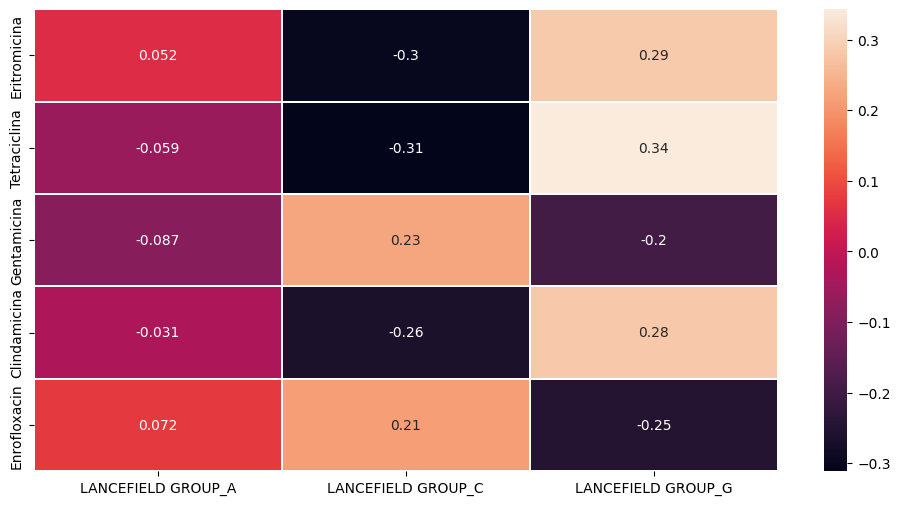

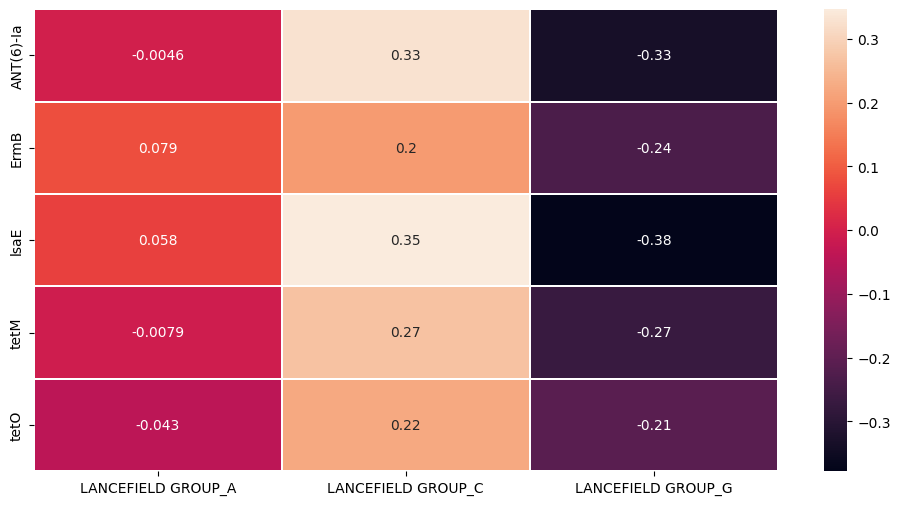

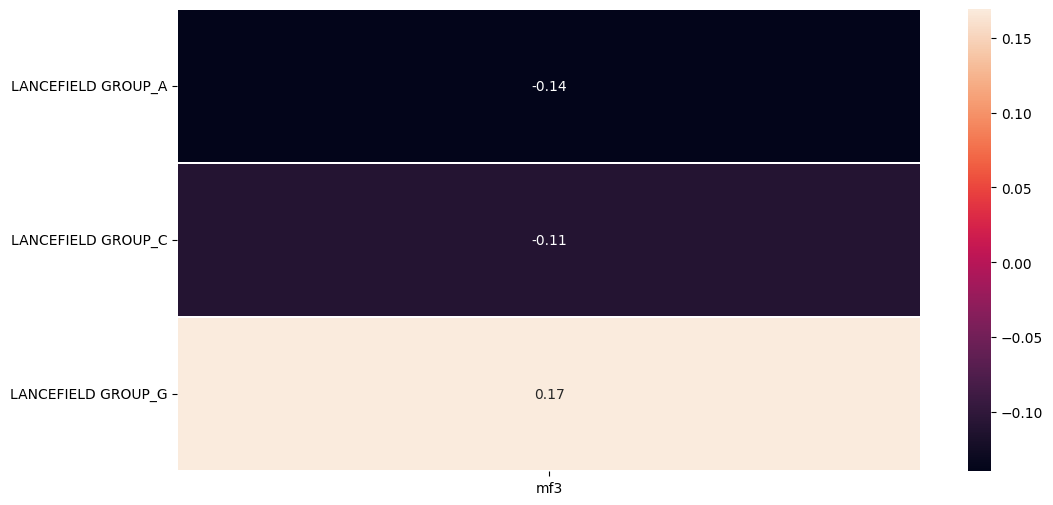

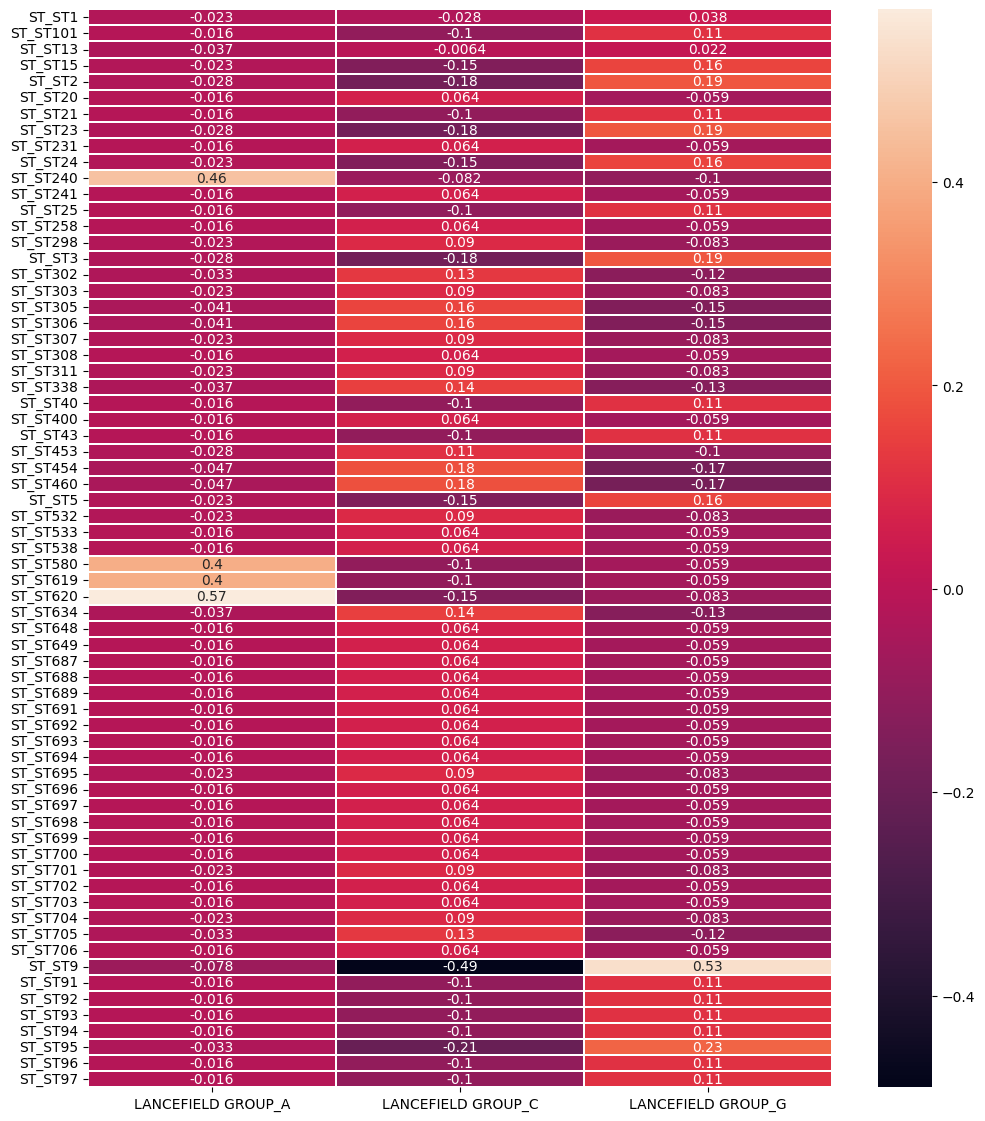

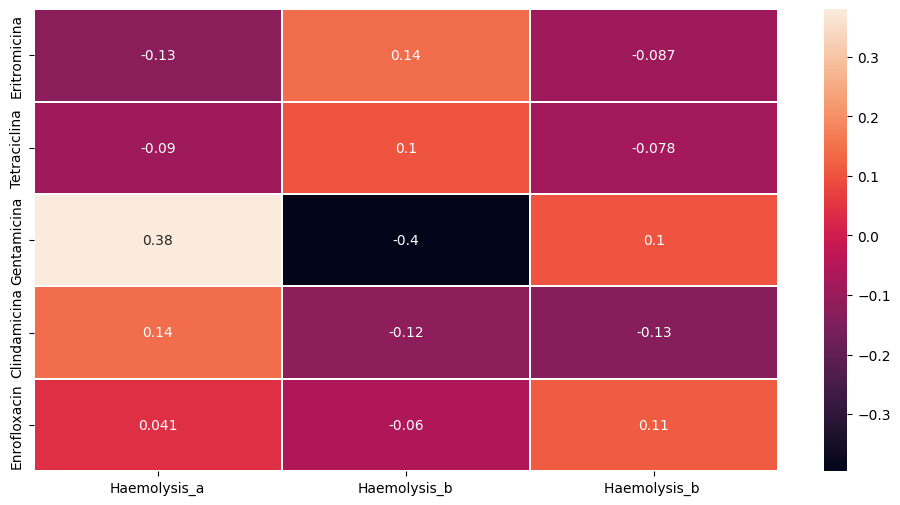

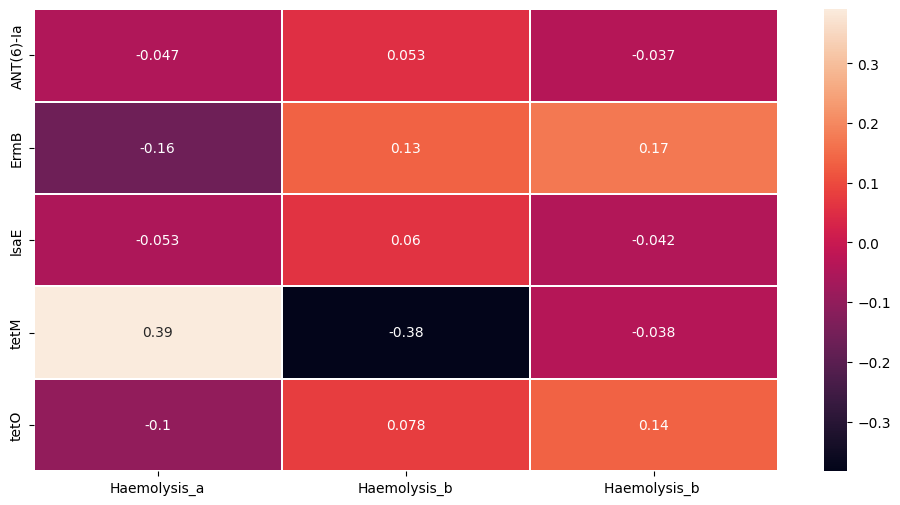

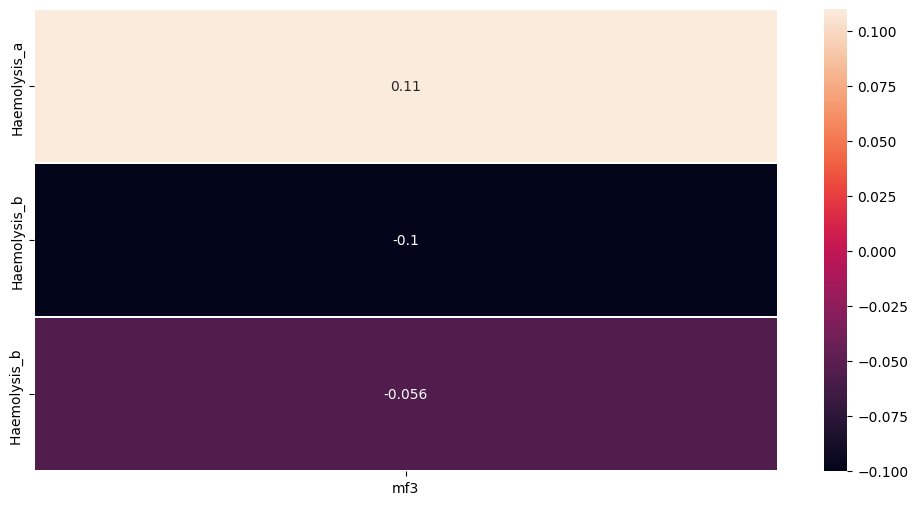

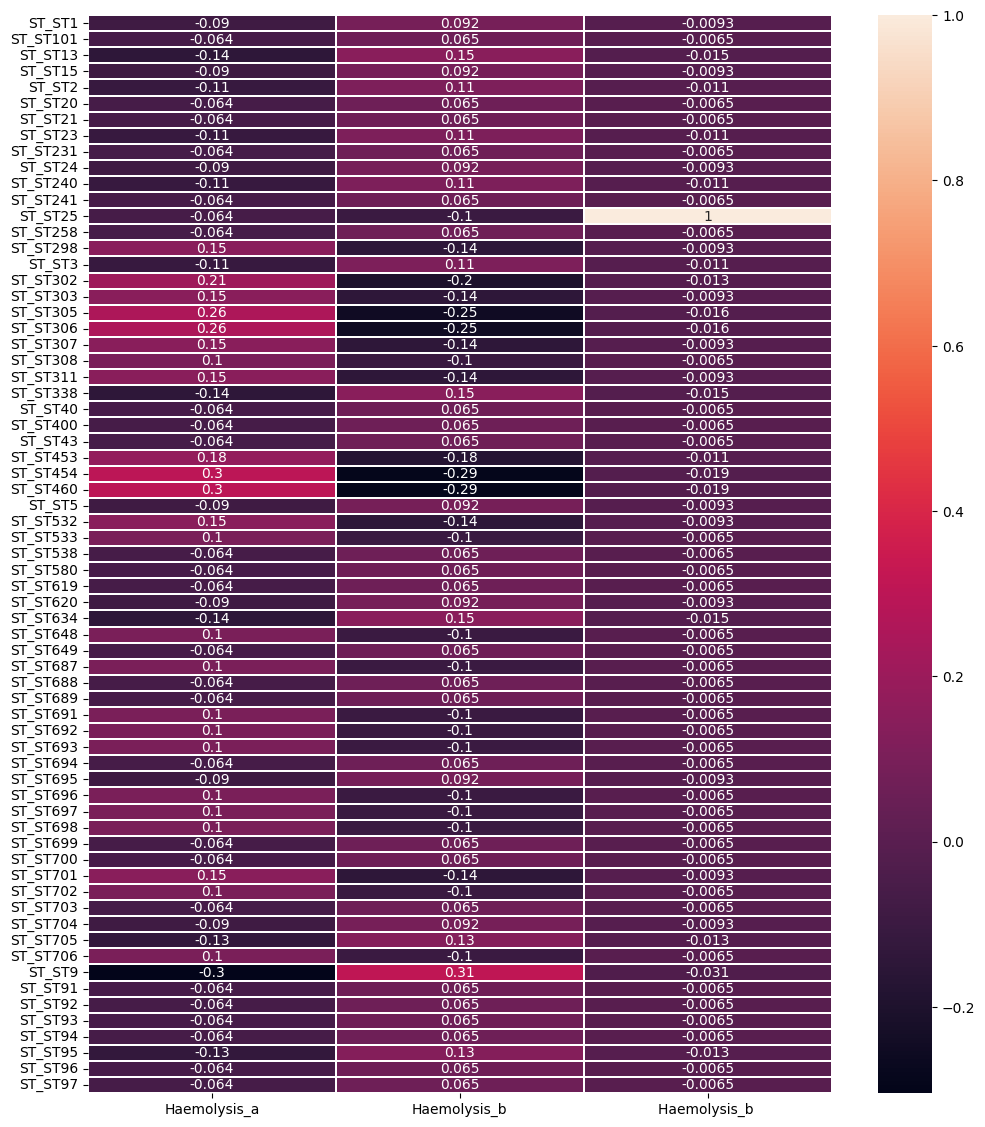

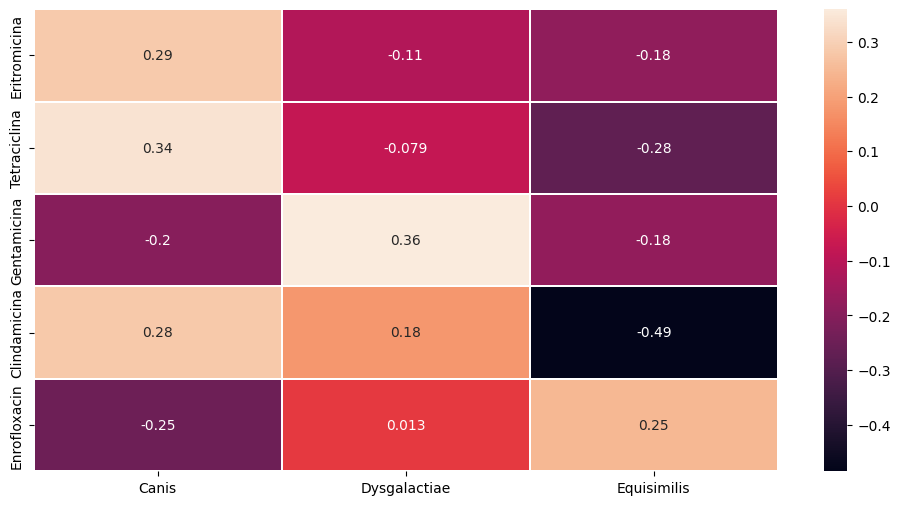

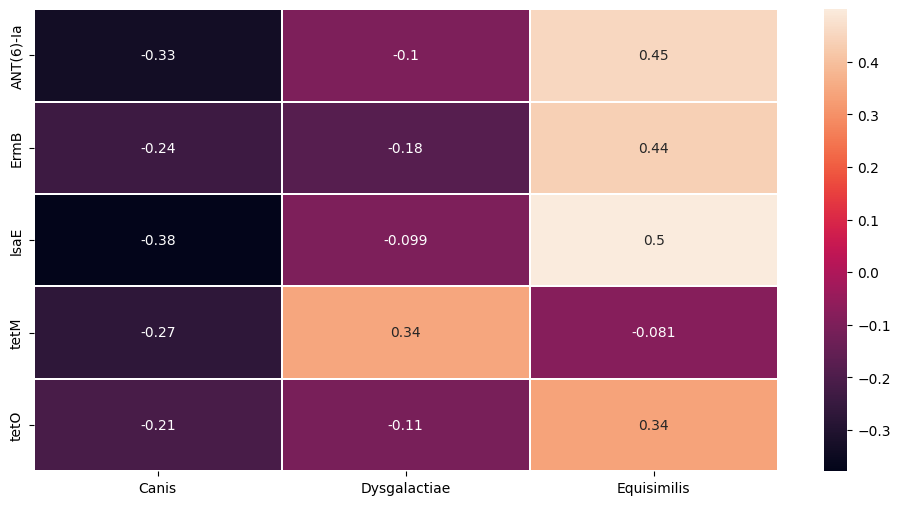

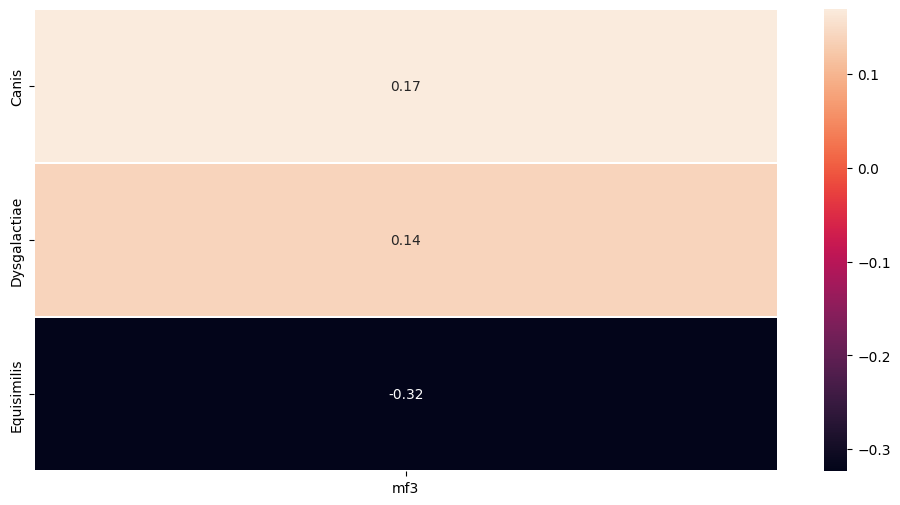

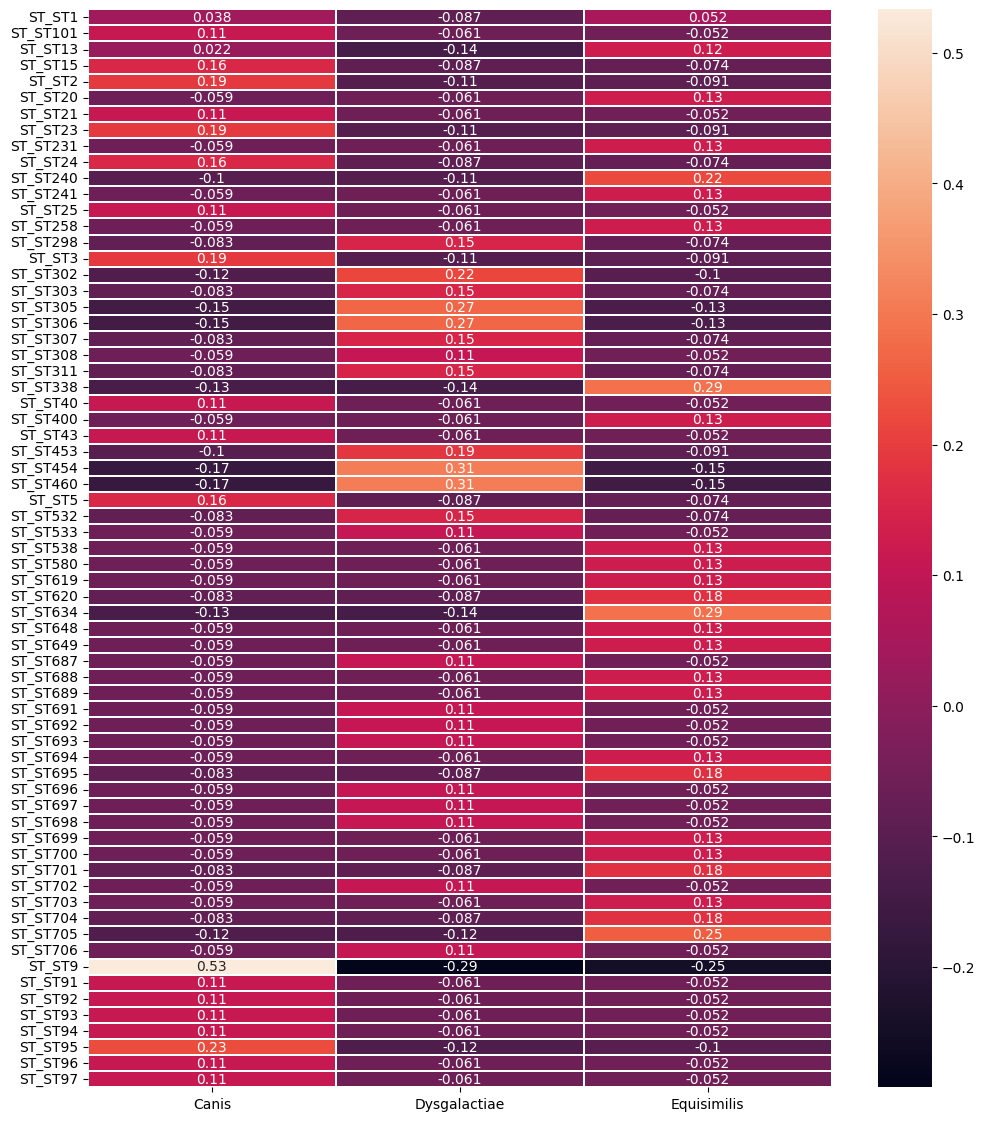

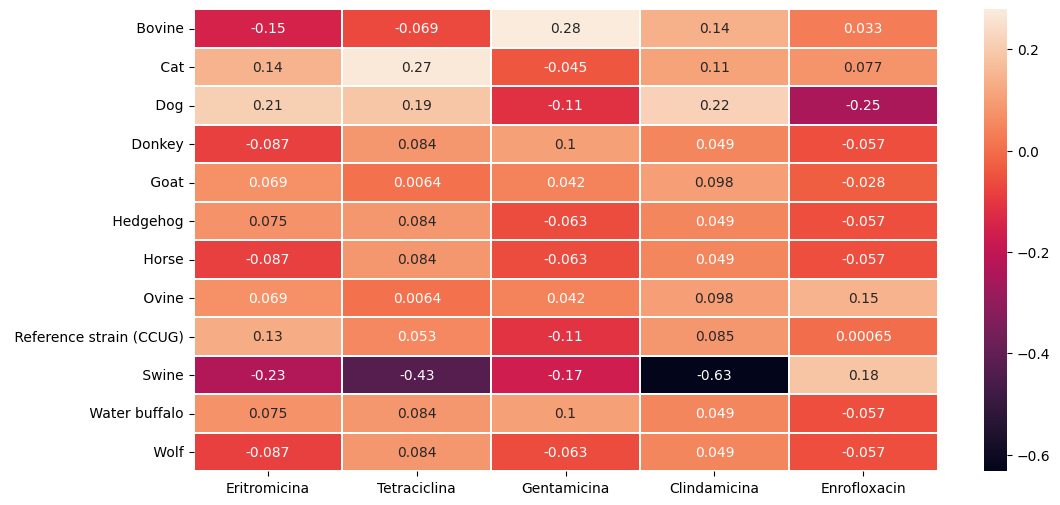

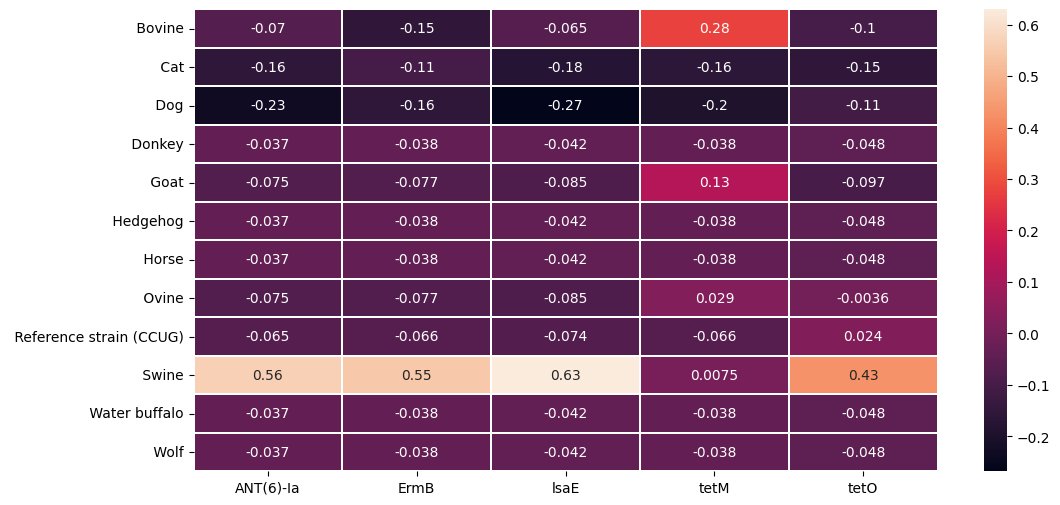

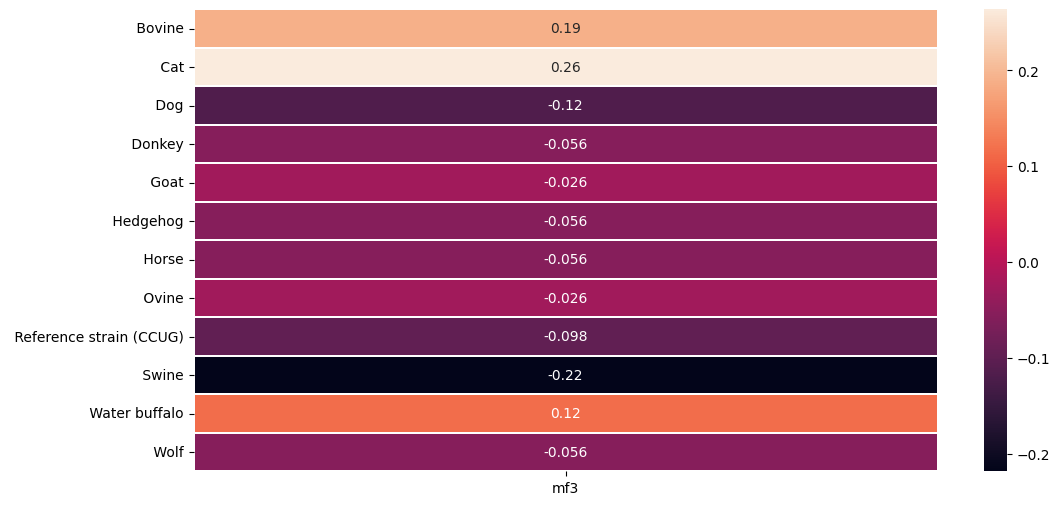

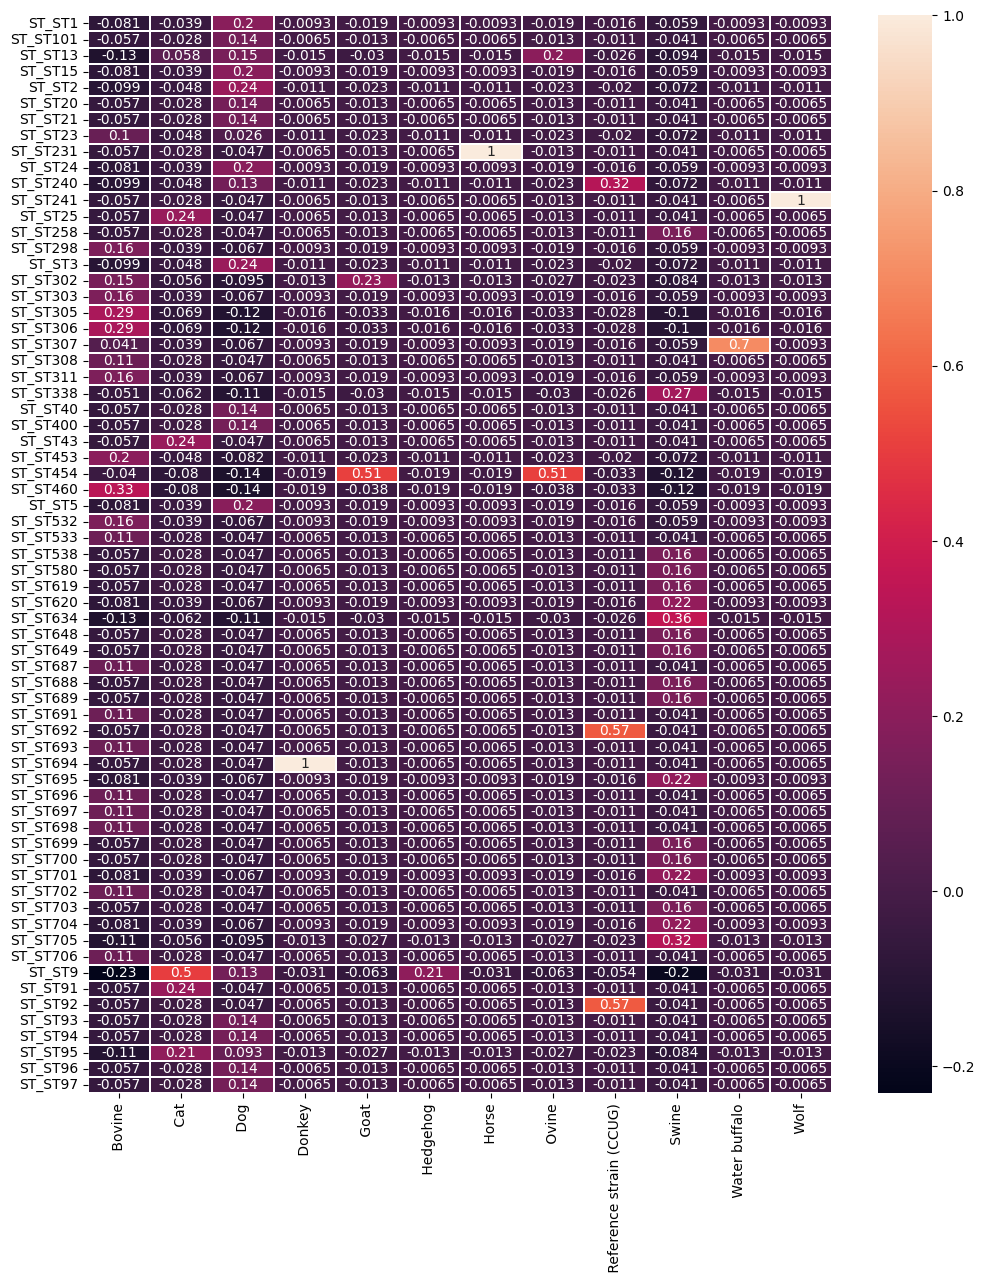

In [52]:
for str_feat, feat_agg in feats_agg.items():
    feat_agg = pd.DataFrame.from_dict(pd.get_dummies(feat_agg))
    if str_feat == 'subspecies':
        feat_agg = feat_agg.rename(columns = {'Putative Subspecies_Streptococcus canis': "Canis",
        'Putative Subspecies_Streptococcus dysgalactiae subsp. equisimilis' : "Equisimilis",
        'Putative Subspecies_Streptococcus dysgalactiae subsp. dysgalactiae' : "Dysgalactiae"})
    if str_feat == 'animal':
        feat_agg.columns = feat_agg.columns.str.replace('Animal species of origin_',' ')
    for str_target, target in targets.items():
        if str_target == 'st':
            target = pd.DataFrame.from_dict(pd.get_dummies(target))
            #print(targ_feat.corr()[feat_agg.columns])
            plt.figure(figsize=(12, 14))
        else:
            plt.figure(figsize=(12, 6))
        targ_feat = pd.concat([target, feat_agg], axis=1)
        print()
        if target.shape[1] > feat_agg.shape[1]:
            corr_target = targ_feat.corr().filter(items = feat_agg.columns.tolist(), axis=1).filter(items = target.columns.tolist(), axis=0)
            sns.heatmap(corr_target, annot=True, linewidths=0.2)
        else:
            corr_feat = targ_feat.corr().filter(items = feat_agg.columns.tolist(), axis=0).filter(items = target.columns.tolist(), axis=1)
            sns.heatmap(corr_feat, annot=True, linewidths=0.2)
        plt.savefig('Risultati/Correlation/'+str_feat+'_'+str_target+'.png')

In [39]:
df = pd.read_csv("data/Dati_Matemaldomics_46picchi.csv",
                        delimiter=';', index_col='ID Strain')
n = 46
animal  = df[['Animal species of origin']]
lancefield = df[['LANCEFIELD GROUP']]
haemolysis = df[['Haemolysis']]
subspecies = df[['Putative Subspecies']]
st = df[[df.columns[4]]]
maldi = df[df.columns[start:start+46]]
antibiotici = df[df.columns[start+n:start+n+n_antibiotici]]
geni_antibiotici = df[df.columns[start+n+n_antibiotici:start+n+n_antibiotici+n_geni]]
virulenza = df[df.columns[start+n+n_antibiotici+n_geni:start+n+n_antibiotici+n_geni+n_virulenza]]

maldi.fillna(0, inplace=True)
maldi = maldi.replace(',', '.', regex=True)
columns = maldi.columns
for column in columns:
    maldi[column] = maldi[column].astype(float)
#display(maldi)

targets = {'antibiotici' : antibiotici,
            'geni_antibiotici' : geni_antibiotici,
            'virulenza' : virulenza}

feats_agg = {'lancefield' : lancefield,
            'haemolysis' : haemolysis,
            'subspecies' : subspecies,
            'animal' : animal}

for str_target,target in targets.items():
    columns = target.columns
    for column in columns:
        if str_target == 'antibiotici':
            target[column] = df[column].map(map_target_antibiotici)
        rapporto = (target[column] == 0).sum() / target.shape[0]
        #print(column+" : "+str(rapporto))
        if rapporto < 0.15 or rapporto > 0.85:
            target.drop([column], axis=1, inplace=True)
    
    #display(target)

#print(list_column)
targets['st'] = st

2223,140967  2241,073989  2262,75751  2679,802856  2978,296408  \
ID Strain                                                                   
V13               0.00         0.00        0.00         0.00         0.00   
V142              0.00         0.00        0.00         0.00         0.00   
V151              0.00         0.00        0.00         0.00         0.00   
V160              0.00         0.00        0.00         0.00         0.00   
V161              0.00         0.00        0.00         0.00         0.00   
...                ...          ...         ...          ...          ...   
V800              0.00         0.00        0.00         0.00         0.00   
V82               0.00         0.00        0.00         0.00         0.00   
V90               0.00         0.00        0.00         0.00         0.00   
V91               0.00         0.00        0.00         0.00         0.00   
V95               0.00         0.00        0.00         0.00         0.00   

           3159,441237  3354,28405  3364,608472  3397,909861  3418,174965  \
ID Strain                                                                   
V13               0.00        0.00         0.00         0.00         0.00   
V142              0.00        0.00         0.00         0.00         0.00   
V151              0.00        0.00         0.00         0.00         0.00   
V160              0.00        0.00         0.00         0.00         0.00   
V161              0.00        0.00         0.00         0.00         0.00   
...                ...         ...          ...          ...          ...   
V800              0.00        0.00         0.00         0.00         0.00   
V82               0.00        0.00         0.00         0.00         0.00   
V90               0.00        0.00         0.00         0.00         0.00   
V91               0.00        0.00         0.00         0.00         0.00   
V95               0.00        0.00         0.00         0.00         0.00   

           ...  9030,351844  9073,208159  9487,183195  10103,20284  \
ID Strain  ...                                                       
V13        ...         0.00         0.00         0.00         0.00   
V142       ...         0.00         0.00         0.00         0.00   
V151       ...         0.00         0.00         0.00         0.00   
V160       ...         0.00         0.00         0.00         0.00   
V161       ...         0.00         0.00         0.00         0.00   
...        ...          ...          ...          ...          ...   
V800       ...         0.00         0.00         0.00         0.00   
V82        ...         0.00         0.00         0.00         0.00   
V90        ...         0.00         0.00         0.00         0.00   
V91        ...         0.00         0.00         0.00         0.00   
V95        ...         0.00         0.00         0.00         0.00   

           10400,80576  10491,16654  10930,54833  13276,73249  14943,03835  \
ID Strain                                                                    
V13               0.00         0.00         0.00         0.00         0.00   
V142              0.00         0.00         0.00         0.00         0.00   
V151              0.00         0.00         0.00         0.00         0.00   
V160              0.00         0.00         0.00         0.00         0.00   
V161              0.00         0.00         0.00         0.00         0.00   
...                ...          ...          ...          ...          ...   
V800              0.00         0.00         0.00         0.00         0.00   
V82               0.00         0.00         0.00         0.00         0.00   
V90               0.00         0.00         0.00         0.00         0.00   
V91               0.00         0.00         0.00         0.00         0.00   
V95               0.00         0.00         0.00         0.00         0.00   

           15048,89449  
ID Strain               
V13               0.00  
V142  

32


2223,140967  2241,073989  2262,75751  2679,802856  2978,296408  \
ID Strain                                                                   
V13               0.00         0.00        0.00         0.00         0.00   
V142              0.00         0.00        0.00         0.00         0.00   
V151              0.00         0.00        0.00         0.00         0.00   
V160              0.00         0.00        0.00         0.00         0.00   
V161              0.00         0.00        0.00         0.00         0.00   
...                ...          ...         ...          ...          ...   
V800              0.00         0.00        0.00         0.00         0.00   
V82               0.00         0.00        0.00         0.00         0.00   
V90               0.00         0.00        0.00         0.00         0.00   
V91               0.00         0.00        0.00         0.00         0.00   
V95               0.00         0.00        0.00         0.00         0.00   

           3159,441237  3354,28405  3364,608472  3397,909861  3418,174965  \
ID Strain                                                                   
V13               0.00        0.00         0.00         0.00         0.00   
V142              0.00        0.00         0.00         0.00         0.00   
V151              0.00        0.00         0.00         0.00         0.00   
V160              0.00        0.00         0.00         0.00         0.00   
V161              0.00        0.00         0.00         0.00         0.00   
...                ...         ...          ...          ...          ...   
V800              0.00        0.00         0.00         0.00         0.00   
V82               0.00        0.00         0.00         0.00         0.00   
V90               0.00        0.00         0.00         0.00         0.00   
V91               0.00        0.00         0.00         0.00         0.00   
V95               0.00        0.00         0.00         0.00         0.00   

           3443,92179  3952,786854  4091,36986  4451,322399  4475,014345  \
ID Strain                                                                  
V13              0.00         0.00        0.00         0.00         0.00   
V142             0.00         0.00        0.00         0.00         0.00   
V151             0.00         0.00        0.00         0.00         0.00   
V160             0.00         0.00        0.00         0.00         0.00   
V161             0.00         0.00        0.00         0.00         0.00   
...               ...          ...         ...          ...          ...   
V800             0.00         0.00        0.00         0.00         0.00   
V82              0.00         0.00        0.00         0.00         0.00   
V90              0.00         0.00        0.00         0.00         0.00   
V91              0.00         0.00        0.00         0.00         0.00   
V95              0.00         0.00        0.00         0.00         0.00   

           4490,070134  
ID Strain               
V13               0.00  
V142              0.00  
V151              0.00  
V160              0.00  
V161              0.00  
...                ...  
V800              0.00  
V82               0.00  
V90               0.00  
V91               0.00  
V95               0.00  

[154 rows x 16 columns]

4515,266689  4539,794508  4744,086475  5052,231151  5362,981449  \
ID Strain                                                                    
V13               0.00         0.00         0.00         0.00         0.00   
V142              0.00         0.00         0.00         0.00         0.00   
V151              0.00         0.00         0.00         0.00         0.00   
V160              0.00         0.00         0.00         0.00         0.00   
V161              0.00         0.00         0.00         0.00         0.00   
...                ...          ...          ...          ...          ...   
V800              0.00         0.00         0.00         0.00         0.00   
V82               0.00         0.00         0.00         0.00         0.00   
V90               0.00         0.00         0.00         0.00         0.00   
V91               0.00         0.00         0.00         0.00         0.00   
V95               0.00         0.00         0.00         0.00         0.00   

           5914,103743  5959,116466  6312,288749  6326,214406  6710,341788  \
ID Strain                                                                    
V13               0.00         0.00         0.00         0.00         0.00   
V142              0.00         0.00         0.00         0.00         0.00   
V151              0.00         0.00         0.00         0.00         0.00   
V160              0.00         0.00         0.00         0.00         0.00   
V161              0.00         0.00         0.00         0.00         0.00   
...                ...          ...          ...          ...          ...   
V800              0.00         0.00         0.00         0.00         0.00   
V82               0.00         0.00         0.00         0.00         0.00   
V90               0.00         0.00         0.00         0.00         0.00   
V91               0.00         0.00         0.00         0.00         0.00   
V95               0.00         0.00         0.00         0.00         0.00   

           6730,906818  6768,620734  6797,381802  6838,493584  6889,619768  \
ID Strain                                                                    
V13               0.00         0.00         0.00         0.00         0.00   
V142              0.00         0.00         0.00         0.00         0.00   
V151              0.00         0.00         0.00         0.00         0.00   
V160              0.00         0.00         0.00         0.00         0.00   
V161              0.00         0.00         0.00         0.00         0.00   
...                ...          ...          ...          ...          ...   
V800              0.00         0.00         0.00         0.00         0.00   
V82               0.00         0.00         0.00         0.00         0.00   
V90               0.00         0.00         0.00         0.00         0.00   
V91               0.00         0.00         0.00         0.00         0.00   
V95               0.00         0.00         0.00         0.00         0.00   

           6942,146487  
ID Strain               
V13               0.00  
V142              0.00  
V151              0.00  
V160              0.00  
V161              0.00  
...                ...  
V800              0.00  
V82               0.00  
V90               0.00  
V91               0.00  
V95               0.00  

[154 rows x 16 columns]

7386,929024  7525,518221  7905,893368  8182,839667  9030,351844  \
ID Strain                                                                    
V13               0.00         0.00         0.00         0.00         0.00   
V142              0.00         0.00         0.00         0.00         0.00   
V151              0.00         0.00         0.00         0.00         0.00   
V160              0.00         0.00         0.00         0.00         0.00   
V161              0.00         0.00         0.00         0.00         0.00   
...                ...          ...          ...          ...          ...   
V800              0.00         0.00         0.00         0.00         0.00   
V82               0.00         0.00         0.00         0.00         0.00   
V90               0.00         0.00         0.00         0.00         0.00   
V91               0.00         0.00         0.00         0.00         0.00   
V95               0.00         0.00         0.00         0.00         0.00   

           9073,208159  9487,183195  10103,20284  10400,80576  10491,16654  \
ID Strain                                                                    
V13               0.00         0.00         0.00         0.00         0.00   
V142              0.00         0.00         0.00         0.00         0.00   
V151              0.00         0.00         0.00         0.00         0.00   
V160              0.00         0.00         0.00         0.00         0.00   
V161              0.00         0.00         0.00         0.00         0.00   
...                ...          ...          ...          ...          ...   
V800              0.00         0.00         0.00         0.00         0.00   
V82               0.00         0.00         0.00         0.00         0.00   
V90               0.00         0.00         0.00         0.00         0.00   
V91               0.00         0.00         0.00         0.00         0.00   
V95               0.00         0.00         0.00         0.00         0.00   

           10930,54833  13276,73249  14943,03835  15048,89449  
ID Strain                                                      
V13               0.00         0.00         0.00         0.00  
V142              0.00         0.00         0.00         0.00  
V151              0.00         0.00         0.00         0.00  
V160              0.00         0.00         0.00         0.00  
V161              0.00         0.00         0.00         0.00  
...                ...          ...          ...          ...  
V800              0.00         0.00         0.00         0.00  
V82               0.00         0.00         0.00         0.00  
V90               0.00         0.00         0.00         0.00  
V91               0.00         0.00         0.00         0.00  
V95               0.00         0.00         0.00         0.00  

[154 rows x 14 columns]

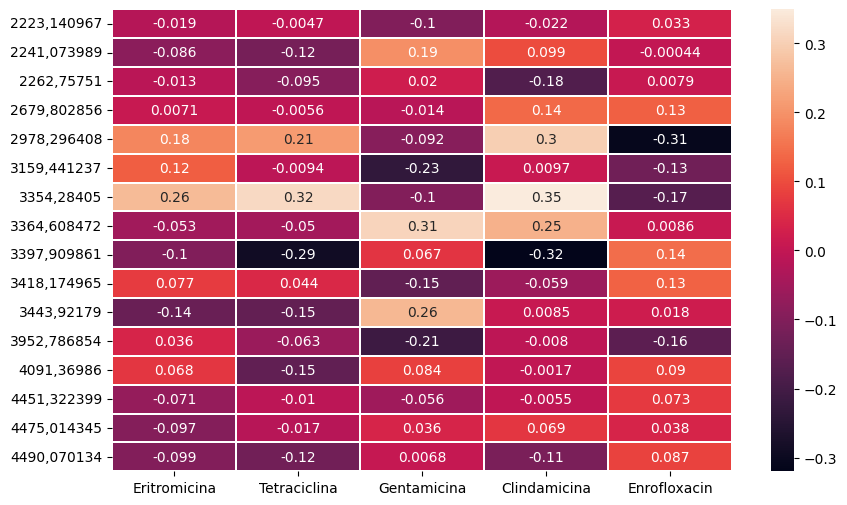

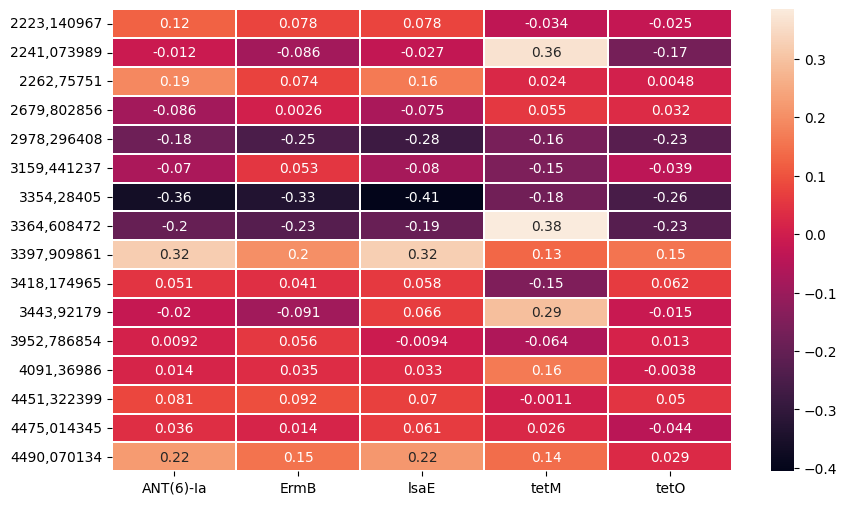

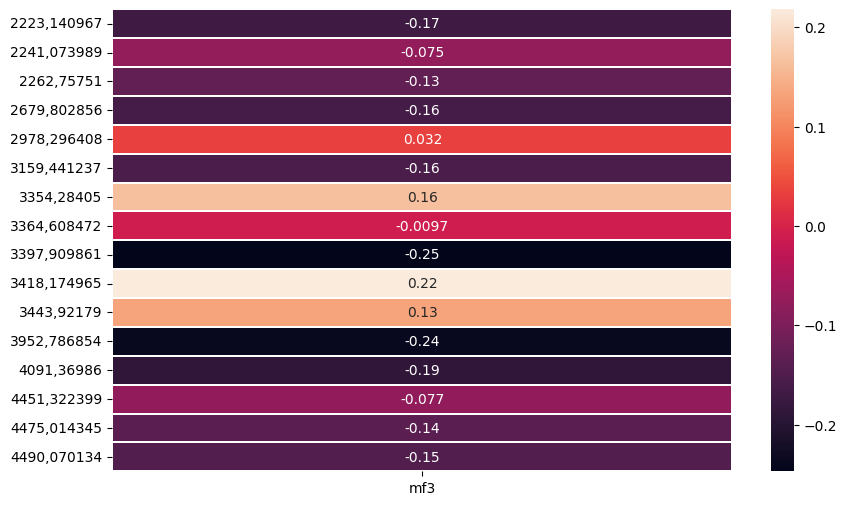

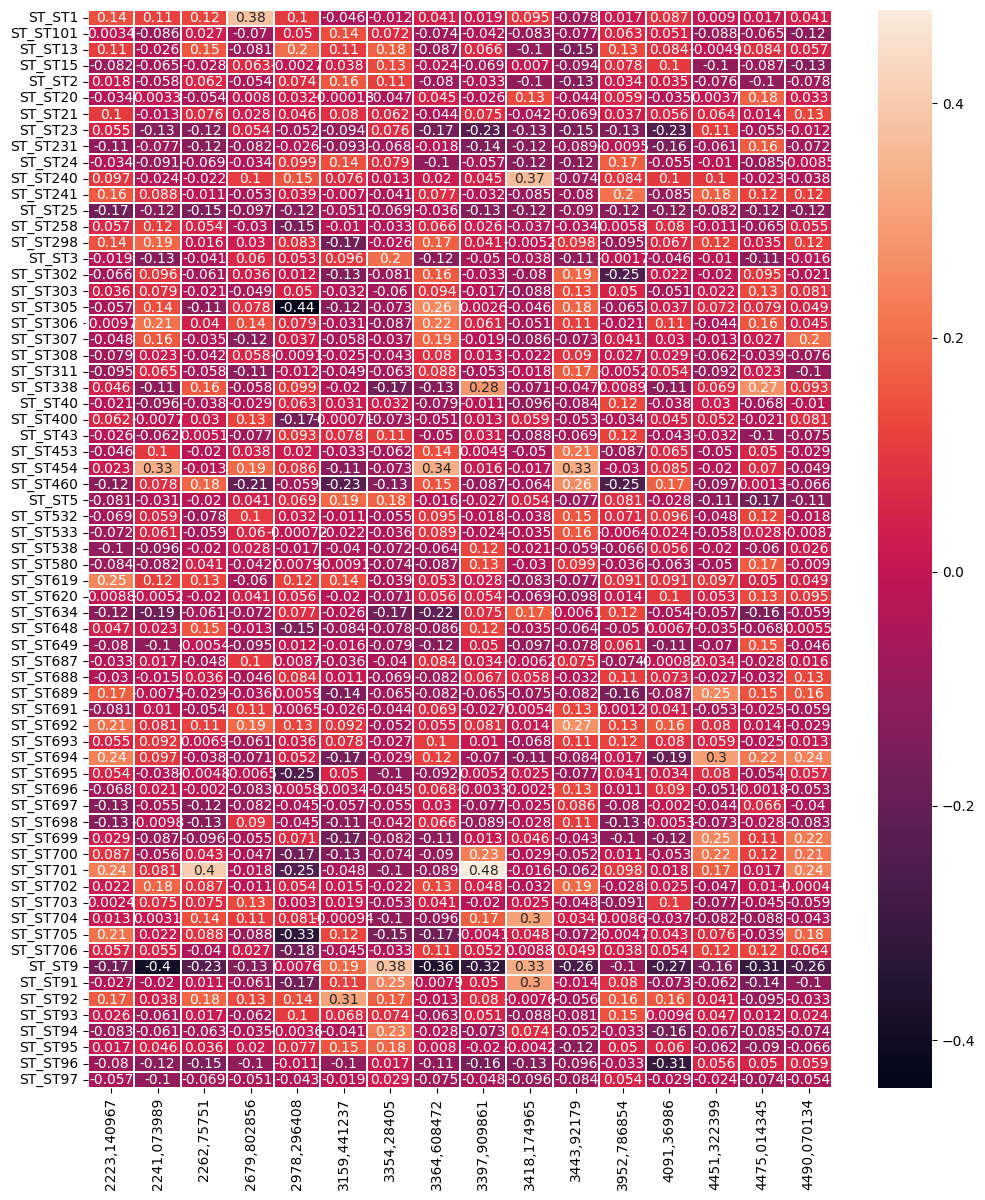

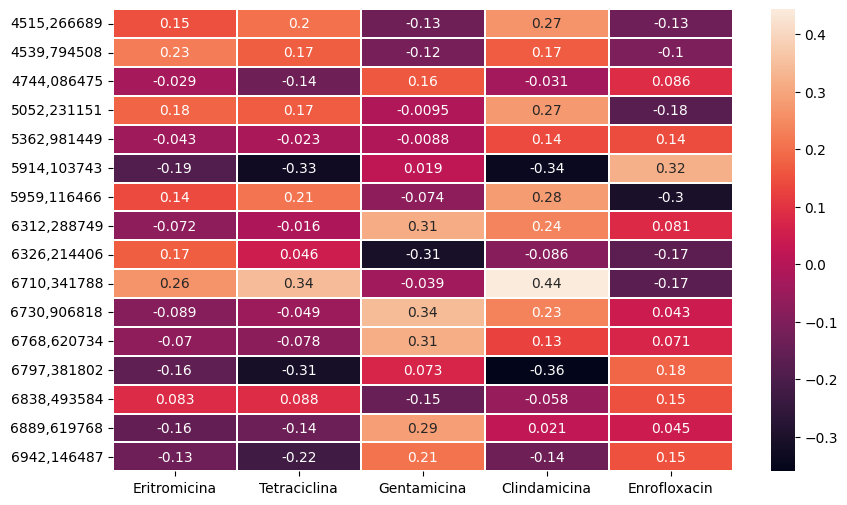

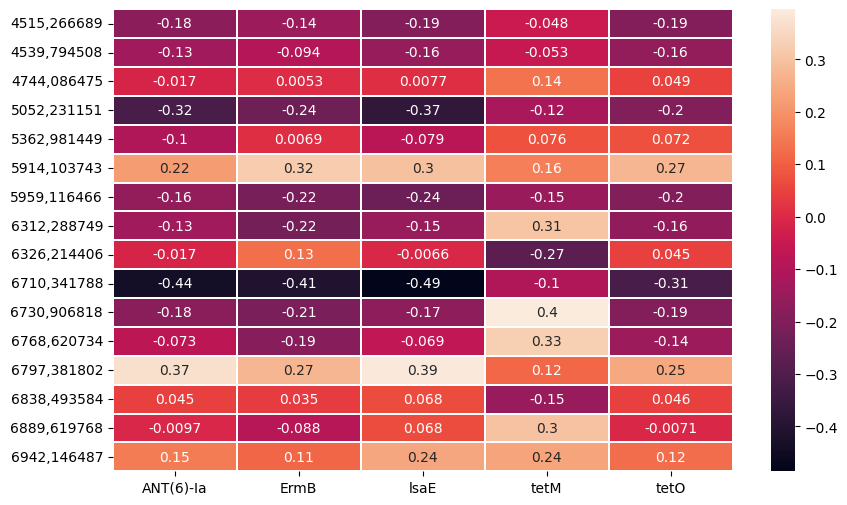

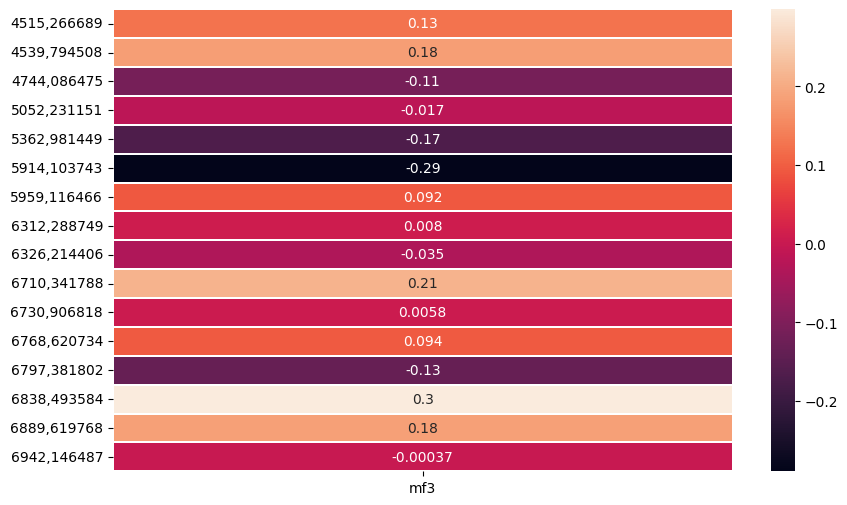

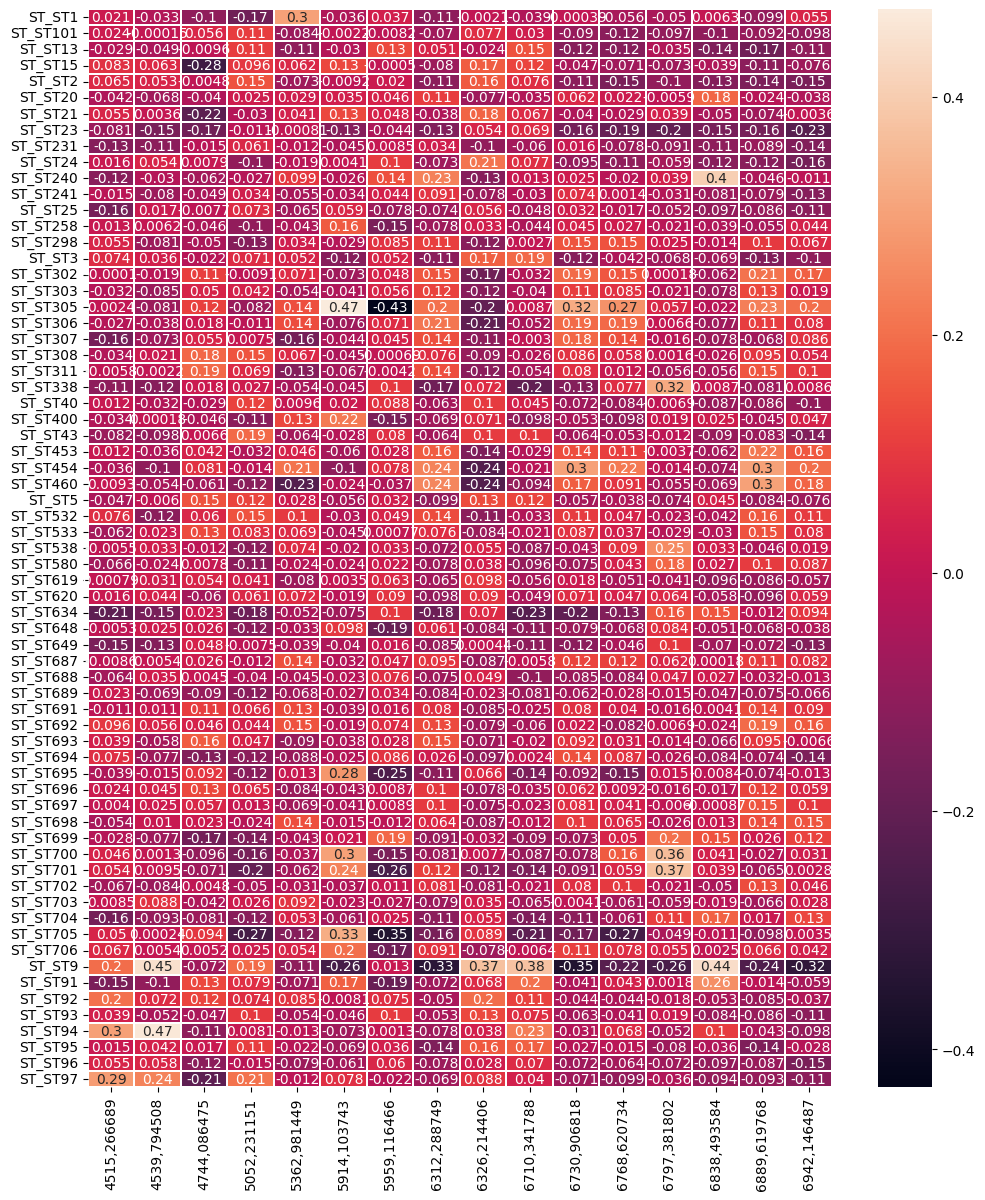

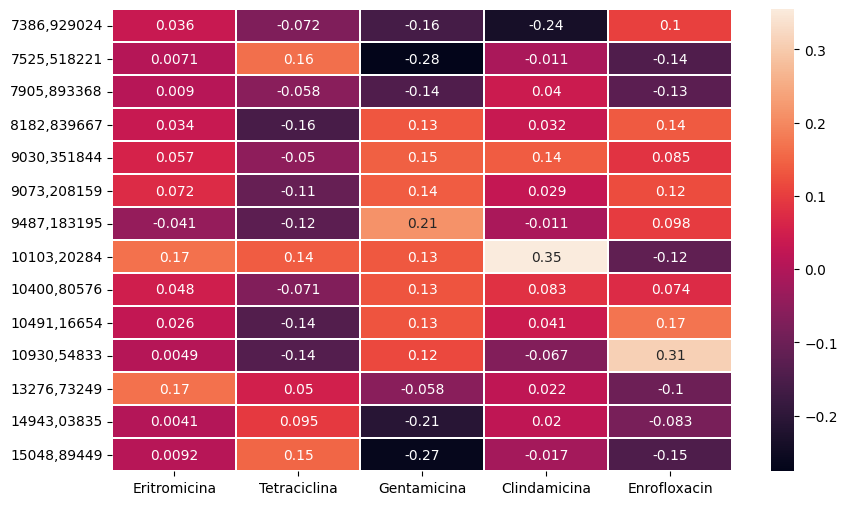

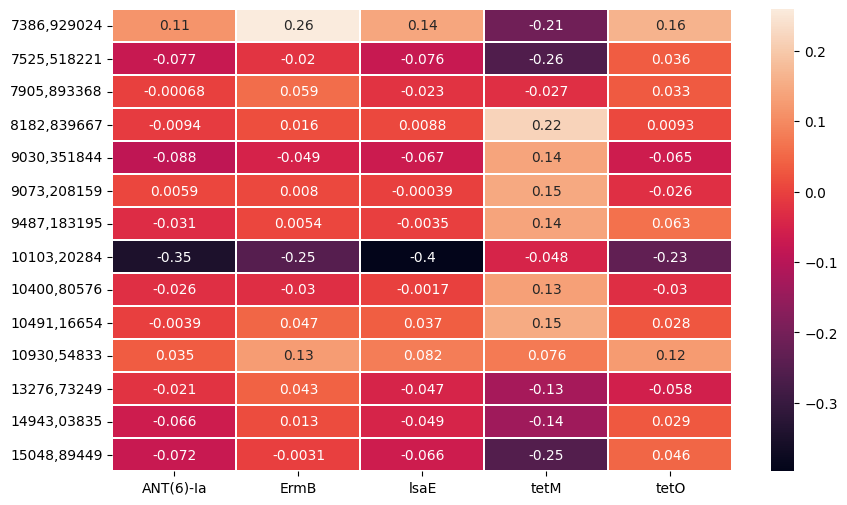

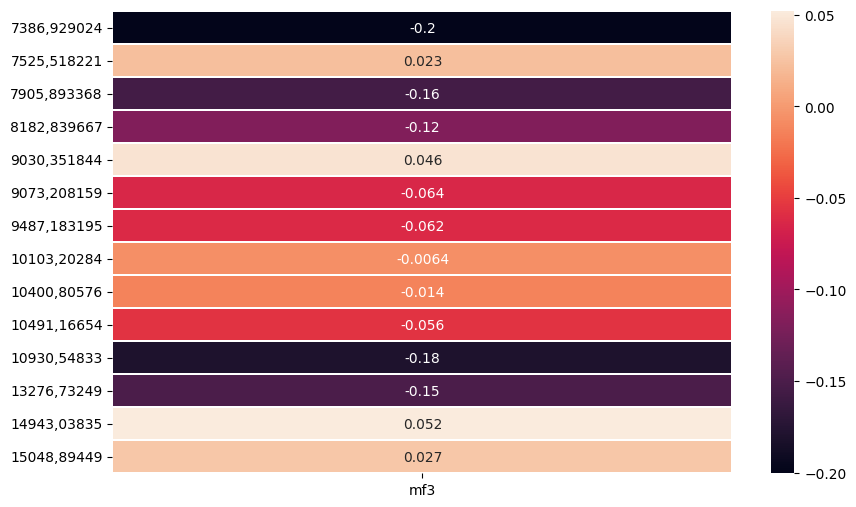

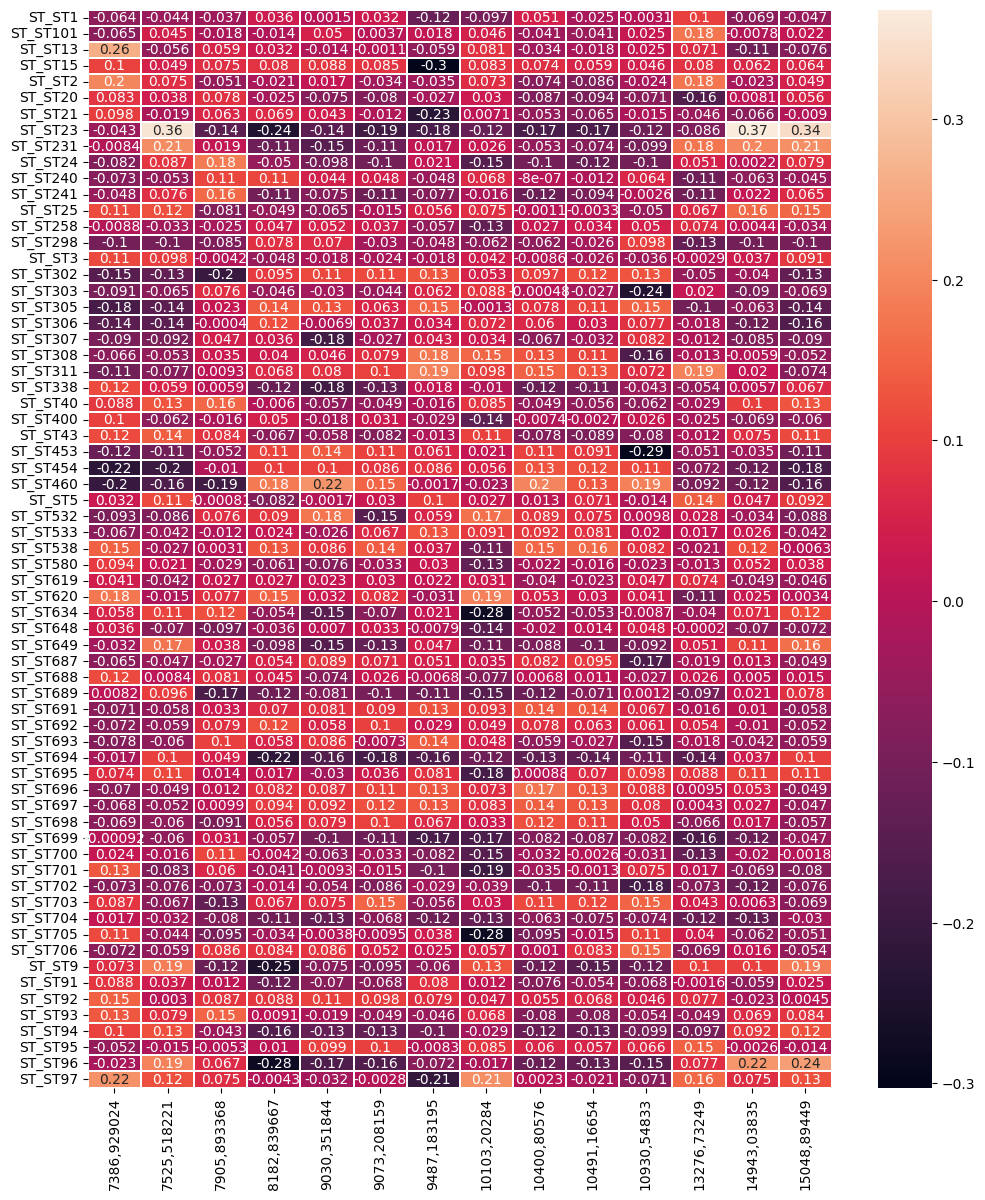

In [51]:
num_picchi = 16
display(maldi)
print(int(46/num_picchi)*num_picchi)
columns_i = [*range(0,int(46/num_picchi)*num_picchi+1,num_picchi)] 
columns_f = [*range(num_picchi,46,num_picchi),46]
dict_column = {columns_i[i]: columns_f[i] for i in range(len(columns_i))}

for column_i,column_f in dict_column.items():
    maldi_reduced = maldi.iloc[:, column_i:column_f]
    display(maldi_reduced)
    for str_target, target in targets.items():
        if str_target == 'st':
            target = pd.DataFrame.from_dict(pd.get_dummies(target))
            #print(targ_feat.corr()[feat_agg.columns])
            plt.figure(figsize=(12, 14))
        else:
            plt.figure(figsize=(10, 6))
        targ_feat = pd.concat([target, maldi_reduced], axis=1)
        #print()
        if target.shape[1] > maldi_reduced.shape[1]:
            corr_target = targ_feat.corr().filter(items = maldi_reduced.columns, axis=1).filter(items = target.columns, axis=0)
            sns.heatmap(corr_target, annot=True, linewidths=0.2)
        else:
            corr_target = targ_feat.corr().filter(items = maldi_reduced.columns, axis=0).filter(items = target.columns, axis=1)
            sns.heatmap(corr_target, annot=True, linewidths=0.2)
        
        
        plt.savefig('Risultati/Correlation/Maldi/'+str_target+'_'+str(column_i)+'_'+str(column_f)+'.png')

2223,140967  2241,073989  2262,75751  2679,802856  2978,296408  \
ID Strain                                                                   
V13               0.00         0.00        0.00         0.00         0.00   
V142              0.00         0.00        0.00         0.00         0.00   
V151              0.00         0.00        0.00         0.00         0.00   
V160              0.00         0.00        0.00         0.00         0.00   
V161              0.00         0.00        0.00         0.00         0.00   
...                ...          ...         ...          ...          ...   
V800              0.00         0.00        0.00         0.00         0.00   
V82               0.00         0.00        0.00         0.00         0.00   
V90               0.00         0.00        0.00         0.00         0.00   
V91               0.00         0.00        0.00         0.00         0.00   
V95               0.00         0.00        0.00         0.00         0.00   

           3159,441237  3354,28405  3364,608472  3397,909861  3418,174965  \
ID Strain                                                                   
V13               0.00        0.00         0.00         0.00         0.00   
V142              0.00        0.00         0.00         0.00         0.00   
V151              0.00        0.00         0.00         0.00         0.00   
V160              0.00        0.00         0.00         0.00         0.00   
V161              0.00        0.00         0.00         0.00         0.00   
...                ...         ...          ...          ...          ...   
V800              0.00        0.00         0.00         0.00         0.00   
V82               0.00        0.00         0.00         0.00         0.00   
V90               0.00        0.00         0.00         0.00         0.00   
V91               0.00        0.00         0.00         0.00         0.00   
V95               0.00        0.00         0.00         0.00         0.00   

           ...  9030,351844  9073,208159  9487,183195  10103,20284  \
ID Strain  ...                                                       
V13        ...         0.00         0.00         0.00         0.00   
V142       ...         0.00         0.00         0.00         0.00   
V151       ...         0.00         0.00         0.00         0.00   
V160       ...         0.00         0.00         0.00         0.00   
V161       ...         0.00         0.00         0.00         0.00   
...        ...          ...          ...          ...          ...   
V800       ...         0.00         0.00         0.00         0.00   
V82        ...         0.00         0.00         0.00         0.00   
V90        ...         0.00         0.00         0.00         0.00   
V91        ...         0.00         0.00         0.00         0.00   
V95        ...         0.00         0.00         0.00         0.00   

           10400,80576  10491,16654  10930,54833  13276,73249  14943,03835  \
ID Strain                                                                    
V13               0.00         0.00         0.00         0.00         0.00   
V142              0.00         0.00         0.00         0.00         0.00   
V151              0.00         0.00         0.00         0.00         0.00   
V160              0.00         0.00         0.00         0.00         0.00   
V161              0.00         0.00         0.00         0.00         0.00   
...                ...          ...          ...          ...          ...   
V800              0.00         0.00         0.00         0.00         0.00   
V82               0.00         0.00         0.00         0.00         0.00   
V90               0.00         0.00         0.00         0.00         0.00   
V91               0.00         0.00         0.00         0.00         0.00   
V95               0.00         0.00         0.00         0.00         0.00   

           15048,89449  
ID Strain               
V13               0.00  
V142  

32


2223,140967  2241,073989  2262,75751  2679,802856  2978,296408  \
ID Strain                                                                   
V13               0.00         0.00        0.00         0.00         0.00   
V142              0.00         0.00        0.00         0.00         0.00   
V151              0.00         0.00        0.00         0.00         0.00   
V160              0.00         0.00        0.00         0.00         0.00   
V161              0.00         0.00        0.00         0.00         0.00   
...                ...          ...         ...          ...          ...   
V800              0.00         0.00        0.00         0.00         0.00   
V82               0.00         0.00        0.00         0.00         0.00   
V90               0.00         0.00        0.00         0.00         0.00   
V91               0.00         0.00        0.00         0.00         0.00   
V95               0.00         0.00        0.00         0.00         0.00   

           3159,441237  3354,28405  3364,608472  3397,909861  3418,174965  \
ID Strain                                                                   
V13               0.00        0.00         0.00         0.00         0.00   
V142              0.00        0.00         0.00         0.00         0.00   
V151              0.00        0.00         0.00         0.00         0.00   
V160              0.00        0.00         0.00         0.00         0.00   
V161              0.00        0.00         0.00         0.00         0.00   
...                ...         ...          ...          ...          ...   
V800              0.00        0.00         0.00         0.00         0.00   
V82               0.00        0.00         0.00         0.00         0.00   
V90               0.00        0.00         0.00         0.00         0.00   
V91               0.00        0.00         0.00         0.00         0.00   
V95               0.00        0.00         0.00         0.00         0.00   

           3443,92179  3952,786854  4091,36986  4451,322399  4475,014345  \
ID Strain                                                                  
V13              0.00         0.00        0.00         0.00         0.00   
V142             0.00         0.00        0.00         0.00         0.00   
V151             0.00         0.00        0.00         0.00         0.00   
V160             0.00         0.00        0.00         0.00         0.00   
V161             0.00         0.00        0.00         0.00         0.00   
...               ...          ...         ...          ...          ...   
V800             0.00         0.00        0.00         0.00         0.00   
V82              0.00         0.00        0.00         0.00         0.00   
V90              0.00         0.00        0.00         0.00         0.00   
V91              0.00         0.00        0.00         0.00         0.00   
V95              0.00         0.00        0.00         0.00         0.00   

           4490,070134  
ID Strain               
V13               0.00  
V142              0.00  
V151              0.00  
V160              0.00  
V161              0.00  
...                ...  
V800              0.00  
V82               0.00  
V90               0.00  
V91               0.00  
V95               0.00  

[154 rows x 16 columns]

Canis  Dysgalactiae  Equisimilis
ID Strain                                  
V13            1             0            0
V142           1             0            0
V151           1             0            0
V160           1             0            0
V161           1             0            0
...          ...           ...          ...
V800           0             1            0
V82            1             0            0
V90            1             0            0
V91            1             0            0
V95            0             0            1

[154 rows x 3 columns]

4515,266689  4539,794508  4744,086475  5052,231151  5362,981449  \
ID Strain                                                                    
V13               0.00         0.00         0.00         0.00         0.00   
V142              0.00         0.00         0.00         0.00         0.00   
V151              0.00         0.00         0.00         0.00         0.00   
V160              0.00         0.00         0.00         0.00         0.00   
V161              0.00         0.00         0.00         0.00         0.00   
...                ...          ...          ...          ...          ...   
V800              0.00         0.00         0.00         0.00         0.00   
V82               0.00         0.00         0.00         0.00         0.00   
V90               0.00         0.00         0.00         0.00         0.00   
V91               0.00         0.00         0.00         0.00         0.00   
V95               0.00         0.00         0.00         0.00         0.00   

           5914,103743  5959,116466  6312,288749  6326,214406  6710,341788  \
ID Strain                                                                    
V13               0.00         0.00         0.00         0.00         0.00   
V142              0.00         0.00         0.00         0.00         0.00   
V151              0.00         0.00         0.00         0.00         0.00   
V160              0.00         0.00         0.00         0.00         0.00   
V161              0.00         0.00         0.00         0.00         0.00   
...                ...          ...          ...          ...          ...   
V800              0.00         0.00         0.00         0.00         0.00   
V82               0.00         0.00         0.00         0.00         0.00   
V90               0.00         0.00         0.00         0.00         0.00   
V91               0.00         0.00         0.00         0.00         0.00   
V95               0.00         0.00         0.00         0.00         0.00   

           6730,906818  6768,620734  6797,381802  6838,493584  6889,619768  \
ID Strain                                                                    
V13               0.00         0.00         0.00         0.00         0.00   
V142              0.00         0.00         0.00         0.00         0.00   
V151              0.00         0.00         0.00         0.00         0.00   
V160              0.00         0.00         0.00         0.00         0.00   
V161              0.00         0.00         0.00         0.00         0.00   
...                ...          ...          ...          ...          ...   
V800              0.00         0.00         0.00         0.00         0.00   
V82               0.00         0.00         0.00         0.00         0.00   
V90               0.00         0.00         0.00         0.00         0.00   
V91               0.00         0.00         0.00         0.00         0.00   
V95               0.00         0.00         0.00         0.00         0.00   

           6942,146487  
ID Strain               
V13               0.00  
V142              0.00  
V151              0.00  
V160              0.00  
V161              0.00  
...                ...  
V800              0.00  
V82               0.00  
V90               0.00  
V91               0.00  
V95               0.00  

[154 rows x 16 columns]

Canis  Dysgalactiae  Equisimilis
ID Strain                                  
V13            1             0            0
V142           1             0            0
V151           1             0            0
V160           1             0            0
V161           1             0            0
...          ...           ...          ...
V800           0             1            0
V82            1             0            0
V90            1             0            0
V91            1             0            0
V95            0             0            1

[154 rows x 3 columns]

7386,929024  7525,518221  7905,893368  8182,839667  9030,351844  \
ID Strain                                                                    
V13               0.00         0.00         0.00         0.00         0.00   
V142              0.00         0.00         0.00         0.00         0.00   
V151              0.00         0.00         0.00         0.00         0.00   
V160              0.00         0.00         0.00         0.00         0.00   
V161              0.00         0.00         0.00         0.00         0.00   
...                ...          ...          ...          ...          ...   
V800              0.00         0.00         0.00         0.00         0.00   
V82               0.00         0.00         0.00         0.00         0.00   
V90               0.00         0.00         0.00         0.00         0.00   
V91               0.00         0.00         0.00         0.00         0.00   
V95               0.00         0.00         0.00         0.00         0.00   

           9073,208159  9487,183195  10103,20284  10400,80576  10491,16654  \
ID Strain                                                                    
V13               0.00         0.00         0.00         0.00         0.00   
V142              0.00         0.00         0.00         0.00         0.00   
V151              0.00         0.00         0.00         0.00         0.00   
V160              0.00         0.00         0.00         0.00         0.00   
V161              0.00         0.00         0.00         0.00         0.00   
...                ...          ...          ...          ...          ...   
V800              0.00         0.00         0.00         0.00         0.00   
V82               0.00         0.00         0.00         0.00         0.00   
V90               0.00         0.00         0.00         0.00         0.00   
V91               0.00         0.00         0.00         0.00         0.00   
V95               0.00         0.00         0.00         0.00         0.00   

           10930,54833  13276,73249  14943,03835  15048,89449  
ID Strain                                                      
V13               0.00         0.00         0.00         0.00  
V142              0.00         0.00         0.00         0.00  
V151              0.00         0.00         0.00         0.00  
V160              0.00         0.00         0.00         0.00  
V161              0.00         0.00         0.00         0.00  
...                ...          ...          ...          ...  
V800              0.00         0.00         0.00         0.00  
V82               0.00         0.00         0.00         0.00  
V90               0.00         0.00         0.00         0.00  
V91               0.00         0.00         0.00         0.00  
V95               0.00         0.00         0.00         0.00  

[154 rows x 14 columns]

Canis  Dysgalactiae  Equisimilis
ID Strain                                  
V13            1             0            0
V142           1             0            0
V151           1             0            0
V160           1             0            0
V161           1             0            0
...          ...           ...          ...
V800           0             1            0
V82            1             0            0
V90            1             0            0
V91            1             0            0
V95            0             0            1

[154 rows x 3 columns]

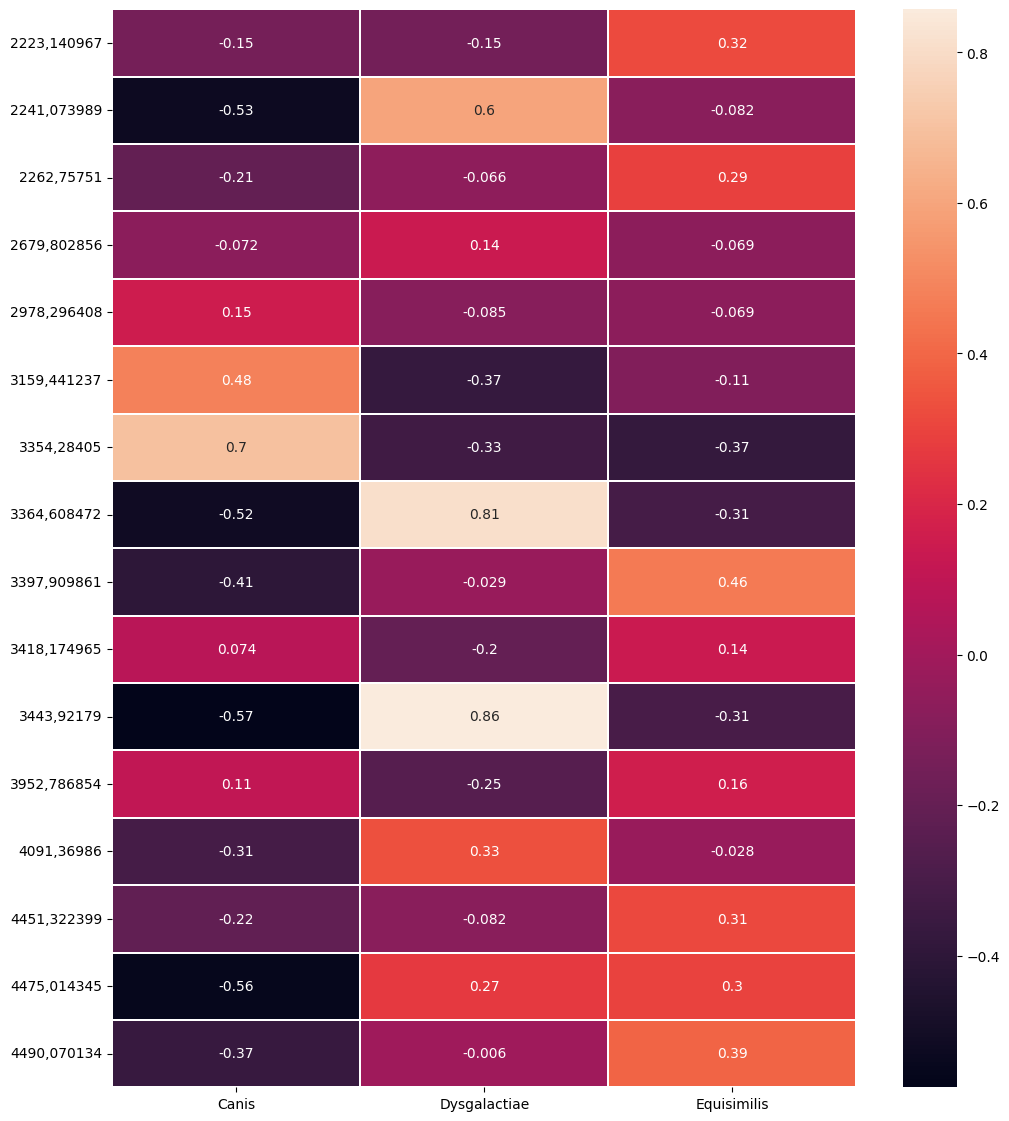

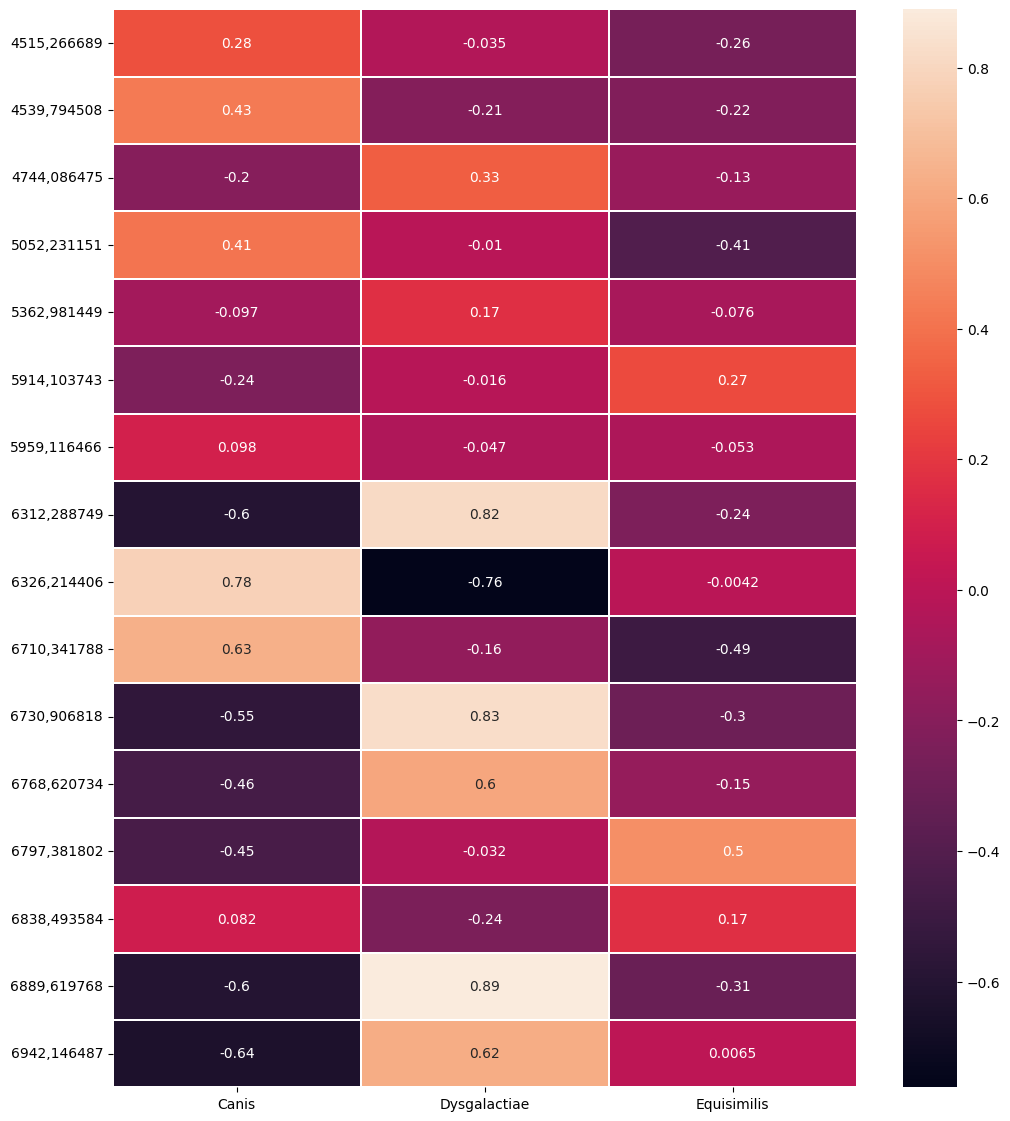

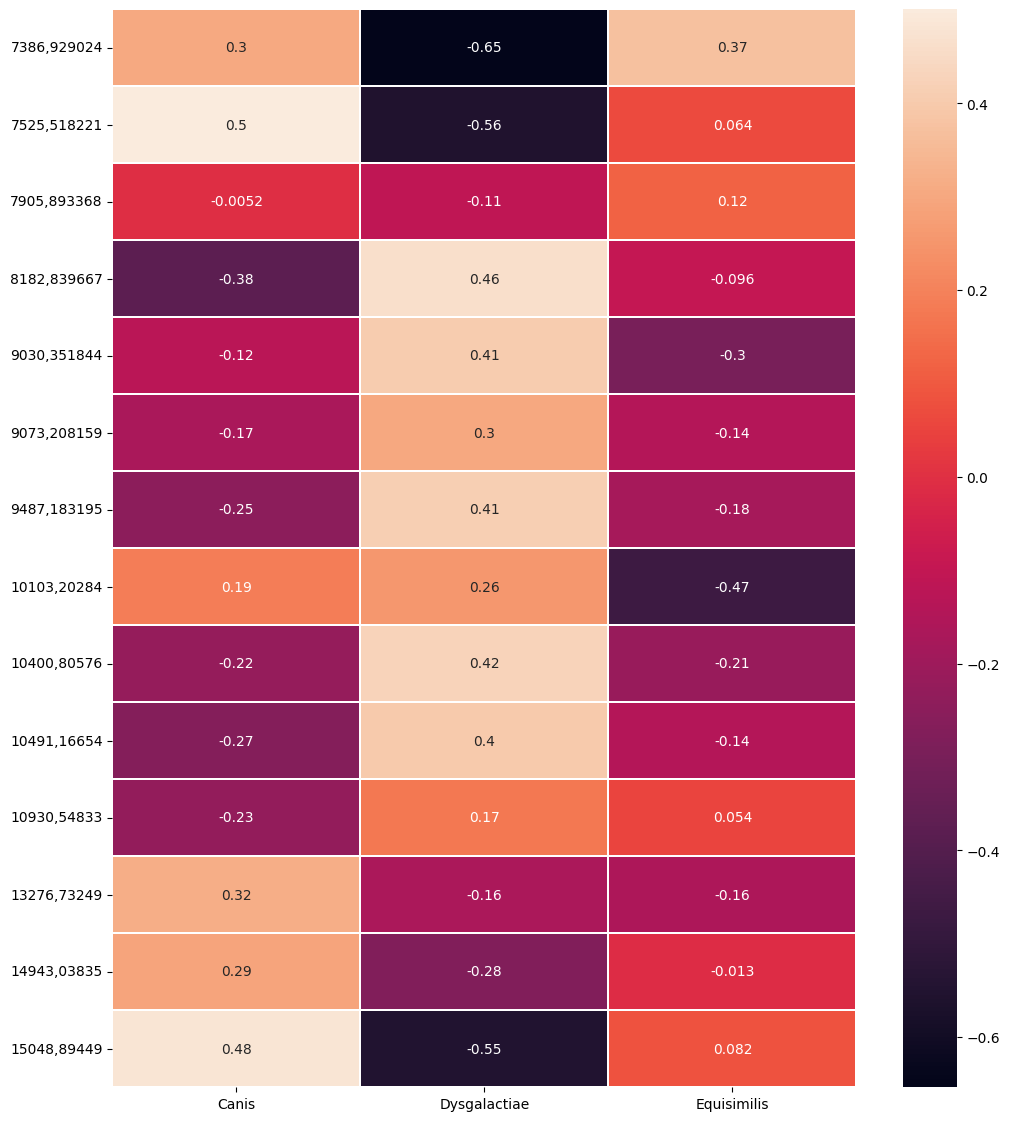

In [55]:
num_picchi = 16
display(maldi)
print(int(46/num_picchi)*num_picchi)
columns_i = [*range(0,int(46/num_picchi)*num_picchi+1,num_picchi)] 
columns_f = [*range(num_picchi,46,num_picchi),46]
dict_column = {columns_i[i]: columns_f[i] for i in range(len(columns_i))}
targets = {'subspecies' : subspecies}

for column_i,column_f in dict_column.items():
    maldi_reduced = maldi.iloc[:, column_i:column_f]
    display(maldi_reduced)
    
    for str_target, target in targets.items():
        if str_target == 'subspecies':
            target = pd.DataFrame.from_dict(pd.get_dummies(target))
            target = target.rename(columns = {'Putative Subspecies_Streptococcus canis': "Canis",
                'Putative Subspecies_Streptococcus dysgalactiae subsp. equisimilis' : "Equisimilis",
                'Putative Subspecies_Streptococcus dysgalactiae subsp. dysgalactiae' : "Dysgalactiae"})
            display(target)
            #print(targ_feat.corr()[feat_agg.columns])
            plt.figure(figsize=(12, 14))
        else:
            plt.figure(figsize=(10, 6))
        targ_feat = pd.concat([target, maldi_reduced], axis=1)
        #print()
        if target.shape[1] > maldi_reduced.shape[1]:
            corr_target = targ_feat.corr().filter(items = maldi_reduced.columns, axis=1).filter(items = target.columns, axis=0)
            sns.heatmap(corr_target, annot=True, linewidths=0.2)
        else:
            corr_target = targ_feat.corr().filter(items = maldi_reduced.columns, axis=0).filter(items = target.columns, axis=1)
            sns.heatmap(corr_target, annot=True, linewidths=0.2)
        
        
        plt.savefig('Risultati/Correlation/Maldi/'+str_target+'_'+str(column_i)+'_'+str(column_f)+'.png')